#Package Implement

In [ ]:
!pip uninstall keras
!pip install tensorflow
!pip install scikeras
!pip uninstall scikit-learn -y
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow import keras

from google.colab import drive
drive.mount('/content/drive')

Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-3.4.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? y
  Successfully uninstalled keras-3.4.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
Mounted at /content/drive


In [ ]:
# import datasets

df_1 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/ASII.JK.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/BBCA.JK.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/ICBP.JK.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/BYAN.JK.csv')
df_5 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/TLKM.JK.csv')
df_6 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/TPIA.JK.csv')
df_7 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/KLBF.JK.csv')

In [ ]:
df_1.tail()

Date    Open    High     Low   Close    Adj Close     Volume
175  2023-08-01  6875.0  6900.0  6375.0  6450.0  6345.520508  696313900
176  2023-09-01  6475.0  6650.0  6125.0  6225.0  6124.165527  755502600
177  2023-10-01  6275.0  6350.0  5600.0  5775.0  5681.454590  957890500
178  2023-11-01  5900.0  6000.0  5400.0  5400.0  5400.000000  947784600
179  2023-12-01  5450.0  5825.0  5450.0  5650.0  5650.000000  941764600

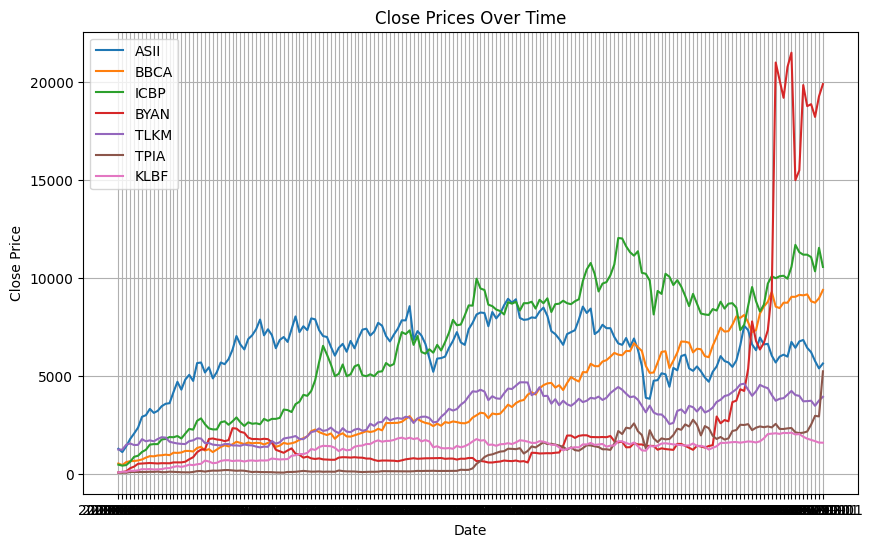

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df_1.reset_index()['Date'], df_1['Close'], label='ASII')
plt.plot(df_2.reset_index()['Date'], df_2['Close'], label='BBCA')
plt.plot(df_3.reset_index()['Date'], df_3['Close'], label='ICBP')
plt.plot(df_4.reset_index()['Date'], df_4['Close'], label='BYAN')
plt.plot(df_5.reset_index()['Date'], df_5['Close'], label='TLKM')
plt.plot(df_6.reset_index()['Date'], df_6['Close'], label='TPIA')
plt.plot(df_7.reset_index()['Date'], df_7['Close'], label='KLBF')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Normalize the dataset

In [ ]:
def sub_date_and_target(df):
  df = df[['Date', 'Close']]
  return df

def set_index_date(df):
  df = df.set_index('Date')
  # df.index = df.index.set_freq('M')
  df.index = pd.to_datetime(df.index)
  return df

def preprocessing(df):
  sub_df = sub_date_and_target(df)
  res_df = set_index_date(sub_df)
  return res_df

# Main Code Table Result LSTM

Length of prices array: 180
Length of train_prices array: 117
Length of test_prices array: 63


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
14/14 - 2s - 161ms/step - loss: 0.9226
Epoch 2/100
14/14 - 0s - 4ms/step - loss: 0.8331
Epoch 3/100
14/14 - 0s - 4ms/step - loss: 0.7550
Epoch 4/100
14/14 - 0s - 4ms/step - loss: 0.6872
Epoch 5/100
14/14 - 0s - 4ms/step - loss: 0.6247
Epoch 6/100
14/14 - 0s - 4ms/step - loss: 0.5671
Epoch 7/100
14/14 - 0s - 4ms/step - loss: 0.5138
Epoch 8/100
14/14 - 0s - 5ms/step - loss: 0.4619
Epoch 9/100
14/14 - 0s - 10ms/step - loss: 0.4120
Epoch 10/100
14/14 - 0s - 4ms/step - loss: 0.3626
Epoch 11/100
14/14 - 0s - 10ms/step - loss: 0.3147
Epoch 12/100
14/14 - 0s - 10ms/step - loss: 0.2686
Epoch 13/100
14/14 - 0s - 4ms/step - loss: 0.2235
Epoch 14/100
14/14 - 0s - 10ms/step - loss: 0.1840
Epoch 15/100
14/14 - 0s - 5ms/step - loss: 0.1467
Epoch 16/100
14/14 - 0s - 4ms/step - loss: 0.1160
Epoch 17/100
14/14 - 0s - 4ms/step - loss: 0.0903
Epoch 18/100
14/14 - 0s - 10ms/step - loss: 0.0709
Epoch 19/100
14/14 - 0s - 5ms/step - loss: 0.0554
Epoch 20/100
14/14 - 0s - 4ms/step - loss: 0.0448
Ep

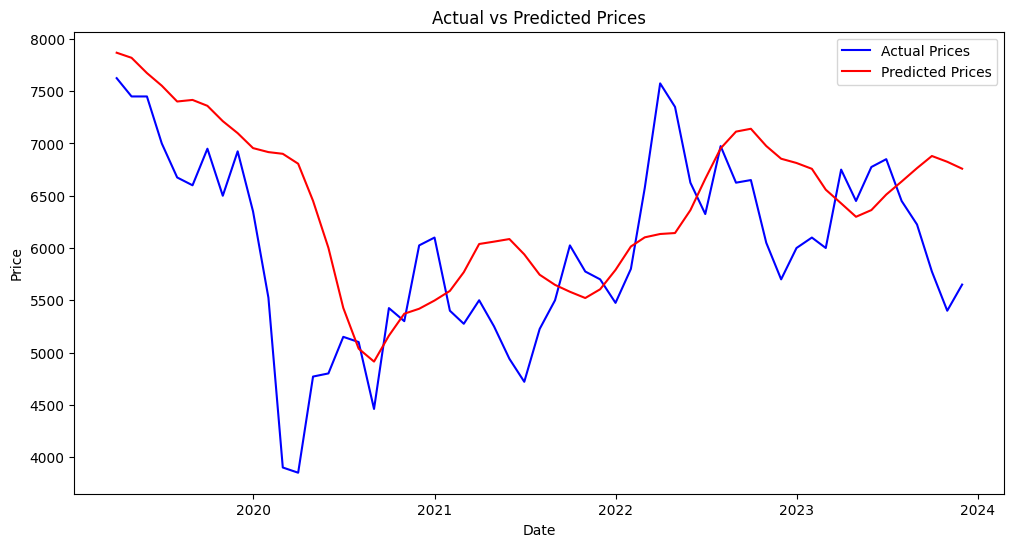

          Date Actual Price Predicted Price
0   01/04/2019      7625.00         7868.38
1   01/05/2019      7450.00         7819.79
2   01/06/2019      7450.00         7673.78
3   01/07/2019      7000.00         7552.79
4   01/08/2019      6675.00         7401.67
5   01/09/2019      6600.00         7416.75
6   01/10/2019      6950.00         7360.26
7   01/11/2019      6500.00         7213.67
8   01/12/2019      6925.00         7098.92
9   01/01/2020      6350.00         6955.88
10  01/02/2020      5525.00         6917.54
11  01/03/2020      3900.00         6901.22
12  01/04/2020      3850.00         6806.40
13  01/05/2020      4770.00         6451.36
14  01/06/2020      4800.00         6001.64
15  01/07/2020      5150.00         5426.91
16  01/08/2020      5100.00         5036.94
17  01/09/2020      4460.00         4913.35
18  01/10/2020      5425.00         5161.35
19  01/11/2020      5300.00         5371.35
20  01/12/2020      6025.00         5418.76
21  01/01/2021      6100.00     

In [ ]:
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65, scale=True):
    # Split into train and test sets
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if scale:
        # Normalize the train and test sets separately
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
        test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))
    else:
        train_prices_scaled = train_prices.reshape(-1, 1)
        test_prices_scaled = test_prices.reshape(-1, 1)

    return train_prices_scaled, test_prices_scaled

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    # Define and compile the LSTM model
    model = Sequential()
    model.add(LSTM(4, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Reshape input data for LSTM
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Fit the model with train set
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    # Make predictions for train and test sets
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    # Invert predictions for train set
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape Y_train to 2D

    # Invert predictions for test set
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape Y_test to 2D

    # Calculate root mean squared error for train and test sets
    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train(df, look_back=5, epochs=100, batch_size=8, verbose=2):
    # Check if the column 'Close' or 'Adj Close' exists
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    print("Length of prices array:", len(prices))  # Debugging line

    # Split into train and test sets
    train_prices, test_prices = train_test_split(prices)

    print("Length of train_prices array:", len(train_prices))  # Debugging line
    print("Length of test_prices array:", len(test_prices))    # Debugging line

    # calling the create_dataset function to split the data into input-output datasets
    X_train, Y_train = create_dataset(train_prices, look_back)
    X_test, Y_test = create_dataset(test_prices, look_back)

    # Train the model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit_transform(prices.reshape(-1, 1))
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    # Predict using the model
    predicted_prices = model.predict(X_test)
    # Invert scaling to get actual predicted prices
    predicted_prices = scaler.inverse_transform(predicted_prices)

    # Create a table with date, actual price, and prediction result for test set
    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)

    # Ensure that the length of the test dataset matches the length of the predicted prices
    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    # Format dates as dd/mm/yyyy
    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    # Format prices to match actual price formatting
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

df_1_close = preprocessing(df_1)
df_2_close = preprocessing(df_2)
df_3_close = preprocessing(df_3)
df_4_close = preprocessing(df_4)
df_5_close = preprocessing(df_5)
df_6_close = preprocessing(df_6)
df_7_close = preprocessing(df_7)

# Example usage
train(df_1_close)
# train(df_2_close)
# train(df_3_close)
# train(df_4_close)
# train(df_5_close)
# train(df_6_close)
# train(df_7_close)

# result_table = train([df_1_close, df_2_close, df_3_close, df_4_close, df_5_close, df_6_close])
# print(result_table)

## Tuning

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00


Trial 10 Complete [00h 00m 08s]
val_loss: 0.0029129176400601864

Best val_loss So Far: 0.0022103649098426104
Total elapsed time: 00h 01m 26s
Best hyperparameters: {'units1': 200, 'look_back': 15, 'units2': 150, 'dense_units': 40}
Epoch 1/50
7/7 - 2s - 272ms/step - loss: 0.0719
Epoch 2/50
7/7 - 0s - 17ms/step - loss: 0.0144
Epoch 3/50
7/7 - 0s - 20ms/step - loss: 0.0077
Epoch 4/50
7/7 - 0s - 20ms/step - loss: 0.0033
Epoch 5/50
7/7 - 0s - 20ms/step - loss: 0.0032
Epoch 6/50
7/7 - 0s - 20ms/step - loss: 0.0024
Epoch 7/50
7/7 - 0s - 20ms/step - loss: 0.0025
Epoch 8/50
7/7 - 0s - 11ms/step - loss: 0.0021
Epoch 9/50
7/7 - 0s - 10ms/step - loss: 0.0022
Epoch 10/50
7/7 - 0s - 22ms/step - loss: 0.0020
Epoch 11/50
7/7 - 0s - 10ms/step - loss: 0.0021
Epoch 12/50
7/7 - 0s - 20ms/step - loss: 0.0021
Epoch 13/50
7/7 - 0s - 12ms/step - loss: 0.0021
Epoch 14/50
7/7 - 0s - 21ms/step - loss: 0.0024
Epoch 15/50
7/7 - 0s - 13ms/step - loss: 0.0028
Epoch 16/50
7/7 - 0s - 20ms/step - loss: 0.0027
Epoch 17/5

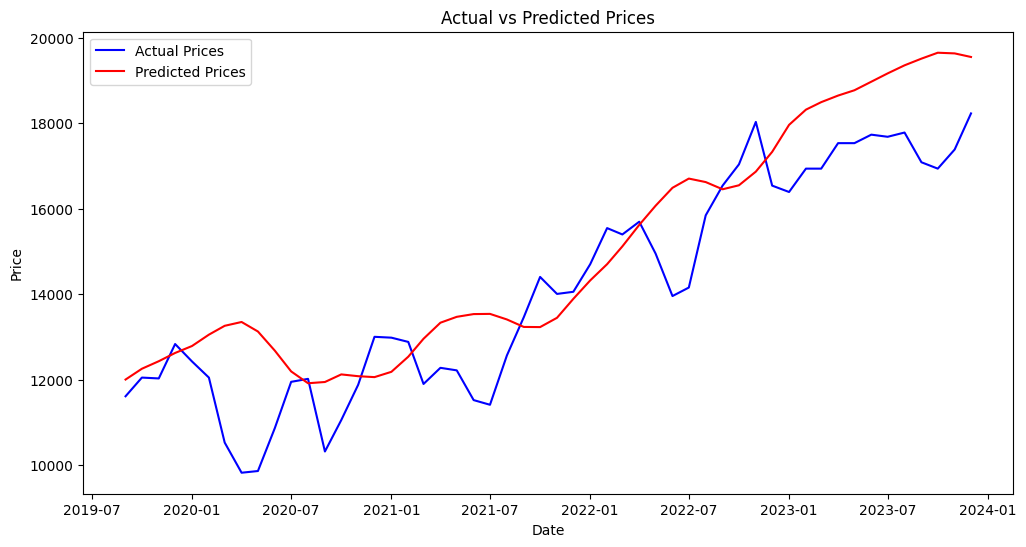

          Date Actual Price Predicted Price
0   01/09/2019     11607.64        11999.35
1   01/10/2019     12045.19        12252.35
2   01/11/2019     12025.30        12428.57
3   01/12/2019     12830.79        12621.93
4   01/01/2020     12423.07        12784.48
5   01/02/2020     12045.19        13050.40
6   01/03/2020     10523.71        13257.65
7   01/04/2020      9817.66        13347.06
8   01/05/2020      9857.44        13124.42
9   01/06/2020     10861.82        12676.50
10  01/07/2020     11945.75        12189.61
11  01/08/2020     12015.36        11912.81
12  01/09/2020     10314.88        11941.96
13  01/10/2020     11050.76        12119.73
14  01/11/2020     11876.14        12077.77
15  01/12/2020     12999.84        12056.17
16  01/01/2021     12979.96        12180.19
17  01/02/2021     12880.51        12534.50
18  01/03/2021     11896.02        12954.50
19  01/04/2021     12273.91        13330.25
20  01/05/2021     12214.24        13467.88
21  01/06/2021     11518.14     

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras_tuner import RandomSearch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65, scale=True):
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if scale:
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
        test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))
    else:
        train_prices_scaled = train_prices.reshape(-1, 1)
        test_prices_scaled = test_prices.reshape(-1, 1)

    return train_prices_scaled, test_prices_scaled

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units1', min_value=50, max_value=200, step=50),
                   return_sequences=True,
                   input_shape=(hp.Int('look_back', min_value=5, max_value=20, step=5), 1)))
    model.add(LSTM(units=hp.Int('units2', min_value=50, max_value=200, step=50), return_sequences=False))
    model.add(Dense(units=hp.Int('dense_units', min_value=10, max_value=50, step=10)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='lstm_hyperparameter_tuning',
        project_name='stock_price_prediction'
    )

    tuner.search_space_summary()

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    tuner.search(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=verbose)

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Print best hyperparameters
    print(f"Best hyperparameters: {best_hps.values}")

    return best_hps

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train(df, look_back=10, epochs=50, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    train_prices, test_prices = train_test_split(prices)

    X_train, Y_train = create_dataset(train_prices, look_back)
    X_test, Y_test = create_dataset(test_prices, look_back)

    best_hps = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    look_back = best_hps.get('look_back')
    units1 = best_hps.get('units1')
    units2 = best_hps.get('units2')
    dense_units = best_hps.get('dense_units')

    model = Sequential()
    model.add(LSTM(units=units1, return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=units2, return_sequences=False))
    model.add(Dense(units=dense_units))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit_transform(prices.reshape(-1, 1))
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)

    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

# Example usage
df_1_close = preprocessing(df_2) # Assuming df_1 is your dataframe with stock prices
train(df_1_close)

##Optimizer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65):
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    scaler = MinMaxScaler(feature_range=(0, 1))
    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    return train_prices_scaled, test_prices_scaled, scaler

def build_model(look_back, lstm_units):
    model = Sequential()
    model.add(LSTM(lstm_units, return_sequences=True, input_shape=(look_back, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(lstm_units))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def train_model(model, X_train, Y_train, epochs, batch_size, verbose):
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore, trainPredict, testPredict

def train(df, look_back=5, lstm_units=50, epochs=100, batch_size=32, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    elif 'Adj Close' in df.columns:
        prices = df['Adj Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    train_prices, test_prices, scaler = train_test_split(prices)

    X_train, Y_train = create_dataset(train_prices, look_back)
    X_test, Y_test = create_dataset(test_prices, look_back)

    best_params = {}
    best_score = float('inf')

    for look_back in [5, 10, 15]:
        for lstm_units in [50, 100, 150]:
            for epochs in [50, 100, 150]:
                for batch_size in [16, 32, 64]:
                    model = build_model(look_back=look_back, lstm_units=lstm_units)
                    model = train_model(model, X_train, Y_train, epochs, batch_size, verbose)
                    _, test_score, _, _ = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)
                    if test_score < best_score:
                        best_params = {'look_back': look_back, 'lstm_units': lstm_units, 'epochs': epochs, 'batch_size': batch_size}
                        best_score = test_score

    print("Best Parameters:", best_params)
    train_model(model, X_train, Y_train, best_params['epochs'], best_params['batch_size'], verbose)

# Define preprocessing function
def preprocessing(df):
    # Assuming preprocessing steps are performed here
    return df

# Example usage
# Assuming preprocessing function is defined elsewhere and prepares the DataFrame correctly.
df_1_close = preprocessing(df_1)
df_2_close = preprocessing(df_2)
df_3_close = preprocessing(df_3)
df_4_close = preprocessing(df_4)
df_5_close = preprocessing(df_5)
df_6_close = preprocessing(df_6)
df_7_close = preprocessing(df_7)

# Train models for each dataset
# for df_close in [df_1_close, df_2_close, df_3_close, df_4_close, df_5_close, df_6_close, df_7_close]:
#     train(df_close)
train(df_1_close)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 - 6s - 837ms/step - loss: 0.4314
Epoch 2/50
7/7 - 0s - 9ms/step - loss: 0.1338
Epoch 3/50
7/7 - 0s - 9ms/step - loss: 0.0571
Epoch 4/50
7/7 - 0s - 20ms/step - loss: 0.0246
Epoch 5/50
7/7 - 0s - 9ms/step - loss: 0.0318
Epoch 6/50
7/7 - 0s - 9ms/step - loss: 0.0168
Epoch 7/50
7/7 - 0s - 9ms/step - loss: 0.0185
Epoch 8/50
7/7 - 0s - 20ms/step - loss: 0.0182
Epoch 9/50
7/7 - 0s - 20ms/step - loss: 0.0162
Epoch 10/50
7/7 - 0s - 10ms/step - loss: 0.0141
Epoch 11/50
7/7 - 0s - 10ms/step - loss: 0.0134
Epoch 12/50
7/7 - 0s - 9ms/step - loss: 0.0132
Epoch 13/50
7/7 - 0s - 10ms/step - loss: 0.0121
Epoch 14/50
7/7 - 0s - 20ms/step - loss: 0.0120
Epoch 15/50
7/7 - 0s - 9ms/step - loss: 0.0106
Epoch 16/50
7/7 - 0s - 9ms/step - loss: 0.0089
Epoch 17/50
7/7 - 0s - 20ms/step - loss: 0.0089
Epoch 18/50
7/7 - 0s - 9ms/step - loss: 0.0099
Epoch 19/50
7/7 - 0s - 9ms/step - loss: 0.0098
Epoch 20/50
7/7 - 0s - 9ms/step - loss: 0.0087
Epoch 21/50
7/7 - 0s - 9ms/step - loss: 0.0087
Epoch 22/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 4s - 1s/step - loss: 0.4955
Epoch 2/50
4/4 - 0s - 73ms/step - loss: 0.3371
Epoch 3/50
4/4 - 0s - 14ms/step - loss: 0.1550
Epoch 4/50
4/4 - 0s - 13ms/step - loss: 0.0308
Epoch 5/50
4/4 - 0s - 16ms/step - loss: 0.0784
Epoch 6/50
4/4 - 0s - 13ms/step - loss: 0.0228
Epoch 7/50
4/4 - 0s - 14ms/step - loss: 0.0280
Epoch 8/50
4/4 - 0s - 12ms/step - loss: 0.0347
Epoch 9/50
4/4 - 0s - 15ms/step - loss: 0.0247
Epoch 10/50
4/4 - 0s - 12ms/step - loss: 0.0182
Epoch 11/50
4/4 - 0s - 12ms/step - loss: 0.0205
Epoch 12/50
4/4 - 0s - 12ms/step - loss: 0.0179
Epoch 13/50
4/4 - 0s - 12ms/step - loss: 0.0171
Epoch 14/50
4/4 - 0s - 16ms/step - loss: 0.0178
Epoch 15/50
4/4 - 0s - 15ms/step - loss: 0.0162
Epoch 16/50
4/4 - 0s - 12ms/step - loss: 0.0160
Epoch 17/50
4/4 - 0s - 14ms/step - loss: 0.0150
Epoch 18/50
4/4 - 0s - 15ms/step - loss: 0.0143
Epoch 19/50
4/4 - 0s - 15ms/step - loss: 0.0141
Epoch 20/50
4/4 - 0s - 15ms/step - loss: 0.0129
Epoch 21/50
4/4 - 0s - 12ms/step - loss: 0.0130
Epoch 22/50
4/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 2s/step - loss: 0.5237
Epoch 2/50
2/2 - 0s - 35ms/step - loss: 0.4598
Epoch 3/50
2/2 - 0s - 17ms/step - loss: 0.3920
Epoch 4/50
2/2 - 0s - 30ms/step - loss: 0.3154
Epoch 5/50
2/2 - 0s - 30ms/step - loss: 0.2270
Epoch 6/50
2/2 - 0s - 17ms/step - loss: 0.1345
Epoch 7/50
2/2 - 0s - 30ms/step - loss: 0.0512
Epoch 8/50
2/2 - 0s - 17ms/step - loss: 0.0208
Epoch 9/50
2/2 - 0s - 17ms/step - loss: 0.0673
Epoch 10/50
2/2 - 0s - 30ms/step - loss: 0.0754
Epoch 11/50
2/2 - 0s - 17ms/step - loss: 0.0392
Epoch 12/50
2/2 - 0s - 30ms/step - loss: 0.0193
Epoch 13/50
2/2 - 0s - 18ms/step - loss: 0.0205
Epoch 14/50
2/2 - 0s - 18ms/step - loss: 0.0282
Epoch 15/50
2/2 - 0s - 22ms/step - loss: 0.0342
Epoch 16/50
2/2 - 0s - 29ms/step - loss: 0.0360
Epoch 17/50
2/2 - 0s - 19ms/step - loss: 0.0280
Epoch 18/50
2/2 - 0s - 17ms/step - loss: 0.0227
Epoch 19/50
2/2 - 0s - 29ms/step - loss: 0.0174
Epoch 20/50
2/2 - 0s - 31ms/step - loss: 0.0178
Epoch 21/50
2/2 - 0s - 19ms/step - loss: 0.0208
Epoch 22/50
2/

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
7/7 - 4s - 506ms/step - loss: 0.4505
Epoch 2/100
7/7 - 0s - 12ms/step - loss: 0.1945
Epoch 3/100
7/7 - 0s - 19ms/step - loss: 0.0559
Epoch 4/100
7/7 - 0s - 10ms/step - loss: 0.0251
Epoch 5/100
7/7 - 0s - 9ms/step - loss: 0.0313
Epoch 6/100
7/7 - 0s - 20ms/step - loss: 0.0191
Epoch 7/100
7/7 - 0s - 10ms/step - loss: 0.0215
Epoch 8/100
7/7 - 0s - 9ms/step - loss: 0.0171
Epoch 9/100
7/7 - 0s - 10ms/step - loss: 0.0172
Epoch 10/100
7/7 - 0s - 9ms/step - loss: 0.0153
Epoch 11/100
7/7 - 0s - 9ms/step - loss: 0.0129
Epoch 12/100
7/7 - 0s - 20ms/step - loss: 0.0129
Epoch 13/100
7/7 - 0s - 10ms/step - loss: 0.0119
Epoch 14/100
7/7 - 0s - 10ms/step - loss: 0.0106
Epoch 15/100
7/7 - 0s - 10ms/step - loss: 0.0098
Epoch 16/100
7/7 - 0s - 20ms/step - loss: 0.0098
Epoch 17/100
7/7 - 0s - 10ms/step - loss: 0.0098
Epoch 18/100
7/7 - 0s - 9ms/step - loss: 0.0088
Epoch 19/100
7/7 - 0s - 9ms/step - loss: 0.0091
Epoch 20/100
7/7 - 0s - 9ms/step - loss: 0.0097
Epoch 21/100
7/7 - 0s - 10ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4/4 - 3s - 740ms/step - loss: 0.4964
Epoch 2/100
4/4 - 0s - 31ms/step - loss: 0.3647
Epoch 3/100
4/4 - 0s - 15ms/step - loss: 0.1974
Epoch 4/100
4/4 - 0s - 13ms/step - loss: 0.0333
Epoch 5/100
4/4 - 0s - 14ms/step - loss: 0.0803
Epoch 6/100
4/4 - 0s - 12ms/step - loss: 0.0268
Epoch 7/100
4/4 - 0s - 15ms/step - loss: 0.0280
Epoch 8/100
4/4 - 0s - 13ms/step - loss: 0.0384
Epoch 9/100
4/4 - 0s - 17ms/step - loss: 0.0285
Epoch 10/100
4/4 - 0s - 12ms/step - loss: 0.0185
Epoch 11/100
4/4 - 0s - 16ms/step - loss: 0.0218
Epoch 12/100
4/4 - 0s - 15ms/step - loss: 0.0208
Epoch 13/100
4/4 - 0s - 13ms/step - loss: 0.0183
Epoch 14/100
4/4 - 0s - 13ms/step - loss: 0.0179
Epoch 15/100
4/4 - 0s - 14ms/step - loss: 0.0183
Epoch 16/100
4/4 - 0s - 15ms/step - loss: 0.0156
Epoch 17/100
4/4 - 0s - 15ms/step - loss: 0.0163
Epoch 18/100
4/4 - 0s - 15ms/step - loss: 0.0145
Epoch 19/100
4/4 - 0s - 14ms/step - loss: 0.0149
Epoch 20/100
4/4 - 0s - 15ms/step - loss: 0.0143
Epoch 21/100
4/4 - 0s - 15ms

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 4s - 2s/step - loss: 0.5231
Epoch 2/100
2/2 - 0s - 19ms/step - loss: 0.4641
Epoch 3/100
2/2 - 0s - 30ms/step - loss: 0.4020
Epoch 4/100
2/2 - 0s - 30ms/step - loss: 0.3289
Epoch 5/100
2/2 - 0s - 30ms/step - loss: 0.2437
Epoch 6/100
2/2 - 0s - 30ms/step - loss: 0.1494
Epoch 7/100
2/2 - 0s - 18ms/step - loss: 0.0600
Epoch 8/100
2/2 - 0s - 30ms/step - loss: 0.0232
Epoch 9/100
2/2 - 0s - 18ms/step - loss: 0.0617
Epoch 10/100
2/2 - 0s - 29ms/step - loss: 0.0764
Epoch 11/100
2/2 - 0s - 29ms/step - loss: 0.0395
Epoch 12/100
2/2 - 0s - 17ms/step - loss: 0.0195
Epoch 13/100
2/2 - 0s - 17ms/step - loss: 0.0210
Epoch 14/100
2/2 - 0s - 21ms/step - loss: 0.0295
Epoch 15/100
2/2 - 0s - 29ms/step - loss: 0.0354
Epoch 16/100
2/2 - 0s - 30ms/step - loss: 0.0346
Epoch 17/100
2/2 - 0s - 30ms/step - loss: 0.0281
Epoch 18/100
2/2 - 0s - 17ms/step - loss: 0.0223
Epoch 19/100
2/2 - 0s - 23ms/step - loss: 0.0189
Epoch 20/100
2/2 - 0s - 28ms/step - loss: 0.0199
Epoch 21/100
2/2 - 0s - 18ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 403ms/step - loss: 0.4329
Epoch 2/150
7/7 - 0s - 9ms/step - loss: 0.1439
Epoch 3/150
7/7 - 0s - 9ms/step - loss: 0.0600
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0223
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0328
Epoch 6/150
7/7 - 0s - 9ms/step - loss: 0.0200
Epoch 7/150
7/7 - 0s - 15ms/step - loss: 0.0220
Epoch 8/150
7/7 - 0s - 22ms/step - loss: 0.0173
Epoch 9/150
7/7 - 0s - 14ms/step - loss: 0.0174
Epoch 10/150
7/7 - 0s - 13ms/step - loss: 0.0155
Epoch 11/150
7/7 - 0s - 21ms/step - loss: 0.0157
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0144
Epoch 13/150
7/7 - 0s - 14ms/step - loss: 0.0122
Epoch 14/150
7/7 - 0s - 14ms/step - loss: 0.0120
Epoch 15/150
7/7 - 0s - 21ms/step - loss: 0.0097
Epoch 16/150
7/7 - 0s - 20ms/step - loss: 0.0099
Epoch 17/150
7/7 - 0s - 19ms/step - loss: 0.0098
Epoch 18/150
7/7 - 0s - 13ms/step - loss: 0.0094
Epoch 19/150
7/7 - 0s - 22ms/step - loss: 0.0103
Epoch 20/150
7/7 - 0s - 19ms/step - loss: 0.0101
Epoch 21/150
7/7 - 0s - 20ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 745ms/step - loss: 0.4994
Epoch 2/150
4/4 - 0s - 13ms/step - loss: 0.3660
Epoch 3/150
4/4 - 0s - 13ms/step - loss: 0.1874
Epoch 4/150
4/4 - 0s - 14ms/step - loss: 0.0398
Epoch 5/150
4/4 - 0s - 15ms/step - loss: 0.0730
Epoch 6/150
4/4 - 0s - 15ms/step - loss: 0.0291
Epoch 7/150
4/4 - 0s - 13ms/step - loss: 0.0241
Epoch 8/150
4/4 - 0s - 12ms/step - loss: 0.0344
Epoch 9/150
4/4 - 0s - 15ms/step - loss: 0.0265
Epoch 10/150
4/4 - 0s - 14ms/step - loss: 0.0176
Epoch 11/150
4/4 - 0s - 15ms/step - loss: 0.0216
Epoch 12/150
4/4 - 0s - 12ms/step - loss: 0.0215
Epoch 13/150
4/4 - 0s - 15ms/step - loss: 0.0178
Epoch 14/150
4/4 - 0s - 13ms/step - loss: 0.0174
Epoch 15/150
4/4 - 0s - 17ms/step - loss: 0.0179
Epoch 16/150
4/4 - 0s - 13ms/step - loss: 0.0165
Epoch 17/150
4/4 - 0s - 15ms/step - loss: 0.0157
Epoch 18/150
4/4 - 0s - 15ms/step - loss: 0.0147
Epoch 19/150
4/4 - 0s - 12ms/step - loss: 0.0128
Epoch 20/150
4/4 - 0s - 13ms/step - loss: 0.0134
Epoch 21/150
4/4 - 0s - 14ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5284
Epoch 2/150
2/2 - 0s - 21ms/step - loss: 0.4702
Epoch 3/150
2/2 - 0s - 29ms/step - loss: 0.4083
Epoch 4/150
2/2 - 0s - 31ms/step - loss: 0.3379
Epoch 5/150
2/2 - 0s - 17ms/step - loss: 0.2563
Epoch 6/150
2/2 - 0s - 24ms/step - loss: 0.1689
Epoch 7/150
2/2 - 0s - 31ms/step - loss: 0.0808
Epoch 8/150
2/2 - 0s - 18ms/step - loss: 0.0228
Epoch 9/150
2/2 - 0s - 29ms/step - loss: 0.0500
Epoch 10/150
2/2 - 0s - 30ms/step - loss: 0.0807
Epoch 11/150
2/2 - 0s - 29ms/step - loss: 0.0514
Epoch 12/150
2/2 - 0s - 17ms/step - loss: 0.0242
Epoch 13/150
2/2 - 0s - 30ms/step - loss: 0.0198
Epoch 14/150
2/2 - 0s - 30ms/step - loss: 0.0277
Epoch 15/150
2/2 - 0s - 29ms/step - loss: 0.0350
Epoch 16/150
2/2 - 0s - 17ms/step - loss: 0.0364
Epoch 17/150
2/2 - 0s - 31ms/step - loss: 0.0330
Epoch 18/150
2/2 - 0s - 17ms/step - loss: 0.0278
Epoch 19/150
2/2 - 0s - 31ms/step - loss: 0.0218
Epoch 20/150
2/2 - 0s - 28ms/step - loss: 0.0207
Epoch 21/150
2/2 - 0s - 18ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 492ms/step - loss: 0.3634
Epoch 2/50
7/7 - 0s - 10ms/step - loss: 0.0603
Epoch 3/50
7/7 - 0s - 20ms/step - loss: 0.0302
Epoch 4/50
7/7 - 0s - 13ms/step - loss: 0.0246
Epoch 5/50
7/7 - 0s - 17ms/step - loss: 0.0183
Epoch 6/50
7/7 - 0s - 9ms/step - loss: 0.0169
Epoch 7/50
7/7 - 0s - 10ms/step - loss: 0.0152
Epoch 8/50
7/7 - 0s - 9ms/step - loss: 0.0148
Epoch 9/50
7/7 - 0s - 10ms/step - loss: 0.0124
Epoch 10/50
7/7 - 0s - 9ms/step - loss: 0.0111
Epoch 11/50
7/7 - 0s - 20ms/step - loss: 0.0108
Epoch 12/50
7/7 - 0s - 10ms/step - loss: 0.0090
Epoch 13/50
7/7 - 0s - 9ms/step - loss: 0.0089
Epoch 14/50
7/7 - 0s - 20ms/step - loss: 0.0087
Epoch 15/50
7/7 - 0s - 10ms/step - loss: 0.0081
Epoch 16/50
7/7 - 0s - 21ms/step - loss: 0.0074
Epoch 17/50
7/7 - 0s - 9ms/step - loss: 0.0081
Epoch 18/50
7/7 - 0s - 9ms/step - loss: 0.0077
Epoch 19/50
7/7 - 0s - 21ms/step - loss: 0.0078
Epoch 20/50
7/7 - 0s - 10ms/step - loss: 0.0084
Epoch 21/50
7/7 - 0s - 10ms/step - loss: 0.0085
Epoch 22/50
7/7 -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 5s - 1s/step - loss: 0.4626
Epoch 2/50
4/4 - 0s - 37ms/step - loss: 0.1795
Epoch 3/50
4/4 - 0s - 31ms/step - loss: 0.0613
Epoch 4/50
4/4 - 0s - 34ms/step - loss: 0.0273
Epoch 5/50
4/4 - 0s - 33ms/step - loss: 0.0345
Epoch 6/50
4/4 - 0s - 31ms/step - loss: 0.0323
Epoch 7/50
4/4 - 0s - 19ms/step - loss: 0.0175
Epoch 8/50
4/4 - 0s - 38ms/step - loss: 0.0240
Epoch 9/50
4/4 - 0s - 33ms/step - loss: 0.0168
Epoch 10/50
4/4 - 0s - 39ms/step - loss: 0.0181
Epoch 11/50
4/4 - 0s - 21ms/step - loss: 0.0170
Epoch 12/50
4/4 - 0s - 21ms/step - loss: 0.0145
Epoch 13/50
4/4 - 0s - 35ms/step - loss: 0.0142
Epoch 14/50
4/4 - 0s - 32ms/step - loss: 0.0138
Epoch 15/50
4/4 - 0s - 13ms/step - loss: 0.0127
Epoch 16/50
4/4 - 0s - 14ms/step - loss: 0.0109
Epoch 17/50
4/4 - 0s - 12ms/step - loss: 0.0112
Epoch 18/50
4/4 - 0s - 12ms/step - loss: 0.0097
Epoch 19/50
4/4 - 0s - 17ms/step - loss: 0.0095
Epoch 20/50
4/4 - 0s - 13ms/step - loss: 0.0089
Epoch 21/50
4/4 - 0s - 14ms/step - loss: 0.0095
Epoch 22/50
4/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 2s/step - loss: 0.5137
Epoch 2/50
2/2 - 0s - 18ms/step - loss: 0.4160
Epoch 3/50
2/2 - 0s - 30ms/step - loss: 0.2965
Epoch 4/50
2/2 - 0s - 31ms/step - loss: 0.1446
Epoch 5/50
2/2 - 0s - 32ms/step - loss: 0.0241
Epoch 6/50
2/2 - 0s - 35ms/step - loss: 0.0992
Epoch 7/50
2/2 - 0s - 28ms/step - loss: 0.0579
Epoch 8/50
2/2 - 0s - 18ms/step - loss: 0.0148
Epoch 9/50
2/2 - 0s - 19ms/step - loss: 0.0278
Epoch 10/50
2/2 - 0s - 29ms/step - loss: 0.0414
Epoch 11/50
2/2 - 0s - 30ms/step - loss: 0.0414
Epoch 12/50
2/2 - 0s - 31ms/step - loss: 0.0307
Epoch 13/50
2/2 - 0s - 28ms/step - loss: 0.0175
Epoch 14/50
2/2 - 0s - 29ms/step - loss: 0.0148
Epoch 15/50
2/2 - 0s - 18ms/step - loss: 0.0207
Epoch 16/50
2/2 - 0s - 29ms/step - loss: 0.0232
Epoch 17/50
2/2 - 0s - 31ms/step - loss: 0.0186
Epoch 18/50
2/2 - 0s - 17ms/step - loss: 0.0146
Epoch 19/50
2/2 - 0s - 31ms/step - loss: 0.0145
Epoch 20/50
2/2 - 0s - 17ms/step - loss: 0.0162
Epoch 21/50
2/2 - 0s - 30ms/step - loss: 0.0153
Epoch 22/50
2/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 583ms/step - loss: 0.3691
Epoch 2/100
7/7 - 0s - 14ms/step - loss: 0.0636
Epoch 3/100
7/7 - 0s - 17ms/step - loss: 0.0246
Epoch 4/100
7/7 - 0s - 10ms/step - loss: 0.0249
Epoch 5/100
7/7 - 0s - 9ms/step - loss: 0.0196
Epoch 6/100
7/7 - 0s - 20ms/step - loss: 0.0169
Epoch 7/100
7/7 - 0s - 20ms/step - loss: 0.0163
Epoch 8/100
7/7 - 0s - 10ms/step - loss: 0.0143
Epoch 9/100
7/7 - 0s - 10ms/step - loss: 0.0114
Epoch 10/100
7/7 - 0s - 10ms/step - loss: 0.0112
Epoch 11/100
7/7 - 0s - 11ms/step - loss: 0.0090
Epoch 12/100
7/7 - 0s - 10ms/step - loss: 0.0099
Epoch 13/100
7/7 - 0s - 20ms/step - loss: 0.0077
Epoch 14/100
7/7 - 0s - 10ms/step - loss: 0.0088
Epoch 15/100
7/7 - 0s - 19ms/step - loss: 0.0099
Epoch 16/100
7/7 - 0s - 9ms/step - loss: 0.0085
Epoch 17/100
7/7 - 0s - 20ms/step - loss: 0.0079
Epoch 18/100
7/7 - 0s - 9ms/step - loss: 0.0085
Epoch 19/100
7/7 - 0s - 9ms/step - loss: 0.0089
Epoch 20/100
7/7 - 0s - 9ms/step - loss: 0.0088
Epoch 21/100
7/7 - 0s - 20ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 5s - 1s/step - loss: 0.4787
Epoch 2/100
4/4 - 0s - 12ms/step - loss: 0.2461
Epoch 3/100
4/4 - 0s - 12ms/step - loss: 0.0528
Epoch 4/100
4/4 - 0s - 17ms/step - loss: 0.0413
Epoch 5/100
4/4 - 0s - 33ms/step - loss: 0.0343
Epoch 6/100
4/4 - 0s - 14ms/step - loss: 0.0378
Epoch 7/100
4/4 - 0s - 13ms/step - loss: 0.0185
Epoch 8/100
4/4 - 0s - 12ms/step - loss: 0.0238
Epoch 9/100
4/4 - 0s - 13ms/step - loss: 0.0201
Epoch 10/100
4/4 - 0s - 15ms/step - loss: 0.0183
Epoch 11/100
4/4 - 0s - 15ms/step - loss: 0.0173
Epoch 12/100
4/4 - 0s - 14ms/step - loss: 0.0153
Epoch 13/100
4/4 - 0s - 14ms/step - loss: 0.0141
Epoch 14/100
4/4 - 0s - 12ms/step - loss: 0.0124
Epoch 15/100
4/4 - 0s - 15ms/step - loss: 0.0124
Epoch 16/100
4/4 - 0s - 13ms/step - loss: 0.0119
Epoch 17/100
4/4 - 0s - 14ms/step - loss: 0.0102
Epoch 18/100
4/4 - 0s - 12ms/step - loss: 0.0101
Epoch 19/100
4/4 - 0s - 12ms/step - loss: 0.0099
Epoch 20/100
4/4 - 0s - 16ms/step - loss: 0.0092
Epoch 21/100
4/4 - 0s - 14ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 2s/step - loss: 0.5152
Epoch 2/100
2/2 - 0s - 56ms/step - loss: 0.4158
Epoch 3/100
2/2 - 0s - 70ms/step - loss: 0.2887
Epoch 4/100
2/2 - 0s - 31ms/step - loss: 0.1264
Epoch 5/100
2/2 - 0s - 29ms/step - loss: 0.0266
Epoch 6/100
2/2 - 0s - 29ms/step - loss: 0.0974
Epoch 7/100
2/2 - 0s - 30ms/step - loss: 0.0456
Epoch 8/100
2/2 - 0s - 31ms/step - loss: 0.0154
Epoch 9/100
2/2 - 0s - 27ms/step - loss: 0.0303
Epoch 10/100
2/2 - 0s - 31ms/step - loss: 0.0429
Epoch 11/100
2/2 - 0s - 26ms/step - loss: 0.0405
Epoch 12/100
2/2 - 0s - 28ms/step - loss: 0.0277
Epoch 13/100
2/2 - 0s - 34ms/step - loss: 0.0165
Epoch 14/100
2/2 - 0s - 66ms/step - loss: 0.0181
Epoch 15/100
2/2 - 0s - 30ms/step - loss: 0.0236
Epoch 16/100
2/2 - 0s - 31ms/step - loss: 0.0230
Epoch 17/100
2/2 - 0s - 25ms/step - loss: 0.0172
Epoch 18/100
2/2 - 0s - 31ms/step - loss: 0.0153
Epoch 19/100
2/2 - 0s - 26ms/step - loss: 0.0169
Epoch 20/100
2/2 - 0s - 33ms/step - loss: 0.0180
Epoch 21/100
2/2 - 0s - 69ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 414ms/step - loss: 0.4133
Epoch 2/150
7/7 - 0s - 9ms/step - loss: 0.1008
Epoch 3/150
7/7 - 0s - 10ms/step - loss: 0.0280
Epoch 4/150
7/7 - 0s - 10ms/step - loss: 0.0318
Epoch 5/150
7/7 - 0s - 9ms/step - loss: 0.0224
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0162
Epoch 7/150
7/7 - 0s - 12ms/step - loss: 0.0158
Epoch 8/150
7/7 - 0s - 19ms/step - loss: 0.0140
Epoch 9/150
7/7 - 0s - 20ms/step - loss: 0.0123
Epoch 10/150
7/7 - 0s - 9ms/step - loss: 0.0114
Epoch 11/150
7/7 - 0s - 20ms/step - loss: 0.0114
Epoch 12/150
7/7 - 0s - 10ms/step - loss: 0.0093
Epoch 13/150
7/7 - 0s - 9ms/step - loss: 0.0083
Epoch 14/150
7/7 - 0s - 10ms/step - loss: 0.0078
Epoch 15/150
7/7 - 0s - 20ms/step - loss: 0.0100
Epoch 16/150
7/7 - 0s - 9ms/step - loss: 0.0082
Epoch 17/150
7/7 - 0s - 20ms/step - loss: 0.0087
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0085
Epoch 19/150
7/7 - 0s - 19ms/step - loss: 0.0088
Epoch 20/150
7/7 - 0s - 9ms/step - loss: 0.0086
Epoch 21/150
7/7 - 0s - 9ms/step - loss: 0.009

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 4s - 983ms/step - loss: 0.4513
Epoch 2/150
4/4 - 0s - 32ms/step - loss: 0.1612
Epoch 3/150
4/4 - 0s - 32ms/step - loss: 0.0736
Epoch 4/150
4/4 - 0s - 35ms/step - loss: 0.0250
Epoch 5/150
4/4 - 0s - 14ms/step - loss: 0.0385
Epoch 6/150
4/4 - 0s - 17ms/step - loss: 0.0296
Epoch 7/150
4/4 - 0s - 13ms/step - loss: 0.0177
Epoch 8/150
4/4 - 0s - 15ms/step - loss: 0.0236
Epoch 9/150
4/4 - 0s - 14ms/step - loss: 0.0164
Epoch 10/150
4/4 - 0s - 15ms/step - loss: 0.0181
Epoch 11/150
4/4 - 0s - 12ms/step - loss: 0.0154
Epoch 12/150
4/4 - 0s - 15ms/step - loss: 0.0134
Epoch 13/150
4/4 - 0s - 12ms/step - loss: 0.0146
Epoch 14/150
4/4 - 0s - 12ms/step - loss: 0.0128
Epoch 15/150
4/4 - 0s - 16ms/step - loss: 0.0125
Epoch 16/150
4/4 - 0s - 13ms/step - loss: 0.0114
Epoch 17/150
4/4 - 0s - 14ms/step - loss: 0.0101
Epoch 18/150
4/4 - 0s - 12ms/step - loss: 0.0110
Epoch 19/150
4/4 - 0s - 14ms/step - loss: 0.0093
Epoch 20/150
4/4 - 0s - 12ms/step - loss: 0.0096
Epoch 21/150
4/4 - 0s - 12ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 4s - 2s/step - loss: 0.5136
Epoch 2/150
2/2 - 0s - 62ms/step - loss: 0.4076
Epoch 3/150
2/2 - 0s - 64ms/step - loss: 0.2726
Epoch 4/150
2/2 - 0s - 31ms/step - loss: 0.1091
Epoch 5/150
2/2 - 0s - 63ms/step - loss: 0.0203
Epoch 6/150
2/2 - 0s - 31ms/step - loss: 0.1095
Epoch 7/150
2/2 - 0s - 29ms/step - loss: 0.0484
Epoch 8/150
2/2 - 0s - 29ms/step - loss: 0.0159
Epoch 9/150
2/2 - 0s - 30ms/step - loss: 0.0304
Epoch 10/150
2/2 - 0s - 30ms/step - loss: 0.0453
Epoch 11/150
2/2 - 0s - 18ms/step - loss: 0.0438
Epoch 12/150
2/2 - 0s - 17ms/step - loss: 0.0318
Epoch 13/150
2/2 - 0s - 29ms/step - loss: 0.0195
Epoch 14/150
2/2 - 0s - 29ms/step - loss: 0.0164
Epoch 15/150
2/2 - 0s - 19ms/step - loss: 0.0228
Epoch 16/150
2/2 - 0s - 29ms/step - loss: 0.0249
Epoch 17/150
2/2 - 0s - 34ms/step - loss: 0.0186
Epoch 18/150
2/2 - 0s - 23ms/step - loss: 0.0147
Epoch 19/150
2/2 - 0s - 29ms/step - loss: 0.0156
Epoch 20/150
2/2 - 0s - 31ms/step - loss: 0.0180
Epoch 21/150
2/2 - 0s - 29ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 682ms/step - loss: 0.2892
Epoch 2/50
7/7 - 0s - 34ms/step - loss: 0.0538
Epoch 3/50
7/7 - 0s - 20ms/step - loss: 0.0346
Epoch 4/50
7/7 - 0s - 20ms/step - loss: 0.0220
Epoch 5/50
7/7 - 0s - 20ms/step - loss: 0.0182
Epoch 6/50
7/7 - 0s - 20ms/step - loss: 0.0131
Epoch 7/50
7/7 - 0s - 10ms/step - loss: 0.0131
Epoch 8/50
7/7 - 0s - 10ms/step - loss: 0.0109
Epoch 9/50
7/7 - 0s - 20ms/step - loss: 0.0103
Epoch 10/50
7/7 - 0s - 10ms/step - loss: 0.0088
Epoch 11/50
7/7 - 0s - 20ms/step - loss: 0.0089
Epoch 12/50
7/7 - 0s - 20ms/step - loss: 0.0093
Epoch 13/50
7/7 - 0s - 20ms/step - loss: 0.0108
Epoch 14/50
7/7 - 0s - 20ms/step - loss: 0.0086
Epoch 15/50
7/7 - 0s - 10ms/step - loss: 0.0077
Epoch 16/50
7/7 - 0s - 10ms/step - loss: 0.0090
Epoch 17/50
7/7 - 0s - 10ms/step - loss: 0.0082
Epoch 18/50
7/7 - 0s - 20ms/step - loss: 0.0082
Epoch 19/50
7/7 - 0s - 10ms/step - loss: 0.0074
Epoch 20/50
7/7 - 0s - 20ms/step - loss: 0.0099
Epoch 21/50
7/7 - 0s - 10ms/step - loss: 0.0077
Epoch 22/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 739ms/step - loss: 0.4693
Epoch 2/50
4/4 - 0s - 31ms/step - loss: 0.1721
Epoch 3/50
4/4 - 0s - 14ms/step - loss: 0.0801
Epoch 4/50
4/4 - 0s - 13ms/step - loss: 0.0287
Epoch 5/50
4/4 - 0s - 13ms/step - loss: 0.0414
Epoch 6/50
4/4 - 0s - 15ms/step - loss: 0.0169
Epoch 7/50
4/4 - 0s - 15ms/step - loss: 0.0235
Epoch 8/50
4/4 - 0s - 13ms/step - loss: 0.0160
Epoch 9/50
4/4 - 0s - 17ms/step - loss: 0.0191
Epoch 10/50
4/4 - 0s - 13ms/step - loss: 0.0143
Epoch 11/50
4/4 - 0s - 14ms/step - loss: 0.0162
Epoch 12/50
4/4 - 0s - 15ms/step - loss: 0.0124
Epoch 13/50
4/4 - 0s - 14ms/step - loss: 0.0123
Epoch 14/50
4/4 - 0s - 18ms/step - loss: 0.0109
Epoch 15/50
4/4 - 0s - 21ms/step - loss: 0.0104
Epoch 16/50
4/4 - 0s - 35ms/step - loss: 0.0095
Epoch 17/50
4/4 - 0s - 19ms/step - loss: 0.0089
Epoch 18/50
4/4 - 0s - 17ms/step - loss: 0.0096
Epoch 19/50
4/4 - 0s - 36ms/step - loss: 0.0089
Epoch 20/50
4/4 - 0s - 36ms/step - loss: 0.0089
Epoch 21/50
4/4 - 0s - 20ms/step - loss: 0.0083
Epoch 22/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5150
Epoch 2/50
2/2 - 0s - 21ms/step - loss: 0.3939
Epoch 3/50
2/2 - 0s - 18ms/step - loss: 0.2170
Epoch 4/50
2/2 - 0s - 18ms/step - loss: 0.0330
Epoch 5/50
2/2 - 0s - 19ms/step - loss: 0.1210
Epoch 6/50
2/2 - 0s - 19ms/step - loss: 0.0336
Epoch 7/50
2/2 - 0s - 18ms/step - loss: 0.0231
Epoch 8/50
2/2 - 0s - 30ms/step - loss: 0.0480
Epoch 9/50
2/2 - 0s - 18ms/step - loss: 0.0503
Epoch 10/50
2/2 - 0s - 31ms/step - loss: 0.0342
Epoch 11/50
2/2 - 0s - 28ms/step - loss: 0.0185
Epoch 12/50
2/2 - 0s - 18ms/step - loss: 0.0187
Epoch 13/50
2/2 - 0s - 18ms/step - loss: 0.0279
Epoch 14/50
2/2 - 0s - 19ms/step - loss: 0.0248
Epoch 15/50
2/2 - 0s - 18ms/step - loss: 0.0169
Epoch 16/50
2/2 - 0s - 18ms/step - loss: 0.0157
Epoch 17/50
2/2 - 0s - 18ms/step - loss: 0.0190
Epoch 18/50
2/2 - 0s - 30ms/step - loss: 0.0195
Epoch 19/50
2/2 - 0s - 18ms/step - loss: 0.0163
Epoch 20/50
2/2 - 0s - 18ms/step - loss: 0.0147
Epoch 21/50
2/2 - 0s - 19ms/step - loss: 0.0146
Epoch 22/50
2/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 445ms/step - loss: 0.3523
Epoch 2/100
7/7 - 0s - 17ms/step - loss: 0.0414
Epoch 3/100
7/7 - 0s - 13ms/step - loss: 0.0322
Epoch 4/100
7/7 - 0s - 21ms/step - loss: 0.0182
Epoch 5/100
7/7 - 0s - 14ms/step - loss: 0.0156
Epoch 6/100
7/7 - 0s - 21ms/step - loss: 0.0137
Epoch 7/100
7/7 - 0s - 18ms/step - loss: 0.0130
Epoch 8/100
7/7 - 0s - 20ms/step - loss: 0.0107
Epoch 9/100
7/7 - 0s - 14ms/step - loss: 0.0106
Epoch 10/100
7/7 - 0s - 21ms/step - loss: 0.0089
Epoch 11/100
7/7 - 0s - 19ms/step - loss: 0.0079
Epoch 12/100
7/7 - 0s - 17ms/step - loss: 0.0078
Epoch 13/100
7/7 - 0s - 14ms/step - loss: 0.0084
Epoch 14/100
7/7 - 0s - 20ms/step - loss: 0.0097
Epoch 15/100
7/7 - 0s - 19ms/step - loss: 0.0103
Epoch 16/100
7/7 - 0s - 20ms/step - loss: 0.0079
Epoch 17/100
7/7 - 0s - 15ms/step - loss: 0.0079
Epoch 18/100
7/7 - 0s - 15ms/step - loss: 0.0077
Epoch 19/100
7/7 - 0s - 23ms/step - loss: 0.0074
Epoch 20/100
7/7 - 0s - 17ms/step - loss: 0.0078
Epoch 21/100
7/7 - 0s - 15ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 4s - 930ms/step - loss: 0.4492
Epoch 2/100
4/4 - 0s - 31ms/step - loss: 0.1095
Epoch 3/100
4/4 - 0s - 35ms/step - loss: 0.0538
Epoch 4/100
4/4 - 0s - 31ms/step - loss: 0.0380
Epoch 5/100
4/4 - 0s - 34ms/step - loss: 0.0299
Epoch 6/100
4/4 - 0s - 29ms/step - loss: 0.0201
Epoch 7/100
4/4 - 0s - 26ms/step - loss: 0.0183
Epoch 8/100
4/4 - 0s - 35ms/step - loss: 0.0173
Epoch 9/100
4/4 - 0s - 32ms/step - loss: 0.0166
Epoch 10/100
4/4 - 0s - 30ms/step - loss: 0.0157
Epoch 11/100
4/4 - 0s - 34ms/step - loss: 0.0140
Epoch 12/100
4/4 - 0s - 38ms/step - loss: 0.0130
Epoch 13/100
4/4 - 0s - 36ms/step - loss: 0.0119
Epoch 14/100
4/4 - 0s - 31ms/step - loss: 0.0101
Epoch 15/100
4/4 - 0s - 36ms/step - loss: 0.0102
Epoch 16/100
4/4 - 0s - 34ms/step - loss: 0.0091
Epoch 17/100
4/4 - 0s - 32ms/step - loss: 0.0092
Epoch 18/100
4/4 - 0s - 24ms/step - loss: 0.0087
Epoch 19/100
4/4 - 0s - 36ms/step - loss: 0.0083
Epoch 20/100
4/4 - 0s - 34ms/step - loss: 0.0074
Epoch 21/100
4/4 - 0s - 35ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5092
Epoch 2/100
2/2 - 0s - 66ms/step - loss: 0.3696
Epoch 3/100
2/2 - 0s - 28ms/step - loss: 0.1728
Epoch 4/100
2/2 - 0s - 27ms/step - loss: 0.0338
Epoch 5/100
2/2 - 0s - 29ms/step - loss: 0.1093
Epoch 6/100
2/2 - 0s - 28ms/step - loss: 0.0209
Epoch 7/100
2/2 - 0s - 28ms/step - loss: 0.0298
Epoch 8/100
2/2 - 0s - 27ms/step - loss: 0.0495
Epoch 9/100
2/2 - 0s - 31ms/step - loss: 0.0463
Epoch 10/100
2/2 - 0s - 27ms/step - loss: 0.0289
Epoch 11/100
2/2 - 0s - 28ms/step - loss: 0.0152
Epoch 12/100
2/2 - 0s - 30ms/step - loss: 0.0218
Epoch 13/100
2/2 - 0s - 30ms/step - loss: 0.0285
Epoch 14/100
2/2 - 0s - 31ms/step - loss: 0.0209
Epoch 15/100
2/2 - 0s - 23ms/step - loss: 0.0141
Epoch 16/100
2/2 - 0s - 23ms/step - loss: 0.0179
Epoch 17/100
2/2 - 0s - 24ms/step - loss: 0.0201
Epoch 18/100
2/2 - 0s - 29ms/step - loss: 0.0194
Epoch 19/100
2/2 - 0s - 23ms/step - loss: 0.0146
Epoch 20/100
2/2 - 0s - 23ms/step - loss: 0.0136
Epoch 21/100
2/2 - 0s - 30ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 559ms/step - loss: 0.3186
Epoch 2/150
7/7 - 0s - 15ms/step - loss: 0.0531
Epoch 3/150
7/7 - 0s - 22ms/step - loss: 0.0517
Epoch 4/150
7/7 - 0s - 19ms/step - loss: 0.0255
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0174
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0168
Epoch 7/150
7/7 - 0s - 14ms/step - loss: 0.0145
Epoch 8/150
7/7 - 0s - 15ms/step - loss: 0.0122
Epoch 9/150
7/7 - 0s - 14ms/step - loss: 0.0113
Epoch 10/150
7/7 - 0s - 16ms/step - loss: 0.0098
Epoch 11/150
7/7 - 0s - 21ms/step - loss: 0.0095
Epoch 12/150
7/7 - 0s - 14ms/step - loss: 0.0085
Epoch 13/150
7/7 - 0s - 20ms/step - loss: 0.0082
Epoch 14/150
7/7 - 0s - 13ms/step - loss: 0.0079
Epoch 15/150
7/7 - 0s - 20ms/step - loss: 0.0080
Epoch 16/150
7/7 - 0s - 14ms/step - loss: 0.0089
Epoch 17/150
7/7 - 0s - 14ms/step - loss: 0.0071
Epoch 18/150
7/7 - 0s - 21ms/step - loss: 0.0093
Epoch 19/150
7/7 - 0s - 16ms/step - loss: 0.0075
Epoch 20/150
7/7 - 0s - 17ms/step - loss: 0.0065
Epoch 21/150
7/7 - 0s - 16ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
4/4 - 4s - 893ms/step - loss: 0.4628
Epoch 2/150
4/4 - 0s - 13ms/step - loss: 0.1385
Epoch 3/150
4/4 - 0s - 13ms/step - loss: 0.0778
Epoch 4/150
4/4 - 0s - 15ms/step - loss: 0.0285
Epoch 5/150
4/4 - 0s - 13ms/step - loss: 0.0387
Epoch 6/150
4/4 - 0s - 15ms/step - loss: 0.0171
Epoch 7/150
4/4 - 0s - 15ms/step - loss: 0.0261
Epoch 8/150
4/4 - 0s - 14ms/step - loss: 0.0146
Epoch 9/150
4/4 - 0s - 15ms/step - loss: 0.0180
Epoch 10/150
4/4 - 0s - 14ms/step - loss: 0.0141
Epoch 11/150
4/4 - 0s - 15ms/step - loss: 0.0140
Epoch 12/150
4/4 - 0s - 13ms/step - loss: 0.0120
Epoch 13/150
4/4 - 0s - 13ms/step - loss: 0.0131
Epoch 14/150
4/4 - 0s - 13ms/step - loss: 0.0102
Epoch 15/150
4/4 - 0s - 15ms/step - loss: 0.0113
Epoch 16/150
4/4 - 0s - 13ms/step - loss: 0.0098
Epoch 17/150
4/4 - 0s - 13ms/step - loss: 0.0096
Epoch 18/150
4/4 - 0s - 14ms/step - loss: 0.0093
Epoch 19/150
4/4 - 0s - 14ms/step - loss: 0.0084
Epoch 20/150
4/4 - 0s - 13ms/step - loss: 0.0085
Epoch 21/150
4/4 - 0s - 13ms

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
2/2 - 3s - 2s/step - loss: 0.5058
Epoch 2/150
2/2 - 0s - 56ms/step - loss: 0.3638
Epoch 3/150
2/2 - 0s - 29ms/step - loss: 0.1616
Epoch 4/150
2/2 - 0s - 19ms/step - loss: 0.0438
Epoch 5/150
2/2 - 0s - 31ms/step - loss: 0.1022
Epoch 6/150
2/2 - 0s - 20ms/step - loss: 0.0186
Epoch 7/150
2/2 - 0s - 19ms/step - loss: 0.0317
Epoch 8/150
2/2 - 0s - 19ms/step - loss: 0.0516
Epoch 9/150
2/2 - 0s - 31ms/step - loss: 0.0493
Epoch 10/150
2/2 - 0s - 29ms/step - loss: 0.0284
Epoch 11/150
2/2 - 0s - 29ms/step - loss: 0.0160
Epoch 12/150
2/2 - 0s - 19ms/step - loss: 0.0221
Epoch 13/150
2/2 - 0s - 19ms/step - loss: 0.0300
Epoch 14/150
2/2 - 0s - 19ms/step - loss: 0.0233
Epoch 15/150
2/2 - 0s - 19ms/step - loss: 0.0162
Epoch 16/150
2/2 - 0s - 31ms/step - loss: 0.0184
Epoch 17/150
2/2 - 0s - 24ms/step - loss: 0.0215
Epoch 18/150
2/2 - 0s - 26ms/step - loss: 0.0195
Epoch 19/150
2/2 - 0s - 30ms/step - loss: 0.0161
Epoch 20/150
2/2 - 0s - 29ms/step - loss: 0.0151
Epoch 21/150
2/2 - 0s - 30ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 - 3s - 432ms/step - loss: 0.4409
Epoch 2/50
7/7 - 0s - 10ms/step - loss: 0.1531
Epoch 3/50
7/7 - 0s - 9ms/step - loss: 0.0628
Epoch 4/50
7/7 - 0s - 9ms/step - loss: 0.0259
Epoch 5/50
7/7 - 0s - 20ms/step - loss: 0.0351
Epoch 6/50
7/7 - 0s - 9ms/step - loss: 0.0199
Epoch 7/50
7/7 - 0s - 20ms/step - loss: 0.0223
Epoch 8/50
7/7 - 0s - 20ms/step - loss: 0.0181
Epoch 9/50
7/7 - 0s - 10ms/step - loss: 0.0174
Epoch 10/50
7/7 - 0s - 20ms/step - loss: 0.0163
Epoch 11/50
7/7 - 0s - 9ms/step - loss: 0.0150
Epoch 12/50
7/7 - 0s - 20ms/step - loss: 0.0136
Epoch 13/50
7/7 - 0s - 9ms/step - loss: 0.0144
Epoch 14/50
7/7 - 0s - 11ms/step - loss: 0.0123
Epoch 15/50
7/7 - 0s - 10ms/step - loss: 0.0119
Epoch 16/50
7/7 - 0s - 9ms/step - loss: 0.0108
Epoch 17/50
7/7 - 0s - 9ms/step - loss: 0.0103
Epoch 18/50
7/7 - 0s - 20ms/step - loss: 0.0089
Epoch 19/50
7/7 - 0s - 10ms/step - loss: 0.0098
Epoch 20/50
7/7 - 0s - 9ms/step - loss: 0.0085
Epoch 21/50
7/7 - 0s - 20ms/step - loss: 0.0097
Epoch 22

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 855ms/step - loss: 0.4909
Epoch 2/50
4/4 - 0s - 28ms/step - loss: 0.3469
Epoch 3/50
4/4 - 0s - 33ms/step - loss: 0.1588
Epoch 4/50
4/4 - 0s - 35ms/step - loss: 0.0310
Epoch 5/50
4/4 - 0s - 19ms/step - loss: 0.0674
Epoch 6/50
4/4 - 0s - 34ms/step - loss: 0.0205
Epoch 7/50
4/4 - 0s - 36ms/step - loss: 0.0271
Epoch 8/50
4/4 - 0s - 20ms/step - loss: 0.0324
Epoch 9/50
4/4 - 0s - 18ms/step - loss: 0.0205
Epoch 10/50
4/4 - 0s - 16ms/step - loss: 0.0176
Epoch 11/50
4/4 - 0s - 35ms/step - loss: 0.0208
Epoch 12/50
4/4 - 0s - 37ms/step - loss: 0.0163
Epoch 13/50
4/4 - 0s - 35ms/step - loss: 0.0154
Epoch 14/50
4/4 - 0s - 38ms/step - loss: 0.0167
Epoch 15/50
4/4 - 0s - 33ms/step - loss: 0.0143
Epoch 16/50
4/4 - 0s - 20ms/step - loss: 0.0143
Epoch 17/50
4/4 - 0s - 31ms/step - loss: 0.0135
Epoch 18/50
4/4 - 0s - 15ms/step - loss: 0.0128
Epoch 19/50
4/4 - 0s - 13ms/step - loss: 0.0118
Epoch 20/50
4/4 - 0s - 15ms/step - loss: 0.0119
Epoch 21/50
4/4 - 0s - 15ms/step - loss: 0.0114
Epoch 22/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5258
Epoch 2/50
2/2 - 0s - 19ms/step - loss: 0.4553
Epoch 3/50
2/2 - 0s - 31ms/step - loss: 0.3830
Epoch 4/50
2/2 - 0s - 30ms/step - loss: 0.3011
Epoch 5/50
2/2 - 0s - 32ms/step - loss: 0.2089
Epoch 6/50
2/2 - 0s - 30ms/step - loss: 0.1143
Epoch 7/50
2/2 - 0s - 29ms/step - loss: 0.0361
Epoch 8/50
2/2 - 0s - 30ms/step - loss: 0.0334
Epoch 9/50
2/2 - 0s - 29ms/step - loss: 0.0746
Epoch 10/50
2/2 - 0s - 34ms/step - loss: 0.0636
Epoch 11/50
2/2 - 0s - 32ms/step - loss: 0.0281
Epoch 12/50
2/2 - 0s - 31ms/step - loss: 0.0189
Epoch 13/50
2/2 - 0s - 31ms/step - loss: 0.0246
Epoch 14/50
2/2 - 0s - 30ms/step - loss: 0.0315
Epoch 15/50
2/2 - 0s - 33ms/step - loss: 0.0344
Epoch 16/50
2/2 - 0s - 28ms/step - loss: 0.0334
Epoch 17/50
2/2 - 0s - 29ms/step - loss: 0.0273
Epoch 18/50
2/2 - 0s - 19ms/step - loss: 0.0213
Epoch 19/50
2/2 - 0s - 19ms/step - loss: 0.0191
Epoch 20/50
2/2 - 0s - 18ms/step - loss: 0.0189
Epoch 21/50
2/2 - 0s - 29ms/step - loss: 0.0226
Epoch 22/50
2/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 565ms/step - loss: 0.4076
Epoch 2/100
7/7 - 0s - 16ms/step - loss: 0.1017
Epoch 3/100
7/7 - 0s - 19ms/step - loss: 0.0476
Epoch 4/100
7/7 - 0s - 15ms/step - loss: 0.0249
Epoch 5/100
7/7 - 0s - 20ms/step - loss: 0.0229
Epoch 6/100
7/7 - 0s - 19ms/step - loss: 0.0169
Epoch 7/100
7/7 - 0s - 10ms/step - loss: 0.0177
Epoch 8/100
7/7 - 0s - 9ms/step - loss: 0.0157
Epoch 9/100
7/7 - 0s - 20ms/step - loss: 0.0137
Epoch 10/100
7/7 - 0s - 10ms/step - loss: 0.0131
Epoch 11/100
7/7 - 0s - 20ms/step - loss: 0.0126
Epoch 12/100
7/7 - 0s - 10ms/step - loss: 0.0135
Epoch 13/100
7/7 - 0s - 9ms/step - loss: 0.0131
Epoch 14/100
7/7 - 0s - 10ms/step - loss: 0.0119
Epoch 15/100
7/7 - 0s - 10ms/step - loss: 0.0115
Epoch 16/100
7/7 - 0s - 22ms/step - loss: 0.0105
Epoch 17/100
7/7 - 0s - 18ms/step - loss: 0.0102
Epoch 18/100
7/7 - 0s - 9ms/step - loss: 0.0086
Epoch 19/100
7/7 - 0s - 20ms/step - loss: 0.0094
Epoch 20/100
7/7 - 0s - 10ms/step - loss: 0.0105
Epoch 21/100
7/7 - 0s - 20ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 5s - 1s/step - loss: 0.5042
Epoch 2/100
4/4 - 0s - 30ms/step - loss: 0.3931
Epoch 3/100
4/4 - 0s - 13ms/step - loss: 0.2416
Epoch 4/100
4/4 - 0s - 15ms/step - loss: 0.0673
Epoch 5/100
4/4 - 0s - 13ms/step - loss: 0.0644
Epoch 6/100
4/4 - 0s - 13ms/step - loss: 0.0406
Epoch 7/100
4/4 - 0s - 15ms/step - loss: 0.0250
Epoch 8/100
4/4 - 0s - 13ms/step - loss: 0.0365
Epoch 9/100
4/4 - 0s - 15ms/step - loss: 0.0303
Epoch 10/100
4/4 - 0s - 16ms/step - loss: 0.0192
Epoch 11/100
4/4 - 0s - 14ms/step - loss: 0.0216
Epoch 12/100
4/4 - 0s - 13ms/step - loss: 0.0213
Epoch 13/100
4/4 - 0s - 14ms/step - loss: 0.0182
Epoch 14/100
4/4 - 0s - 13ms/step - loss: 0.0178
Epoch 15/100
4/4 - 0s - 15ms/step - loss: 0.0163
Epoch 16/100
4/4 - 0s - 15ms/step - loss: 0.0157
Epoch 17/100
4/4 - 0s - 15ms/step - loss: 0.0149
Epoch 18/100
4/4 - 0s - 14ms/step - loss: 0.0153
Epoch 19/100
4/4 - 0s - 15ms/step - loss: 0.0158
Epoch 20/100
4/4 - 0s - 15ms/step - loss: 0.0139
Epoch 21/100
4/4 - 0s - 15ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 4s - 2s/step - loss: 0.5130
Epoch 2/100
2/2 - 0s - 21ms/step - loss: 0.4501
Epoch 3/100
2/2 - 0s - 30ms/step - loss: 0.3787
Epoch 4/100
2/2 - 0s - 30ms/step - loss: 0.2971
Epoch 5/100
2/2 - 0s - 29ms/step - loss: 0.2014
Epoch 6/100
2/2 - 0s - 29ms/step - loss: 0.1008
Epoch 7/100
2/2 - 0s - 18ms/step - loss: 0.0259
Epoch 8/100
2/2 - 0s - 30ms/step - loss: 0.0359
Epoch 9/100
2/2 - 0s - 32ms/step - loss: 0.0900
Epoch 10/100
2/2 - 0s - 19ms/step - loss: 0.0488
Epoch 11/100
2/2 - 0s - 18ms/step - loss: 0.0226
Epoch 12/100
2/2 - 0s - 18ms/step - loss: 0.0181
Epoch 13/100
2/2 - 0s - 29ms/step - loss: 0.0268
Epoch 14/100
2/2 - 0s - 18ms/step - loss: 0.0329
Epoch 15/100
2/2 - 0s - 31ms/step - loss: 0.0341
Epoch 16/100
2/2 - 0s - 34ms/step - loss: 0.0298
Epoch 17/100
2/2 - 0s - 25ms/step - loss: 0.0221
Epoch 18/100
2/2 - 0s - 18ms/step - loss: 0.0190
Epoch 19/100
2/2 - 0s - 29ms/step - loss: 0.0173
Epoch 20/100
2/2 - 0s - 30ms/step - loss: 0.0183
Epoch 21/100
2/2 - 0s - 29ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 405ms/step - loss: 0.4460
Epoch 2/150
7/7 - 0s - 10ms/step - loss: 0.1709
Epoch 3/150
7/7 - 0s - 9ms/step - loss: 0.0465
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0234
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0297
Epoch 6/150
7/7 - 0s - 10ms/step - loss: 0.0211
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0213
Epoch 8/150
7/7 - 0s - 9ms/step - loss: 0.0168
Epoch 9/150
7/7 - 0s - 14ms/step - loss: 0.0162
Epoch 10/150
7/7 - 0s - 16ms/step - loss: 0.0147
Epoch 11/150
7/7 - 0s - 20ms/step - loss: 0.0140
Epoch 12/150
7/7 - 0s - 19ms/step - loss: 0.0116
Epoch 13/150
7/7 - 0s - 20ms/step - loss: 0.0110
Epoch 14/150
7/7 - 0s - 13ms/step - loss: 0.0098
Epoch 15/150
7/7 - 0s - 14ms/step - loss: 0.0085
Epoch 16/150
7/7 - 0s - 20ms/step - loss: 0.0103
Epoch 17/150
7/7 - 0s - 20ms/step - loss: 0.0093
Epoch 18/150
7/7 - 0s - 16ms/step - loss: 0.0093
Epoch 19/150
7/7 - 0s - 15ms/step - loss: 0.0094
Epoch 20/150
7/7 - 0s - 14ms/step - loss: 0.0101
Epoch 21/150
7/7 - 0s - 20ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 727ms/step - loss: 0.4933
Epoch 2/150
4/4 - 0s - 13ms/step - loss: 0.3369
Epoch 3/150
4/4 - 0s - 35ms/step - loss: 0.1494
Epoch 4/150
4/4 - 0s - 13ms/step - loss: 0.0286
Epoch 5/150
4/4 - 0s - 13ms/step - loss: 0.0658
Epoch 6/150
4/4 - 0s - 13ms/step - loss: 0.0206
Epoch 7/150
4/4 - 0s - 14ms/step - loss: 0.0250
Epoch 8/150
4/4 - 0s - 15ms/step - loss: 0.0304
Epoch 9/150
4/4 - 0s - 13ms/step - loss: 0.0227
Epoch 10/150
4/4 - 0s - 13ms/step - loss: 0.0184
Epoch 11/150
4/4 - 0s - 14ms/step - loss: 0.0199
Epoch 12/150
4/4 - 0s - 15ms/step - loss: 0.0179
Epoch 13/150
4/4 - 0s - 13ms/step - loss: 0.0167
Epoch 14/150
4/4 - 0s - 15ms/step - loss: 0.0167
Epoch 15/150
4/4 - 0s - 13ms/step - loss: 0.0160
Epoch 16/150
4/4 - 0s - 14ms/step - loss: 0.0146
Epoch 17/150
4/4 - 0s - 15ms/step - loss: 0.0143
Epoch 18/150
4/4 - 0s - 16ms/step - loss: 0.0130
Epoch 19/150
4/4 - 0s - 34ms/step - loss: 0.0132
Epoch 20/150
4/4 - 0s - 15ms/step - loss: 0.0128
Epoch 21/150
4/4 - 0s - 14ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5149
Epoch 2/150
2/2 - 0s - 21ms/step - loss: 0.4497
Epoch 3/150
2/2 - 0s - 29ms/step - loss: 0.3766
Epoch 4/150
2/2 - 0s - 19ms/step - loss: 0.2935
Epoch 5/150
2/2 - 0s - 30ms/step - loss: 0.1943
Epoch 6/150
2/2 - 0s - 32ms/step - loss: 0.0967
Epoch 7/150
2/2 - 0s - 30ms/step - loss: 0.0266
Epoch 8/150
2/2 - 0s - 19ms/step - loss: 0.0423
Epoch 9/150
2/2 - 0s - 31ms/step - loss: 0.0795
Epoch 10/150
2/2 - 0s - 19ms/step - loss: 0.0508
Epoch 11/150
2/2 - 0s - 30ms/step - loss: 0.0215
Epoch 12/150
2/2 - 0s - 18ms/step - loss: 0.0190
Epoch 13/150
2/2 - 0s - 19ms/step - loss: 0.0259
Epoch 14/150
2/2 - 0s - 31ms/step - loss: 0.0354
Epoch 15/150
2/2 - 0s - 33ms/step - loss: 0.0341
Epoch 16/150
2/2 - 0s - 18ms/step - loss: 0.0303
Epoch 17/150
2/2 - 0s - 30ms/step - loss: 0.0223
Epoch 18/150
2/2 - 0s - 18ms/step - loss: 0.0169
Epoch 19/150
2/2 - 0s - 20ms/step - loss: 0.0173
Epoch 20/150
2/2 - 0s - 20ms/step - loss: 0.0207
Epoch 21/150
2/2 - 0s - 19ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 428ms/step - loss: 0.3235
Epoch 2/50
7/7 - 0s - 18ms/step - loss: 0.0687
Epoch 3/50
7/7 - 0s - 10ms/step - loss: 0.0386
Epoch 4/50
7/7 - 0s - 10ms/step - loss: 0.0261
Epoch 5/50
7/7 - 0s - 9ms/step - loss: 0.0211
Epoch 6/50
7/7 - 0s - 10ms/step - loss: 0.0163
Epoch 7/50
7/7 - 0s - 10ms/step - loss: 0.0139
Epoch 8/50
7/7 - 0s - 20ms/step - loss: 0.0145
Epoch 9/50
7/7 - 0s - 10ms/step - loss: 0.0131
Epoch 10/50
7/7 - 0s - 20ms/step - loss: 0.0113
Epoch 11/50
7/7 - 0s - 11ms/step - loss: 0.0102
Epoch 12/50
7/7 - 0s - 10ms/step - loss: 0.0102
Epoch 13/50
7/7 - 0s - 10ms/step - loss: 0.0096
Epoch 14/50
7/7 - 0s - 10ms/step - loss: 0.0089
Epoch 15/50
7/7 - 0s - 20ms/step - loss: 0.0094
Epoch 16/50
7/7 - 0s - 19ms/step - loss: 0.0082
Epoch 17/50
7/7 - 0s - 9ms/step - loss: 0.0087
Epoch 18/50
7/7 - 0s - 10ms/step - loss: 0.0075
Epoch 19/50
7/7 - 0s - 20ms/step - loss: 0.0079
Epoch 20/50
7/7 - 0s - 20ms/step - loss: 0.0077
Epoch 21/50
7/7 - 0s - 10ms/step - loss: 0.0096
Epoch 22/50
7

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 5s - 1s/step - loss: 0.4715
Epoch 2/50
4/4 - 0s - 32ms/step - loss: 0.2250
Epoch 3/50
4/4 - 0s - 36ms/step - loss: 0.0517
Epoch 4/50
4/4 - 0s - 29ms/step - loss: 0.0308
Epoch 5/50
4/4 - 0s - 34ms/step - loss: 0.0368
Epoch 6/50
4/4 - 0s - 39ms/step - loss: 0.0376
Epoch 7/50
4/4 - 0s - 33ms/step - loss: 0.0152
Epoch 8/50
4/4 - 0s - 19ms/step - loss: 0.0209
Epoch 9/50
4/4 - 0s - 13ms/step - loss: 0.0167
Epoch 10/50
4/4 - 0s - 13ms/step - loss: 0.0162
Epoch 11/50
4/4 - 0s - 12ms/step - loss: 0.0149
Epoch 12/50
4/4 - 0s - 15ms/step - loss: 0.0143
Epoch 13/50
4/4 - 0s - 14ms/step - loss: 0.0130
Epoch 14/50
4/4 - 0s - 16ms/step - loss: 0.0123
Epoch 15/50
4/4 - 0s - 13ms/step - loss: 0.0109
Epoch 16/50
4/4 - 0s - 15ms/step - loss: 0.0114
Epoch 17/50
4/4 - 0s - 13ms/step - loss: 0.0092
Epoch 18/50
4/4 - 0s - 13ms/step - loss: 0.0098
Epoch 19/50
4/4 - 0s - 15ms/step - loss: 0.0091
Epoch 20/50
4/4 - 0s - 14ms/step - loss: 0.0093
Epoch 21/50
4/4 - 0s - 14ms/step - loss: 0.0083
Epoch 22/50
4/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5183
Epoch 2/50
2/2 - 0s - 19ms/step - loss: 0.4233
Epoch 3/50
2/2 - 0s - 18ms/step - loss: 0.3069
Epoch 4/50
2/2 - 0s - 29ms/step - loss: 0.1602
Epoch 5/50
2/2 - 0s - 19ms/step - loss: 0.0302
Epoch 6/50
2/2 - 0s - 30ms/step - loss: 0.0888
Epoch 7/50
2/2 - 0s - 31ms/step - loss: 0.0671
Epoch 8/50
2/2 - 0s - 18ms/step - loss: 0.0183
Epoch 9/50
2/2 - 0s - 19ms/step - loss: 0.0247
Epoch 10/50
2/2 - 0s - 30ms/step - loss: 0.0377
Epoch 11/50
2/2 - 0s - 32ms/step - loss: 0.0418
Epoch 12/50
2/2 - 0s - 23ms/step - loss: 0.0341
Epoch 13/50
2/2 - 0s - 19ms/step - loss: 0.0231
Epoch 14/50
2/2 - 0s - 18ms/step - loss: 0.0172
Epoch 15/50
2/2 - 0s - 21ms/step - loss: 0.0204
Epoch 16/50
2/2 - 0s - 29ms/step - loss: 0.0246
Epoch 17/50
2/2 - 0s - 21ms/step - loss: 0.0227
Epoch 18/50
2/2 - 0s - 19ms/step - loss: 0.0169
Epoch 19/50
2/2 - 0s - 20ms/step - loss: 0.0169
Epoch 20/50
2/2 - 0s - 30ms/step - loss: 0.0178
Epoch 21/50
2/2 - 0s - 19ms/step - loss: 0.0180
Epoch 22/50
2/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 589ms/step - loss: 0.3717
Epoch 2/100
7/7 - 0s - 14ms/step - loss: 0.0542
Epoch 3/100
7/7 - 0s - 10ms/step - loss: 0.0323
Epoch 4/100
7/7 - 0s - 11ms/step - loss: 0.0213
Epoch 5/100
7/7 - 0s - 10ms/step - loss: 0.0213
Epoch 6/100
7/7 - 0s - 20ms/step - loss: 0.0169
Epoch 7/100
7/7 - 0s - 20ms/step - loss: 0.0166
Epoch 8/100
7/7 - 0s - 10ms/step - loss: 0.0147
Epoch 9/100
7/7 - 0s - 10ms/step - loss: 0.0129
Epoch 10/100
7/7 - 0s - 20ms/step - loss: 0.0113
Epoch 11/100
7/7 - 0s - 20ms/step - loss: 0.0091
Epoch 12/100
7/7 - 0s - 20ms/step - loss: 0.0097
Epoch 13/100
7/7 - 0s - 20ms/step - loss: 0.0086
Epoch 14/100
7/7 - 0s - 21ms/step - loss: 0.0084
Epoch 15/100
7/7 - 0s - 10ms/step - loss: 0.0083
Epoch 16/100
7/7 - 0s - 20ms/step - loss: 0.0081
Epoch 17/100
7/7 - 0s - 20ms/step - loss: 0.0079
Epoch 18/100
7/7 - 0s - 20ms/step - loss: 0.0080
Epoch 19/100
7/7 - 0s - 9ms/step - loss: 0.0081
Epoch 20/100
7/7 - 0s - 21ms/step - loss: 0.0077
Epoch 21/100
7/7 - 0s - 12ms/step - loss:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4/4 - 3s - 772ms/step - loss: 0.4771
Epoch 2/100
4/4 - 0s - 13ms/step - loss: 0.2349
Epoch 3/100
4/4 - 0s - 13ms/step - loss: 0.0570
Epoch 4/100
4/4 - 0s - 14ms/step - loss: 0.0480
Epoch 5/100
4/4 - 0s - 15ms/step - loss: 0.0299
Epoch 6/100
4/4 - 0s - 35ms/step - loss: 0.0394
Epoch 7/100
4/4 - 0s - 15ms/step - loss: 0.0198
Epoch 8/100
4/4 - 0s - 15ms/step - loss: 0.0206
Epoch 9/100
4/4 - 0s - 13ms/step - loss: 0.0185
Epoch 10/100
4/4 - 0s - 15ms/step - loss: 0.0158
Epoch 11/100
4/4 - 0s - 15ms/step - loss: 0.0169
Epoch 12/100
4/4 - 0s - 13ms/step - loss: 0.0152
Epoch 13/100
4/4 - 0s - 15ms/step - loss: 0.0142
Epoch 14/100
4/4 - 0s - 13ms/step - loss: 0.0125
Epoch 15/100
4/4 - 0s - 16ms/step - loss: 0.0123
Epoch 16/100
4/4 - 0s - 14ms/step - loss: 0.0116
Epoch 17/100
4/4 - 0s - 15ms/step - loss: 0.0112
Epoch 18/100
4/4 - 0s - 15ms/step - loss: 0.0104
Epoch 19/100
4/4 - 0s - 15ms/step - loss: 0.0094
Epoch 20/100
4/4 - 0s - 13ms/step - loss: 0.0100
Epoch 21/100
4/4 - 0s - 13ms

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 - 5s - 3s/step - loss: 0.5144
Epoch 2/100
2/2 - 0s - 43ms/step - loss: 0.4285
Epoch 3/100
2/2 - 0s - 30ms/step - loss: 0.3119
Epoch 4/100
2/2 - 0s - 32ms/step - loss: 0.1624
Epoch 5/100
2/2 - 0s - 31ms/step - loss: 0.0299
Epoch 6/100
2/2 - 0s - 28ms/step - loss: 0.0878
Epoch 7/100
2/2 - 0s - 34ms/step - loss: 0.0645
Epoch 8/100
2/2 - 0s - 60ms/step - loss: 0.0166
Epoch 9/100
2/2 - 0s - 29ms/step - loss: 0.0257
Epoch 10/100
2/2 - 0s - 19ms/step - loss: 0.0405
Epoch 11/100
2/2 - 0s - 18ms/step - loss: 0.0427
Epoch 12/100
2/2 - 0s - 32ms/step - loss: 0.0311
Epoch 13/100
2/2 - 0s - 19ms/step - loss: 0.0208
Epoch 14/100
2/2 - 0s - 20ms/step - loss: 0.0155
Epoch 15/100
2/2 - 0s - 18ms/step - loss: 0.0224
Epoch 16/100
2/2 - 0s - 32ms/step - loss: 0.0250
Epoch 17/100
2/2 - 0s - 21ms/step - loss: 0.0199
Epoch 18/100
2/2 - 0s - 31ms/step - loss: 0.0159
Epoch 19/100
2/2 - 0s - 20ms/step - loss: 0.0158
Epoch 20/100
2/2 - 0s - 22ms/step - loss: 0.0191
Epoch 21/100
2/2 - 0s - 21ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 410ms/step - loss: 0.3661
Epoch 2/150
7/7 - 0s - 12ms/step - loss: 0.0723
Epoch 3/150
7/7 - 0s - 19ms/step - loss: 0.0338
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0309
Epoch 5/150
7/7 - 0s - 10ms/step - loss: 0.0237
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0185
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0170
Epoch 8/150
7/7 - 0s - 20ms/step - loss: 0.0150
Epoch 9/150
7/7 - 0s - 10ms/step - loss: 0.0129
Epoch 10/150
7/7 - 0s - 20ms/step - loss: 0.0117
Epoch 11/150
7/7 - 0s - 24ms/step - loss: 0.0106
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0098
Epoch 13/150
7/7 - 0s - 19ms/step - loss: 0.0093
Epoch 14/150
7/7 - 0s - 14ms/step - loss: 0.0085
Epoch 15/150
7/7 - 0s - 15ms/step - loss: 0.0081
Epoch 16/150
7/7 - 0s - 15ms/step - loss: 0.0084
Epoch 17/150
7/7 - 0s - 20ms/step - loss: 0.0082
Epoch 18/150
7/7 - 0s - 21ms/step - loss: 0.0082
Epoch 19/150
7/7 - 0s - 22ms/step - loss: 0.0084
Epoch 20/150
7/7 - 0s - 16ms/step - loss: 0.0094
Epoch 21/150
7/7 - 0s - 14ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 735ms/step - loss: 0.4654
Epoch 2/150
4/4 - 0s - 14ms/step - loss: 0.1889
Epoch 3/150
4/4 - 0s - 15ms/step - loss: 0.0650
Epoch 4/150
4/4 - 0s - 14ms/step - loss: 0.0280
Epoch 5/150
4/4 - 0s - 13ms/step - loss: 0.0356
Epoch 6/150
4/4 - 0s - 14ms/step - loss: 0.0347
Epoch 7/150
4/4 - 0s - 14ms/step - loss: 0.0160
Epoch 8/150
4/4 - 0s - 13ms/step - loss: 0.0232
Epoch 9/150
4/4 - 0s - 15ms/step - loss: 0.0157
Epoch 10/150
4/4 - 0s - 14ms/step - loss: 0.0163
Epoch 11/150
4/4 - 0s - 15ms/step - loss: 0.0180
Epoch 12/150
4/4 - 0s - 13ms/step - loss: 0.0135
Epoch 13/150
4/4 - 0s - 14ms/step - loss: 0.0137
Epoch 14/150
4/4 - 0s - 15ms/step - loss: 0.0121
Epoch 15/150
4/4 - 0s - 13ms/step - loss: 0.0119
Epoch 16/150
4/4 - 0s - 15ms/step - loss: 0.0121
Epoch 17/150
4/4 - 0s - 14ms/step - loss: 0.0105
Epoch 18/150
4/4 - 0s - 15ms/step - loss: 0.0102
Epoch 19/150
4/4 - 0s - 13ms/step - loss: 0.0099
Epoch 20/150
4/4 - 0s - 15ms/step - loss: 0.0091
Epoch 21/150
4/4 - 0s - 13ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5152
Epoch 2/150
2/2 - 0s - 19ms/step - loss: 0.4221
Epoch 3/150
2/2 - 0s - 29ms/step - loss: 0.3061
Epoch 4/150
2/2 - 0s - 30ms/step - loss: 0.1586
Epoch 5/150
2/2 - 0s - 29ms/step - loss: 0.0339
Epoch 6/150
2/2 - 0s - 19ms/step - loss: 0.0860
Epoch 7/150
2/2 - 0s - 30ms/step - loss: 0.0683
Epoch 8/150
2/2 - 0s - 32ms/step - loss: 0.0174
Epoch 9/150
2/2 - 0s - 18ms/step - loss: 0.0243
Epoch 10/150
2/2 - 0s - 30ms/step - loss: 0.0401
Epoch 11/150
2/2 - 0s - 18ms/step - loss: 0.0445
Epoch 12/150
2/2 - 0s - 19ms/step - loss: 0.0351
Epoch 13/150
2/2 - 0s - 19ms/step - loss: 0.0254
Epoch 14/150
2/2 - 0s - 19ms/step - loss: 0.0167
Epoch 15/150
2/2 - 0s - 19ms/step - loss: 0.0216
Epoch 16/150
2/2 - 0s - 18ms/step - loss: 0.0251
Epoch 17/150
2/2 - 0s - 31ms/step - loss: 0.0227
Epoch 18/150
2/2 - 0s - 31ms/step - loss: 0.0185
Epoch 19/150
2/2 - 0s - 31ms/step - loss: 0.0163
Epoch 20/150
2/2 - 0s - 29ms/step - loss: 0.0181
Epoch 21/150
2/2 - 0s - 19ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 409ms/step - loss: 0.2943
Epoch 2/50
7/7 - 0s - 11ms/step - loss: 0.0582
Epoch 3/50
7/7 - 0s - 20ms/step - loss: 0.0406
Epoch 4/50
7/7 - 0s - 10ms/step - loss: 0.0232
Epoch 5/50
7/7 - 0s - 10ms/step - loss: 0.0179
Epoch 6/50
7/7 - 0s - 10ms/step - loss: 0.0158
Epoch 7/50
7/7 - 0s - 19ms/step - loss: 0.0141
Epoch 8/50
7/7 - 0s - 10ms/step - loss: 0.0110
Epoch 9/50
7/7 - 0s - 20ms/step - loss: 0.0099
Epoch 10/50
7/7 - 0s - 20ms/step - loss: 0.0093
Epoch 11/50
7/7 - 0s - 10ms/step - loss: 0.0086
Epoch 12/50
7/7 - 0s - 20ms/step - loss: 0.0081
Epoch 13/50
7/7 - 0s - 21ms/step - loss: 0.0086
Epoch 14/50
7/7 - 0s - 19ms/step - loss: 0.0077
Epoch 15/50
7/7 - 0s - 10ms/step - loss: 0.0104
Epoch 16/50
7/7 - 0s - 11ms/step - loss: 0.0082
Epoch 17/50
7/7 - 0s - 10ms/step - loss: 0.0083
Epoch 18/50
7/7 - 0s - 20ms/step - loss: 0.0073
Epoch 19/50
7/7 - 0s - 10ms/step - loss: 0.0100
Epoch 20/50
7/7 - 0s - 10ms/step - loss: 0.0083
Epoch 21/50
7/7 - 0s - 10ms/step - loss: 0.0105
Epoch 22/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 4s - 1s/step - loss: 0.4631
Epoch 2/50
4/4 - 0s - 22ms/step - loss: 0.1359
Epoch 3/50
4/4 - 0s - 14ms/step - loss: 0.0850
Epoch 4/50
4/4 - 0s - 13ms/step - loss: 0.0347
Epoch 5/50
4/4 - 0s - 15ms/step - loss: 0.0464
Epoch 6/50
4/4 - 0s - 14ms/step - loss: 0.0170
Epoch 7/50
4/4 - 0s - 15ms/step - loss: 0.0267
Epoch 8/50
4/4 - 0s - 13ms/step - loss: 0.0159
Epoch 9/50
4/4 - 0s - 13ms/step - loss: 0.0193
Epoch 10/50
4/4 - 0s - 13ms/step - loss: 0.0152
Epoch 11/50
4/4 - 0s - 15ms/step - loss: 0.0146
Epoch 12/50
4/4 - 0s - 13ms/step - loss: 0.0128
Epoch 13/50
4/4 - 0s - 13ms/step - loss: 0.0129
Epoch 14/50
4/4 - 0s - 17ms/step - loss: 0.0119
Epoch 15/50
4/4 - 0s - 13ms/step - loss: 0.0119
Epoch 16/50
4/4 - 0s - 15ms/step - loss: 0.0098
Epoch 17/50
4/4 - 0s - 15ms/step - loss: 0.0097
Epoch 18/50
4/4 - 0s - 13ms/step - loss: 0.0088
Epoch 19/50
4/4 - 0s - 14ms/step - loss: 0.0084
Epoch 20/50
4/4 - 0s - 15ms/step - loss: 0.0083
Epoch 21/50
4/4 - 0s - 14ms/step - loss: 0.0073
Epoch 22/50
4/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5052
Epoch 2/50
2/2 - 0s - 61ms/step - loss: 0.3705
Epoch 3/50
2/2 - 0s - 22ms/step - loss: 0.1706
Epoch 4/50
2/2 - 0s - 31ms/step - loss: 0.0425
Epoch 5/50
2/2 - 0s - 30ms/step - loss: 0.0985
Epoch 6/50
2/2 - 0s - 33ms/step - loss: 0.0196
Epoch 7/50
2/2 - 0s - 30ms/step - loss: 0.0297
Epoch 8/50
2/2 - 0s - 30ms/step - loss: 0.0496
Epoch 9/50
2/2 - 0s - 30ms/step - loss: 0.0453
Epoch 10/50
2/2 - 0s - 30ms/step - loss: 0.0263
Epoch 11/50
2/2 - 0s - 22ms/step - loss: 0.0154
Epoch 12/50
2/2 - 0s - 29ms/step - loss: 0.0224
Epoch 13/50
2/2 - 0s - 33ms/step - loss: 0.0277
Epoch 14/50
2/2 - 0s - 30ms/step - loss: 0.0193
Epoch 15/50
2/2 - 0s - 30ms/step - loss: 0.0144
Epoch 16/50
2/2 - 0s - 19ms/step - loss: 0.0173
Epoch 17/50
2/2 - 0s - 29ms/step - loss: 0.0204
Epoch 18/50
2/2 - 0s - 30ms/step - loss: 0.0169
Epoch 19/50
2/2 - 0s - 29ms/step - loss: 0.0139
Epoch 20/50
2/2 - 0s - 21ms/step - loss: 0.0133
Epoch 21/50
2/2 - 0s - 31ms/step - loss: 0.0152
Epoch 22/50
2/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
7/7 - 3s - 497ms/step - loss: 0.3652
Epoch 2/100
7/7 - 0s - 16ms/step - loss: 0.0505
Epoch 3/100
7/7 - 0s - 11ms/step - loss: 0.0404
Epoch 4/100
7/7 - 0s - 21ms/step - loss: 0.0215
Epoch 5/100
7/7 - 0s - 18ms/step - loss: 0.0164
Epoch 6/100
7/7 - 0s - 20ms/step - loss: 0.0140
Epoch 7/100
7/7 - 0s - 10ms/step - loss: 0.0146
Epoch 8/100
7/7 - 0s - 20ms/step - loss: 0.0112
Epoch 9/100
7/7 - 0s - 20ms/step - loss: 0.0104
Epoch 10/100
7/7 - 0s - 10ms/step - loss: 0.0093
Epoch 11/100
7/7 - 0s - 20ms/step - loss: 0.0095
Epoch 12/100
7/7 - 0s - 10ms/step - loss: 0.0085
Epoch 13/100
7/7 - 0s - 12ms/step - loss: 0.0083
Epoch 14/100
7/7 - 0s - 10ms/step - loss: 0.0079
Epoch 15/100
7/7 - 0s - 20ms/step - loss: 0.0080
Epoch 16/100
7/7 - 0s - 10ms/step - loss: 0.0081
Epoch 17/100
7/7 - 0s - 10ms/step - loss: 0.0100
Epoch 18/100
7/7 - 0s - 20ms/step - loss: 0.0108
Epoch 19/100
7/7 - 0s - 10ms/step - loss: 0.0081
Epoch 20/100
7/7 - 0s - 20ms/step - loss: 0.0069
Epoch 21/100
7/7 - 0s - 10ms

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 5s - 1s/step - loss: 0.4313
Epoch 2/100
4/4 - 0s - 14ms/step - loss: 0.0855
Epoch 3/100
4/4 - 0s - 14ms/step - loss: 0.0502
Epoch 4/100
4/4 - 0s - 15ms/step - loss: 0.0499
Epoch 5/100
4/4 - 0s - 14ms/step - loss: 0.0415
Epoch 6/100
4/4 - 0s - 14ms/step - loss: 0.0202
Epoch 7/100
4/4 - 0s - 13ms/step - loss: 0.0283
Epoch 8/100
4/4 - 0s - 14ms/step - loss: 0.0170
Epoch 9/100
4/4 - 0s - 15ms/step - loss: 0.0248
Epoch 10/100
4/4 - 0s - 14ms/step - loss: 0.0155
Epoch 11/100
4/4 - 0s - 15ms/step - loss: 0.0186
Epoch 12/100
4/4 - 0s - 15ms/step - loss: 0.0151
Epoch 13/100
4/4 - 0s - 13ms/step - loss: 0.0142
Epoch 14/100
4/4 - 0s - 15ms/step - loss: 0.0120
Epoch 15/100
4/4 - 0s - 15ms/step - loss: 0.0118
Epoch 16/100
4/4 - 0s - 16ms/step - loss: 0.0111
Epoch 17/100
4/4 - 0s - 15ms/step - loss: 0.0098
Epoch 18/100
4/4 - 0s - 14ms/step - loss: 0.0097
Epoch 19/100
4/4 - 0s - 13ms/step - loss: 0.0084
Epoch 20/100
4/4 - 0s - 14ms/step - loss: 0.0092
Epoch 21/100
4/4 - 0s - 14ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5133
Epoch 2/100
2/2 - 0s - 21ms/step - loss: 0.3879
Epoch 3/100
2/2 - 0s - 30ms/step - loss: 0.2076
Epoch 4/100
2/2 - 0s - 20ms/step - loss: 0.0343
Epoch 5/100
2/2 - 0s - 29ms/step - loss: 0.1218
Epoch 6/100
2/2 - 0s - 30ms/step - loss: 0.0303
Epoch 7/100
2/2 - 0s - 19ms/step - loss: 0.0228
Epoch 8/100
2/2 - 0s - 20ms/step - loss: 0.0477
Epoch 9/100
2/2 - 0s - 36ms/step - loss: 0.0501
Epoch 10/100
2/2 - 0s - 21ms/step - loss: 0.0357
Epoch 11/100
2/2 - 0s - 30ms/step - loss: 0.0190
Epoch 12/100
2/2 - 0s - 20ms/step - loss: 0.0179
Epoch 13/100
2/2 - 0s - 31ms/step - loss: 0.0272
Epoch 14/100
2/2 - 0s - 30ms/step - loss: 0.0240
Epoch 15/100
2/2 - 0s - 20ms/step - loss: 0.0145
Epoch 16/100
2/2 - 0s - 30ms/step - loss: 0.0157
Epoch 17/100
2/2 - 0s - 30ms/step - loss: 0.0197
Epoch 18/100
2/2 - 0s - 30ms/step - loss: 0.0197
Epoch 19/100
2/2 - 0s - 30ms/step - loss: 0.0168
Epoch 20/100
2/2 - 0s - 29ms/step - loss: 0.0143
Epoch 21/100
2/2 - 0s - 29ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
7/7 - 3s - 499ms/step - loss: 0.3178
Epoch 2/150
7/7 - 0s - 17ms/step - loss: 0.0571
Epoch 3/150
7/7 - 0s - 11ms/step - loss: 0.0476
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0276
Epoch 5/150
7/7 - 0s - 12ms/step - loss: 0.0205
Epoch 6/150
7/7 - 0s - 18ms/step - loss: 0.0189
Epoch 7/150
7/7 - 0s - 10ms/step - loss: 0.0159
Epoch 8/150
7/7 - 0s - 10ms/step - loss: 0.0128
Epoch 9/150
7/7 - 0s - 10ms/step - loss: 0.0121
Epoch 10/150
7/7 - 0s - 10ms/step - loss: 0.0107
Epoch 11/150
7/7 - 0s - 20ms/step - loss: 0.0087
Epoch 12/150
7/7 - 0s - 11ms/step - loss: 0.0077
Epoch 13/150
7/7 - 0s - 19ms/step - loss: 0.0081
Epoch 14/150
7/7 - 0s - 20ms/step - loss: 0.0072
Epoch 15/150
7/7 - 0s - 20ms/step - loss: 0.0078
Epoch 16/150
7/7 - 0s - 11ms/step - loss: 0.0073
Epoch 17/150
7/7 - 0s - 20ms/step - loss: 0.0079
Epoch 18/150
7/7 - 0s - 21ms/step - loss: 0.0075
Epoch 19/150
7/7 - 0s - 11ms/step - loss: 0.0076
Epoch 20/150
7/7 - 0s - 20ms/step - loss: 0.0078
Epoch 21/150
7/7 - 0s - 10ms

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 740ms/step - loss: 0.4513
Epoch 2/150
4/4 - 0s - 14ms/step - loss: 0.1082
Epoch 3/150
4/4 - 0s - 15ms/step - loss: 0.0552
Epoch 4/150
4/4 - 0s - 15ms/step - loss: 0.0366
Epoch 5/150
4/4 - 0s - 14ms/step - loss: 0.0327
Epoch 6/150
4/4 - 0s - 13ms/step - loss: 0.0197
Epoch 7/150
4/4 - 0s - 15ms/step - loss: 0.0214
Epoch 8/150
4/4 - 0s - 15ms/step - loss: 0.0177
Epoch 9/150
4/4 - 0s - 16ms/step - loss: 0.0183
Epoch 10/150
4/4 - 0s - 14ms/step - loss: 0.0135
Epoch 11/150
4/4 - 0s - 15ms/step - loss: 0.0151
Epoch 12/150
4/4 - 0s - 15ms/step - loss: 0.0114
Epoch 13/150
4/4 - 0s - 13ms/step - loss: 0.0115
Epoch 14/150
4/4 - 0s - 13ms/step - loss: 0.0099
Epoch 15/150
4/4 - 0s - 13ms/step - loss: 0.0097
Epoch 16/150
4/4 - 0s - 13ms/step - loss: 0.0095
Epoch 17/150
4/4 - 0s - 15ms/step - loss: 0.0078
Epoch 18/150
4/4 - 0s - 34ms/step - loss: 0.0088
Epoch 19/150
4/4 - 0s - 14ms/step - loss: 0.0081
Epoch 20/150
4/4 - 0s - 15ms/step - loss: 0.0072
Epoch 21/150
4/4 - 0s - 15ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5064
Epoch 2/150
2/2 - 0s - 56ms/step - loss: 0.3675
Epoch 3/150
2/2 - 0s - 35ms/step - loss: 0.1750
Epoch 4/150
2/2 - 0s - 27ms/step - loss: 0.0415
Epoch 5/150
2/2 - 0s - 29ms/step - loss: 0.0959
Epoch 6/150
2/2 - 0s - 30ms/step - loss: 0.0225
Epoch 7/150
2/2 - 0s - 31ms/step - loss: 0.0269
Epoch 8/150
2/2 - 0s - 25ms/step - loss: 0.0468
Epoch 9/150
2/2 - 0s - 29ms/step - loss: 0.0453
Epoch 10/150
2/2 - 0s - 33ms/step - loss: 0.0257
Epoch 11/150
2/2 - 0s - 26ms/step - loss: 0.0131
Epoch 12/150
2/2 - 0s - 69ms/step - loss: 0.0225
Epoch 13/150
2/2 - 0s - 30ms/step - loss: 0.0261
Epoch 14/150
2/2 - 0s - 70ms/step - loss: 0.0193
Epoch 15/150
2/2 - 0s - 32ms/step - loss: 0.0151
Epoch 16/150
2/2 - 0s - 30ms/step - loss: 0.0179
Epoch 17/150
2/2 - 0s - 30ms/step - loss: 0.0202
Epoch 18/150
2/2 - 0s - 29ms/step - loss: 0.0168
Epoch 19/150
2/2 - 0s - 25ms/step - loss: 0.0134
Epoch 20/150
2/2 - 0s - 28ms/step - loss: 0.0143
Epoch 21/150
2/2 - 0s - 26ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 403ms/step - loss: 0.4182
Epoch 2/50
7/7 - 0s - 10ms/step - loss: 0.1102
Epoch 3/50
7/7 - 0s - 20ms/step - loss: 0.0473
Epoch 4/50
7/7 - 0s - 20ms/step - loss: 0.0236
Epoch 5/50
7/7 - 0s - 10ms/step - loss: 0.0246
Epoch 6/50
7/7 - 0s - 11ms/step - loss: 0.0194
Epoch 7/50
7/7 - 0s - 22ms/step - loss: 0.0179
Epoch 8/50
7/7 - 0s - 16ms/step - loss: 0.0178
Epoch 9/50
7/7 - 0s - 20ms/step - loss: 0.0151
Epoch 10/50
7/7 - 0s - 14ms/step - loss: 0.0137
Epoch 11/50
7/7 - 0s - 15ms/step - loss: 0.0140
Epoch 12/50
7/7 - 0s - 13ms/step - loss: 0.0113
Epoch 13/50
7/7 - 0s - 14ms/step - loss: 0.0117
Epoch 14/50
7/7 - 0s - 14ms/step - loss: 0.0104
Epoch 15/50
7/7 - 0s - 15ms/step - loss: 0.0118
Epoch 16/50
7/7 - 0s - 19ms/step - loss: 0.0082
Epoch 17/50
7/7 - 0s - 15ms/step - loss: 0.0101
Epoch 18/50
7/7 - 0s - 19ms/step - loss: 0.0106
Epoch 19/50
7/7 - 0s - 15ms/step - loss: 0.0094
Epoch 20/50
7/7 - 0s - 15ms/step - loss: 0.0114
Epoch 21/50
7/7 - 0s - 18ms/step - loss: 0.0108
Epoch 22/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 739ms/step - loss: 0.4907
Epoch 2/50
4/4 - 0s - 30ms/step - loss: 0.3647
Epoch 3/50
4/4 - 0s - 16ms/step - loss: 0.1934
Epoch 4/50
4/4 - 0s - 33ms/step - loss: 0.0394
Epoch 5/50
4/4 - 0s - 15ms/step - loss: 0.0691
Epoch 6/50
4/4 - 0s - 15ms/step - loss: 0.0260
Epoch 7/50
4/4 - 0s - 13ms/step - loss: 0.0252
Epoch 8/50
4/4 - 0s - 14ms/step - loss: 0.0316
Epoch 9/50
4/4 - 0s - 13ms/step - loss: 0.0248
Epoch 10/50
4/4 - 0s - 15ms/step - loss: 0.0181
Epoch 11/50
4/4 - 0s - 15ms/step - loss: 0.0219
Epoch 12/50
4/4 - 0s - 14ms/step - loss: 0.0197
Epoch 13/50
4/4 - 0s - 14ms/step - loss: 0.0170
Epoch 14/50
4/4 - 0s - 14ms/step - loss: 0.0176
Epoch 15/50
4/4 - 0s - 15ms/step - loss: 0.0173
Epoch 16/50
4/4 - 0s - 14ms/step - loss: 0.0164
Epoch 17/50
4/4 - 0s - 15ms/step - loss: 0.0153
Epoch 18/50
4/4 - 0s - 13ms/step - loss: 0.0136
Epoch 19/50
4/4 - 0s - 16ms/step - loss: 0.0138
Epoch 20/50
4/4 - 0s - 13ms/step - loss: 0.0136
Epoch 21/50
4/4 - 0s - 16ms/step - loss: 0.0132
Epoch 22/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 4s - 2s/step - loss: 0.5262
Epoch 2/50
2/2 - 0s - 62ms/step - loss: 0.4640
Epoch 3/50
2/2 - 0s - 68ms/step - loss: 0.3982
Epoch 4/50
2/2 - 0s - 29ms/step - loss: 0.3220
Epoch 5/50
2/2 - 0s - 29ms/step - loss: 0.2341
Epoch 6/50
2/2 - 0s - 30ms/step - loss: 0.1401
Epoch 7/50
2/2 - 0s - 19ms/step - loss: 0.0562
Epoch 8/50
2/2 - 0s - 34ms/step - loss: 0.0185
Epoch 9/50
2/2 - 0s - 29ms/step - loss: 0.0666
Epoch 10/50
2/2 - 0s - 20ms/step - loss: 0.0775
Epoch 11/50
2/2 - 0s - 19ms/step - loss: 0.0383
Epoch 12/50
2/2 - 0s - 20ms/step - loss: 0.0186
Epoch 13/50
2/2 - 0s - 29ms/step - loss: 0.0197
Epoch 14/50
2/2 - 0s - 18ms/step - loss: 0.0296
Epoch 15/50
2/2 - 0s - 19ms/step - loss: 0.0347
Epoch 16/50
2/2 - 0s - 19ms/step - loss: 0.0338
Epoch 17/50
2/2 - 0s - 31ms/step - loss: 0.0295
Epoch 18/50
2/2 - 0s - 31ms/step - loss: 0.0233
Epoch 19/50
2/2 - 0s - 30ms/step - loss: 0.0195
Epoch 20/50
2/2 - 0s - 20ms/step - loss: 0.0179
Epoch 21/50
2/2 - 0s - 31ms/step - loss: 0.0230
Epoch 22/50
2/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 419ms/step - loss: 0.4248
Epoch 2/100
7/7 - 0s - 10ms/step - loss: 0.1171
Epoch 3/100
7/7 - 0s - 10ms/step - loss: 0.0552
Epoch 4/100
7/7 - 0s - 20ms/step - loss: 0.0210
Epoch 5/100
7/7 - 0s - 10ms/step - loss: 0.0296
Epoch 6/100
7/7 - 0s - 10ms/step - loss: 0.0202
Epoch 7/100
7/7 - 0s - 20ms/step - loss: 0.0194
Epoch 8/100
7/7 - 0s - 10ms/step - loss: 0.0182
Epoch 9/100
7/7 - 0s - 10ms/step - loss: 0.0164
Epoch 10/100
7/7 - 0s - 20ms/step - loss: 0.0155
Epoch 11/100
7/7 - 0s - 10ms/step - loss: 0.0148
Epoch 12/100
7/7 - 0s - 20ms/step - loss: 0.0126
Epoch 13/100
7/7 - 0s - 20ms/step - loss: 0.0113
Epoch 14/100
7/7 - 0s - 19ms/step - loss: 0.0121
Epoch 15/100
7/7 - 0s - 10ms/step - loss: 0.0106
Epoch 16/100
7/7 - 0s - 20ms/step - loss: 0.0106
Epoch 17/100
7/7 - 0s - 10ms/step - loss: 0.0108
Epoch 18/100
7/7 - 0s - 10ms/step - loss: 0.0089
Epoch 19/100
7/7 - 0s - 10ms/step - loss: 0.0090
Epoch 20/100
7/7 - 0s - 10ms/step - loss: 0.0107
Epoch 21/100
7/7 - 0s - 21ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 740ms/step - loss: 0.4978
Epoch 2/100
4/4 - 0s - 30ms/step - loss: 0.3828
Epoch 3/100
4/4 - 0s - 13ms/step - loss: 0.2241
Epoch 4/100
4/4 - 0s - 15ms/step - loss: 0.0513
Epoch 5/100
4/4 - 0s - 14ms/step - loss: 0.0663
Epoch 6/100
4/4 - 0s - 14ms/step - loss: 0.0308
Epoch 7/100
4/4 - 0s - 15ms/step - loss: 0.0250
Epoch 8/100
4/4 - 0s - 15ms/step - loss: 0.0346
Epoch 9/100
4/4 - 0s - 15ms/step - loss: 0.0246
Epoch 10/100
4/4 - 0s - 14ms/step - loss: 0.0170
Epoch 11/100
4/4 - 0s - 16ms/step - loss: 0.0216
Epoch 12/100
4/4 - 0s - 14ms/step - loss: 0.0189
Epoch 13/100
4/4 - 0s - 15ms/step - loss: 0.0159
Epoch 14/100
4/4 - 0s - 15ms/step - loss: 0.0164
Epoch 15/100
4/4 - 0s - 14ms/step - loss: 0.0164
Epoch 16/100
4/4 - 0s - 14ms/step - loss: 0.0160
Epoch 17/100
4/4 - 0s - 14ms/step - loss: 0.0154
Epoch 18/100
4/4 - 0s - 14ms/step - loss: 0.0135
Epoch 19/100
4/4 - 0s - 15ms/step - loss: 0.0136
Epoch 20/100
4/4 - 0s - 15ms/step - loss: 0.0140
Epoch 21/100
4/4 - 0s - 14ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 4s - 2s/step - loss: 0.5229
Epoch 2/100
2/2 - 0s - 67ms/step - loss: 0.4682
Epoch 3/100
2/2 - 0s - 61ms/step - loss: 0.4076
Epoch 4/100
2/2 - 0s - 65ms/step - loss: 0.3363
Epoch 5/100
2/2 - 0s - 20ms/step - loss: 0.2558
Epoch 6/100
2/2 - 0s - 24ms/step - loss: 0.1602
Epoch 7/100
2/2 - 0s - 20ms/step - loss: 0.0727
Epoch 8/100
2/2 - 0s - 30ms/step - loss: 0.0233
Epoch 9/100
2/2 - 0s - 20ms/step - loss: 0.0600
Epoch 10/100
2/2 - 0s - 30ms/step - loss: 0.0760
Epoch 11/100
2/2 - 0s - 19ms/step - loss: 0.0413
Epoch 12/100
2/2 - 0s - 19ms/step - loss: 0.0203
Epoch 13/100
2/2 - 0s - 21ms/step - loss: 0.0219
Epoch 14/100
2/2 - 0s - 19ms/step - loss: 0.0306
Epoch 15/100
2/2 - 0s - 32ms/step - loss: 0.0351
Epoch 16/100
2/2 - 0s - 29ms/step - loss: 0.0339
Epoch 17/100
2/2 - 0s - 21ms/step - loss: 0.0294
Epoch 18/100
2/2 - 0s - 29ms/step - loss: 0.0238
Epoch 19/100
2/2 - 0s - 31ms/step - loss: 0.0203
Epoch 20/100
2/2 - 0s - 29ms/step - loss: 0.0198
Epoch 21/100
2/2 - 0s - 19ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 407ms/step - loss: 0.4317
Epoch 2/150
7/7 - 0s - 10ms/step - loss: 0.1383
Epoch 3/150
7/7 - 0s - 10ms/step - loss: 0.0527
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0233
Epoch 5/150
7/7 - 0s - 10ms/step - loss: 0.0310
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0203
Epoch 7/150
7/7 - 0s - 10ms/step - loss: 0.0210
Epoch 8/150
7/7 - 0s - 10ms/step - loss: 0.0198
Epoch 9/150
7/7 - 0s - 10ms/step - loss: 0.0177
Epoch 10/150
7/7 - 0s - 20ms/step - loss: 0.0174
Epoch 11/150
7/7 - 0s - 10ms/step - loss: 0.0146
Epoch 12/150
7/7 - 0s - 10ms/step - loss: 0.0137
Epoch 13/150
7/7 - 0s - 20ms/step - loss: 0.0115
Epoch 14/150
7/7 - 0s - 11ms/step - loss: 0.0111
Epoch 15/150
7/7 - 0s - 18ms/step - loss: 0.0106
Epoch 16/150
7/7 - 0s - 20ms/step - loss: 0.0096
Epoch 17/150
7/7 - 0s - 20ms/step - loss: 0.0084
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0102
Epoch 19/150
7/7 - 0s - 10ms/step - loss: 0.0110
Epoch 20/150
7/7 - 0s - 10ms/step - loss: 0.0094
Epoch 21/150
7/7 - 0s - 10ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 4s - 1s/step - loss: 0.4991
Epoch 2/150
4/4 - 0s - 21ms/step - loss: 0.3704
Epoch 3/150
4/4 - 0s - 39ms/step - loss: 0.2019
Epoch 4/150
4/4 - 0s - 30ms/step - loss: 0.0411
Epoch 5/150
4/4 - 0s - 36ms/step - loss: 0.0745
Epoch 6/150
4/4 - 0s - 15ms/step - loss: 0.0307
Epoch 7/150
4/4 - 0s - 14ms/step - loss: 0.0238
Epoch 8/150
4/4 - 0s - 15ms/step - loss: 0.0356
Epoch 9/150
4/4 - 0s - 16ms/step - loss: 0.0282
Epoch 10/150
4/4 - 0s - 13ms/step - loss: 0.0177
Epoch 11/150
4/4 - 0s - 15ms/step - loss: 0.0213
Epoch 12/150
4/4 - 0s - 15ms/step - loss: 0.0212
Epoch 13/150
4/4 - 0s - 14ms/step - loss: 0.0179
Epoch 14/150
4/4 - 0s - 15ms/step - loss: 0.0177
Epoch 15/150
4/4 - 0s - 14ms/step - loss: 0.0169
Epoch 16/150
4/4 - 0s - 13ms/step - loss: 0.0153
Epoch 17/150
4/4 - 0s - 14ms/step - loss: 0.0157
Epoch 18/150
4/4 - 0s - 14ms/step - loss: 0.0148
Epoch 19/150
4/4 - 0s - 14ms/step - loss: 0.0150
Epoch 20/150
4/4 - 0s - 15ms/step - loss: 0.0136
Epoch 21/150
4/4 - 0s - 15ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
2/2 - 4s - 2s/step - loss: 0.5183
Epoch 2/150
2/2 - 0s - 19ms/step - loss: 0.4493
Epoch 3/150
2/2 - 0s - 30ms/step - loss: 0.3720
Epoch 4/150
2/2 - 0s - 21ms/step - loss: 0.2834
Epoch 5/150
2/2 - 0s - 30ms/step - loss: 0.1864
Epoch 6/150
2/2 - 0s - 29ms/step - loss: 0.0896
Epoch 7/150
2/2 - 0s - 32ms/step - loss: 0.0221
Epoch 8/150
2/2 - 0s - 22ms/step - loss: 0.0422
Epoch 9/150
2/2 - 0s - 25ms/step - loss: 0.0823
Epoch 10/150
2/2 - 0s - 28ms/step - loss: 0.0519
Epoch 11/150
2/2 - 0s - 32ms/step - loss: 0.0204
Epoch 12/150
2/2 - 0s - 31ms/step - loss: 0.0189
Epoch 13/150
2/2 - 0s - 28ms/step - loss: 0.0272
Epoch 14/150
2/2 - 0s - 21ms/step - loss: 0.0337
Epoch 15/150
2/2 - 0s - 20ms/step - loss: 0.0354
Epoch 16/150
2/2 - 0s - 21ms/step - loss: 0.0299
Epoch 17/150
2/2 - 0s - 32ms/step - loss: 0.0230
Epoch 18/150
2/2 - 0s - 32ms/step - loss: 0.0169
Epoch 19/150
2/2 - 0s - 21ms/step - loss: 0.0182
Epoch 20/150
2/2 - 0s - 20ms/step - loss: 0.0206
Epoch 21/150
2/2 - 0s - 22ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 507ms/step - loss: 0.3740
Epoch 2/50
7/7 - 0s - 10ms/step - loss: 0.0738
Epoch 3/50
7/7 - 0s - 22ms/step - loss: 0.0373
Epoch 4/50
7/7 - 0s - 18ms/step - loss: 0.0267
Epoch 5/50
7/7 - 0s - 10ms/step - loss: 0.0223
Epoch 6/50
7/7 - 0s - 10ms/step - loss: 0.0186
Epoch 7/50
7/7 - 0s - 12ms/step - loss: 0.0168
Epoch 8/50
7/7 - 0s - 11ms/step - loss: 0.0151
Epoch 9/50
7/7 - 0s - 10ms/step - loss: 0.0152
Epoch 10/50
7/7 - 0s - 10ms/step - loss: 0.0121
Epoch 11/50
7/7 - 0s - 10ms/step - loss: 0.0106
Epoch 12/50
7/7 - 0s - 20ms/step - loss: 0.0095
Epoch 13/50
7/7 - 0s - 10ms/step - loss: 0.0098
Epoch 14/50
7/7 - 0s - 20ms/step - loss: 0.0078
Epoch 15/50
7/7 - 0s - 10ms/step - loss: 0.0079
Epoch 16/50
7/7 - 0s - 10ms/step - loss: 0.0094
Epoch 17/50
7/7 - 0s - 21ms/step - loss: 0.0070
Epoch 18/50
7/7 - 0s - 12ms/step - loss: 0.0074
Epoch 19/50
7/7 - 0s - 10ms/step - loss: 0.0074
Epoch 20/50
7/7 - 0s - 10ms/step - loss: 0.0082
Epoch 21/50
7/7 - 0s - 20ms/step - loss: 0.0083
Epoch 22/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 747ms/step - loss: 0.4829
Epoch 2/50
4/4 - 0s - 26ms/step - loss: 0.2513
Epoch 3/50
4/4 - 0s - 35ms/step - loss: 0.0456
Epoch 4/50
4/4 - 0s - 35ms/step - loss: 0.0544
Epoch 5/50
4/4 - 0s - 20ms/step - loss: 0.0297
Epoch 6/50
4/4 - 0s - 18ms/step - loss: 0.0392
Epoch 7/50
4/4 - 0s - 35ms/step - loss: 0.0205
Epoch 8/50
4/4 - 0s - 19ms/step - loss: 0.0227
Epoch 9/50
4/4 - 0s - 18ms/step - loss: 0.0194
Epoch 10/50
4/4 - 0s - 38ms/step - loss: 0.0184
Epoch 11/50
4/4 - 0s - 23ms/step - loss: 0.0183
Epoch 12/50
4/4 - 0s - 34ms/step - loss: 0.0151
Epoch 13/50
4/4 - 0s - 34ms/step - loss: 0.0147
Epoch 14/50
4/4 - 0s - 33ms/step - loss: 0.0131
Epoch 15/50
4/4 - 0s - 19ms/step - loss: 0.0124
Epoch 16/50
4/4 - 0s - 21ms/step - loss: 0.0116
Epoch 17/50
4/4 - 0s - 33ms/step - loss: 0.0111
Epoch 18/50
4/4 - 0s - 23ms/step - loss: 0.0098
Epoch 19/50
4/4 - 0s - 22ms/step - loss: 0.0094
Epoch 20/50
4/4 - 0s - 35ms/step - loss: 0.0096
Epoch 21/50
4/4 - 0s - 34ms/step - loss: 0.0092
Epoch 22/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5147
Epoch 2/50
2/2 - 0s - 20ms/step - loss: 0.4281
Epoch 3/50
2/2 - 0s - 30ms/step - loss: 0.3144
Epoch 4/50
2/2 - 0s - 19ms/step - loss: 0.1642
Epoch 5/50
2/2 - 0s - 32ms/step - loss: 0.0316
Epoch 6/50
2/2 - 0s - 30ms/step - loss: 0.0908
Epoch 7/50
2/2 - 0s - 19ms/step - loss: 0.0683
Epoch 8/50
2/2 - 0s - 31ms/step - loss: 0.0176
Epoch 9/50
2/2 - 0s - 29ms/step - loss: 0.0240
Epoch 10/50
2/2 - 0s - 32ms/step - loss: 0.0392
Epoch 11/50
2/2 - 0s - 29ms/step - loss: 0.0411
Epoch 12/50
2/2 - 0s - 20ms/step - loss: 0.0318
Epoch 13/50
2/2 - 0s - 30ms/step - loss: 0.0190
Epoch 14/50
2/2 - 0s - 29ms/step - loss: 0.0156
Epoch 15/50
2/2 - 0s - 19ms/step - loss: 0.0207
Epoch 16/50
2/2 - 0s - 30ms/step - loss: 0.0251
Epoch 17/50
2/2 - 0s - 20ms/step - loss: 0.0187
Epoch 18/50
2/2 - 0s - 25ms/step - loss: 0.0156
Epoch 19/50
2/2 - 0s - 20ms/step - loss: 0.0159
Epoch 20/50
2/2 - 0s - 19ms/step - loss: 0.0176
Epoch 21/50
2/2 - 0s - 30ms/step - loss: 0.0169
Epoch 22/50
2/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 521ms/step - loss: 0.3589
Epoch 2/100
7/7 - 0s - 37ms/step - loss: 0.0631
Epoch 3/100
7/7 - 0s - 21ms/step - loss: 0.0335
Epoch 4/100
7/7 - 0s - 19ms/step - loss: 0.0276
Epoch 5/100
7/7 - 0s - 22ms/step - loss: 0.0212
Epoch 6/100
7/7 - 0s - 15ms/step - loss: 0.0167
Epoch 7/100
7/7 - 0s - 20ms/step - loss: 0.0174
Epoch 8/100
7/7 - 0s - 11ms/step - loss: 0.0146
Epoch 9/100
7/7 - 0s - 10ms/step - loss: 0.0131
Epoch 10/100
7/7 - 0s - 20ms/step - loss: 0.0112
Epoch 11/100
7/7 - 0s - 10ms/step - loss: 0.0095
Epoch 12/100
7/7 - 0s - 10ms/step - loss: 0.0087
Epoch 13/100
7/7 - 0s - 20ms/step - loss: 0.0088
Epoch 14/100
7/7 - 0s - 10ms/step - loss: 0.0086
Epoch 15/100
7/7 - 0s - 10ms/step - loss: 0.0088
Epoch 16/100
7/7 - 0s - 20ms/step - loss: 0.0078
Epoch 17/100
7/7 - 0s - 10ms/step - loss: 0.0084
Epoch 18/100
7/7 - 0s - 10ms/step - loss: 0.0075
Epoch 19/100
7/7 - 0s - 20ms/step - loss: 0.0082
Epoch 20/100
7/7 - 0s - 20ms/step - loss: 0.0080
Epoch 21/100
7/7 - 0s - 10ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4/4 - 4s - 890ms/step - loss: 0.4796
Epoch 2/100
4/4 - 0s - 13ms/step - loss: 0.2412
Epoch 3/100
4/4 - 0s - 13ms/step - loss: 0.0470
Epoch 4/100
4/4 - 0s - 14ms/step - loss: 0.0420
Epoch 5/100
4/4 - 0s - 14ms/step - loss: 0.0321
Epoch 6/100
4/4 - 0s - 16ms/step - loss: 0.0407
Epoch 7/100
4/4 - 0s - 13ms/step - loss: 0.0171
Epoch 8/100
4/4 - 0s - 13ms/step - loss: 0.0249
Epoch 9/100
4/4 - 0s - 15ms/step - loss: 0.0189
Epoch 10/100
4/4 - 0s - 18ms/step - loss: 0.0178
Epoch 11/100
4/4 - 0s - 33ms/step - loss: 0.0163
Epoch 12/100
4/4 - 0s - 14ms/step - loss: 0.0145
Epoch 13/100
4/4 - 0s - 15ms/step - loss: 0.0149
Epoch 14/100
4/4 - 0s - 15ms/step - loss: 0.0127
Epoch 15/100
4/4 - 0s - 14ms/step - loss: 0.0120
Epoch 16/100
4/4 - 0s - 13ms/step - loss: 0.0114
Epoch 17/100
4/4 - 0s - 13ms/step - loss: 0.0106
Epoch 18/100
4/4 - 0s - 13ms/step - loss: 0.0104
Epoch 19/100
4/4 - 0s - 13ms/step - loss: 0.0099
Epoch 20/100
4/4 - 0s - 15ms/step - loss: 0.0087
Epoch 21/100
4/4 - 0s - 16ms

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 4s - 2s/step - loss: 0.5131
Epoch 2/100
2/2 - 0s - 55ms/step - loss: 0.4258
Epoch 3/100
2/2 - 0s - 31ms/step - loss: 0.3128
Epoch 4/100
2/2 - 0s - 32ms/step - loss: 0.1601
Epoch 5/100
2/2 - 0s - 33ms/step - loss: 0.0315
Epoch 6/100
2/2 - 0s - 66ms/step - loss: 0.0863
Epoch 7/100
2/2 - 0s - 70ms/step - loss: 0.0728
Epoch 8/100
2/2 - 0s - 33ms/step - loss: 0.0187
Epoch 9/100
2/2 - 0s - 67ms/step - loss: 0.0261
Epoch 10/100
2/2 - 0s - 71ms/step - loss: 0.0417
Epoch 11/100
2/2 - 0s - 76ms/step - loss: 0.0450
Epoch 12/100
2/2 - 0s - 54ms/step - loss: 0.0348
Epoch 13/100
2/2 - 0s - 29ms/step - loss: 0.0221
Epoch 14/100
2/2 - 0s - 30ms/step - loss: 0.0151
Epoch 15/100
2/2 - 0s - 29ms/step - loss: 0.0223
Epoch 16/100
2/2 - 0s - 20ms/step - loss: 0.0256
Epoch 17/100
2/2 - 0s - 20ms/step - loss: 0.0229
Epoch 18/100
2/2 - 0s - 28ms/step - loss: 0.0170
Epoch 19/100
2/2 - 0s - 19ms/step - loss: 0.0154
Epoch 20/100
2/2 - 0s - 19ms/step - loss: 0.0173
Epoch 21/100
2/2 - 0s - 30ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 422ms/step - loss: 0.3829
Epoch 2/150
7/7 - 0s - 17ms/step - loss: 0.0654
Epoch 3/150
7/7 - 0s - 10ms/step - loss: 0.0276
Epoch 4/150
7/7 - 0s - 10ms/step - loss: 0.0247
Epoch 5/150
7/7 - 0s - 11ms/step - loss: 0.0233
Epoch 6/150
7/7 - 0s - 10ms/step - loss: 0.0171
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0165
Epoch 8/150
7/7 - 0s - 10ms/step - loss: 0.0144
Epoch 9/150
7/7 - 0s - 10ms/step - loss: 0.0115
Epoch 10/150
7/7 - 0s - 20ms/step - loss: 0.0118
Epoch 11/150
7/7 - 0s - 10ms/step - loss: 0.0104
Epoch 12/150
7/7 - 0s - 11ms/step - loss: 0.0097
Epoch 13/150
7/7 - 0s - 10ms/step - loss: 0.0095
Epoch 14/150
7/7 - 0s - 10ms/step - loss: 0.0086
Epoch 15/150
7/7 - 0s - 25ms/step - loss: 0.0084
Epoch 16/150
7/7 - 0s - 19ms/step - loss: 0.0096
Epoch 17/150
7/7 - 0s - 16ms/step - loss: 0.0093
Epoch 18/150
7/7 - 0s - 19ms/step - loss: 0.0079
Epoch 19/150
7/7 - 0s - 16ms/step - loss: 0.0080
Epoch 20/150
7/7 - 0s - 15ms/step - loss: 0.0091
Epoch 21/150
7/7 - 0s - 13ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 734ms/step - loss: 0.4720
Epoch 2/150
4/4 - 0s - 16ms/step - loss: 0.2223
Epoch 3/150
4/4 - 0s - 14ms/step - loss: 0.0552
Epoch 4/150
4/4 - 0s - 15ms/step - loss: 0.0421
Epoch 5/150
4/4 - 0s - 13ms/step - loss: 0.0346
Epoch 6/150
4/4 - 0s - 15ms/step - loss: 0.0395
Epoch 7/150
4/4 - 0s - 13ms/step - loss: 0.0177
Epoch 8/150
4/4 - 0s - 14ms/step - loss: 0.0208
Epoch 9/150
4/4 - 0s - 14ms/step - loss: 0.0194
Epoch 10/150
4/4 - 0s - 13ms/step - loss: 0.0150
Epoch 11/150
4/4 - 0s - 15ms/step - loss: 0.0157
Epoch 12/150
4/4 - 0s - 15ms/step - loss: 0.0143
Epoch 13/150
4/4 - 0s - 13ms/step - loss: 0.0147
Epoch 14/150
4/4 - 0s - 15ms/step - loss: 0.0135
Epoch 15/150
4/4 - 0s - 13ms/step - loss: 0.0133
Epoch 16/150
4/4 - 0s - 14ms/step - loss: 0.0109
Epoch 17/150
4/4 - 0s - 13ms/step - loss: 0.0114
Epoch 18/150
4/4 - 0s - 15ms/step - loss: 0.0096
Epoch 19/150
4/4 - 0s - 35ms/step - loss: 0.0096
Epoch 20/150
4/4 - 0s - 14ms/step - loss: 0.0097
Epoch 21/150
4/4 - 0s - 14ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 3s - 1s/step - loss: 0.5186
Epoch 2/150
2/2 - 0s - 20ms/step - loss: 0.4246
Epoch 3/150
2/2 - 0s - 29ms/step - loss: 0.3106
Epoch 4/150
2/2 - 0s - 31ms/step - loss: 0.1649
Epoch 5/150
2/2 - 0s - 31ms/step - loss: 0.0350
Epoch 6/150
2/2 - 0s - 20ms/step - loss: 0.0766
Epoch 7/150
2/2 - 0s - 32ms/step - loss: 0.0780
Epoch 8/150
2/2 - 0s - 30ms/step - loss: 0.0197
Epoch 9/150
2/2 - 0s - 31ms/step - loss: 0.0212
Epoch 10/150
2/2 - 0s - 29ms/step - loss: 0.0374
Epoch 11/150
2/2 - 0s - 31ms/step - loss: 0.0414
Epoch 12/150
2/2 - 0s - 31ms/step - loss: 0.0338
Epoch 13/150
2/2 - 0s - 20ms/step - loss: 0.0230
Epoch 14/150
2/2 - 0s - 21ms/step - loss: 0.0168
Epoch 15/150
2/2 - 0s - 31ms/step - loss: 0.0175
Epoch 16/150
2/2 - 0s - 33ms/step - loss: 0.0244
Epoch 17/150
2/2 - 0s - 20ms/step - loss: 0.0227
Epoch 18/150
2/2 - 0s - 20ms/step - loss: 0.0175
Epoch 19/150
2/2 - 0s - 28ms/step - loss: 0.0153
Epoch 20/150
2/2 - 0s - 29ms/step - loss: 0.0171
Epoch 21/150
2/2 - 0s - 30ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 412ms/step - loss: 0.3165
Epoch 2/50
7/7 - 0s - 18ms/step - loss: 0.0591
Epoch 3/50
7/7 - 0s - 20ms/step - loss: 0.0412
Epoch 4/50
7/7 - 0s - 11ms/step - loss: 0.0242
Epoch 5/50
7/7 - 0s - 11ms/step - loss: 0.0204
Epoch 6/50
7/7 - 0s - 20ms/step - loss: 0.0151
Epoch 7/50
7/7 - 0s - 10ms/step - loss: 0.0139
Epoch 8/50
7/7 - 0s - 20ms/step - loss: 0.0128
Epoch 9/50
7/7 - 0s - 10ms/step - loss: 0.0119
Epoch 10/50
7/7 - 0s - 11ms/step - loss: 0.0113
Epoch 11/50
7/7 - 0s - 20ms/step - loss: 0.0099
Epoch 12/50
7/7 - 0s - 20ms/step - loss: 0.0101
Epoch 13/50
7/7 - 0s - 20ms/step - loss: 0.0086
Epoch 14/50
7/7 - 0s - 10ms/step - loss: 0.0078
Epoch 15/50
7/7 - 0s - 20ms/step - loss: 0.0075
Epoch 16/50
7/7 - 0s - 20ms/step - loss: 0.0073
Epoch 17/50
7/7 - 0s - 10ms/step - loss: 0.0078
Epoch 18/50
7/7 - 0s - 21ms/step - loss: 0.0082
Epoch 19/50
7/7 - 0s - 10ms/step - loss: 0.0081
Epoch 20/50
7/7 - 0s - 10ms/step - loss: 0.0083
Epoch 21/50
7/7 - 0s - 20ms/step - loss: 0.0074
Epoch 22/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 - 4s - 877ms/step - loss: 0.4535
Epoch 2/50
4/4 - 0s - 14ms/step - loss: 0.1234
Epoch 3/50
4/4 - 0s - 14ms/step - loss: 0.0728
Epoch 4/50
4/4 - 0s - 14ms/step - loss: 0.0357
Epoch 5/50
4/4 - 0s - 15ms/step - loss: 0.0387
Epoch 6/50
4/4 - 0s - 14ms/step - loss: 0.0170
Epoch 7/50
4/4 - 0s - 14ms/step - loss: 0.0240
Epoch 8/50
4/4 - 0s - 14ms/step - loss: 0.0158
Epoch 9/50
4/4 - 0s - 16ms/step - loss: 0.0182
Epoch 10/50
4/4 - 0s - 14ms/step - loss: 0.0134
Epoch 11/50
4/4 - 0s - 15ms/step - loss: 0.0151
Epoch 12/50
4/4 - 0s - 16ms/step - loss: 0.0126
Epoch 13/50
4/4 - 0s - 19ms/step - loss: 0.0129
Epoch 14/50
4/4 - 0s - 29ms/step - loss: 0.0109
Epoch 15/50
4/4 - 0s - 14ms/step - loss: 0.0113
Epoch 16/50
4/4 - 0s - 15ms/step - loss: 0.0094
Epoch 17/50
4/4 - 0s - 14ms/step - loss: 0.0085
Epoch 18/50
4/4 - 0s - 13ms/step - loss: 0.0085
Epoch 19/50
4/4 - 0s - 13ms/step - loss: 0.0079
Epoch 20/50
4/4 - 0s - 14ms/step - loss: 0.0081
Epoch 21/50
4/4 - 0s - 13ms/step - loss: 0.0075


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 6s - 3s/step - loss: 0.5102
Epoch 2/50
2/2 - 0s - 60ms/step - loss: 0.3711
Epoch 3/50
2/2 - 0s - 66ms/step - loss: 0.1780
Epoch 4/50
2/2 - 0s - 29ms/step - loss: 0.0280
Epoch 5/50
2/2 - 0s - 25ms/step - loss: 0.1190
Epoch 6/50
2/2 - 0s - 32ms/step - loss: 0.0276
Epoch 7/50
2/2 - 0s - 30ms/step - loss: 0.0236
Epoch 8/50
2/2 - 0s - 29ms/step - loss: 0.0470
Epoch 9/50
2/2 - 0s - 31ms/step - loss: 0.0473
Epoch 10/50
2/2 - 0s - 27ms/step - loss: 0.0316
Epoch 11/50
2/2 - 0s - 34ms/step - loss: 0.0157
Epoch 12/50
2/2 - 0s - 68ms/step - loss: 0.0184
Epoch 13/50
2/2 - 0s - 40ms/step - loss: 0.0279
Epoch 14/50
2/2 - 0s - 30ms/step - loss: 0.0235
Epoch 15/50
2/2 - 0s - 34ms/step - loss: 0.0162
Epoch 16/50
2/2 - 0s - 36ms/step - loss: 0.0168
Epoch 17/50
2/2 - 0s - 64ms/step - loss: 0.0199
Epoch 18/50
2/2 - 0s - 31ms/step - loss: 0.0197
Epoch 19/50
2/2 - 0s - 31ms/step - loss: 0.0156
Epoch 20/50
2/2 - 0s - 34ms/step - loss: 0.0140
Epoch 21/50
2/2 - 0s - 35ms/step - loss: 0.0152
Epoch 22/50
2/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 412ms/step - loss: 0.2903
Epoch 2/100
7/7 - 0s - 11ms/step - loss: 0.0512
Epoch 3/100
7/7 - 0s - 20ms/step - loss: 0.0391
Epoch 4/100
7/7 - 0s - 10ms/step - loss: 0.0204
Epoch 5/100
7/7 - 0s - 21ms/step - loss: 0.0198
Epoch 6/100
7/7 - 0s - 20ms/step - loss: 0.0149
Epoch 7/100
7/7 - 0s - 20ms/step - loss: 0.0146
Epoch 8/100
7/7 - 0s - 20ms/step - loss: 0.0116
Epoch 9/100
7/7 - 0s - 20ms/step - loss: 0.0097
Epoch 10/100
7/7 - 0s - 11ms/step - loss: 0.0092
Epoch 11/100
7/7 - 0s - 10ms/step - loss: 0.0080
Epoch 12/100
7/7 - 0s - 20ms/step - loss: 0.0081
Epoch 13/100
7/7 - 0s - 20ms/step - loss: 0.0077
Epoch 14/100
7/7 - 0s - 10ms/step - loss: 0.0082
Epoch 15/100
7/7 - 0s - 10ms/step - loss: 0.0083
Epoch 16/100
7/7 - 0s - 20ms/step - loss: 0.0075
Epoch 17/100
7/7 - 0s - 12ms/step - loss: 0.0065
Epoch 18/100
7/7 - 0s - 19ms/step - loss: 0.0070
Epoch 19/100
7/7 - 0s - 20ms/step - loss: 0.0091
Epoch 20/100
7/7 - 0s - 20ms/step - loss: 0.0096
Epoch 21/100
7/7 - 0s - 10ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 756ms/step - loss: 0.4570
Epoch 2/100
4/4 - 0s - 14ms/step - loss: 0.1196
Epoch 3/100
4/4 - 0s - 14ms/step - loss: 0.0718
Epoch 4/100
4/4 - 0s - 15ms/step - loss: 0.0390
Epoch 5/100
4/4 - 0s - 14ms/step - loss: 0.0392
Epoch 6/100
4/4 - 0s - 13ms/step - loss: 0.0159
Epoch 7/100
4/4 - 0s - 14ms/step - loss: 0.0258
Epoch 8/100
4/4 - 0s - 15ms/step - loss: 0.0151
Epoch 9/100
4/4 - 0s - 14ms/step - loss: 0.0192
Epoch 10/100
4/4 - 0s - 14ms/step - loss: 0.0143
Epoch 11/100
4/4 - 0s - 14ms/step - loss: 0.0151
Epoch 12/100
4/4 - 0s - 15ms/step - loss: 0.0127
Epoch 13/100
4/4 - 0s - 13ms/step - loss: 0.0136
Epoch 14/100
4/4 - 0s - 17ms/step - loss: 0.0109
Epoch 15/100
4/4 - 0s - 33ms/step - loss: 0.0109
Epoch 16/100
4/4 - 0s - 14ms/step - loss: 0.0098
Epoch 17/100
4/4 - 0s - 15ms/step - loss: 0.0103
Epoch 18/100
4/4 - 0s - 15ms/step - loss: 0.0086
Epoch 19/100
4/4 - 0s - 14ms/step - loss: 0.0079
Epoch 20/100
4/4 - 0s - 15ms/step - loss: 0.0085
Epoch 21/100
4/4 - 0s - 14ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 - 3s - 2s/step - loss: 0.5125
Epoch 2/100
2/2 - 0s - 65ms/step - loss: 0.3880
Epoch 3/100
2/2 - 0s - 27ms/step - loss: 0.2052
Epoch 4/100
2/2 - 0s - 30ms/step - loss: 0.0303
Epoch 5/100
2/2 - 0s - 29ms/step - loss: 0.1318
Epoch 6/100
2/2 - 0s - 21ms/step - loss: 0.0291
Epoch 7/100
2/2 - 0s - 21ms/step - loss: 0.0280
Epoch 8/100
2/2 - 0s - 21ms/step - loss: 0.0536
Epoch 9/100
2/2 - 0s - 20ms/step - loss: 0.0566
Epoch 10/100
2/2 - 0s - 20ms/step - loss: 0.0384
Epoch 11/100
2/2 - 0s - 29ms/step - loss: 0.0199
Epoch 12/100
2/2 - 0s - 20ms/step - loss: 0.0176
Epoch 13/100
2/2 - 0s - 20ms/step - loss: 0.0299
Epoch 14/100
2/2 - 0s - 30ms/step - loss: 0.0272
Epoch 15/100
2/2 - 0s - 20ms/step - loss: 0.0165
Epoch 16/100
2/2 - 0s - 32ms/step - loss: 0.0164
Epoch 17/100
2/2 - 0s - 29ms/step - loss: 0.0201
Epoch 18/100
2/2 - 0s - 20ms/step - loss: 0.0217
Epoch 19/100
2/2 - 0s - 20ms/step - loss: 0.0173
Epoch 20/100
2/2 - 0s - 33ms/step - loss: 0.0153
Epoch 21/100
2/2 - 0s - 22ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 402ms/step - loss: 0.3055
Epoch 2/150
7/7 - 0s - 11ms/step - loss: 0.0510
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0419
Epoch 4/150
7/7 - 0s - 11ms/step - loss: 0.0210
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0174
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0158
Epoch 7/150
7/7 - 0s - 10ms/step - loss: 0.0131
Epoch 8/150
7/7 - 0s - 11ms/step - loss: 0.0129
Epoch 9/150
7/7 - 0s - 10ms/step - loss: 0.0129
Epoch 10/150
7/7 - 0s - 10ms/step - loss: 0.0101
Epoch 11/150
7/7 - 0s - 11ms/step - loss: 0.0075
Epoch 12/150
7/7 - 0s - 10ms/step - loss: 0.0087
Epoch 13/150
7/7 - 0s - 10ms/step - loss: 0.0080
Epoch 14/150
7/7 - 0s - 12ms/step - loss: 0.0079
Epoch 15/150
7/7 - 0s - 19ms/step - loss: 0.0076
Epoch 16/150
7/7 - 0s - 10ms/step - loss: 0.0071
Epoch 17/150
7/7 - 0s - 20ms/step - loss: 0.0081
Epoch 18/150
7/7 - 0s - 10ms/step - loss: 0.0094
Epoch 19/150
7/7 - 0s - 10ms/step - loss: 0.0081
Epoch 20/150
7/7 - 0s - 10ms/step - loss: 0.0075
Epoch 21/150
7/7 - 0s - 10ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 3s - 731ms/step - loss: 0.4526
Epoch 2/150
4/4 - 0s - 31ms/step - loss: 0.1053
Epoch 3/150
4/4 - 0s - 14ms/step - loss: 0.0670
Epoch 4/150
4/4 - 0s - 14ms/step - loss: 0.0358
Epoch 5/150
4/4 - 0s - 14ms/step - loss: 0.0393
Epoch 6/150
4/4 - 0s - 14ms/step - loss: 0.0171
Epoch 7/150
4/4 - 0s - 15ms/step - loss: 0.0261
Epoch 8/150
4/4 - 0s - 23ms/step - loss: 0.0150
Epoch 9/150
4/4 - 0s - 18ms/step - loss: 0.0201
Epoch 10/150
4/4 - 0s - 36ms/step - loss: 0.0155
Epoch 11/150
4/4 - 0s - 34ms/step - loss: 0.0159
Epoch 12/150
4/4 - 0s - 24ms/step - loss: 0.0129
Epoch 13/150
4/4 - 0s - 20ms/step - loss: 0.0121
Epoch 14/150
4/4 - 0s - 35ms/step - loss: 0.0118
Epoch 15/150
4/4 - 0s - 18ms/step - loss: 0.0113
Epoch 16/150
4/4 - 0s - 35ms/step - loss: 0.0093
Epoch 17/150
4/4 - 0s - 21ms/step - loss: 0.0089
Epoch 18/150
4/4 - 0s - 22ms/step - loss: 0.0085
Epoch 19/150
4/4 - 0s - 35ms/step - loss: 0.0084
Epoch 20/150
4/4 - 0s - 35ms/step - loss: 0.0085
Epoch 21/150
4/4 - 0s - 18ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 4s - 2s/step - loss: 0.5128
Epoch 2/150
2/2 - 0s - 55ms/step - loss: 0.3919
Epoch 3/150
2/2 - 0s - 32ms/step - loss: 0.2074
Epoch 4/150
2/2 - 0s - 28ms/step - loss: 0.0319
Epoch 5/150
2/2 - 0s - 26ms/step - loss: 0.1142
Epoch 6/150
2/2 - 0s - 30ms/step - loss: 0.0272
Epoch 7/150
2/2 - 0s - 29ms/step - loss: 0.0231
Epoch 8/150
2/2 - 0s - 29ms/step - loss: 0.0493
Epoch 9/150
2/2 - 0s - 28ms/step - loss: 0.0484
Epoch 10/150
2/2 - 0s - 27ms/step - loss: 0.0294
Epoch 11/150
2/2 - 0s - 31ms/step - loss: 0.0146
Epoch 12/150
2/2 - 0s - 67ms/step - loss: 0.0196
Epoch 13/150
2/2 - 0s - 31ms/step - loss: 0.0299
Epoch 14/150
2/2 - 0s - 28ms/step - loss: 0.0208
Epoch 15/150
2/2 - 0s - 32ms/step - loss: 0.0141
Epoch 16/150
2/2 - 0s - 33ms/step - loss: 0.0174
Epoch 17/150
2/2 - 0s - 41ms/step - loss: 0.0202
Epoch 18/150
2/2 - 0s - 30ms/step - loss: 0.0179
Epoch 19/150
2/2 - 0s - 69ms/step - loss: 0.0136
Epoch 20/150
2/2 - 0s - 34ms/step - loss: 0.0135
Epoch 21/150
2/2 - 0s - 58ms/step - loss: 0

## Fixing the predicted result

Length of prices array: 180
Length of train_prices array: 117
Length of test_prices array: 63


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
7/7 - 4s - 533ms/step - loss: 0.1830
Epoch 2/150
7/7 - 0s - 11ms/step - loss: 0.0291
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0230
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0118
Epoch 5/150
7/7 - 0s - 11ms/step - loss: 0.0086
Epoch 6/150
7/7 - 0s - 21ms/step - loss: 0.0071
Epoch 7/150
7/7 - 0s - 21ms/step - loss: 0.0078
Epoch 8/150
7/7 - 0s - 12ms/step - loss: 0.0067
Epoch 9/150
7/7 - 0s - 12ms/step - loss: 0.0068
Epoch 10/150
7/7 - 0s - 20ms/step - loss: 0.0070
Epoch 11/150
7/7 - 0s - 20ms/step - loss: 0.0076
Epoch 12/150
7/7 - 0s - 11ms/step - loss: 0.0070
Epoch 13/150
7/7 - 0s - 14ms/step - loss: 0.0068
Epoch 14/150
7/7 - 0s - 13ms/step - loss: 0.0067
Epoch 15/150
7/7 - 0s - 20ms/step - loss: 0.0066
Epoch 16/150
7/7 - 0s - 12ms/step - loss: 0.0067
Epoch 17/150
7/7 - 0s - 17ms/step - loss: 0.0065
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0067
Epoch 19/150
7/7 - 0s - 9ms/step - loss: 0.0071
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0075
Epoch 21/150
7/7 - 0s - 8ms/ste

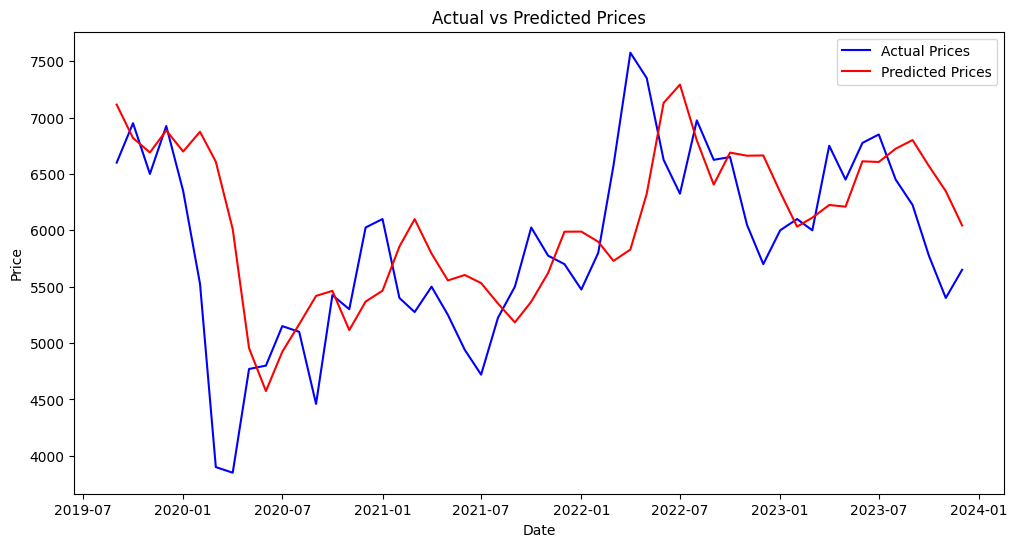

          Date Actual Price Predicted Price
0   01/09/2019      6600.00         7114.95
1   01/10/2019      6950.00         6818.48
2   01/11/2019      6500.00         6690.24
3   01/12/2019      6925.00         6885.96
4   01/01/2020      6350.00         6698.78
5   01/02/2020      5525.00         6873.86
6   01/03/2020      3900.00         6608.19
7   01/04/2020      3850.00         6011.18
8   01/05/2020      4770.00         4954.83
9   01/06/2020      4800.00         4573.97
10  01/07/2020      5150.00         4922.35
11  01/08/2020      5100.00         5166.65
12  01/09/2020      4460.00         5418.21
13  01/10/2020      5425.00         5462.91
14  01/11/2020      5300.00         5114.84
15  01/12/2020      6025.00         5367.96
16  01/01/2021      6100.00         5464.35
17  01/02/2021      5400.00         5855.63
18  01/03/2021      5275.00         6099.06
19  01/04/2021      5500.00         5793.45
20  01/05/2021      5250.00         5555.51
21  01/06/2021      4940.00     

In [ ]:
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65, scale=True):
    # Split into train and test sets
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if scale:
        # Normalize the train and test sets separately
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
        test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))
    else:
        train_prices_scaled = train_prices.reshape(-1, 1)
        test_prices_scaled = test_prices.reshape(-1, 1)

    return train_prices_scaled, test_prices_scaled

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    # Define and compile the LSTM model
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, 1)))  # First hidden layer
    model.add(LSTM(100, return_sequences=False)) # Second hidden layer
    model.add(Dense(25))  # Dense layer
    model.add(Dense(1))  # Output layer
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Reshape input data for LSTM
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Fit the model with train set
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    # Make predictions for train and test sets
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    # Invert predictions for train set
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape Y_train to 2D

    # Invert predictions for test set
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape Y_test to 2D

    # Calculate root mean squared error for train and test sets
    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    # Check if the column 'Close' or 'Adj Close' exists
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    print("Length of prices array:", len(prices))  # Debugging line

    # Split into train and test sets
    train_prices, test_prices = train_test_split(prices)

    print("Length of train_prices array:", len(train_prices))  # Debugging line
    print("Length of test_prices array:", len(test_prices))    # Debugging line

    # calling the create_dataset function to split the data into input-output datasets
    X_train, Y_train = create_dataset(train_prices, look_back)
    X_test, Y_test = create_dataset(test_prices, look_back)

    # Train the model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit_transform(prices.reshape(-1, 1))
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    # Predict using the model
    predicted_prices = model.predict(X_test)
    # Invert scaling to get actual predicted prices
    predicted_prices = scaler.inverse_transform(predicted_prices)

    # Create a table with date, actual price, and prediction result for test set
    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)

    # Ensure that the length of the test dataset matches the length of the predicted prices
    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    # Format dates as dd/mm/yyyy
    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    # Format prices to match actual price formatting
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

df_1_close = preprocessing(df_1)

# Example usage
train(df_1_close)

#All Dataset Running

Length of prices array: 180
Length of train_prices array: 117
Length of test_prices array: 63


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
7/7 - 4s - 542ms/step - loss: 0.1560
Epoch 2/150
7/7 - 1s - 137ms/step - loss: 0.0264
Epoch 3/150
7/7 - 0s - 10ms/step - loss: 0.0202
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0167
Epoch 5/150
7/7 - 0s - 9ms/step - loss: 0.0106
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0084
Epoch 7/150
7/7 - 0s - 8ms/step - loss: 0.0081
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0071
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0068
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0068
Epoch 11/150
7/7 - 0s - 9ms/step - loss: 0.0068
Epoch 12/150
7/7 - 0s - 9ms/step - loss: 0.0067
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0068
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0069
Epoch 15/150
7/7 - 0s - 9ms/step - loss: 0.0067
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 17/150
7/7 - 0s - 20ms/step - loss: 0.0066
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0066
Epoch 19/150
7/7 - 0s - 19ms/step - loss: 0.0068
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0065
Epoch 21/150
7/7 - 0s - 9ms/step - loss: 0

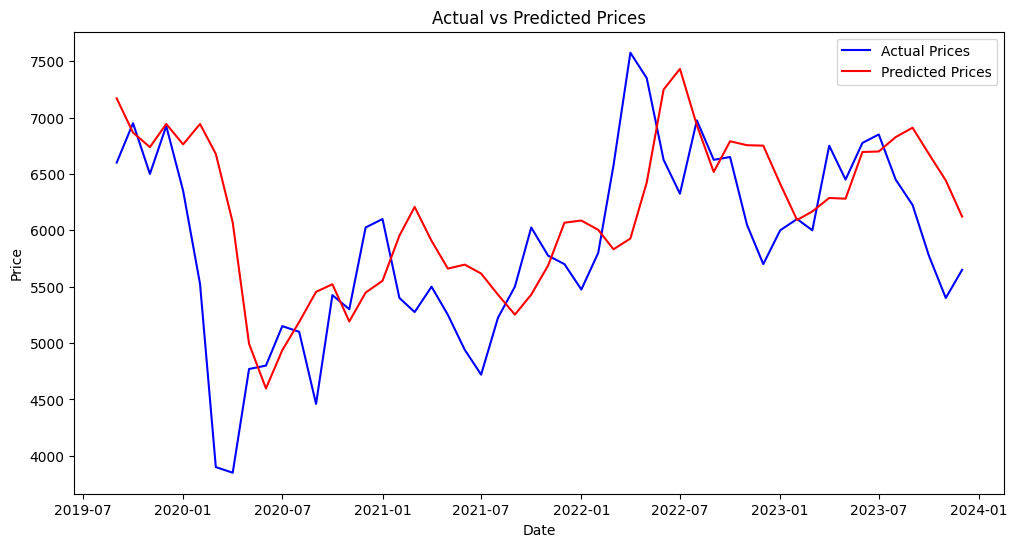

          Date Actual Price Predicted Price
0   01/09/2019      6600.00         7170.44
1   01/10/2019      6950.00         6866.43
2   01/11/2019      6500.00         6737.98
3   01/12/2019      6925.00         6943.02
4   01/01/2020      6350.00         6762.27
5   01/02/2020      5525.00         6942.92
6   01/03/2020      3900.00         6677.49
7   01/04/2020      3850.00         6070.51
8   01/05/2020      4770.00         4993.83
9   01/06/2020      4800.00         4597.38
10  01/07/2020      5150.00         4936.33
11  01/08/2020      5100.00         5186.75
12  01/09/2020      4460.00         5454.33
13  01/10/2020      5425.00         5521.39
14  01/11/2020      5300.00         5191.54
15  01/12/2020      6025.00         5447.53
16  01/01/2021      6100.00         5552.32
17  01/02/2021      5400.00         5952.21
18  01/03/2021      5275.00         6207.16
19  01/04/2021      5500.00         5906.85
20  01/05/2021      5250.00         5660.37
21  01/06/2021      4940.00     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 312ms/step - loss: 0.0617
Epoch 2/150
7/7 - 0s - 8ms/step - loss: 0.0099
Epoch 3/150
7/7 - 0s - 8ms/step - loss: 0.0076
Epoch 4/150
7/7 - 0s - 9ms/step - loss: 0.0058
Epoch 5/150
7/7 - 0s - 9ms/step - loss: 0.0041
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0029
Epoch 7/150
7/7 - 0s - 8ms/step - loss: 0.0024
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0021
Epoch 9/150
7/7 - 0s - 9ms/step - loss: 0.0021
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0021
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0022
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0021
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0021
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0022
Epoch 15/150
7/7 - 0s - 9ms/step - loss: 0.0020
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0021
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0021
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0021
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0019
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0020
Epoch 21/150
7/7 - 0s - 10ms/step - loss: 0.0020
Epoch 22/

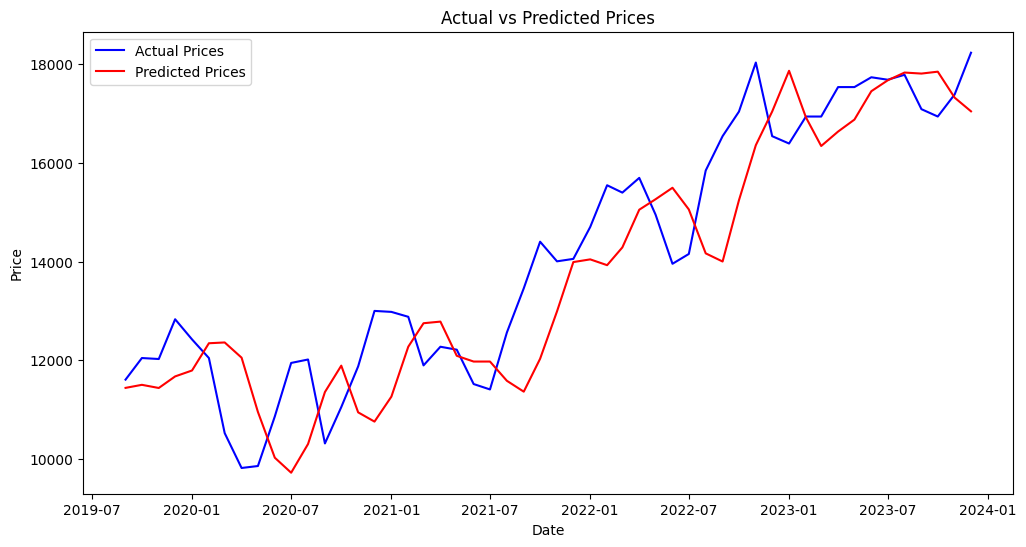

          Date Actual Price Predicted Price
0   01/09/2019     11607.64        11440.60
1   01/10/2019     12045.19        11502.31
2   01/11/2019     12025.30        11438.38
3   01/12/2019     12830.79        11672.61
4   01/01/2020     12423.07        11792.55
5   01/02/2020     12045.19        12344.70
6   01/03/2020     10523.71        12360.69
7   01/04/2020      9817.66        12052.62
8   01/05/2020      9857.44        10952.43
9   01/06/2020     10861.82        10025.65
10  01/07/2020     11945.75         9721.64
11  01/08/2020     12015.36        10303.40
12  01/09/2020     10314.88        11356.17
13  01/10/2020     11050.76        11890.95
14  01/11/2020     11876.14        10944.41
15  01/12/2020     12999.84        10757.31
16  01/01/2021     12979.96        11263.08
17  01/02/2021     12880.51        12274.55
18  01/03/2021     11896.02        12750.35
19  01/04/2021     12273.91        12783.16
20  01/05/2021     12214.24        12090.45
21  01/06/2021     11518.14     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 242ms/step - loss: 0.1431
Epoch 2/150
7/7 - 0s - 18ms/step - loss: 0.0214
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0148
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0096
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0051
Epoch 6/150
7/7 - 0s - 9ms/step - loss: 0.0058
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0051
Epoch 8/150
7/7 - 0s - 19ms/step - loss: 0.0045
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0045
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0046
Epoch 11/150
7/7 - 0s - 9ms/step - loss: 0.0045
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0046
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0045
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0045
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0049
Epoch 16/150
7/7 - 0s - 9ms/step - loss: 0.0043
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0043
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0043
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0043
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0042
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0044
Epoch 

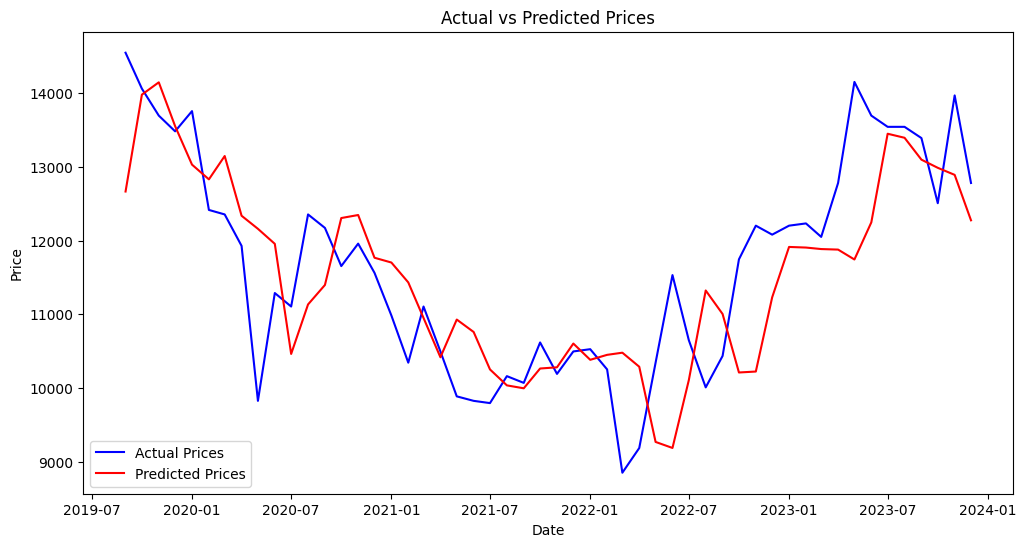

          Date Actual Price Predicted Price
0   01/09/2019     14546.12        12664.80
1   01/10/2019     14059.07        13977.98
2   01/11/2019     13693.79        14145.01
3   01/12/2019     13480.70        13550.86
4   01/01/2020     13754.67        13029.32
5   01/02/2020     12415.29        12829.82
6   01/03/2020     12354.40        13146.09
7   01/04/2020     11928.24        12336.60
8   01/05/2020      9827.84        12159.47
9   01/06/2020     11288.99        11955.72
10  01/07/2020     11106.35        10463.51
11  01/08/2020     12354.40        11134.53
12  01/09/2020     12171.76        11398.23
13  01/10/2020     11654.27        12305.48
14  01/11/2020     11958.68        12346.47
15  01/12/2020     11562.95        11767.37
16  01/01/2021     10984.58        11702.55
17  01/02/2021     10345.33        11433.09
18  01/03/2021     11106.35        10951.34
19  01/04/2021     10497.54        10418.55
20  01/05/2021      9888.73        10929.59
21  01/06/2021      9827.84     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 298ms/step - loss: 0.1032
Epoch 2/150
7/7 - 0s - 18ms/step - loss: 0.0310
Epoch 3/150
7/7 - 0s - 9ms/step - loss: 0.0238
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0217
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0175
Epoch 6/150
7/7 - 0s - 9ms/step - loss: 0.0167
Epoch 7/150
7/7 - 0s - 8ms/step - loss: 0.0162
Epoch 8/150
7/7 - 0s - 9ms/step - loss: 0.0157
Epoch 9/150
7/7 - 0s - 20ms/step - loss: 0.0141
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0140
Epoch 11/150
7/7 - 0s - 9ms/step - loss: 0.0128
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0121
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0108
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0102
Epoch 15/150
7/7 - 0s - 9ms/step - loss: 0.0089
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0089
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0074
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0076
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0074
Epoch 20/150
7/7 - 0s - 20ms/step - loss: 0.0104
Epoch 21/150
7/7 - 0s - 9ms/step - loss: 0.0114
Epoch 2

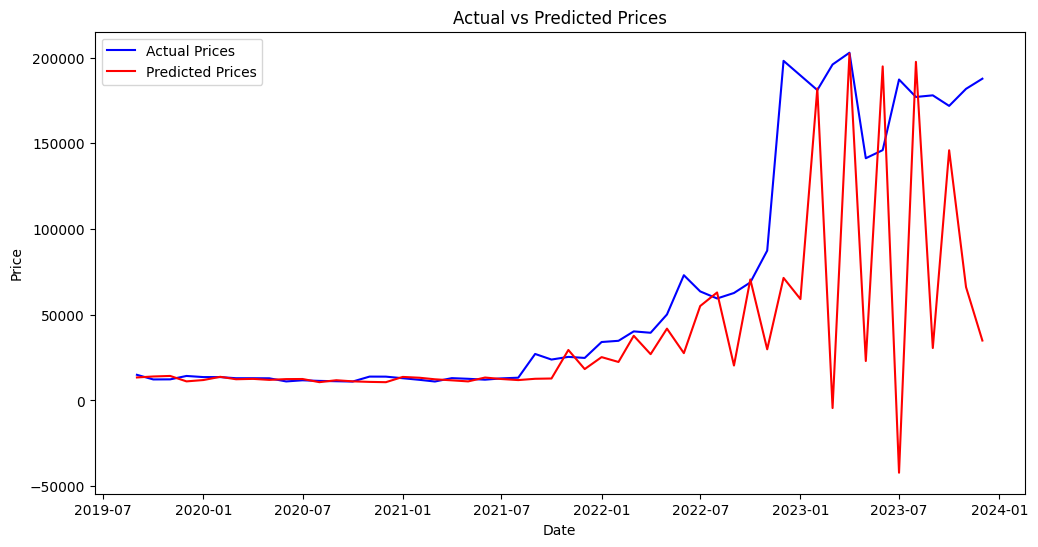

          Date Actual Price Predicted Price
0   01/09/2019     14965.90        13425.08
1   01/10/2019     12267.04        13996.70
2   01/11/2019     12314.39        14307.75
3   01/12/2019     14303.03        11136.85
4   01/01/2020     13640.15        11917.63
5   01/02/2020     13640.15        13797.91
6   01/03/2020     12977.27        12372.65
7   01/04/2020     12977.27        12599.24
8   01/05/2020     12929.92        12007.70
9   01/06/2020     11107.00        12461.75
10  01/07/2020     11769.88        12524.60
11  01/08/2020     11414.77        10677.69
12  01/09/2020     11225.37        11807.90
13  01/10/2020     11035.98        11152.85
14  01/11/2020     13924.24        10837.90
15  01/12/2020     13900.56        10665.44
16  01/01/2021     12977.27        13738.52
17  01/02/2021     12030.30        13252.11
18  01/03/2021     11059.65        12353.58
19  01/04/2021     13024.62        11745.12
20  01/05/2021     12645.83        11122.29
21  01/06/2021     12124.99     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 315ms/step - loss: 0.0771
Epoch 2/150
7/7 - 0s - 17ms/step - loss: 0.0150
Epoch 3/150
7/7 - 0s - 18ms/step - loss: 0.0137
Epoch 4/150
7/7 - 0s - 11ms/step - loss: 0.0102
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0080
Epoch 6/150
7/7 - 0s - 13ms/step - loss: 0.0080
Epoch 7/150
7/7 - 0s - 21ms/step - loss: 0.0073
Epoch 8/150
7/7 - 0s - 19ms/step - loss: 0.0071
Epoch 9/150
7/7 - 0s - 21ms/step - loss: 0.0070
Epoch 10/150
7/7 - 0s - 12ms/step - loss: 0.0073
Epoch 11/150
7/7 - 0s - 19ms/step - loss: 0.0069
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0068
Epoch 13/150
7/7 - 0s - 21ms/step - loss: 0.0067
Epoch 14/150
7/7 - 0s - 20ms/step - loss: 0.0063
Epoch 15/150
7/7 - 0s - 11ms/step - loss: 0.0066
Epoch 16/150
7/7 - 0s - 9ms/step - loss: 0.0065
Epoch 17/150
7/7 - 0s - 20ms/step - loss: 0.0071
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0066
Epoch 19/150
7/7 - 0s - 20ms/step - loss: 0.0058
Epoch 20/150
7/7 - 0s - 9ms/step - loss: 0.0055
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.

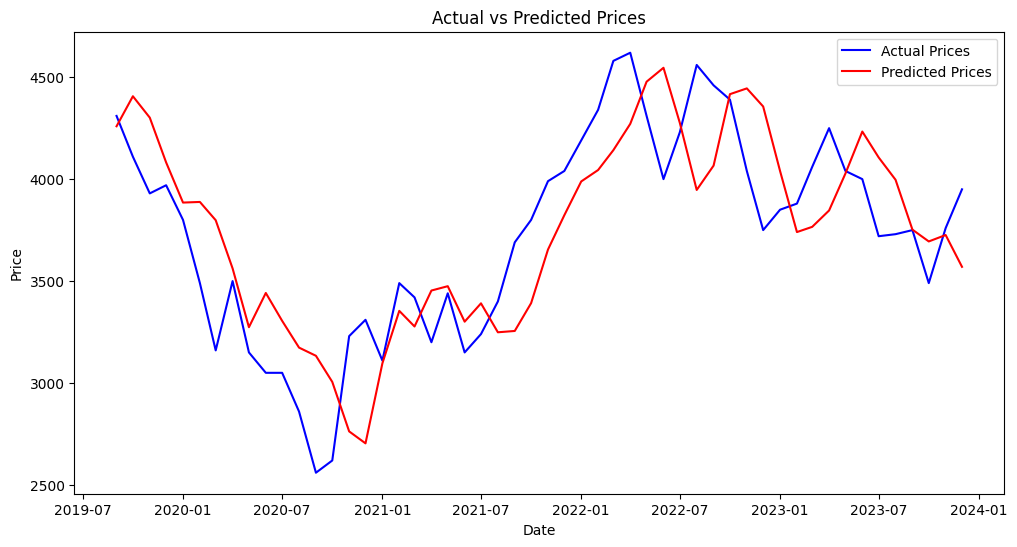

          Date Actual Price Predicted Price
0   01/09/2019      4310.00         4259.27
1   01/10/2019      4110.00         4406.51
2   01/11/2019      3930.00         4301.60
3   01/12/2019      3970.00         4082.00
4   01/01/2020      3800.00         3885.03
5   01/02/2020      3490.00         3888.08
6   01/03/2020      3160.00         3798.53
7   01/04/2020      3500.00         3562.25
8   01/05/2020      3150.00         3273.75
9   01/06/2020      3050.00         3441.63
10  01/07/2020      3050.00         3304.81
11  01/08/2020      2860.00         3173.60
12  01/09/2020      2560.00         3133.53
13  01/10/2020      2620.00         3005.45
14  01/11/2020      3230.00         2762.67
15  01/12/2020      3310.00         2704.01
16  01/01/2021      3110.00         3096.56
17  01/02/2021      3490.00         3353.85
18  01/03/2021      3420.00         3277.27
19  01/04/2021      3200.00         3453.56
20  01/05/2021      3440.00         3474.90
21  01/06/2021      3150.00     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 247ms/step - loss: 0.0719
Epoch 2/150
7/7 - 0s - 10ms/step - loss: 0.0180
Epoch 3/150
7/7 - 0s - 9ms/step - loss: 0.0196
Epoch 4/150
7/7 - 0s - 9ms/step - loss: 0.0122
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0116
Epoch 6/150
7/7 - 0s - 9ms/step - loss: 0.0104
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0096
Epoch 8/150
7/7 - 0s - 20ms/step - loss: 0.0086
Epoch 9/150
7/7 - 0s - 9ms/step - loss: 0.0078
Epoch 10/150
7/7 - 0s - 9ms/step - loss: 0.0078
Epoch 11/150
7/7 - 0s - 10ms/step - loss: 0.0071
Epoch 12/150
7/7 - 0s - 10ms/step - loss: 0.0067
Epoch 13/150
7/7 - 0s - 20ms/step - loss: 0.0068
Epoch 14/150
7/7 - 0s - 20ms/step - loss: 0.0060
Epoch 15/150
7/7 - 0s - 10ms/step - loss: 0.0058
Epoch 16/150
7/7 - 0s - 20ms/step - loss: 0.0052
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0053
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0046
Epoch 19/150
7/7 - 0s - 9ms/step - loss: 0.0042
Epoch 20/150
7/7 - 0s - 20ms/step - loss: 0.0042
Epoch 21/150
7/7 - 0s - 10ms/step - loss: 0.0040

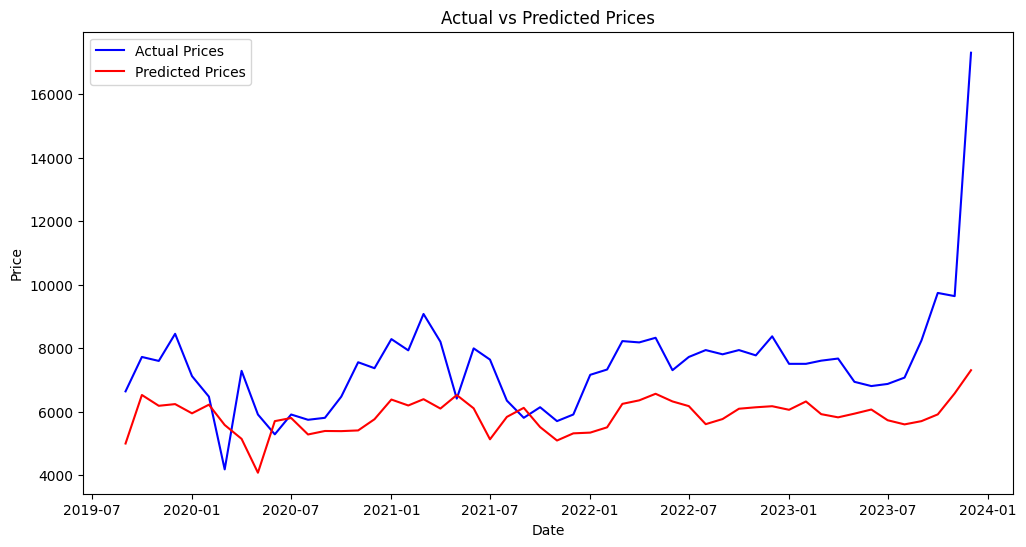

          Date Actual Price Predicted Price
0   01/09/2019      6644.68         5002.74
1   01/10/2019      7727.13         6530.57
2   01/11/2019      7602.23         6190.16
3   01/12/2019      8455.69         6243.33
4   01/01/2020      7123.46         5952.92
5   01/02/2020      6478.15         6224.96
6   01/03/2020      4188.37         5585.88
7   01/04/2020      7289.99         5149.54
8   01/05/2020      5916.12         4083.70
9   01/06/2020      5291.63         5707.17
10  01/07/2020      5916.12         5806.18
11  01/08/2020      5749.59         5287.38
12  01/09/2020      5812.04         5397.47
13  01/10/2020      6478.15         5392.69
14  01/11/2020      7560.60         5414.88
15  01/12/2020      7373.25         5767.44
16  01/01/2021      8289.16         6386.74
17  01/02/2021      7935.29         6200.07
18  01/03/2021      9080.18         6398.05
19  01/04/2021      8205.90         6103.09
20  01/05/2021      6415.71         6528.26
21  01/06/2021      7997.74     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 259ms/step - loss: 0.1655
Epoch 2/150
7/7 - 0s - 19ms/step - loss: 0.0316
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0220
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0136
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0086
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0089
Epoch 7/150
7/7 - 0s - 9ms/step - loss: 0.0087
Epoch 8/150
7/7 - 0s - 20ms/step - loss: 0.0079
Epoch 9/150
7/7 - 0s - 9ms/step - loss: 0.0082
Epoch 10/150
7/7 - 0s - 9ms/step - loss: 0.0078
Epoch 11/150
7/7 - 0s - 20ms/step - loss: 0.0078
Epoch 12/150
7/7 - 0s - 9ms/step - loss: 0.0076
Epoch 13/150
7/7 - 0s - 9ms/step - loss: 0.0075
Epoch 14/150
7/7 - 0s - 20ms/step - loss: 0.0075
Epoch 15/150
7/7 - 0s - 20ms/step - loss: 0.0077
Epoch 16/150
7/7 - 0s - 9ms/step - loss: 0.0079
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0073
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0074
Epoch 19/150
7/7 - 0s - 10ms/step - loss: 0.0071
Epoch 20/150
7/7 - 0s - 9ms/step - loss: 0.0068
Epoch 21/150
7/7 - 0s - 20ms/step - loss: 0.0072


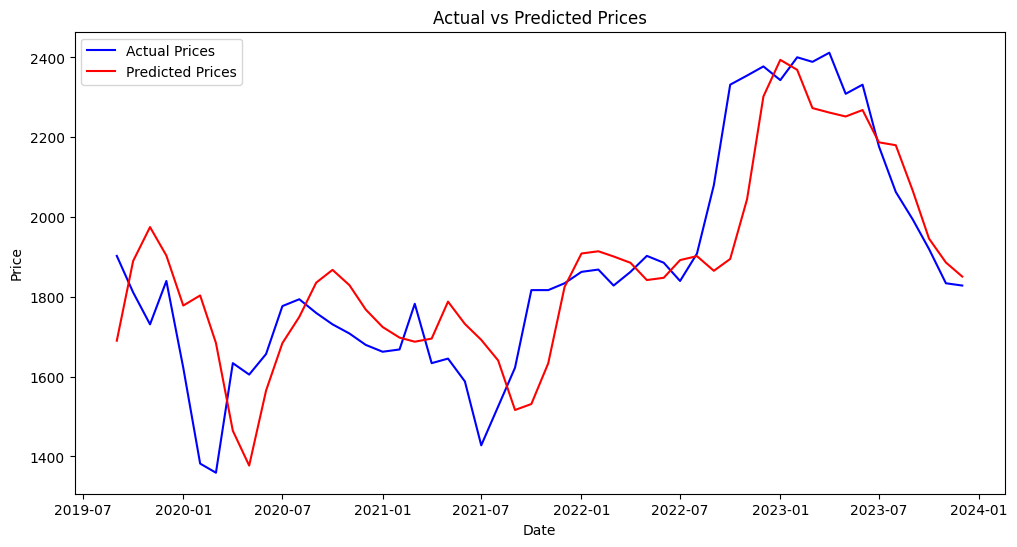

          Date Actual Price Predicted Price
0   01/09/2019      1902.66         1690.14
1   01/10/2019      1811.15         1889.89
2   01/11/2019      1731.07         1974.82
3   01/12/2019      1839.74         1903.38
4   01/01/2020      1622.40         1778.21
5   01/02/2020      1382.18         1803.52
6   01/03/2020      1359.30         1684.35
7   01/04/2020      1633.84         1464.46
8   01/05/2020      1605.24         1377.22
9   01/06/2020      1656.72         1565.06
10  01/07/2020      1776.83         1684.06
11  01/08/2020      1793.99         1749.76
12  01/09/2020      1759.67         1835.51
13  01/10/2020      1731.07         1867.60
14  01/11/2020      1708.19         1829.29
15  01/12/2020      1679.60         1768.13
16  01/01/2021      1662.44         1724.39
17  01/02/2021      1668.16         1697.84
18  01/03/2021      1782.55         1687.59
19  01/04/2021      1633.84         1695.39
20  01/05/2021      1645.28         1788.00
21  01/06/2021      1588.08     

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65, scale=True):
    # Split into train and test sets
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if scale:
        # Normalize the train and test sets separately
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
        test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))
    else:
        train_prices_scaled = train_prices.reshape(-1, 1)
        test_prices_scaled = test_prices.reshape(-1, 1)

    return train_prices_scaled, test_prices_scaled

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    # Define and compile the LSTM model
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, 1)))  # First hidden layer
    model.add(LSTM(100, return_sequences=False)) # Second hidden layer
    model.add(Dense(25))  # Dense layer
    model.add(Dense(1))  # Output layer
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Reshape input data for LSTM
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Fit the model with train set
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    # Make predictions for train and test sets
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    # Invert predictions for train set
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape Y_train to 2D

    # Invert predictions for test set
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape Y_test to 2D

    # Calculate root mean squared error for train and test sets
    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    # Check if the column 'Close' or 'Adj Close' exists
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    print("Length of prices array:", len(prices))  # Debugging line

    # Split into train and test sets
    train_prices, test_prices = train_test_split(prices)

    print("Length of train_prices array:", len(train_prices))  # Debugging line
    print("Length of test_prices array:", len(test_prices))    # Debugging line

    # calling the create_dataset function to split the data into input-output datasets
    X_train, Y_train = create_dataset(train_prices, look_back)
    X_test, Y_test = create_dataset(test_prices, look_back)

    # Train the model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit_transform(prices.reshape(-1, 1))
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    # Predict using the model
    predicted_prices = model.predict(X_test)
    # Invert scaling to get actual predicted prices
    predicted_prices = scaler.inverse_transform(predicted_prices)

    # Create a table with date, actual price, and prediction result for test set
    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)

    # Ensure that the length of the test dataset matches the length of the predicted prices
    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    # Format dates as dd/mm/yyyy
    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    # Format prices to match actual price formatting
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

df_1_close = preprocessing(df_1)
df_2_close = preprocessing(df_2)
df_3_close = preprocessing(df_3)
df_4_close = preprocessing(df_4)
df_5_close = preprocessing(df_5)
df_6_close = preprocessing(df_6)
df_7_close = preprocessing(df_7)

# Example usage
train(df_1_close)
train(df_2_close)
train(df_3_close)
train(df_4_close)
train(df_5_close)
train(df_6_close)
train(df_7_close)

#Data fundamental

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the data
data = {
    'ROE': [0.0672,0.0864,0.0931,0.0880,0.0833,0.0938,0.0985,0.0959,0.0802,0.0804,0.0868,0.0719,0.0719,0.0785,0.0751,0.0667,0.0574,0.0601,0.0600,0.0709,0.0531,0.0575,0.0517,0.0490,0.0398,0.0414,0.0393,0.0242,0.0297,0.0384,0.0394,0.0346,0.0434,0.0365,0.0404,0.0379,0.0386,0.0423,0.0505,0.0336,0.0368,0.0329,0.0424,0.0395,0.0311,0.0430,0.0172,0.0137,0.0232,0.0314,0.0369,0.0303,0.0383,0.0615,0.0272,0.0292,0.0436,0.0468,0.0432,0.0410],
    'ROA': [0.0292,0.0365,0.0414,0.0395,0.0374,0.0387,0.0431,0.0419,0.0349,0.0315,0.0324,0.0283,0.0286,0.0293,0.0280,0.0261,0.0230,0.0229,0.0223,0.0278,0.0213,0.0224,0.0198,0.0199,0.0164,0.0167,0.0154,0.0101,0.0127,0.0160,0.0166,0.0148,0.0181,0.0149,0.0165,0.0158,0.0163,0.0175,0.0201,0.0133,0.0146,0.0131,0.0169,0.0166,0.0131,0.0191,0.0078,0.0063,0.0106,0.0144,0.0170,0.0142,0.0179,0.0288,0.0125,0.0136,0.0201,0.0208,0.0186,0.0183],
    'Debt to Equity': [0.61, 0.60, 0.58, 0.55, 0.54, 0.61, 0.60, 0.64, 0.62, 0.74, 0.78, 0.74, 0.72, 0.83, 0.82, 0.80, 0.72, 0.80, 0.79, 0.77, 0.70, 0.72, 0.74, 0.73, 0.68, 0.71, 0.72, 0.69, 0.63, 0.68, 0.60, 0.63, 0.66, 0.67, 0.63, 0.61, 0.62, 0.63, 0.62, 0.63, 0.65, 0.67, 0.63, 0.62, 0.66, 0.57, 0.55, 0.51, 0.50, 0.48, 0.45, 0.42, 0.39, 0.38, 0.39, 0.37, 0.36, 0.42, 0.45, 0.47],
    'Financial Leverage': [2.30, 2.37, 2.25, 2.23, 2.23, 2.42, 2.29, 2.29, 2.30, 2.55, 2.68, 2.54, 2.52, 2.68, 2.68, 2.56, 2.50, 2.63, 2.69, 2.55, 2.50, 2.57, 2.61, 2.47, 2.44, 2.47, 2.47, 2.41, 2.34, 2.39, 2.36, 2.34, 1.05, 0.95, 0.91, 1.03, 2.38, 2.42, 2.52, 2.52, 2.52, 2.51, 2.51, 2.38, 2.37, 2.25, 2.21, 2.17, 2.19, 2.18, 2.17, 2.13, 2.14, 2.14, 2.18, 2.15, 2.17, 2.25, 2.32, 2.24],
    'Current Ratio': [1.39, 1.29, 1.40, 1.37, 1.38, 1.21, 1.26, 1.26, 1.36, 1.42, 1.32, 1.36, 1.50, 1.40, 1.36, 1.40, 1.35, 1.28, 1.20, 1.24, 1.25, 1.22, 1.22, 1.32, 1.41, 1.35, 1.30, 1.38, 1.37, 1.34, 1.36, 1.24, 1.27, 1.13, 1.10, 1.23, 1.35, 1.30, 1.23, 1.15, 1.22, 1.22, 1.26, 1.29, 1.37, 1.49, 1.56, 1.54, 1.47, 1.51, 1.56, 1.54, 1.58, 1.54, 1.46, 1.51, 1.53, 1.31, 1.18, 1.33],
    'Quick Ratio': [1.10, 1.04, 1.14, 1.10, 1.15, 1.01, 1.01, 0.97, 1.12, 1.21, 1.11, 1.12, 1.23, 1.05, 1.00, 1.04, 1.10, 1.05, 1.00, 1.04, 1.02, 0.98, 0.98, 1.09, 1.17, 1.12, 1.08, 1.14, 1.15, 1.15, 1.16, 1.04, 1.05, 0.95, 0.91, 1.03, 1.15, 1.09, 1.02, 0.92, 1.00, 0.99, 1.02, 1.05, 1.09, 1.24, 1.31, 1.33, 1.30, 1.33, 1.36, 1.33, 1.37, 1.32, 1.23, 1.24, 1.27, 1.07, 0.94, 1.02],
    'ITR': [2.11, 4.91, 7.95, 10.84, 3.45, 7.08, 9.40, 10.61, 3.02, 6.57, 9.75, 11.48, 3.16, 6.11, 8.33, 10.28, 2.56, 5.25, 7.74, 10.66, 2.60, 4.65, 6.45, 9.03, 2.08, 4.25, 6.38, 8.16, 1.92, 4.40, 6.79, 8.59, 2.04, 4.01, 6.11, 8.23, 2.30, 4.53, 6.18, 7.41, 1.79, 3.57, 5.40, 7.40, 1.63, 2.81, 4.62, 6.96, 2.35, 4.87, 7.08, 8.84, 2.49, 4.52, 6.25, 7.54, 2.01, 3.87, 5.56, 6.55],
    'Income Margin': [12.17, 14.05, 13.96, 11.68, 10.94, 10.61, 11.36, 12.29, 11.22, 10.90, 11.26, 10.51, 10.05, 10.76, 11.12, 10.30, 8.25, 8.49, 9.60, 11.81, 10.13, 9.76, 9.66, 10.77, 8.23, 9.31, 10.11, 9.71, 8.07, 8.82, 9.74, 11.83, 8.64, 8.56, 10.69, 9.78, 10.76, 11.39, 12.41, 10.36, 11.60, 10.34, 11.18, 11.01, 10.61, 5.81, 7.14, 4.84, 8.75, 11.49, 12.26, 10.97, 12.72, 15.84, 13.27, 14.22, 13.00, 15.04, 12.37, 15.64],
    'Net Margin': [0.0871,0.102,0.1105,0.1053,0.1015,0.1062,0.1185,0.1145,0.131,0.1334,0.1349,0.1198,0.1179,0.1191,0.1234,0.1234,0.106,0.1089,0.1105,0.1328,0.1146,0.1182,0.1151,0.0911,0.1064,0.1046,0.1063,0.0218,0.0869,0.1008,0.1116,0.1039,0.1245,0.1069,0.116,0.1027,0.1135,0.1209,0.1335,0.091,0.1118,0.0996,0.1204,0.1163,0.1053,0.2081,0.0763,0.0523,0.0901,0.1165,0.1312,0.0994,0.129,0.2039,0.1042,0.1051,0.1397,0.1491,0.1292,0.1444],
    'RTR': [0.0344,0.0344,0.0353,0.0369,0.0363,0.0348,0.0343,0.037,0.0365,0.0305,0.0313,0.0294,0.0303,0.0293,0.026,0.0257,0.0274,0.0264,0.0249,0.0263,0.0248,0.0239,0.0213,0.023,0.0221,0.0242,0.0224,0.0236,0.0233,0.0249,0.0231,0.0255,0.0243,0.0227,0.0223,0.0223,0.0214,0.02,0.0204,0.0205,0.0192,0.018,0.0189,0.0194,0.0211,0.018,0.0232,0.0262,0.029,0.0284,0.0284,0.0304,0.0305,0.0273,0.0277,0.0275,0.0287,0.0266,0.0252,0.0257],
    'ORGR': [0.0756,0.0783,0.1146,0.077,0.0649,0.0863,0.0262,0.0563,0.1069,0.029,0.1516,0.0054,0.0771,0.0693,0.0474,0.0488,0.0393,0.0198,0.0008,0.0942,0.0426,0.0379,0.0513,0.0421,0.116,0.0472,0.0348,0.0076,0.0898,0.1059,0.0483,0.1067,0.0002,0.0097,0.0598,0.0697,0.0002,0.0161,0.0986,0.032,0.0733,0.0509,0.0758,0.0122,0.1018,0.3372,0.133,0.1022,0.1567,0.0773,0.0774,0.1012,0.0876,0.0007,0.0813,0.0304,0.0369,0.043,0.0112,0.0365],
    'NIGR': [0.0302,0.2629,0.2082,0.0262,0.0266,0.1364,0.1454,0.0206,0.2662,0.011,0.1643,0.117,0.0599,0.0807,0.0129,0.0489,0.1079,0.0479,0.0143,0.3146,0.1738,0.0702,0.0759,0.182,0.0324,0.0295,0.0196,0.7935,2.63,0.2836,0.0535,0.0305,0.1974,0.1332,0.1501,0.0529,0.1048,0.083,0.2133,0.2965,0.1383,0.1544,0.3,0.0456,0.1868,0.31,0.5844,0.2448,0.9919,0.3927,0.2141,0.166,0.4117,0.5795,0.4473,0.0387,0.3786,0.0215,0.1432,0.0771]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Prepare the feature and target variables
X = df.drop(columns='NIGR')
y = df['NIGR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1583.3970088604237, -0.13443470318175788)

#Combined Historical data with Data fundamental

##The first one result

Train prices length: 117, Test prices length: 63
Train ROE length: 117, Test ROE length: 63
train_prices: (117, 1), test_prices: (63, 1)
train_roe: (117, 1), test_roe: (63, 1)
X_train: (106, 10, 2), Y_train: (106,)
X_test: (52, 10, 2), Y_test: (52,)
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 349ms/step - loss: 0.2040
Epoch 2/150
7/7 - 0s - 18ms/step - loss: 0.0226
Epoch 3/150
7/7 - 0s - 21ms/step - loss: 0.0154
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0128
Epoch 5/150
7/7 - 0s - 19ms/step - loss: 0.0099
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0074
Epoch 7/150
7/7 - 0s - 11ms/step - loss: 0.0074
Epoch 8/150
7/7 - 0s - 12ms/step - loss: 0.0074
Epoch 9/150
7/7 - 0s - 20ms/step - loss: 0.0077
Epoch 10/150
7/7 - 0s - 20ms/step - loss: 0.0071
Epoch 11/150
7/7 - 0s - 18ms/step - loss: 0.0073
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0074
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0078
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0078
Epoch 15/150
7/7 - 0s - 9ms/step - loss: 0.0071
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0072
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0073
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0073
Epoch 19/150
7/7 - 0s - 9ms/step - loss: 0.0073
Epoch 20/150
7/7 - 0s - 19ms/step - loss: 0.0070
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0067


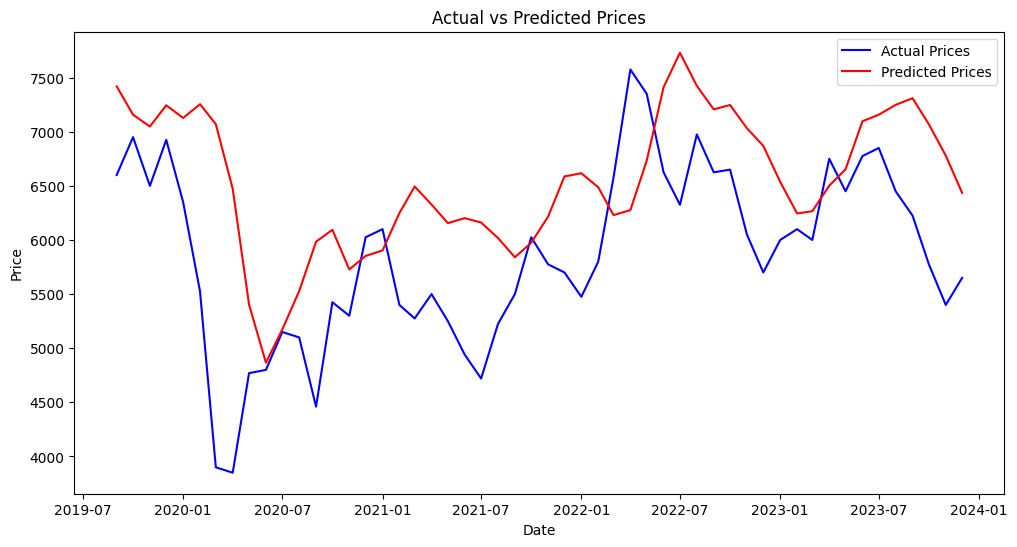

          Date Actual Price Predicted Price
0   01/09/2019      6600.00         7419.27
1   01/10/2019      6950.00         7157.56
2   01/11/2019      6500.00         7048.02
3   01/12/2019      6925.00         7244.00
4   01/01/2020      6350.00         7127.23
5   01/02/2020      5525.00         7254.55
6   01/03/2020      3900.00         7069.76
7   01/04/2020      3850.00         6472.09
8   01/05/2020      4770.00         5403.31
9   01/06/2020      4800.00         4866.03
10  01/07/2020      5150.00         5173.69
11  01/08/2020      5100.00         5527.40
12  01/09/2020      4460.00         5984.13
13  01/10/2020      5425.00         6094.12
14  01/11/2020      5300.00         5727.92
15  01/12/2020      6025.00         5852.62
16  01/01/2021      6100.00         5903.13
17  01/02/2021      5400.00         6248.35
18  01/03/2021      5275.00         6494.31
19  01/04/2021      5500.00         6327.37
20  01/05/2021      5250.00         6155.83
21  01/06/2021      4940.00     

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_dataset(dataset, roe, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = np.column_stack((dataset[i:(i + look_back), 0], roe[i:(i + look_back)]))
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, roe, train_size=0.65, scale=True):
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]
    train_roe, test_roe = roe[:split_point], roe[split_point:]

    print(f"Train prices length: {len(train_prices)}, Test prices length: {len(test_prices)}")
    print(f"Train ROE length: {len(train_roe)}, Test ROE length: {len(test_roe)}")

    if scale:
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
        test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

        roe_scaler = MinMaxScaler(feature_range=(0, 1))
        train_roe_scaled = roe_scaler.fit_transform(np.array(train_roe).reshape(-1, 1))
        test_roe_scaled = roe_scaler.transform(np.array(test_roe).reshape(-1, 1))
    else:
        train_prices_scaled = train_prices.reshape(-1, 1)
        test_prices_scaled = test_prices.reshape(-1, 1)

        train_roe_scaled = np.array(train_roe).reshape(-1, 1)
        test_roe_scaled = np.array(test_roe).reshape(-1, 1)

    return train_prices_scaled, test_prices_scaled, train_roe_scaled, test_roe_scaled

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, 2)))  # Adjust input_shape to 2 features
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train(df, roe, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    train_prices, test_prices, train_roe, test_roe = train_test_split(prices, roe)

    print(f"train_prices: {train_prices.shape}, test_prices: {test_prices.shape}")
    print(f"train_roe: {train_roe.shape}, test_roe: {test_roe.shape}")

    X_train, Y_train = create_dataset(train_prices, train_roe, look_back)
    X_test, Y_test = create_dataset(test_prices, test_roe, look_back)

    print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
    print(f"X_test: {X_test.shape}, Y_test: {Y_test.shape}")

    if len(X_train) == 0 or len(X_test) == 0:
        raise ValueError("Insufficient data after creating dataset with the given look_back period.")

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit_transform(prices.reshape(-1, 1))
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)

    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

# Assuming df_1_close is your DataFrame with the closing prices
roe_data = {
    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410]
}

df_1_close = preprocessing(df_1)

train(df_1_close, roe_data['ROE'])

##Fixing the Second result (failed result because too many variable uses)

In [ ]:
# Original data
data = {
    'Debt to Equity': [0.61, 0.60, 0.58, 0.55, 0.54, 0.61, 0.60, 0.64, 0.62, 0.74, 0.78, 0.74, 0.72, 0.83, 0.82, 0.80, 0.72, 0.80, 0.79, 0.77, 0.70, 0.72, 0.74, 0.73, 0.68, 0.71, 0.72, 0.69, 0.63, 0.68, 0.60, 0.63, 0.66, 0.67, 0.63, 0.61, 0.62, 0.63, 0.62, 0.63, 0.65, 0.67, 0.63, 0.62, 0.66, 0.57, 0.55, 0.51, 0.50, 0.48, 0.45, 0.42, 0.39, 0.38, 0.39, 0.37, 0.36, 0.42, 0.45, 0.47],
    'Financial Leverage': [2.30, 2.37, 2.25, 2.23, 2.23, 2.42, 2.29, 2.29, 2.30, 2.55, 2.68, 2.54, 2.52, 2.68, 2.68, 2.56, 2.50, 2.63, 2.69, 2.55, 2.50, 2.57, 2.61, 2.47, 2.44, 2.47, 2.47, 2.41, 2.34, 2.39, 2.36, 2.34, 1.05, 0.95, 0.91, 1.03, 2.38, 2.42, 2.52, 2.52, 2.52, 2.51, 2.51, 2.38, 2.37, 2.25, 2.21, 2.17, 2.19, 2.18, 2.17, 2.13, 2.14, 2.14, 2.18, 2.15, 2.17, 2.25, 2.32, 2.24],
    'Current Ratio': [1.39, 1.29, 1.40, 1.37, 1.38, 1.21, 1.26, 1.26, 1.36, 1.42, 1.32, 1.36, 1.50, 1.40, 1.36, 1.40, 1.35, 1.28, 1.20, 1.24, 1.25, 1.22, 1.22, 1.32, 1.41, 1.35, 1.30, 1.38, 1.37, 1.34, 1.36, 1.24, 1.27, 1.13, 1.10, 1.23, 1.35, 1.30, 1.23, 1.15, 1.22, 1.22, 1.26, 1.29, 1.37, 1.49, 1.56, 1.54, 1.47, 1.51, 1.56, 1.54, 1.58, 1.54, 1.46, 1.51, 1.53, 1.31, 1.18, 1.33],
    'Quick Ratio': [1.10, 1.04, 1.14, 1.10, 1.15, 1.01, 1.01, 0.97, 1.12, 1.21, 1.11, 1.12, 1.23, 1.05, 1.00, 1.04, 1.10, 1.05, 1.00, 1.04, 1.02, 0.98, 0.98, 1.09, 1.17, 1.12, 1.08, 1.14, 1.15, 1.15, 1.16, 1.04, 1.05, 0.95, 0.91, 1.03, 1.15, 1.09, 1.02, 0.92, 1.00, 0.99, 1.02, 1.05, 1.09, 1.24, 1.31, 1.33, 1.30, 1.33, 1.36, 1.33, 1.37, 1.32, 1.23, 1.24, 1.27, 1.07, 0.94, 1.02],
    'ITR': [2.11, 4.91, 7.95, 10.84, 3.45, 7.08, 9.40, 10.61, 3.02, 6.57, 9.75, 11.48, 3.16, 6.11, 8.33, 10.28, 2.56, 5.25, 7.74, 10.66, 2.60, 4.65, 6.45, 9.03, 2.08, 4.25, 6.38, 8.16, 1.92, 4.40, 6.79, 8.59, 2.04, 4.01, 6.11, 8.23, 2.30, 4.53, 6.18, 7.41, 1.79, 3.57, 5.40, 7.40, 1.63, 2.81, 4.62, 6.96, 2.35, 4.87, 7.08, 8.84, 2.49, 4.52, 6.25, 7.54, 2.01, 3.87, 5.56, 6.55],
    'Income Margin': [12.17, 14.05, 13.96, 11.68, 10.94, 10.61, 11.36, 12.29, 11.22, 10.90, 11.26, 10.51, 10.05, 10.76, 11.12, 10.30, 8.25, 8.49, 9.60, 11.81, 10.13, 9.76, 9.66, 10.77, 8.23, 9.31, 10.11, 9.71, 8.07, 8.82, 9.74, 11.83, 8.64, 8.56, 10.69, 9.78, 10.76, 11.39, 12.41, 10.36, 11.60, 10.34, 11.18, 11.01, 10.61, 5.81, 7.14, 4.84, 8.75, 11.49, 12.26, 10.97, 12.72, 15.84, 13.27, 14.22, 13.00, 15.04, 12.37, 15.64],
    'Net Margin': [0.0871,0.102,0.1105,0.1053,0.1015,0.1062,0.1185,0.1145,0.131,0.1334,0.1349,0.1198,0.1179,0.1191,0.1234,0.1234,0.106,0.1089,0.1105,0.1328,0.1146,0.1182,0.1151,0.0911,0.1064,0.1046,0.1063,0.0218,0.0869,0.1008,0.1116,0.1039,0.1245,0.1069,0.116,0.1027,0.1135,0.1209,0.1335,0.091,0.1118,0.0996,0.1204,0.1163,0.1053,0.2081,0.0763,0.0523,0.0901,0.1165,0.1312,0.0994,0.129,0.2039,0.1042,0.1051,0.1397,0.1491,0.1292,0.1444],
    'RTR': [0.0344,0.0344,0.0353,0.0369,0.0363,0.0348,0.0343,0.037,0.0365,0.0305,0.0313,0.0294,0.0303,0.0293,0.026,0.0257,0.0274,0.0264,0.0249,0.0263,0.0248,0.0239,0.0213,0.023,0.0221,0.0242,0.0224,0.0236,0.0233,0.0249,0.0231,0.0255,0.0243,0.0227,0.0223,0.0223,0.0214,0.02,0.0204,0.0205,0.0192,0.018,0.0189,0.0194,0.0211,0.018,0.0232,0.0262,0.029,0.0284,0.0284,0.0304,0.0305,0.0273,0.0277,0.0275,0.0287,0.0266,0.0252,0.0257],
    'ORGR': [0.0756,0.0783,0.1146,0.077,0.0649,0.0863,0.0262,0.0563,0.1069,0.029,0.1516,0.0054,0.0771,0.0693,0.0474,0.0488,0.0393,0.0198,0.0008,0.0942,0.0426,0.0379,0.0513,0.0421,0.116,0.0472,0.0348,0.0076,0.0898,0.1059,0.0483,0.1067,0.0002,0.0097,0.0598,0.0697,0.0002,0.0161,0.0986,0.032,0.0733,0.0509,0.0758,0.0122,0.1018,0.3372,0.133,0.1022,0.1567,0.0773,0.0774,0.1012,0.0876,0.0007,0.0813,0.0304,0.0369,0.043,0.0112,0.0365],
    'NIGR': [0.0302,0.2629,0.2082,0.0262,0.0266,0.1364,0.1454,0.0206,0.2662,0.011,0.1643,0.117,0.0599,0.0807,0.0129,0.0489,0.1079,0.0479,0.0143,0.3146,0.1738,0.0702,0.0759,0.182,0.0324,0.0295,0.0196,0.7935,2.63,0.2836,0.0535,0.0305,0.1974,0.1332,0.1501,0.0529,0.1048,0.083,0.2133,0.2965,0.1383,0.1544,0.3,0.0456,0.1868,0.31,0.5844,0.2448,0.9919,0.3927,0.2141,0.166,0.4117,0.5795,0.4473,0.0387,0.3786,0.0215,0.1432,0.0771]
}

# Function to duplicate elements
def duplicate_values(values, times):
    return [val for val in values for _ in range(times)]

# Applying the function to each key
duplicated_data = {k: duplicate_values(v, 3) for k, v in data.items()}

# Print the duplicated data
for key, value in duplicated_data.items():
    print(f"'{key}': {value}")


'Debt to Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Import datasets
df_1 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/ASII.JK.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/BBCA.JK.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/ICBP.JK.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/BYAN.JK.csv')
df_5 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/TLKM.JK.csv')
df_6 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/TPIA.JK.csv')
df_7 = pd.read_csv('/content/drive/MyDrive/Dataset Bank/KLBF.JK.csv')

# Define financial metrics data
financial_data = {
    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410]
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183],
    'Debt to Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47]
    'Financial Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24]
    'Current Ratio': [1.39, 1.39, 1.39, 1.29, 1.29, 1.29, 1.4, 1.4, 1.4, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.21, 1.21, 1.21, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.36, 1.36, 1.36, 1.42, 1.42, 1.42, 1.32, 1.32, 1.32, 1.36, 1.36, 1.36, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.36, 1.36, 1.36, 1.4, 1.4, 1.4, 1.35, 1.35, 1.35, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.24, 1.24, 1.24, 1.25, 1.25, 1.25, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.32, 1.32, 1.32, 1.41, 1.41, 1.41, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.38, 1.38, 1.38, 1.37, 1.37, 1.37, 1.34, 1.34, 1.34, 1.36, 1.36, 1.36, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.13, 1.13, 1.13, 1.1, 1.1, 1.1, 1.23, 1.23, 1.23, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.23, 1.23, 1.23, 1.15, 1.15, 1.15, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.26, 1.26, 1.26, 1.29, 1.29, 1.29, 1.37, 1.37, 1.37, 1.49, 1.49, 1.49, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.47, 1.47, 1.47, 1.51, 1.51, 1.51, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54, 1.46, 1.46, 1.46, 1.51, 1.51, 1.51, 1.53, 1.53, 1.53, 1.31, 1.31, 1.31, 1.18, 1.18, 1.18, 1.33, 1.33, 1.33]
    'Quick Ratio': [1.1, 1.1, 1.1, 1.04, 1.04, 1.04, 1.14, 1.14, 1.14, 1.1, 1.1, 1.1, 1.15, 1.15, 1.15, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.97, 0.97, 0.97, 1.12, 1.12, 1.12, 1.21, 1.21, 1.21, 1.11, 1.11, 1.11, 1.12, 1.12, 1.12, 1.23, 1.23, 1.23, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.02, 1.02, 1.02, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.09, 1.09, 1.09, 1.17, 1.17, 1.17, 1.12, 1.12, 1.12, 1.08, 1.08, 1.08, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.16, 1.16, 1.16, 1.04, 1.04, 1.04, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 1.15, 1.15, 1.15, 1.09, 1.09, 1.09, 1.02, 1.02, 1.02, 0.92, 0.92, 0.92, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.02, 1.02, 1.02, 1.05, 1.05, 1.05, 1.09, 1.09, 1.09, 1.24, 1.24, 1.24, 1.31, 1.31, 1.31, 1.33, 1.33, 1.33, 1.3, 1.3, 1.3, 1.33, 1.33, 1.33, 1.36, 1.36, 1.36, 1.33, 1.33, 1.33, 1.37, 1.37, 1.37, 1.32, 1.32, 1.32, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.07, 1.07, 1.07, 0.94, 0.94, 0.94, 1.02, 1.02, 1.02]
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55]
    'Income Margin': [12.17, 12.17, 12.17, 14.05, 14.05, 14.05, 13.96, 13.96, 13.96, 11.68, 11.68, 11.68, 10.94, 10.94, 10.94, 10.61, 10.61, 10.61, 11.36, 11.36, 11.36, 12.29, 12.29, 12.29, 11.22, 11.22, 11.22, 10.9, 10.9, 10.9, 11.26, 11.26, 11.26, 10.51, 10.51, 10.51, 10.05, 10.05, 10.05, 10.76, 10.76, 10.76, 11.12, 11.12, 11.12, 10.3, 10.3, 10.3, 8.25, 8.25, 8.25, 8.49, 8.49, 8.49, 9.6, 9.6, 9.6, 11.81, 11.81, 11.81, 10.13, 10.13, 10.13, 9.76, 9.76, 9.76, 9.66, 9.66, 9.66, 10.77, 10.77, 10.77, 8.23, 8.23, 8.23, 9.31, 9.31, 9.31, 10.11, 10.11, 10.11, 9.71, 9.71, 9.71, 8.07, 8.07, 8.07, 8.82, 8.82, 8.82, 9.74, 9.74, 9.74, 11.83, 11.83, 11.83, 8.64, 8.64, 8.64, 8.56, 8.56, 8.56, 10.69, 10.69, 10.69, 9.78, 9.78, 9.78, 10.76, 10.76, 10.76, 11.39, 11.39, 11.39, 12.41, 12.41, 12.41, 10.36, 10.36, 10.36, 11.6, 11.6, 11.6, 10.34, 10.34, 10.34, 11.18, 11.18, 11.18, 11.01, 11.01, 11.01, 10.61, 10.61, 10.61, 5.81, 5.81, 5.81, 7.14, 7.14, 7.14, 4.84, 4.84, 4.84, 8.75, 8.75, 8.75, 11.49, 11.49, 11.49, 12.26, 12.26, 12.26, 10.97, 10.97, 10.97, 12.72, 12.72, 12.72, 15.84, 15.84, 15.84, 13.27, 13.27, 13.27, 14.22, 14.22, 14.22, 13.0, 13.0, 13.0, 15.04, 15.04, 15.04, 12.37, 12.37, 12.37, 15.64, 15.64, 15.64]
    'Net Margin': [0.0871, 0.0871, 0.0871, 0.102, 0.102, 0.102, 0.1105, 0.1105, 0.1105, 0.1053, 0.1053, 0.1053, 0.1015, 0.1015, 0.1015, 0.1062, 0.1062, 0.1062, 0.1185, 0.1185, 0.1185, 0.1145, 0.1145, 0.1145, 0.131, 0.131, 0.131, 0.1334, 0.1334, 0.1334, 0.1349, 0.1349, 0.1349, 0.1198, 0.1198, 0.1198, 0.1179, 0.1179, 0.1179, 0.1191, 0.1191, 0.1191, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.106, 0.106, 0.106, 0.1089, 0.1089, 0.1089, 0.1105, 0.1105, 0.1105, 0.1328, 0.1328, 0.1328, 0.1146, 0.1146, 0.1146, 0.1182, 0.1182, 0.1182, 0.1151, 0.1151, 0.1151, 0.0911, 0.0911, 0.0911, 0.1064, 0.1064, 0.1064, 0.1046, 0.1046, 0.1046, 0.1063, 0.1063, 0.1063, 0.0218, 0.0218, 0.0218, 0.0869, 0.0869, 0.0869, 0.1008, 0.1008, 0.1008, 0.1116, 0.1116, 0.1116, 0.1039, 0.1039, 0.1039, 0.1245, 0.1245, 0.1245, 0.1069, 0.1069, 0.1069, 0.116, 0.116, 0.116, 0.1027, 0.1027, 0.1027, 0.1135, 0.1135, 0.1135, 0.1209, 0.1209, 0.1209, 0.1335, 0.1335, 0.1335, 0.091, 0.091, 0.091, 0.1118, 0.1118, 0.1118, 0.0996, 0.0996, 0.0996, 0.1204, 0.1204, 0.1204, 0.1163, 0.1163, 0.1163, 0.1053, 0.1053, 0.1053, 0.2081, 0.2081, 0.2081, 0.0763, 0.0763, 0.0763, 0.0523, 0.0523, 0.0523, 0.0901, 0.0901, 0.0901, 0.1165, 0.1165, 0.1165, 0.1312, 0.1312, 0.1312, 0.0994, 0.0994, 0.0994, 0.129, 0.129, 0.129, 0.2039, 0.2039, 0.2039, 0.1042, 0.1042, 0.1042, 0.1051, 0.1051, 0.1051, 0.1397, 0.1397, 0.1397, 0.1491, 0.1491, 0.1491, 0.1292, 0.1292, 0.1292, 0.1444, 0.1444, 0.1444]
    'RTR': [0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0353, 0.0353, 0.0353, 0.0369, 0.0369, 0.0369, 0.0363, 0.0363, 0.0363, 0.0348, 0.0348, 0.0348, 0.0343, 0.0343, 0.0343, 0.037, 0.037, 0.037, 0.0365, 0.0365, 0.0365, 0.0305, 0.0305, 0.0305, 0.0313, 0.0313, 0.0313, 0.0294, 0.0294, 0.0294, 0.0303, 0.0303, 0.0303, 0.0293, 0.0293, 0.0293, 0.026, 0.026, 0.026, 0.0257, 0.0257, 0.0257, 0.0274, 0.0274, 0.0274, 0.0264, 0.0264, 0.0264, 0.0249, 0.0249, 0.0249, 0.0263, 0.0263, 0.0263, 0.0248, 0.0248, 0.0248, 0.0239, 0.0239, 0.0239, 0.0213, 0.0213, 0.0213, 0.023, 0.023, 0.023, 0.0221, 0.0221, 0.0221, 0.0242, 0.0242, 0.0242, 0.0224, 0.0224, 0.0224, 0.0236, 0.0236, 0.0236, 0.0233, 0.0233, 0.0233, 0.0249, 0.0249, 0.0249, 0.0231, 0.0231, 0.0231, 0.0255, 0.0255, 0.0255, 0.0243, 0.0243, 0.0243, 0.0227, 0.0227, 0.0227, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0214, 0.0214, 0.0214, 0.02, 0.02, 0.02, 0.0204, 0.0204, 0.0204, 0.0205, 0.0205, 0.0205, 0.0192, 0.0192, 0.0192, 0.018, 0.018, 0.018, 0.0189, 0.0189, 0.0189, 0.0194, 0.0194, 0.0194, 0.0211, 0.0211, 0.0211, 0.018, 0.018, 0.018, 0.0232, 0.0232, 0.0232, 0.0262, 0.0262, 0.0262, 0.029, 0.029, 0.029, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0304, 0.0304, 0.0304, 0.0305, 0.0305, 0.0305, 0.0273, 0.0273, 0.0273, 0.0277, 0.0277, 0.0277, 0.0275, 0.0275, 0.0275, 0.0287, 0.0287, 0.0287, 0.0266, 0.0266, 0.0266, 0.0252, 0.0252, 0.0252, 0.0257, 0.0257, 0.0257]
    'ORGR': [0.0756, 0.0756, 0.0756, 0.0783, 0.0783, 0.0783, 0.1146, 0.1146, 0.1146, 0.077, 0.077, 0.077, 0.0649, 0.0649, 0.0649, 0.0863, 0.0863, 0.0863, 0.0262, 0.0262, 0.0262, 0.0563, 0.0563, 0.0563, 0.1069, 0.1069, 0.1069, 0.029, 0.029, 0.029, 0.1516, 0.1516, 0.1516, 0.0054, 0.0054, 0.0054, 0.0771, 0.0771, 0.0771, 0.0693, 0.0693, 0.0693, 0.0474, 0.0474, 0.0474, 0.0488, 0.0488, 0.0488, 0.0393, 0.0393, 0.0393, 0.0198, 0.0198, 0.0198, 0.0008, 0.0008, 0.0008, 0.0942, 0.0942, 0.0942, 0.0426, 0.0426, 0.0426, 0.0379, 0.0379, 0.0379, 0.0513, 0.0513, 0.0513, 0.0421, 0.0421, 0.0421, 0.116, 0.116, 0.116, 0.0472, 0.0472, 0.0472, 0.0348, 0.0348, 0.0348, 0.0076, 0.0076, 0.0076, 0.0898, 0.0898, 0.0898, 0.1059, 0.1059, 0.1059, 0.0483, 0.0483, 0.0483, 0.1067, 0.1067, 0.1067, 0.0002, 0.0002, 0.0002, 0.0097, 0.0097, 0.0097, 0.0598, 0.0598, 0.0598, 0.0697, 0.0697, 0.0697, 0.0002, 0.0002, 0.0002, 0.0161, 0.0161, 0.0161, 0.0986, 0.0986, 0.0986, 0.032, 0.032, 0.032, 0.0733, 0.0733, 0.0733, 0.0509, 0.0509, 0.0509, 0.0758, 0.0758, 0.0758, 0.0122, 0.0122, 0.0122, 0.1018, 0.1018, 0.1018, 0.3372, 0.3372, 0.3372, 0.133, 0.133, 0.133, 0.1022, 0.1022, 0.1022, 0.1567, 0.1567, 0.1567, 0.0773, 0.0773, 0.0773, 0.0774, 0.0774, 0.0774, 0.1012, 0.1012, 0.1012, 0.0876, 0.0876, 0.0876, 0.0007, 0.0007, 0.0007, 0.0813, 0.0813, 0.0813, 0.0304, 0.0304, 0.0304, 0.0369, 0.0369, 0.0369, 0.043, 0.043, 0.043, 0.0112, 0.0112, 0.0112, 0.0365, 0.0365, 0.0365]
    'NIGR': [0.0302, 0.0302, 0.0302, 0.2629, 0.2629, 0.2629, 0.2082, 0.2082, 0.2082, 0.0262, 0.0262, 0.0262, 0.0266, 0.0266, 0.0266, 0.1364, 0.1364, 0.1364, 0.1454, 0.1454, 0.1454, 0.0206, 0.0206, 0.0206, 0.2662, 0.2662, 0.2662, 0.011, 0.011, 0.011, 0.1643, 0.1643, 0.1643, 0.117, 0.117, 0.117, 0.0599, 0.0599, 0.0599, 0.0807, 0.0807, 0.0807, 0.0129, 0.0129, 0.0129, 0.0489, 0.0489, 0.0489, 0.1079, 0.1079, 0.1079, 0.0479, 0.0479, 0.0479, 0.0143, 0.0143, 0.0143, 0.3146, 0.3146, 0.3146, 0.1738, 0.1738, 0.1738, 0.0702, 0.0702, 0.0702, 0.0759, 0.0759, 0.0759, 0.182, 0.182, 0.182, 0.0324, 0.0324, 0.0324, 0.0295, 0.0295, 0.0295, 0.0196, 0.0196, 0.0196, 0.7935, 0.7935, 0.7935, 2.63, 2.63, 2.63, 0.2836, 0.2836, 0.2836, 0.0535, 0.0535, 0.0535, 0.0305, 0.0305, 0.0305, 0.1974, 0.1974, 0.1974, 0.1332, 0.1332, 0.1332, 0.1501, 0.1501, 0.1501, 0.0529, 0.0529, 0.0529, 0.1048, 0.1048, 0.1048, 0.083, 0.083, 0.083, 0.2133, 0.2133, 0.2133, 0.2965, 0.2965, 0.2965, 0.1383, 0.1383, 0.1383, 0.1544, 0.1544, 0.1544, 0.3, 0.3, 0.3, 0.0456, 0.0456, 0.0456, 0.1868, 0.1868, 0.1868, 0.31, 0.31, 0.31, 0.5844, 0.5844, 0.5844, 0.2448, 0.2448, 0.2448, 0.9919, 0.9919, 0.9919, 0.3927, 0.3927, 0.3927, 0.2141, 0.2141, 0.2141, 0.166, 0.166, 0.166, 0.4117, 0.4117, 0.4117, 0.5795, 0.5795, 0.5795, 0.4473, 0.4473, 0.4473, 0.0387, 0.0387, 0.0387, 0.3786, 0.3786, 0.3786, 0.0215, 0.0215, 0.0215, 0.1432, 0.1432, 0.1432, 0.0771, 0.0771, 0.0771]
}

financial_df = pd.DataFrame(financial_data)

# Preprocessing function
def preprocessing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

# Function to create dataset with look-back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Function to split data into train and test sets and scale
def train_test_split_scale(data, train_size=0.67):
    train_size = int(len(data) * train_size)
    train, test = data[0:train_size, :], data[train_size:len(data), :]
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    return train_scaled, test_scaled, scaler

# Function to build and train the LSTM model
def train_model(X_train, y_train, look_back, epochs=100, batch_size=16, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)
    return model

# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test, scaler):
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Inverse transform predictions
    train_predict = scaler.inverse_transform(np.concatenate([train_predict, np.zeros((train_predict.shape[0], X_train.shape[2] - 1))], axis=1))[:, 0]
    y_train = scaler.inverse_transform(np.concatenate([y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X_train.shape[2] - 1))], axis=1))[:, 0]
    test_predict = scaler.inverse_transform(np.concatenate([test_predict, np.zeros((test_predict.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0]
    y_test = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0]

    # Calculate RMSE
    train_score = np.sqrt(mean_squared_error(y_train, train_predict))
    test_score = np.sqrt(mean_squared_error(y_test, test_predict))

    return train_score, test_score

# Combine datasets and preprocess
datasets = [df_1, df_2, df_3, df_4, df_5, df_6, df_7]
data_processed = [preprocessing(df) for df in datasets]
combined_data = pd.concat(data_processed + [financial_df], axis=1).dropna()

# Create dataset with look_back window and split into train/test sets
look_back = 5
train_scaled, test_scaled, scaler = train_test_split_scale(combined_data.values)
X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Train the model
model = train_model(X_train, y_train, look_back, epochs=100, batch_size=16, learning_rate=0.001)

# Evaluate the model
train_score, test_score = evaluate_model(model, X_train, y_train, X_test, y_test, scaler)
train_score, test_score

ValueError: Found array with 0 sample(s) (shape=(0, 54)) while a minimum of 1 is required by MinMaxScaler.

## Third Result (Too many variable in play)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_dataset(dataset, roe, roa, debt_to_equity, financial_leverage, current_ratio, quick_ratio,
                   itr, rtr, income_margin, net_margin, orgr, nigr, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = np.column_stack((dataset[i:(i + look_back), 0],
                             roe[i:(i + look_back)],
                             roa[i:(i + look_back)],
                             debt_to_equity[i:(i + look_back)],
                             financial_leverage[i:(i + look_back)],
                             current_ratio[i:(i + look_back)],
                             quick_ratio[i:(i + look_back)],
                             itr[i:(i + look_back)],
                             rtr[i:(i + look_back)],
                             income_margin[i:(i + look_back)],
                             net_margin[i:(i + look_back)],
                             orgr[i:(i + look_back)],
                             nigr[i:(i + look_back)]))
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, roe, roa, debt_to_equity, financial_leverage, current_ratio, quick_ratio,
                     itr, rtr, income_margin, net_margin, orgr, nigr, train_size=0.65, scale=True):
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]
    train_roe, test_roe = roe[:split_point], roe[split_point:]
    train_roa, test_roa = roa[:split_point], roa[split_point:]
    train_debt_to_equity, test_debt_to_equity = debt_to_equity[:split_point], debt_to_equity[split_point:]
    train_financial_leverage, test_financial_leverage = financial_leverage[:split_point], financial_leverage[split_point:]
    train_current_ratio, test_current_ratio = current_ratio[:split_point], current_ratio[split_point:]
    train_quick_ratio, test_quick_ratio = quick_ratio[:split_point], quick_ratio[split_point:]
    train_itr, test_itr = itr[:split_point], itr[split_point:]
    train_rtr, test_rtr = rtr[:split_point], rtr[split_point:]
    train_income_margin, test_income_margin = income_margin[:split_point], income_margin[split_point:]
    train_net_margin, test_net_margin = net_margin[:split_point], net_margin[split_point:]
    train_orgr, test_orgr = orgr[:split_point], orgr[split_point:]
    train_nigr, test_nigr = nigr[:split_point], nigr[split_point:]

    if scale:
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
        test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

        roe_scaler = MinMaxScaler(feature_range=(0, 1))
        train_roe_scaled = roe_scaler.fit_transform(np.array(train_roe).reshape(-1, 1))
        test_roe_scaled = roe_scaler.transform(np.array(test_roe).reshape(-1, 1))

        roa_scaler = MinMaxScaler(feature_range=(0, 1))
        train_roa_scaled = roa_scaler.fit_transform(np.array(train_roa).reshape(-1, 1))
        test_roa_scaled = roa_scaler.transform(np.array(test_roa).reshape(-1, 1))

        debt_to_equity_scaler = MinMaxScaler(feature_range=(0, 1))
        train_debt_to_equity_scaled = debt_to_equity_scaler.fit_transform(np.array(train_debt_to_equity).reshape(-1, 1))
        test_debt_to_equity_scaled = debt_to_equity_scaler.transform(np.array(test_debt_to_equity).reshape(-1, 1))

        financial_leverage_scaler = MinMaxScaler(feature_range=(0, 1))
        train_financial_leverage_scaled = financial_leverage_scaler.fit_transform(np.array(train_financial_leverage).reshape(-1, 1))
        test_financial_leverage_scaled = financial_leverage_scaler.transform(np.array(test_financial_leverage).reshape(-1, 1))

        current_ratio_scaler = MinMaxScaler(feature_range=(0, 1))
        train_current_ratio_scaled = current_ratio_scaler.fit_transform(np.array(train_current_ratio).reshape(-1, 1))
        test_current_ratio_scaled = current_ratio_scaler.transform(np.array(test_current_ratio).reshape(-1, 1))

        quick_ratio_scaler = MinMaxScaler(feature_range=(0, 1))
        train_quick_ratio_scaled = quick_ratio_scaler.fit_transform(np.array(train_quick_ratio).reshape(-1, 1))
        test_quick_ratio_scaled = quick_ratio_scaler.transform(np.array(test_quick_ratio).reshape(-1, 1))

        itr_scaler = MinMaxScaler(feature_range=(0, 1))
        train_itr_scaled = itr_scaler.fit_transform(np.array(train_itr).reshape(-1, 1))
        test_itr_scaled = itr_scaler.transform(np.array(test_itr).reshape(-1, 1))

        rtr_scaler = MinMaxScaler(feature_range=(0, 1))
        train_rtr_scaled = rtr_scaler.fit_transform(np.array(train_rtr).reshape(-1, 1))
        test_rtr_scaled = rtr_scaler.transform(np.array(test_rtr).reshape(-1, 1))

        income_margin_scaler = MinMaxScaler(feature_range=(0, 1))
        train_income_margin_scaled = income_margin_scaler.fit_transform(np.array(train_income_margin).reshape(-1, 1))
        test_income_margin_scaled = income_margin_scaler.transform(np.array(test_income_margin).reshape(-1, 1))

        net_margin_scaler = MinMaxScaler(feature_range=(0, 1))
        train_net_margin_scaled = net_margin_scaler.fit_transform(np.array(train_net_margin).reshape(-1, 1))
        test_net_margin_scaled = net_margin_scaler.transform(np.array(test_net_margin).reshape(-1, 1))

        orgr_scaler = MinMaxScaler(feature_range=(0, 1))
        train_orgr_scaled = orgr_scaler.fit_transform(np.array(train_orgr).reshape(-1, 1))
        test_orgr_scaled = orgr_scaler.transform(np.array(test_orgr).reshape(-1, 1))

        nigr_scaler = MinMaxScaler(feature_range=(0, 1))
        train_nigr_scaled = nigr_scaler.fit_transform(np.array(train_nigr).reshape(-1, 1))
        test_nigr_scaled = nigr_scaler.transform(np.array(test_nigr).reshape(-1, 1))

    else:
        train_prices_scaled = train_prices.reshape(-1, 1)
        test_prices_scaled = test_prices.reshape(-1, 1)

        train_roe_scaled = np.array(train_roe).reshape(-1, 1)
        test_roe_scaled = np.array(test_roe).reshape(-1, 1)

        train_roa_scaled = np.array(train_roa).reshape(-1, 1)
        test_roa_scaled = np.array(test_roa).reshape(-1, 1)

        train_debt_to_equity_scaled = np.array(train_debt_to_equity).reshape(-1, 1)
        test_debt_to_equity_scaled = np.array(test_debt_to_equity).reshape(-1, 1)

        train_financial_leverage_scaled = np.array(train_financial_leverage).reshape(-1, 1)
        test_financial_leverage_scaled = np.array(test_financial_leverage).reshape(-1, 1)

        train_current_ratio_scaled = np.array(train_current_ratio).reshape(-1, 1)
        test_current_ratio_scaled = np.array(test_current_ratio).reshape(-1, 1)

        train_quick_ratio_scaled = np.array(train_quick_ratio).reshape(-1, 1)
        test_quick_ratio_scaled = np.array(test_quick_ratio).reshape(-1, 1)

        train_itr_scaled = np.array(train_itr).reshape(-1, 1)
        test_itr_scaled = np.array(test_itr).reshape(-1, 1)

        train_rtr_scaled = np.array(train_rtr).reshape(-1, 1)
        test_rtr_scaled = np.array(test_rtr).reshape(-1, 1)

        train_income_margin_scaled = np.array(train_income_margin).reshape(-1, 1)
        test_income_margin_scaled = np.array(test_income_margin).reshape(-1, 1)

        train_net_margin_scaled = np.array(train_net_margin).reshape(-1, 1)
        test_net_margin_scaled = np.array(test_net_margin).reshape(-1, 1)

        train_orgr_scaled = np.array(train_orgr).reshape(-1, 1)
        test_orgr_scaled = np.array(test_orgr).reshape(-1, 1)

        train_nigr_scaled = np.array(train_nigr).reshape(-1, 1)
        test_nigr_scaled = np.array(test_nigr).reshape(-1, 1)

    return (train_prices_scaled, test_prices_scaled,
            train_roe_scaled, test_roe_scaled,
            train_roa_scaled, test_roa_scaled,
            train_debt_to_equity_scaled, test_debt_to_equity_scaled,
            train_financial_leverage_scaled, test_financial_leverage_scaled,
            train_current_ratio_scaled, test_current_ratio_scaled,
            train_quick_ratio_scaled, test_quick_ratio_scaled,
            train_itr_scaled, test_itr_scaled,
            train_rtr_scaled, test_rtr_scaled,
            train_income_margin_scaled, test_income_margin_scaled,
            train_net_margin_scaled, test_net_margin_scaled,
            train_orgr_scaled, test_orgr_scaled,
            train_nigr_scaled, test_nigr_scaled)

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, 6)))  # Adjust input_shape to 6 features
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train(df, roe, roa, debt_to_equity, financial_leverage, current_ratio, quick_ratio, itr, rtr, net_margin, income_margin, orgr, nigr, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    train_prices, test_prices, train_roe, test_roe, train_roa, test_roa, train_debt_to_equity, test_debt_to_equity, train_financial_leverage, test_financial_leverage, train_current_ratio, test_current_ratio, train_quick_ratio, test_quick_ratio, train_itr, test_itr, train_rtr, test_rtr, train_income_margin, test_income_margin, train_net_margin, test_net_margin, train_orgr, test_orgr, train_nigr, test_nigr = train_test_split(prices, roe, roa, debt_to_equity, financial_leverage, current_ratio, quick_ratio, itr, rtr, income_margin, net_margin, nigr, orgr)

    X_train, Y_train = create_dataset(train_prices, train_roe, train_roa, train_debt_to_equity, train_financial_leverage, train_current_ratio, train_quick_ratio, train_itr, train_rtr, train_income_margin, train_net_margin, train_orgr, train_nigr, look_back)
    X_test, Y_test = create_dataset(test_prices, test_roe, test_roa, test_debt_to_equity, test_financial_leverage, test_current_ratio, test_quick_ratio, test_itr, test_rtr ,test_income_margin ,test_net_margin ,test_orgr, test_nigr, look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit_transform(prices.reshape(-1, 1))
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)

    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

# Assuming df_1_close is your DataFrame with the closing prices
roe_data = {
    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410],
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183],
    'Debt to Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47],
    'Financial Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24],
    'Current Ratio': [1.39, 1.39, 1.39, 1.29, 1.29, 1.29, 1.4, 1.4, 1.4, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.21, 1.21, 1.21, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.36, 1.36, 1.36, 1.42, 1.42, 1.42, 1.32, 1.32, 1.32, 1.36, 1.36, 1.36, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.36, 1.36, 1.36, 1.4, 1.4, 1.4, 1.35, 1.35, 1.35, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.24, 1.24, 1.24, 1.25, 1.25, 1.25, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.32, 1.32, 1.32, 1.41, 1.41, 1.41, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.38, 1.38, 1.38, 1.37, 1.37, 1.37, 1.34, 1.34, 1.34, 1.36, 1.36, 1.36, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.13, 1.13, 1.13, 1.1, 1.1, 1.1, 1.23, 1.23, 1.23, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.23, 1.23, 1.23, 1.15, 1.15, 1.15, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.26, 1.26, 1.26, 1.29, 1.29, 1.29, 1.37, 1.37, 1.37, 1.49, 1.49, 1.49, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.47, 1.47, 1.47, 1.51, 1.51, 1.51, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54, 1.46, 1.46, 1.46, 1.51, 1.51, 1.51, 1.53, 1.53, 1.53, 1.31, 1.31, 1.31, 1.18, 1.18, 1.18, 1.33, 1.33, 1.33],
    'Quick Ratio': [1.1, 1.1, 1.1, 1.04, 1.04, 1.04, 1.14, 1.14, 1.14, 1.1, 1.1, 1.1, 1.15, 1.15, 1.15, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.97, 0.97, 0.97, 1.12, 1.12, 1.12, 1.21, 1.21, 1.21, 1.11, 1.11, 1.11, 1.12, 1.12, 1.12, 1.23, 1.23, 1.23, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.02, 1.02, 1.02, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.09, 1.09, 1.09, 1.17, 1.17, 1.17, 1.12, 1.12, 1.12, 1.08, 1.08, 1.08, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.16, 1.16, 1.16, 1.04, 1.04, 1.04, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 1.15, 1.15, 1.15, 1.09, 1.09, 1.09, 1.02, 1.02, 1.02, 0.92, 0.92, 0.92, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.02, 1.02, 1.02, 1.05, 1.05, 1.05, 1.09, 1.09, 1.09, 1.24, 1.24, 1.24, 1.31, 1.31, 1.31, 1.33, 1.33, 1.33, 1.3, 1.3, 1.3, 1.33, 1.33, 1.33, 1.36, 1.36, 1.36, 1.33, 1.33, 1.33, 1.37, 1.37, 1.37, 1.32, 1.32, 1.32, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.07, 1.07, 1.07, 0.94, 0.94, 0.94, 1.02, 1.02, 1.02],
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55],
    'Income Margin': [12.17, 12.17, 12.17, 14.05, 14.05, 14.05, 13.96, 13.96, 13.96, 11.68, 11.68, 11.68, 10.94, 10.94, 10.94, 10.61, 10.61, 10.61, 11.36, 11.36, 11.36, 12.29, 12.29, 12.29, 11.22, 11.22, 11.22, 10.9, 10.9, 10.9, 11.26, 11.26, 11.26, 10.51, 10.51, 10.51, 10.05, 10.05, 10.05, 10.76, 10.76, 10.76, 11.12, 11.12, 11.12, 10.3, 10.3, 10.3, 8.25, 8.25, 8.25, 8.49, 8.49, 8.49, 9.6, 9.6, 9.6, 11.81, 11.81, 11.81, 10.13, 10.13, 10.13, 9.76, 9.76, 9.76, 9.66, 9.66, 9.66, 10.77, 10.77, 10.77, 8.23, 8.23, 8.23, 9.31, 9.31, 9.31, 10.11, 10.11, 10.11, 9.71, 9.71, 9.71, 8.07, 8.07, 8.07, 8.82, 8.82, 8.82, 9.74, 9.74, 9.74, 11.83, 11.83, 11.83, 8.64, 8.64, 8.64, 8.56, 8.56, 8.56, 10.69, 10.69, 10.69, 9.78, 9.78, 9.78, 10.76, 10.76, 10.76, 11.39, 11.39, 11.39, 12.41, 12.41, 12.41, 10.36, 10.36, 10.36, 11.6, 11.6, 11.6, 10.34, 10.34, 10.34, 11.18, 11.18, 11.18, 11.01, 11.01, 11.01, 10.61, 10.61, 10.61, 5.81, 5.81, 5.81, 7.14, 7.14, 7.14, 4.84, 4.84, 4.84, 8.75, 8.75, 8.75, 11.49, 11.49, 11.49, 12.26, 12.26, 12.26, 10.97, 10.97, 10.97, 12.72, 12.72, 12.72, 15.84, 15.84, 15.84, 13.27, 13.27, 13.27, 14.22, 14.22, 14.22, 13.0, 13.0, 13.0, 15.04, 15.04, 15.04, 12.37, 12.37, 12.37, 15.64, 15.64, 15.64],
    'Net Margin': [0.0871, 0.0871, 0.0871, 0.102, 0.102, 0.102, 0.1105, 0.1105, 0.1105, 0.1053, 0.1053, 0.1053, 0.1015, 0.1015, 0.1015, 0.1062, 0.1062, 0.1062, 0.1185, 0.1185, 0.1185, 0.1145, 0.1145, 0.1145, 0.131, 0.131, 0.131, 0.1334, 0.1334, 0.1334, 0.1349, 0.1349, 0.1349, 0.1198, 0.1198, 0.1198, 0.1179, 0.1179, 0.1179, 0.1191, 0.1191, 0.1191, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.106, 0.106, 0.106, 0.1089, 0.1089, 0.1089, 0.1105, 0.1105, 0.1105, 0.1328, 0.1328, 0.1328, 0.1146, 0.1146, 0.1146, 0.1182, 0.1182, 0.1182, 0.1151, 0.1151, 0.1151, 0.0911, 0.0911, 0.0911, 0.1064, 0.1064, 0.1064, 0.1046, 0.1046, 0.1046, 0.1063, 0.1063, 0.1063, 0.0218, 0.0218, 0.0218, 0.0869, 0.0869, 0.0869, 0.1008, 0.1008, 0.1008, 0.1116, 0.1116, 0.1116, 0.1039, 0.1039, 0.1039, 0.1245, 0.1245, 0.1245, 0.1069, 0.1069, 0.1069, 0.116, 0.116, 0.116, 0.1027, 0.1027, 0.1027, 0.1135, 0.1135, 0.1135, 0.1209, 0.1209, 0.1209, 0.1335, 0.1335, 0.1335, 0.091, 0.091, 0.091, 0.1118, 0.1118, 0.1118, 0.0996, 0.0996, 0.0996, 0.1204, 0.1204, 0.1204, 0.1163, 0.1163, 0.1163, 0.1053, 0.1053, 0.1053, 0.2081, 0.2081, 0.2081, 0.0763, 0.0763, 0.0763, 0.0523, 0.0523, 0.0523, 0.0901, 0.0901, 0.0901, 0.1165, 0.1165, 0.1165, 0.1312, 0.1312, 0.1312, 0.0994, 0.0994, 0.0994, 0.129, 0.129, 0.129, 0.2039, 0.2039, 0.2039, 0.1042, 0.1042, 0.1042, 0.1051, 0.1051, 0.1051, 0.1397, 0.1397, 0.1397, 0.1491, 0.1491, 0.1491, 0.1292, 0.1292, 0.1292, 0.1444, 0.1444, 0.1444],
    'RTR': [0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0353, 0.0353, 0.0353, 0.0369, 0.0369, 0.0369, 0.0363, 0.0363, 0.0363, 0.0348, 0.0348, 0.0348, 0.0343, 0.0343, 0.0343, 0.037, 0.037, 0.037, 0.0365, 0.0365, 0.0365, 0.0305, 0.0305, 0.0305, 0.0313, 0.0313, 0.0313, 0.0294, 0.0294, 0.0294, 0.0303, 0.0303, 0.0303, 0.0293, 0.0293, 0.0293, 0.026, 0.026, 0.026, 0.0257, 0.0257, 0.0257, 0.0274, 0.0274, 0.0274, 0.0264, 0.0264, 0.0264, 0.0249, 0.0249, 0.0249, 0.0263, 0.0263, 0.0263, 0.0248, 0.0248, 0.0248, 0.0239, 0.0239, 0.0239, 0.0213, 0.0213, 0.0213, 0.023, 0.023, 0.023, 0.0221, 0.0221, 0.0221, 0.0242, 0.0242, 0.0242, 0.0224, 0.0224, 0.0224, 0.0236, 0.0236, 0.0236, 0.0233, 0.0233, 0.0233, 0.0249, 0.0249, 0.0249, 0.0231, 0.0231, 0.0231, 0.0255, 0.0255, 0.0255, 0.0243, 0.0243, 0.0243, 0.0227, 0.0227, 0.0227, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0214, 0.0214, 0.0214, 0.02, 0.02, 0.02, 0.0204, 0.0204, 0.0204, 0.0205, 0.0205, 0.0205, 0.0192, 0.0192, 0.0192, 0.018, 0.018, 0.018, 0.0189, 0.0189, 0.0189, 0.0194, 0.0194, 0.0194, 0.0211, 0.0211, 0.0211, 0.018, 0.018, 0.018, 0.0232, 0.0232, 0.0232, 0.0262, 0.0262, 0.0262, 0.029, 0.029, 0.029, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0304, 0.0304, 0.0304, 0.0305, 0.0305, 0.0305, 0.0273, 0.0273, 0.0273, 0.0277, 0.0277, 0.0277, 0.0275, 0.0275, 0.0275, 0.0287, 0.0287, 0.0287, 0.0266, 0.0266, 0.0266, 0.0252, 0.0252, 0.0252, 0.0257, 0.0257, 0.0257],
    'ORGR': [0.0756, 0.0756, 0.0756, 0.0783, 0.0783, 0.0783, 0.1146, 0.1146, 0.1146, 0.077, 0.077, 0.077, 0.0649, 0.0649, 0.0649, 0.0863, 0.0863, 0.0863, 0.0262, 0.0262, 0.0262, 0.0563, 0.0563, 0.0563, 0.1069, 0.1069, 0.1069, 0.029, 0.029, 0.029, 0.1516, 0.1516, 0.1516, 0.0054, 0.0054, 0.0054, 0.0771, 0.0771, 0.0771, 0.0693, 0.0693, 0.0693, 0.0474, 0.0474, 0.0474, 0.0488, 0.0488, 0.0488, 0.0393, 0.0393, 0.0393, 0.0198, 0.0198, 0.0198, 0.0008, 0.0008, 0.0008, 0.0942, 0.0942, 0.0942, 0.0426, 0.0426, 0.0426, 0.0379, 0.0379, 0.0379, 0.0513, 0.0513, 0.0513, 0.0421, 0.0421, 0.0421, 0.116, 0.116, 0.116, 0.0472, 0.0472, 0.0472, 0.0348, 0.0348, 0.0348, 0.0076, 0.0076, 0.0076, 0.0898, 0.0898, 0.0898, 0.1059, 0.1059, 0.1059, 0.0483, 0.0483, 0.0483, 0.1067, 0.1067, 0.1067, 0.0002, 0.0002, 0.0002, 0.0097, 0.0097, 0.0097, 0.0598, 0.0598, 0.0598, 0.0697, 0.0697, 0.0697, 0.0002, 0.0002, 0.0002, 0.0161, 0.0161, 0.0161, 0.0986, 0.0986, 0.0986, 0.032, 0.032, 0.032, 0.0733, 0.0733, 0.0733, 0.0509, 0.0509, 0.0509, 0.0758, 0.0758, 0.0758, 0.0122, 0.0122, 0.0122, 0.1018, 0.1018, 0.1018, 0.3372, 0.3372, 0.3372, 0.133, 0.133, 0.133, 0.1022, 0.1022, 0.1022, 0.1567, 0.1567, 0.1567, 0.0773, 0.0773, 0.0773, 0.0774, 0.0774, 0.0774, 0.1012, 0.1012, 0.1012, 0.0876, 0.0876, 0.0876, 0.0007, 0.0007, 0.0007, 0.0813, 0.0813, 0.0813, 0.0304, 0.0304, 0.0304, 0.0369, 0.0369, 0.0369, 0.043, 0.043, 0.043, 0.0112, 0.0112, 0.0112, 0.0365, 0.0365, 0.0365],
    'NIGR': [0.0302, 0.0302, 0.0302, 0.2629, 0.2629, 0.2629, 0.2082, 0.2082, 0.2082, 0.0262, 0.0262, 0.0262, 0.0266, 0.0266, 0.0266, 0.1364, 0.1364, 0.1364, 0.1454, 0.1454, 0.1454, 0.0206, 0.0206, 0.0206, 0.2662, 0.2662, 0.2662, 0.011, 0.011, 0.011, 0.1643, 0.1643, 0.1643, 0.117, 0.117, 0.117, 0.0599, 0.0599, 0.0599, 0.0807, 0.0807, 0.0807, 0.0129, 0.0129, 0.0129, 0.0489, 0.0489, 0.0489, 0.1079, 0.1079, 0.1079, 0.0479, 0.0479, 0.0479, 0.0143, 0.0143, 0.0143, 0.3146, 0.3146, 0.3146, 0.1738, 0.1738, 0.1738, 0.0702, 0.0702, 0.0702, 0.0759, 0.0759, 0.0759, 0.182, 0.182, 0.182, 0.0324, 0.0324, 0.0324, 0.0295, 0.0295, 0.0295, 0.0196, 0.0196, 0.0196, 0.7935, 0.7935, 0.7935, 2.63, 2.63, 2.63, 0.2836, 0.2836, 0.2836, 0.0535, 0.0535, 0.0535, 0.0305, 0.0305, 0.0305, 0.1974, 0.1974, 0.1974, 0.1332, 0.1332, 0.1332, 0.1501, 0.1501, 0.1501, 0.0529, 0.0529, 0.0529, 0.1048, 0.1048, 0.1048, 0.083, 0.083, 0.083, 0.2133, 0.2133, 0.2133, 0.2965, 0.2965, 0.2965, 0.1383, 0.1383, 0.1383, 0.1544, 0.1544, 0.1544, 0.3, 0.3, 0.3, 0.0456, 0.0456, 0.0456, 0.1868, 0.1868, 0.1868, 0.31, 0.31, 0.31, 0.5844, 0.5844, 0.5844, 0.2448, 0.2448, 0.2448, 0.9919, 0.9919, 0.9919, 0.3927, 0.3927, 0.3927, 0.2141, 0.2141, 0.2141, 0.166, 0.166, 0.166, 0.4117, 0.4117, 0.4117, 0.5795, 0.5795, 0.5795, 0.4473, 0.4473, 0.4473, 0.0387, 0.0387, 0.0387, 0.3786, 0.3786, 0.3786, 0.0215, 0.0215, 0.0215, 0.1432, 0.1432, 0.1432, 0.0771, 0.0771, 0.0771]
}

df_1_close = preprocessing(df_1)

train(df_1_close, roe_data['ROE', 'ROA', 'Debt to Equity', 'Financial Leverage', 'Current Ratio', 'Quick Ratio', 'ITR', 'RTR', 'Income Margin', 'Net Margin', 'orgr', 'nigr'])

KeyError: ('ROE', 'ROA', 'Debt to Equity', 'Financial Leverage', 'Current Ratio', 'Quick Ratio', 'ITR', 'RTR', 'Income Margin', 'Net Margin', 'ORGR', 'NIGR')

#Principal Component Analysis (Not Working as intended)

Length of prices array: 180
Length of train_prices array: 117
Length of test_prices array: 63
Train Score: 437.71 RMSE
Test Score: 592.90 RMSE


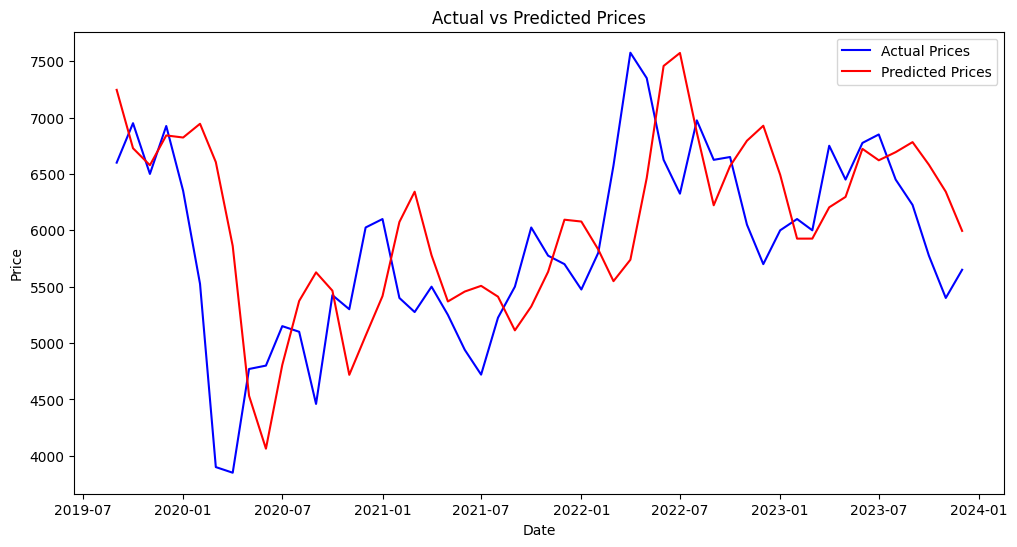

          Date Actual Price Predicted Price
0   01/09/2019      6600.00         7245.68
1   01/10/2019      6950.00         6727.83
2   01/11/2019      6500.00         6577.38
3   01/12/2019      6925.00         6841.49
4   01/01/2020      6350.00         6822.92
5   01/02/2020      5525.00         6944.82
6   01/03/2020      3900.00         6604.85
7   01/04/2020      3850.00         5861.39
8   01/05/2020      4770.00         4532.39
9   01/06/2020      4800.00         4063.33
10  01/07/2020      5150.00         4806.05
11  01/08/2020      5100.00         5373.54
12  01/09/2020      4460.00         5626.89
13  01/10/2020      5425.00         5464.69
14  01/11/2020      5300.00         4718.26
15  01/12/2020      6025.00         5064.93
16  01/01/2021      6100.00         5416.65
17  01/02/2021      5400.00         6073.78
18  01/03/2021      5275.00         6342.34
19  01/04/2021      5500.00         5778.36
20  01/05/2021      5250.00         5368.84
21  01/06/2021      4940.00     

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65, scale=True):
    # Split into train and test sets
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if scale:
        # Normalize the train and test sets separately
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
        test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))
    else:
        train_prices_scaled = train_prices.reshape(-1, 1)
        test_prices_scaled = test_prices.reshape(-1, 1)

    return train_prices_scaled, test_prices_scaled, scaler

def apply_pca(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca, pca

def train_model(X_train, Y_train):
    # Define and fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    # Make predictions for train and test sets
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    # Invert predictions for train set
    trainPredict = scaler.inverse_transform(trainPredict.reshape(-1, 1))
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape Y_train to 2D

    # Invert predictions for test set
    testPredict = scaler.inverse_transform(testPredict.reshape(-1, 1))
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape Y_test to 2D

    # Calculate root mean squared error for train and test sets
    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train(df, look_back=10, n_components=5):
    # Check if the column 'Close' exists
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    print("Length of prices array:", len(prices))  # Debugging line

    # Split into train and test sets
    train_prices, test_prices, scaler = train_test_split(prices)

    print("Length of train_prices array:", len(train_prices))  # Debugging line
    print("Length of test_prices array:", len(test_prices))    # Debugging line

    # Create datasets
    X_train, Y_train = create_dataset(train_prices, look_back)
    X_test, Y_test = create_dataset(test_prices, look_back)

    # Apply PCA
    X_train_pca, X_test_pca, pca = apply_pca(X_train, X_test, n_components)

    # Train the model
    model = train_model(X_train_pca, Y_train)

    # Evaluate the model
    trainScore, testScore = evaluate_model(model, X_train_pca, Y_train, X_test_pca, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    # Predict using the model
    predicted_prices = model.predict(X_test_pca)
    # Invert scaling to get actual predicted prices
    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

    # Create a table with date, actual price, and prediction result for test set
    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)

    # Ensure that the length of the test dataset matches the length of the predicted prices
    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    # Format dates as dd/mm/yyyy
    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    # Format prices to match actual price formatting
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

# Example usage
# Assuming df_1_close is preprocessed and contains the 'Close' column
df_1_close = preprocessing(df_1)
train(df_1_close)

#Final Result

##Using LSTM

Length of prices array: 180
Length of train_prices array: 117
Length of test_prices array: 63


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
7/7 - 4s - 515ms/step - loss: 0.1736
Epoch 2/150
7/7 - 0s - 13ms/step - loss: 0.0272
Epoch 3/150
7/7 - 0s - 19ms/step - loss: 0.0283
Epoch 4/150
7/7 - 0s - 11ms/step - loss: 0.0129
Epoch 5/150
7/7 - 0s - 11ms/step - loss: 0.0096
Epoch 6/150
7/7 - 0s - 11ms/step - loss: 0.0080
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0073
Epoch 8/150
7/7 - 0s - 23ms/step - loss: 0.0071
Epoch 9/150
7/7 - 0s - 18ms/step - loss: 0.0068
Epoch 10/150
7/7 - 0s - 20ms/step - loss: 0.0070
Epoch 11/150
7/7 - 0s - 20ms/step - loss: 0.0069
Epoch 12/150
7/7 - 0s - 11ms/step - loss: 0.0067
Epoch 13/150
7/7 - 0s - 13ms/step - loss: 0.0068
Epoch 14/150
7/7 - 0s - 18ms/step - loss: 0.0067
Epoch 15/150
7/7 - 0s - 10ms/step - loss: 0.0066
Epoch 16/150
7/7 - 0s - 22ms/step - loss: 0.0066
Epoch 17/150
7/7 - 0s - 18ms/step - loss: 0.0067
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0069
Epoch 19/150
7/7 - 0s - 21ms/step - loss: 0.0068
Epoch 20/150
7/7 - 0s - 13ms/step - loss: 0.0067
Epoch 21/150
7/7 - 0s - 19ms

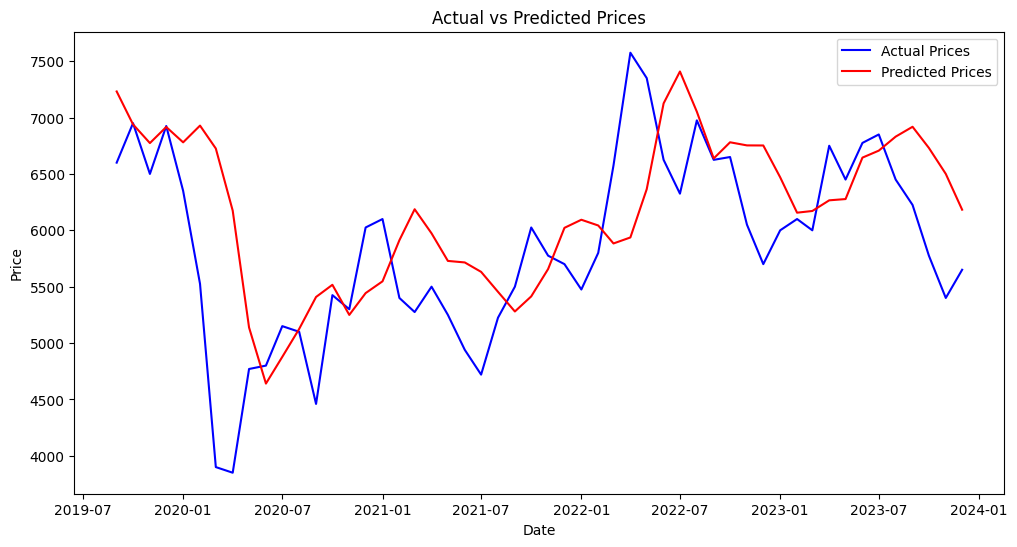

          Date Actual Price Predicted Price
0   01/09/2019      6600.00         7231.40
1   01/10/2019      6950.00         6939.37
2   01/11/2019      6500.00         6773.67
3   01/12/2019      6925.00         6916.32
4   01/01/2020      6350.00         6780.17
5   01/02/2020      5525.00         6928.67
6   01/03/2020      3900.00         6725.31
7   01/04/2020      3850.00         6174.54
8   01/05/2020      4770.00         5138.26
9   01/06/2020      4800.00         4640.51
10  01/07/2020      5150.00         4877.39
11  01/08/2020      5100.00         5125.44
12  01/09/2020      4460.00         5408.73
13  01/10/2020      5425.00         5516.65
14  01/11/2020      5300.00         5249.62
15  01/12/2020      6025.00         5443.04
16  01/01/2021      6100.00         5547.42
17  01/02/2021      5400.00         5912.09
18  01/03/2021      5275.00         6186.79
19  01/04/2021      5500.00         5973.17
20  01/05/2021      5250.00         5728.49
21  01/06/2021      4940.00     

In [ ]:
def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65, scale=True):
    # Split into train and test sets
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if scale:
        # Normalize the train and test sets separately
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
        test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))
    else:
        train_prices_scaled = train_prices.reshape(-1, 1)
        test_prices_scaled = test_prices.reshape(-1, 1)

    return train_prices_scaled, test_prices_scaled

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    # Define and compile the LSTM model
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, 1)))  # First hidden layer
    model.add(LSTM(100, return_sequences=False)) # Second hidden layer
    model.add(Dense(25))  # Dense layer
    model.add(Dense(1))  # Output layer
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Reshape input data for LSTM
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Fit the model with train set
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    # Make predictions for train and test sets
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    # Invert predictions for train set
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape Y_train to 2D

    # Invert predictions for test set
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape Y_test to 2D

    # Calculate root mean squared error for train and test sets
    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    # Check if the column 'Close' or 'Adj Close' exists
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    print("Length of prices array:", len(prices))  # Debugging line

    # Split into train and test sets
    train_prices, test_prices = train_test_split(prices)

    print("Length of train_prices array:", len(train_prices))  # Debugging line
    print("Length of test_prices array:", len(test_prices))    # Debugging line

    # calling the create_dataset function to split the data into input-output datasets
    X_train, Y_train = create_dataset(train_prices, look_back)
    X_test, Y_test = create_dataset(test_prices, look_back)

    # Train the model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit_transform(prices.reshape(-1, 1))
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    # Predict using the model
    predicted_prices = model.predict(X_test)
    # Invert scaling to get actual predicted prices
    predicted_prices = scaler.inverse_transform(predicted_prices)

    # Create a table with date, actual price, and prediction result for test set
    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)

    # Ensure that the length of the test dataset matches the length of the predicted prices
    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    # Format dates as dd/mm/yyyy
    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    # Format prices to match actual price formatting
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

df_1_close = preprocessing(df_1)

# Example usage
train(df_1_close)

##Using LSTM and a single Data fundamental

Length of prices array: 180
Length of train_prices array: 117
Length of test_prices array: 63
X_train shape: (106, 10, 1), Y_train shape: (106, 1)
X_test shape: (52, 10, 1), Y_test shape: (52, 1)
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 291ms/step - loss: 0.2041
Epoch 2/150
7/7 - 0s - 15ms/step - loss: 0.0275
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0218
Epoch 4/150
7/7 - 0s - 21ms/step - loss: 0.0117
Epoch 5/150
7/7 - 0s - 12ms/step - loss: 0.0087
Epoch 6/150
7/7 - 0s - 19ms/step - loss: 0.0082
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0073
Epoch 8/150
7/7 - 0s - 11ms/step - loss: 0.0071
Epoch 9/150
7/7 - 0s - 21ms/step - loss: 0.0069
Epoch 10/150
7/7 - 0s - 19ms/step - loss: 0.0069
Epoch 11/150
7/7 - 0s - 10ms/step - loss: 0.0070
Epoch 12/150
7/7 - 0s - 11ms/step - loss: 0.0069
Epoch 13/150
7/7 - 0s - 20ms/step - loss: 0.0068
Epoch 14/150
7/7 - 0s - 11ms/step - loss: 0.0068
Epoch 15/150
7/7 - 0s - 20ms/step - loss: 0.0070
Epoch 16/150
7/7 - 0s - 20ms/step - loss: 0.0068
Epoch 17/150
7/7 - 0s - 11ms/step - loss: 0.0067
Epoch 18/150
7/7 - 0s - 14ms/step - loss: 0.0068
Epoch 19/150
7/7 - 0s - 15ms/step - loss: 0.0067
Epoch 20/150
7/7 - 0s - 10ms/step - loss: 0.0071
Epoch 21/150
7/7 - 0s - 11ms/step - loss

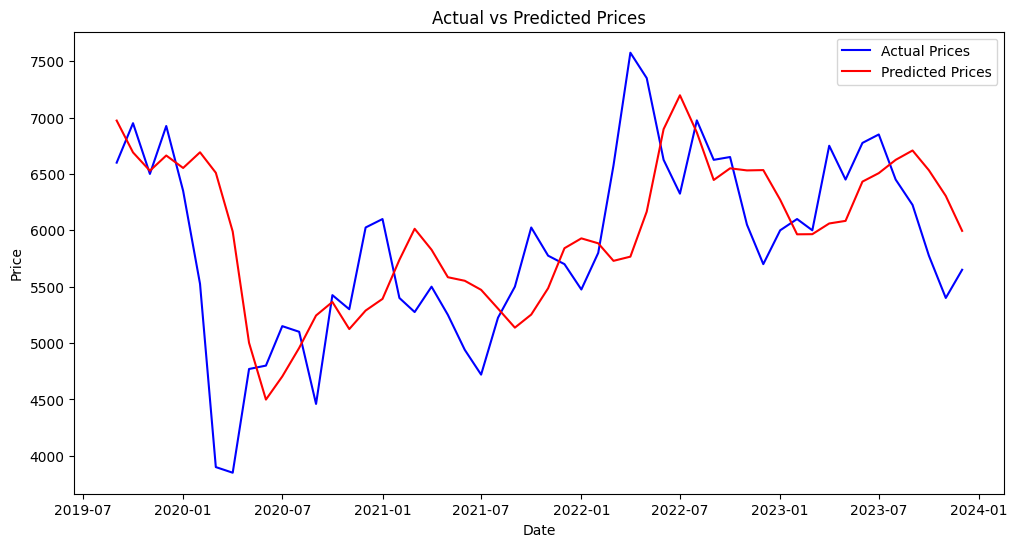

          Date Actual Price Predicted Price
0   01/09/2019      6600.00         6973.09
1   01/10/2019      6950.00         6690.74
2   01/11/2019      6500.00         6528.05
3   01/12/2019      6925.00         6663.34
4   01/01/2020      6350.00         6552.87
5   01/02/2020      5525.00         6691.89
6   01/03/2020      3900.00         6510.26
7   01/04/2020      3850.00         5989.06
8   01/05/2020      4770.00         5001.97
9   01/06/2020      4800.00         4498.62
10  01/07/2020      5150.00         4703.93
11  01/08/2020      5100.00         4956.81
12  01/09/2020      4460.00         5244.49
13  01/10/2020      5425.00         5364.49
14  01/11/2020      5300.00         5124.06
15  01/12/2020      6025.00         5288.29
16  01/01/2021      6100.00         5391.64
17  01/02/2021      5400.00         5737.93
18  01/03/2021      5275.00         6013.44
19  01/04/2021      5500.00         5827.72
20  01/05/2021      5250.00         5583.87
21  01/06/2021      4940.00     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 364ms/step - loss: 0.1554
Epoch 2/150
7/7 - 0s - 10ms/step - loss: 0.0215
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0116
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0132
Epoch 5/150
7/7 - 0s - 14ms/step - loss: 0.0093
Epoch 6/150
7/7 - 0s - 11ms/step - loss: 0.0080
Epoch 7/150
7/7 - 0s - 12ms/step - loss: 0.0069
Epoch 8/150
7/7 - 0s - 14ms/step - loss: 0.0073
Epoch 9/150
7/7 - 0s - 21ms/step - loss: 0.0067
Epoch 10/150
7/7 - 0s - 17ms/step - loss: 0.0069
Epoch 11/150
7/7 - 0s - 12ms/step - loss: 0.0070
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0075
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0069
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0072
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0067
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0066
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0067
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0068
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0068
E

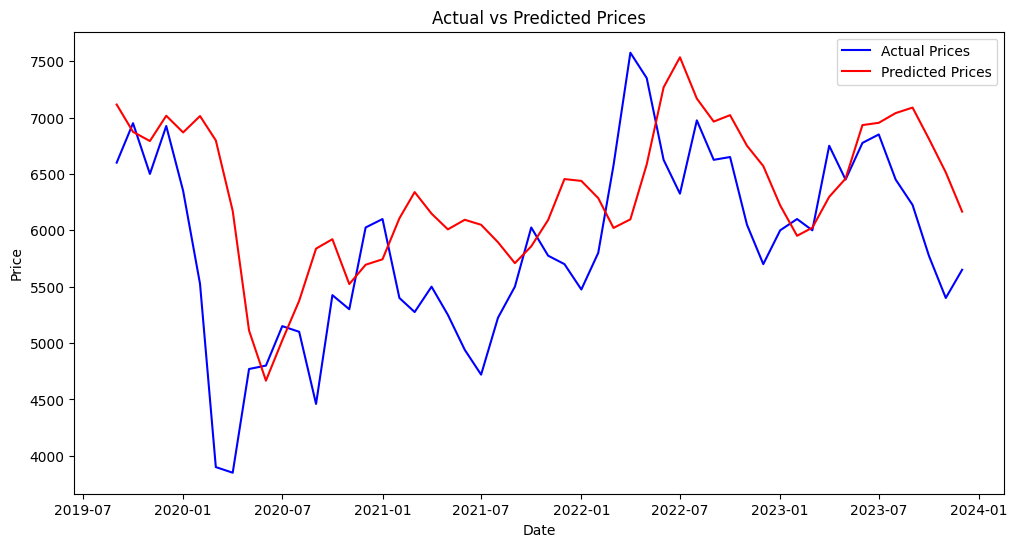

          Date Actual Price Predicted Price
0   01/09/2019      6600.00         7115.44
1   01/10/2019      6950.00         6873.15
2   01/11/2019      6500.00         6791.76
3   01/12/2019      6925.00         7016.03
4   01/01/2020      6350.00         6868.12
5   01/02/2020      5525.00         7013.36
6   01/03/2020      3900.00         6797.25
7   01/04/2020      3850.00         6172.20
8   01/05/2020      4770.00         5111.07
9   01/06/2020      4800.00         4666.69
10  01/07/2020      5150.00         5024.27
11  01/08/2020      5100.00         5374.88
12  01/09/2020      4460.00         5837.57
13  01/10/2020      5425.00         5920.93
14  01/11/2020      5300.00         5522.91
15  01/12/2020      6025.00         5694.50
16  01/01/2021      6100.00         5742.92
17  01/02/2021      5400.00         6106.09
18  01/03/2021      5275.00         6338.86
19  01/04/2021      5500.00         6147.84
20  01/05/2021      5250.00         6008.20
21  01/06/2021      4940.00     

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_dataset(dataset, roe=None, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        if roe is not None:
            a = np.column_stack((dataset[i:(i + look_back)], roe[i:(i + look_back)]))
        else:
            a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, roe=None, train_size=0.65, scale=True):
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if roe is not None:
        train_roe, test_roe = roe[:split_point], roe[split_point:]
    else:
        train_roe, test_roe = None, None

    if scale:
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
        test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

        if roe is not None:
            roe_scaler = MinMaxScaler(feature_range=(0, 1))
            train_roe_scaled = roe_scaler.fit_transform(np.array(train_roe).reshape(-1, 1))
            test_roe_scaled = roe_scaler.transform(np.array(test_roe).reshape(-1, 1))
        else:
            train_roe_scaled, test_roe_scaled = None, None
    else:
        train_prices_scaled = train_prices.reshape(-1, 1)
        test_prices_scaled = test_prices.reshape(-1, 1)

        if roe is not None:
            train_roe_scaled = np.array(train_roe).reshape(-1, 1)
            test_roe_scaled = np.array(test_roe).reshape(-1, 1)
        else:
            train_roe_scaled, test_roe_scaled = None, None

    return train_prices_scaled, test_prices_scaled, train_roe_scaled, test_roe_scaled

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))  # Adjust input_shape to match features
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train1(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    print("Length of prices array:", len(prices))  # Debugging line

    train_prices, test_prices, _, _ = train_test_split(prices)

    print("Length of train_prices array:", len(train_prices))  # Debugging line
    print("Length of test_prices array:", len(test_prices))    # Debugging line

    X_train, Y_train = create_dataset(train_prices, look_back=look_back)
    X_test, Y_test = create_dataset(test_prices, look_back=look_back)

    print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")  # Debugging line
    print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")      # Debugging line

    if len(X_train) == 0 or len(X_test) == 0:
        raise ValueError("Insufficient data after creating dataset with the given look_back period.")

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit_transform(prices.reshape(-1, 1))
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)

    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

def train2(df, roe, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    train_prices, test_prices, train_roe, test_roe = train_test_split(prices, roe)

    print(f"train_prices: {train_prices.shape}, test_prices: {test_prices.shape}")
    print(f"train_roe: {train_roe.shape}, test_roe: {test_roe.shape}")

    X_train, Y_train = create_dataset(train_prices, train_roe, look_back)
    X_test, Y_test = create_dataset(test_prices, test_roe, look_back)

    print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
    print(f"X_test: {X_test.shape}, Y_test: {Y_test.shape}")

    if len(X_train) == 0 or len(X_test) == 0:
        raise ValueError("Insufficient data after creating dataset with the given look_back period.")

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit_transform(prices.reshape(-1, 1))
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)

    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

# Example usage:
# Assuming df_1_close is your DataFrame with the closing prices and roe_data['ROE'] is provided
roe_data = {
    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410]
}

# Assuming df_1_close is your DataFrame with the closing prices
# df_1_close = preprocessing(df_1)  # Ensure preprocessing is defined

# Run the training functions
train1(df_1_close)
train2(df_1_close, roe_data['ROE'])

##Using LSTM and multiple Data Fundamental

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 315ms/step - loss: 0.1378
Epoch 2/150
7/7 - 0s - 10ms/step - loss: 0.0461
Epoch 3/150
7/7 - 0s - 11ms/step - loss: 0.0236
Epoch 4/150
7/7 - 0s - 10ms/step - loss: 0.0171
Epoch 5/150
7/7 - 0s - 10ms/step - loss: 0.0097
Epoch 6/150
7/7 - 0s - 10ms/step - loss: 0.0086
Epoch 7/150
7/7 - 0s - 10ms/step - loss: 0.0088
Epoch 8/150
7/7 - 0s - 12ms/step - loss: 0.0068
Epoch 9/150
7/7 - 0s - 19ms/step - loss: 0.0068
Epoch 10/150
7/7 - 0s - 23ms/step - loss: 0.0059
Epoch 11/150
7/7 - 0s - 18ms/step - loss: 0.0058
Epoch 12/150
7/7 - 0s - 12ms/step - loss: 0.0054
Epoch 13/150
7/7 - 0s - 11ms/step - loss: 0.0053
Epoch 14/150
7/7 - 0s - 19ms/step - loss: 0.0058
Epoch 15/150
7/7 - 0s - 11ms/step - loss: 0.0054
Epoch 16/150
7/7 - 0s - 13ms/step - loss: 0.0047
Epoch 17/150
7/7 - 0s - 14ms/step - loss: 0.0043
Epoch 18/150
7/7 - 0s - 12ms/step - loss: 0.0043
Epoch 19/150
7/7 - 0s - 12ms/step - loss: 0.0050
Epoch 20/150
7/7 - 0s - 12ms/step - loss: 0.0041
Epoch 21/150
7/7 - 0s - 16ms/step - loss

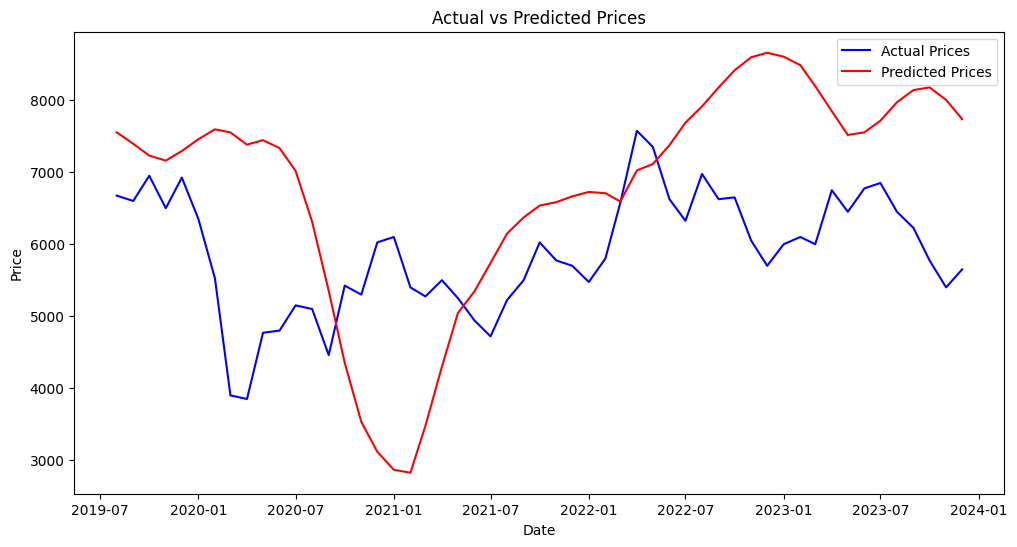

          Date Actual Price Predicted Price
0   01/08/2019      6675.00         7554.27
1   01/09/2019      6600.00         7394.90
2   01/10/2019      6950.00         7230.83
3   01/11/2019      6500.00         7161.12
4   01/12/2019      6925.00         7294.23
5   01/01/2020      6350.00         7457.59
6   01/02/2020      5525.00         7595.32
7   01/03/2020      3900.00         7552.21
8   01/04/2020      3850.00         7382.61
9   01/05/2020      4770.00         7444.99
10  01/06/2020      4800.00         7334.20
11  01/07/2020      5150.00         7018.87
12  01/08/2020      5100.00         6311.43
13  01/09/2020      4460.00         5352.27
14  01/10/2020      5425.00         4352.76
15  01/11/2020      5300.00         3532.93
16  01/12/2020      6025.00         3117.16
17  01/01/2021      6100.00         2867.24
18  01/02/2021      5400.00         2826.18
19  01/03/2021      5275.00         3475.67
20  01/04/2021      5500.00         4299.81
21  01/05/2021      5250.00     

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_dataset(dataset, roe, roa, debt_to_equity, financial_leverage, current_ratio, quick_ratio,
                   itr, rtr, income_margin, net_margin, orgr, nigr, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = np.column_stack((dataset[i:(i + look_back), 0],
                             roe[i:(i + look_back)],
                             roa[i:(i + look_back)],
                             debt_to_equity[i:(i + look_back)],
                             financial_leverage[i:(i + look_back)],
                             current_ratio[i:(i + look_back)],
                             quick_ratio[i:(i + look_back)],
                             itr[i:(i + look_back)],
                             rtr[i:(i + look_back)],
                             income_margin[i:(i + look_back)],
                             net_margin[i:(i + look_back)],
                             orgr[i:(i + look_back)],
                             nigr[i:(i + look_back)]))
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, roe, roa, debt_to_equity, financial_leverage, current_ratio, quick_ratio,
                     itr, rtr, income_margin, net_margin, orgr, nigr, train_size=0.65, scale=True):
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]
    train_roe, test_roe = roe[:split_point], roe[split_point:]
    train_roa, test_roa = roa[:split_point], roa[split_point:]
    train_debt_to_equity, test_debt_to_equity = debt_to_equity[:split_point], debt_to_equity[split_point:]
    train_financial_leverage, test_financial_leverage = financial_leverage[:split_point], financial_leverage[split_point:]
    train_current_ratio, test_current_ratio = current_ratio[:split_point], current_ratio[split_point:]
    train_quick_ratio, test_quick_ratio = quick_ratio[:split_point], quick_ratio[split_point:]
    train_itr, test_itr = itr[:split_point], itr[split_point:]
    train_rtr, test_rtr = rtr[:split_point], rtr[split_point:]
    train_income_margin, test_income_margin = income_margin[:split_point], income_margin[split_point:]
    train_net_margin, test_net_margin = net_margin[:split_point], net_margin[split_point:]
    train_orgr, test_orgr = orgr[:split_point], orgr[split_point:]
    train_nigr, test_nigr = nigr[:split_point], nigr[split_point:]

    scaler = MinMaxScaler(feature_range=(0, 1))

    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    feature_scalers = []
    features = [train_roe, train_roa, train_debt_to_equity, train_financial_leverage, train_current_ratio,
                train_quick_ratio, train_itr, train_rtr, train_income_margin, train_net_margin, train_orgr, train_nigr]

    for feature in features:
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        feature_scaler.fit(np.array(feature).reshape(-1, 1))
        feature_scalers.append(feature_scaler)

    def scale_features(features, feature_scalers):
        scaled_features = []
        for feature, scaler in zip(features, feature_scalers):
            scaled_features.append(scaler.transform(np.array(feature).reshape(-1, 1)).flatten())
        return scaled_features

    train_features_scaled = scale_features(features, feature_scalers)
    test_features_scaled = scale_features([test_roe, test_roa, test_debt_to_equity, test_financial_leverage, test_current_ratio,
                                           test_quick_ratio, test_itr, test_rtr, test_income_margin, test_net_margin, test_orgr, test_nigr], feature_scalers)

    return (train_prices_scaled, test_prices_scaled) + tuple(train_features_scaled) + tuple(test_features_scaled), scaler


def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, 12)))  # Adjust input_shape to 13 features
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train(df, roe, roa, debt_to_equity, financial_leverage, current_ratio, quick_ratio, itr, rtr, net_margin, income_margin, orgr, nigr, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    split_data, scaler = train_test_split(prices, roe, roa, debt_to_equity, financial_leverage, current_ratio, quick_ratio, itr, rtr, income_margin, net_margin, orgr, nigr)

    train_prices_scaled, test_prices_scaled, *features_scaled = split_data

    # Pass only 13 features to create_dataset
    X_train, Y_train = create_dataset(train_prices_scaled, *features_scaled[:12], look_back)
    X_test, Y_test = create_dataset(test_prices_scaled, *features_scaled[12:], look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    test_dates = df.index[-len(test_prices_scaled):]
    actual_prices = scaler.inverse_transform(test_prices_scaled)

    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

# Assuming df_1_close is your DataFrame with the closing prices
roe_data = {
    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410]
}

roa_data = {
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183]
}

de_data = {
    'Debt_to_Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47]
}

fl_data = {
    'Financial_Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24]
}

cr_data = {
    'Current_Ratio': [1.39, 1.39, 1.39, 1.29, 1.29, 1.29, 1.4, 1.4, 1.4, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.21, 1.21, 1.21, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.36, 1.36, 1.36, 1.42, 1.42, 1.42, 1.32, 1.32, 1.32, 1.36, 1.36, 1.36, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.36, 1.36, 1.36, 1.4, 1.4, 1.4, 1.35, 1.35, 1.35, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.24, 1.24, 1.24, 1.25, 1.25, 1.25, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.32, 1.32, 1.32, 1.41, 1.41, 1.41, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.38, 1.38, 1.38, 1.37, 1.37, 1.37, 1.34, 1.34, 1.34, 1.36, 1.36, 1.36, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.13, 1.13, 1.13, 1.1, 1.1, 1.1, 1.23, 1.23, 1.23, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.23, 1.23, 1.23, 1.15, 1.15, 1.15, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.26, 1.26, 1.26, 1.29, 1.29, 1.29, 1.37, 1.37, 1.37, 1.49, 1.49, 1.49, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.47, 1.47, 1.47, 1.51, 1.51, 1.51, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54, 1.46, 1.46, 1.46, 1.51, 1.51, 1.51, 1.53, 1.53, 1.53, 1.31, 1.31, 1.31, 1.18, 1.18, 1.18, 1.33, 1.33, 1.33]
}

qr_data = {
    'Quick_Ratio': [1.1, 1.1, 1.1, 1.04, 1.04, 1.04, 1.14, 1.14, 1.14, 1.1, 1.1, 1.1, 1.15, 1.15, 1.15, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.97, 0.97, 0.97, 1.12, 1.12, 1.12, 1.21, 1.21, 1.21, 1.11, 1.11, 1.11, 1.12, 1.12, 1.12, 1.23, 1.23, 1.23, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.02, 1.02, 1.02, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.09, 1.09, 1.09, 1.17, 1.17, 1.17, 1.12, 1.12, 1.12, 1.08, 1.08, 1.08, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.16, 1.16, 1.16, 1.04, 1.04, 1.04, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 1.15, 1.15, 1.15, 1.09, 1.09, 1.09, 1.02, 1.02, 1.02, 0.92, 0.92, 0.92, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.02, 1.02, 1.02, 1.05, 1.05, 1.05, 1.09, 1.09, 1.09, 1.24, 1.24, 1.24, 1.31, 1.31, 1.31, 1.33, 1.33, 1.33, 1.3, 1.3, 1.3, 1.33, 1.33, 1.33, 1.36, 1.36, 1.36, 1.33, 1.33, 1.33, 1.37, 1.37, 1.37, 1.32, 1.32, 1.32, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.07, 1.07, 1.07, 0.94, 0.94, 0.94, 1.02, 1.02, 1.02]
}

itr_data = {
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55]
}

rtr_data = {
    'RTR': [12.17, 12.17, 12.17, 14.05, 14.05, 14.05, 13.96, 13.96, 13.96, 11.68, 11.68, 11.68, 10.94, 10.94, 10.94, 10.61, 10.61, 10.61, 11.36, 11.36, 11.36, 12.29, 12.29, 12.29, 11.22, 11.22, 11.22, 10.9, 10.9, 10.9, 11.26, 11.26, 11.26, 10.51, 10.51, 10.51, 10.05, 10.05, 10.05, 10.76, 10.76, 10.76, 11.12, 11.12, 11.12, 10.3, 10.3, 10.3, 8.25, 8.25, 8.25, 8.49, 8.49, 8.49, 9.6, 9.6, 9.6, 11.81, 11.81, 11.81, 10.13, 10.13, 10.13, 9.76, 9.76, 9.76, 9.66, 9.66, 9.66, 10.77, 10.77, 10.77, 8.23, 8.23, 8.23, 9.31, 9.31, 9.31, 10.11, 10.11, 10.11, 9.71, 9.71, 9.71, 8.07, 8.07, 8.07, 8.82, 8.82, 8.82, 9.74, 9.74, 9.74, 11.83, 11.83, 11.83, 8.64, 8.64, 8.64, 8.56, 8.56, 8.56, 10.69, 10.69, 10.69, 9.78, 9.78, 9.78, 10.76, 10.76, 10.76, 11.39, 11.39, 11.39, 12.41, 12.41, 12.41, 10.36, 10.36, 10.36, 11.6, 11.6, 11.6, 10.34, 10.34, 10.34, 11.18, 11.18, 11.18, 11.01, 11.01, 11.01, 10.61, 10.61, 10.61, 5.81, 5.81, 5.81, 7.14, 7.14, 7.14, 4.84, 4.84, 4.84, 8.75, 8.75, 8.75, 11.49, 11.49, 11.49, 12.26, 12.26, 12.26, 10.97, 10.97, 10.97, 12.72, 12.72, 12.72, 15.84, 15.84, 15.84, 13.27, 13.27, 13.27, 14.22, 14.22, 14.22, 13.0, 13.0, 13.0, 15.04, 15.04, 15.04, 12.37, 12.37, 12.37, 15.64, 15.64, 15.64]
}

nm_data = {
    'Net_Margin': [0.0871, 0.0871, 0.0871, 0.102, 0.102, 0.102, 0.1105, 0.1105, 0.1105, 0.1053, 0.1053, 0.1053, 0.1015, 0.1015, 0.1015, 0.1062, 0.1062, 0.1062, 0.1185, 0.1185, 0.1185, 0.1145, 0.1145, 0.1145, 0.131, 0.131, 0.131, 0.1334, 0.1334, 0.1334, 0.1349, 0.1349, 0.1349, 0.1198, 0.1198, 0.1198, 0.1179, 0.1179, 0.1179, 0.1191, 0.1191, 0.1191, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.106, 0.106, 0.106, 0.1089, 0.1089, 0.1089, 0.1105, 0.1105, 0.1105, 0.1328, 0.1328, 0.1328, 0.1146, 0.1146, 0.1146, 0.1182, 0.1182, 0.1182, 0.1151, 0.1151, 0.1151, 0.0911, 0.0911, 0.0911, 0.1064, 0.1064, 0.1064, 0.1046, 0.1046, 0.1046, 0.1063, 0.1063, 0.1063, 0.0218, 0.0218, 0.0218, 0.0869, 0.0869, 0.0869, 0.1008, 0.1008, 0.1008, 0.1116, 0.1116, 0.1116, 0.1039, 0.1039, 0.1039, 0.1245, 0.1245, 0.1245, 0.1069, 0.1069, 0.1069, 0.116, 0.116, 0.116, 0.1027, 0.1027, 0.1027, 0.1135, 0.1135, 0.1135, 0.1209, 0.1209, 0.1209, 0.1335, 0.1335, 0.1335, 0.091, 0.091, 0.091, 0.1118, 0.1118, 0.1118, 0.0996, 0.0996, 0.0996, 0.1204, 0.1204, 0.1204, 0.1163, 0.1163, 0.1163, 0.1053, 0.1053, 0.1053, 0.2081, 0.2081, 0.2081, 0.0763, 0.0763, 0.0763, 0.0523, 0.0523, 0.0523, 0.0901, 0.0901, 0.0901, 0.1165, 0.1165, 0.1165, 0.1312, 0.1312, 0.1312, 0.0994, 0.0994, 0.0994, 0.129, 0.129, 0.129, 0.2039, 0.2039, 0.2039, 0.1042, 0.1042, 0.1042, 0.1051, 0.1051, 0.1051, 0.1397, 0.1397, 0.1397, 0.1491, 0.1491, 0.1491, 0.1292, 0.1292, 0.1292, 0.1444, 0.1444, 0.1444]
}

im_data = {
    'Income_Margin': [0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0353, 0.0353, 0.0353, 0.0369, 0.0369, 0.0369, 0.0363, 0.0363, 0.0363, 0.0348, 0.0348, 0.0348, 0.0343, 0.0343, 0.0343, 0.037, 0.037, 0.037, 0.0365, 0.0365, 0.0365, 0.0305, 0.0305, 0.0305, 0.0313, 0.0313, 0.0313, 0.0294, 0.0294, 0.0294, 0.0303, 0.0303, 0.0303, 0.0293, 0.0293, 0.0293, 0.026, 0.026, 0.026, 0.0257, 0.0257, 0.0257, 0.0274, 0.0274, 0.0274, 0.0264, 0.0264, 0.0264, 0.0249, 0.0249, 0.0249, 0.0263, 0.0263, 0.0263, 0.0248, 0.0248, 0.0248, 0.0239, 0.0239, 0.0239, 0.0213, 0.0213, 0.0213, 0.023, 0.023, 0.023, 0.0221, 0.0221, 0.0221, 0.0242, 0.0242, 0.0242, 0.0224, 0.0224, 0.0224, 0.0236, 0.0236, 0.0236, 0.0233, 0.0233, 0.0233, 0.0249, 0.0249, 0.0249, 0.0231, 0.0231, 0.0231, 0.0255, 0.0255, 0.0255, 0.0243, 0.0243, 0.0243, 0.0227, 0.0227, 0.0227, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0214, 0.0214, 0.0214, 0.02, 0.02, 0.02, 0.0204, 0.0204, 0.0204, 0.0205, 0.0205, 0.0205, 0.0192, 0.0192, 0.0192, 0.018, 0.018, 0.018, 0.0189, 0.0189, 0.0189, 0.0194, 0.0194, 0.0194, 0.0211, 0.0211, 0.0211, 0.018, 0.018, 0.018, 0.0232, 0.0232, 0.0232, 0.0262, 0.0262, 0.0262, 0.029, 0.029, 0.029, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0304, 0.0304, 0.0304, 0.0305, 0.0305, 0.0305, 0.0273, 0.0273, 0.0273, 0.0277, 0.0277, 0.0277, 0.0275, 0.0275, 0.0275, 0.0287, 0.0287, 0.0287, 0.0266, 0.0266, 0.0266, 0.0252, 0.0252, 0.0252, 0.0257, 0.0257, 0.0257]
}

or_data = {
    'ORGR': [0.0756, 0.0756, 0.0756, 0.0783, 0.0783, 0.0783, 0.1146, 0.1146, 0.1146, 0.077, 0.077, 0.077, 0.0649, 0.0649, 0.0649, 0.0863, 0.0863, 0.0863, 0.0262, 0.0262, 0.0262, 0.0563, 0.0563, 0.0563, 0.1069, 0.1069, 0.1069, 0.029, 0.029, 0.029, 0.1516, 0.1516, 0.1516, 0.0054, 0.0054, 0.0054, 0.0771, 0.0771, 0.0771, 0.0693, 0.0693, 0.0693, 0.0474, 0.0474, 0.0474, 0.0488, 0.0488, 0.0488, 0.0393, 0.0393, 0.0393, 0.0198, 0.0198, 0.0198, 0.0008, 0.0008, 0.0008, 0.0942, 0.0942, 0.0942, 0.0426, 0.0426, 0.0426, 0.0379, 0.0379, 0.0379, 0.0513, 0.0513, 0.0513, 0.0421, 0.0421, 0.0421, 0.116, 0.116, 0.116, 0.0472, 0.0472, 0.0472, 0.0348, 0.0348, 0.0348, 0.0076, 0.0076, 0.0076, 0.0898, 0.0898, 0.0898, 0.1059, 0.1059, 0.1059, 0.0483, 0.0483, 0.0483, 0.1067, 0.1067, 0.1067, 0.0002, 0.0002, 0.0002, 0.0097, 0.0097, 0.0097, 0.0598, 0.0598, 0.0598, 0.0697, 0.0697, 0.0697, 0.0002, 0.0002, 0.0002, 0.0161, 0.0161, 0.0161, 0.0986, 0.0986, 0.0986, 0.032, 0.032, 0.032, 0.0733, 0.0733, 0.0733, 0.0509, 0.0509, 0.0509, 0.0758, 0.0758, 0.0758, 0.0122, 0.0122, 0.0122, 0.1018, 0.1018, 0.1018, 0.3372, 0.3372, 0.3372, 0.133, 0.133, 0.133, 0.1022, 0.1022, 0.1022, 0.1567, 0.1567, 0.1567, 0.0773, 0.0773, 0.0773, 0.0774, 0.0774, 0.0774, 0.1012, 0.1012, 0.1012, 0.0876, 0.0876, 0.0876, 0.0007, 0.0007, 0.0007, 0.0813, 0.0813, 0.0813, 0.0304, 0.0304, 0.0304, 0.0369, 0.0369, 0.0369, 0.043, 0.043, 0.043, 0.0112, 0.0112, 0.0112, 0.0365, 0.0365, 0.0365]
}

ni_data = {
    'NIGR': [0.0302, 0.0302, 0.0302, 0.2629, 0.2629, 0.2629, 0.2082, 0.2082, 0.2082, 0.0262, 0.0262, 0.0262, 0.0266, 0.0266, 0.0266, 0.1364, 0.1364, 0.1364, 0.1454, 0.1454, 0.1454, 0.0206, 0.0206, 0.0206, 0.2662, 0.2662, 0.2662, 0.011, 0.011, 0.011, 0.1643, 0.1643, 0.1643, 0.117, 0.117, 0.117, 0.0599, 0.0599, 0.0599, 0.0807, 0.0807, 0.0807, 0.0129, 0.0129, 0.0129, 0.0489, 0.0489, 0.0489, 0.1079, 0.1079, 0.1079, 0.0479, 0.0479, 0.0479, 0.0143, 0.0143, 0.0143, 0.3146, 0.3146, 0.3146, 0.1738, 0.1738, 0.1738, 0.0702, 0.0702, 0.0702, 0.0759, 0.0759, 0.0759, 0.182, 0.182, 0.182, 0.0324, 0.0324, 0.0324, 0.0295, 0.0295, 0.0295, 0.0196, 0.0196, 0.0196, 0.7935, 0.7935, 0.7935, 2.63, 2.63, 2.63, 0.2836, 0.2836, 0.2836, 0.0535, 0.0535, 0.0535, 0.0305, 0.0305, 0.0305, 0.1974, 0.1974, 0.1974, 0.1332, 0.1332, 0.1332, 0.1501, 0.1501, 0.1501, 0.0529, 0.0529, 0.0529, 0.1048, 0.1048, 0.1048, 0.083, 0.083, 0.083, 0.2133, 0.2133, 0.2133, 0.2965, 0.2965, 0.2965, 0.1383, 0.1383, 0.1383, 0.1544, 0.1544, 0.1544, 0.3, 0.3, 0.3, 0.0456, 0.0456, 0.0456, 0.1868, 0.1868, 0.1868, 0.31, 0.31, 0.31, 0.5844, 0.5844, 0.5844, 0.2448, 0.2448, 0.2448, 0.9919, 0.9919, 0.9919, 0.3927, 0.3927, 0.3927, 0.2141, 0.2141, 0.2141, 0.166, 0.166, 0.166, 0.4117, 0.4117, 0.4117, 0.5795, 0.5795, 0.5795, 0.4473, 0.4473, 0.4473, 0.0387, 0.0387, 0.0387, 0.3786, 0.3786, 0.3786, 0.0215, 0.0215, 0.0215, 0.1432, 0.1432, 0.1432, 0.0771, 0.0771, 0.0771]
}

df_1_close = preprocessing(df_1)

train(df_1_close, roe_data['ROE'], roa_data['ROA'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], itr_data['ITR'], rtr_data['RTR'], nm_data['Net_Margin'], im_data['Income_Margin'], or_data['ORGR'], ni_data['NIGR'])

#Tugas Tambahan

##Comparison RMSE between LSTM and single Data Fundamental

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_dataset(dataset, roe=None, look_back=5):
    dataX, dataY = [], []
    min_length = min(len(dataset), len(roe) if roe is not None else len(dataset))
    for i in range(min_length - look_back - 1):
        if roe is not None:
            a = np.column_stack((dataset[i:(i + look_back)], roe[i:(i + look_back)]))
        else:
            a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, roe=None, train_size=0.65, scale=True):
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if roe is not None:
        train_roe, test_roe = roe[:split_point], roe[split_point:]
    else:
        train_roe, test_roe = None, None

    if scale:
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
        test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

        if roe is not None:
            roe_scaler = MinMaxScaler(feature_range=(0, 1))
            train_roe_scaled = roe_scaler.fit_transform(np.array(train_roe).reshape(-1, 1))
            test_roe_scaled = roe_scaler.transform(np.array(test_roe).reshape(-1, 1))
        else:
            train_roe_scaled, test_roe_scaled = None, None
    else:
        train_prices_scaled = train_prices.reshape(-1, 1)
        test_prices_scaled = test_prices.reshape(-1, 1)

        if roe is not None:
            train_roe_scaled = np.array(train_roe).reshape(-1, 1)
            test_roe_scaled = np.array(test_roe).reshape(-1, 1)
        else:
            train_roe_scaled, test_roe_scaled = None, None

    return train_prices_scaled, test_prices_scaled, train_roe_scaled, test_roe_scaled

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train1(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    train_prices, test_prices, _, _ = train_test_split(prices)

    X_train, Y_train = create_dataset(train_prices, look_back=look_back)
    X_test, Y_test = create_dataset(test_prices, look_back=look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit_transform(prices.reshape(-1, 1))
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 1): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 1): {testScore:.2f} RMSE')

    return trainScore, testScore

def train2(df, roe, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    train_prices, test_prices, train_roe, test_roe = train_test_split(prices, roe)

    X_train, Y_train = create_dataset(train_prices, train_roe, look_back=look_back)
    X_test, Y_test = create_dataset(test_prices, test_roe, look_back=look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit_transform(prices.reshape(-1, 1))
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 2): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 2): {testScore:.2f} RMSE')

    return trainScore, testScore

roe_data = {
    'ROE': [0.0672, 0.0672, 0.0672, 0.0864, 0.0864, 0.0864, 0.0931, 0.0931, 0.0931, 0.0880, 0.0880, 0.0880, 0.0833, 0.0833, 0.0833, 0.0938, 0.0938, 0.0938, 0.0985, 0.0985, 0.0985, 0.0959, 0.0959, 0.0959, 0.0802, 0.0802, 0.0802, 0.0804, 0.0804, 0.0804, 0.0868, 0.0868, 0.0868, 0.0719, 0.0719, 0.0719, 0.0719, 0.0719, 0.0719, 0.0785, 0.0785, 0.0785, 0.0751, 0.0751, 0.0751, 0.0667, 0.0667, 0.0667, 0.0574, 0.0574, 0.0574, 0.0601, 0.0601, 0.0601, 0.0600, 0.0600, 0.0600, 0.0709, 0.0709, 0.0709, 0.0531, 0.0531, 0.0531, 0.0575, 0.0575, 0.0575, 0.0517, 0.0517, 0.0517, 0.0490, 0.0490, 0.0490, 0.0398, 0.0398, 0.0398, 0.0414, 0.0414, 0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297, 0.0297, 0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615, 0.0615, 0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432, 0.0432, 0.0432, 0.0410, 0.0410, 0.0410]
}

df_1_close = preprocessing(df_1)

# Assuming df_1_close is defined and prepared
train1_rmse = train1(df_1_close)
train2_rmse = train2(df_1_close, roe_data['ROE'])

print("RMSE Comparison:")
print(f"Train Score (Model 1): {train1_rmse[0]:.2f} RMSE")
print(f"Test Score (Model 1): {train1_rmse[1]:.2f} RMSE")
print(f"Train Score (Model 2): {train2_rmse[0]:.2f} RMSE")
print(f"Test Score (Model 2): {train2_rmse[1]:.2f} RMSE")

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 244ms/step - loss: 0.2059
Epoch 2/150
7/7 - 0s - 8ms/step - loss: 0.0342
Epoch 3/150
7/7 - 0s - 9ms/step - loss: 0.0257
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0127
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0093
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0075
Epoch 7/150
7/7 - 0s - 9ms/step - loss: 0.0081
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0095
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0082
Epoch 10/150
7/7 - 0s - 9ms/step - loss: 0.0077
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0076
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0067
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0068
Epoch 14/150
7/7 - 0s - 10ms/step - loss: 0.0069
Epoch 15/150
7/7 - 0s - 19ms/step - loss: 0.0067
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0067
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0067
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0065
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0068
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0071
Epoch 22

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score (Model 1): 438.93 RMSE
Test Score (Model 1): 633.92 RMSE
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 247ms/step - loss: 0.1794
Epoch 2/150
7/7 - 0s - 8ms/step - loss: 0.0257
Epoch 3/150
7/7 - 0s - 9ms/step - loss: 0.0128
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0124
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0102
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0080
Epoch 7/150
7/7 - 0s - 8ms/step - loss: 0.0078
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0070
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0070
Epoch 10/150
7/7 - 0s - 10ms/step - loss: 0.0070
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0078
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0090
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0078
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0078
Epoch 15/150
7/7 - 0s - 9ms/step - loss: 0.0076
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0069
Epoch 17/150
7/7 - 0s - 19ms/step - loss: 0.0073
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0069
Epoch 20/150
7/7 - 0s - 7ms/step - loss: 0.0068
Epoch 21/150
7/7 - 0s - 9ms/step - loss: 0.0069
Epoch 22/

#Tugas Tambahan 2

##Correlation

In [ ]:
df_1_close = preprocessing(df_1)

# Dataframe
roe_data = {
    'ROE': [0.0672, 0.0672, 0.0672, 0.0864, 0.0864, 0.0864, 0.0931, 0.0931, 0.0931, 0.0880, 0.0880, 0.0880, 0.0833, 0.0833, 0.0833, 0.0938, 0.0938, 0.0938, 0.0985, 0.0985, 0.0985, 0.0959, 0.0959, 0.0959, 0.0802, 0.0802, 0.0802, 0.0804, 0.0804, 0.0804, 0.0868, 0.0868, 0.0868, 0.0719, 0.0719, 0.0719, 0.0719, 0.0719, 0.0719, 0.0785, 0.0785, 0.0785, 0.0751, 0.0751, 0.0751, 0.0667, 0.0667, 0.0667, 0.0574, 0.0574, 0.0574, 0.0601, 0.0601, 0.0601, 0.0600, 0.0600, 0.0600, 0.0709, 0.0709, 0.0709, 0.0531, 0.0531, 0.0531, 0.0575, 0.0575, 0.0575, 0.0517, 0.0517, 0.0517, 0.0490, 0.0490, 0.0490, 0.0398, 0.0398, 0.0398, 0.0414, 0.0414, 0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297, 0.0297, 0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615, 0.0615, 0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432, 0.0432, 0.0432, 0.0410, 0.0410, 0.0410]
}

roa_data = {
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183]
}

de_data = {
    'Debt_to_Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47]
}

fl_data = {
    'Financial_Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24]
}

cr_data = {
    'Current_Ratio': [1.39, 1.39, 1.39, 1.29, 1.29, 1.29, 1.4, 1.4, 1.4, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.21, 1.21, 1.21, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.36, 1.36, 1.36, 1.42, 1.42, 1.42, 1.32, 1.32, 1.32, 1.36, 1.36, 1.36, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.36, 1.36, 1.36, 1.4, 1.4, 1.4, 1.35, 1.35, 1.35, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.24, 1.24, 1.24, 1.25, 1.25, 1.25, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.32, 1.32, 1.32, 1.41, 1.41, 1.41, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.38, 1.38, 1.38, 1.37, 1.37, 1.37, 1.34, 1.34, 1.34, 1.36, 1.36, 1.36, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.13, 1.13, 1.13, 1.1, 1.1, 1.1, 1.23, 1.23, 1.23, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.23, 1.23, 1.23, 1.15, 1.15, 1.15, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.26, 1.26, 1.26, 1.29, 1.29, 1.29, 1.37, 1.37, 1.37, 1.49, 1.49, 1.49, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.47, 1.47, 1.47, 1.51, 1.51, 1.51, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54, 1.46, 1.46, 1.46, 1.51, 1.51, 1.51, 1.53, 1.53, 1.53, 1.31, 1.31, 1.31, 1.18, 1.18, 1.18, 1.33, 1.33, 1.33]
}

qr_data = {
    'Quick_Ratio': [1.1, 1.1, 1.1, 1.04, 1.04, 1.04, 1.14, 1.14, 1.14, 1.1, 1.1, 1.1, 1.15, 1.15, 1.15, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.97, 0.97, 0.97, 1.12, 1.12, 1.12, 1.21, 1.21, 1.21, 1.11, 1.11, 1.11, 1.12, 1.12, 1.12, 1.23, 1.23, 1.23, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.02, 1.02, 1.02, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.09, 1.09, 1.09, 1.17, 1.17, 1.17, 1.12, 1.12, 1.12, 1.08, 1.08, 1.08, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.16, 1.16, 1.16, 1.04, 1.04, 1.04, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 1.15, 1.15, 1.15, 1.09, 1.09, 1.09, 1.02, 1.02, 1.02, 0.92, 0.92, 0.92, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.02, 1.02, 1.02, 1.05, 1.05, 1.05, 1.09, 1.09, 1.09, 1.24, 1.24, 1.24, 1.31, 1.31, 1.31, 1.33, 1.33, 1.33, 1.3, 1.3, 1.3, 1.33, 1.33, 1.33, 1.36, 1.36, 1.36, 1.33, 1.33, 1.33, 1.37, 1.37, 1.37, 1.32, 1.32, 1.32, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.07, 1.07, 1.07, 0.94, 0.94, 0.94, 1.02, 1.02, 1.02]
}

itr_data = {
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55]
}

rtr_data = {
    'RTR': [12.17, 12.17, 12.17, 14.05, 14.05, 14.05, 13.96, 13.96, 13.96, 11.68, 11.68, 11.68, 10.94, 10.94, 10.94, 10.61, 10.61, 10.61, 11.36, 11.36, 11.36, 12.29, 12.29, 12.29, 11.22, 11.22, 11.22, 10.9, 10.9, 10.9, 11.26, 11.26, 11.26, 10.51, 10.51, 10.51, 10.05, 10.05, 10.05, 10.76, 10.76, 10.76, 11.12, 11.12, 11.12, 10.3, 10.3, 10.3, 8.25, 8.25, 8.25, 8.49, 8.49, 8.49, 9.6, 9.6, 9.6, 11.81, 11.81, 11.81, 10.13, 10.13, 10.13, 9.76, 9.76, 9.76, 9.66, 9.66, 9.66, 10.77, 10.77, 10.77, 8.23, 8.23, 8.23, 9.31, 9.31, 9.31, 10.11, 10.11, 10.11, 9.71, 9.71, 9.71, 8.07, 8.07, 8.07, 8.82, 8.82, 8.82, 9.74, 9.74, 9.74, 11.83, 11.83, 11.83, 8.64, 8.64, 8.64, 8.56, 8.56, 8.56, 10.69, 10.69, 10.69, 9.78, 9.78, 9.78, 10.76, 10.76, 10.76, 11.39, 11.39, 11.39, 12.41, 12.41, 12.41, 10.36, 10.36, 10.36, 11.6, 11.6, 11.6, 10.34, 10.34, 10.34, 11.18, 11.18, 11.18, 11.01, 11.01, 11.01, 10.61, 10.61, 10.61, 5.81, 5.81, 5.81, 7.14, 7.14, 7.14, 4.84, 4.84, 4.84, 8.75, 8.75, 8.75, 11.49, 11.49, 11.49, 12.26, 12.26, 12.26, 10.97, 10.97, 10.97, 12.72, 12.72, 12.72, 15.84, 15.84, 15.84, 13.27, 13.27, 13.27, 14.22, 14.22, 14.22, 13.0, 13.0, 13.0, 15.04, 15.04, 15.04, 12.37, 12.37, 12.37, 15.64, 15.64, 15.64]
}

nm_data = {
    'Net_Margin': [0.0871, 0.0871, 0.0871, 0.102, 0.102, 0.102, 0.1105, 0.1105, 0.1105, 0.1053, 0.1053, 0.1053, 0.1015, 0.1015, 0.1015, 0.1062, 0.1062, 0.1062, 0.1185, 0.1185, 0.1185, 0.1145, 0.1145, 0.1145, 0.131, 0.131, 0.131, 0.1334, 0.1334, 0.1334, 0.1349, 0.1349, 0.1349, 0.1198, 0.1198, 0.1198, 0.1179, 0.1179, 0.1179, 0.1191, 0.1191, 0.1191, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.106, 0.106, 0.106, 0.1089, 0.1089, 0.1089, 0.1105, 0.1105, 0.1105, 0.1328, 0.1328, 0.1328, 0.1146, 0.1146, 0.1146, 0.1182, 0.1182, 0.1182, 0.1151, 0.1151, 0.1151, 0.0911, 0.0911, 0.0911, 0.1064, 0.1064, 0.1064, 0.1046, 0.1046, 0.1046, 0.1063, 0.1063, 0.1063, 0.0218, 0.0218, 0.0218, 0.0869, 0.0869, 0.0869, 0.1008, 0.1008, 0.1008, 0.1116, 0.1116, 0.1116, 0.1039, 0.1039, 0.1039, 0.1245, 0.1245, 0.1245, 0.1069, 0.1069, 0.1069, 0.116, 0.116, 0.116, 0.1027, 0.1027, 0.1027, 0.1135, 0.1135, 0.1135, 0.1209, 0.1209, 0.1209, 0.1335, 0.1335, 0.1335, 0.091, 0.091, 0.091, 0.1118, 0.1118, 0.1118, 0.0996, 0.0996, 0.0996, 0.1204, 0.1204, 0.1204, 0.1163, 0.1163, 0.1163, 0.1053, 0.1053, 0.1053, 0.2081, 0.2081, 0.2081, 0.0763, 0.0763, 0.0763, 0.0523, 0.0523, 0.0523, 0.0901, 0.0901, 0.0901, 0.1165, 0.1165, 0.1165, 0.1312, 0.1312, 0.1312, 0.0994, 0.0994, 0.0994, 0.129, 0.129, 0.129, 0.2039, 0.2039, 0.2039, 0.1042, 0.1042, 0.1042, 0.1051, 0.1051, 0.1051, 0.1397, 0.1397, 0.1397, 0.1491, 0.1491, 0.1491, 0.1292, 0.1292, 0.1292, 0.1444, 0.1444, 0.1444]
}

im_data = {
    'Income_Margin': [0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0353, 0.0353, 0.0353, 0.0369, 0.0369, 0.0369, 0.0363, 0.0363, 0.0363, 0.0348, 0.0348, 0.0348, 0.0343, 0.0343, 0.0343, 0.037, 0.037, 0.037, 0.0365, 0.0365, 0.0365, 0.0305, 0.0305, 0.0305, 0.0313, 0.0313, 0.0313, 0.0294, 0.0294, 0.0294, 0.0303, 0.0303, 0.0303, 0.0293, 0.0293, 0.0293, 0.026, 0.026, 0.026, 0.0257, 0.0257, 0.0257, 0.0274, 0.0274, 0.0274, 0.0264, 0.0264, 0.0264, 0.0249, 0.0249, 0.0249, 0.0263, 0.0263, 0.0263, 0.0248, 0.0248, 0.0248, 0.0239, 0.0239, 0.0239, 0.0213, 0.0213, 0.0213, 0.023, 0.023, 0.023, 0.0221, 0.0221, 0.0221, 0.0242, 0.0242, 0.0242, 0.0224, 0.0224, 0.0224, 0.0236, 0.0236, 0.0236, 0.0233, 0.0233, 0.0233, 0.0249, 0.0249, 0.0249, 0.0231, 0.0231, 0.0231, 0.0255, 0.0255, 0.0255, 0.0243, 0.0243, 0.0243, 0.0227, 0.0227, 0.0227, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0214, 0.0214, 0.0214, 0.02, 0.02, 0.02, 0.0204, 0.0204, 0.0204, 0.0205, 0.0205, 0.0205, 0.0192, 0.0192, 0.0192, 0.018, 0.018, 0.018, 0.0189, 0.0189, 0.0189, 0.0194, 0.0194, 0.0194, 0.0211, 0.0211, 0.0211, 0.018, 0.018, 0.018, 0.0232, 0.0232, 0.0232, 0.0262, 0.0262, 0.0262, 0.029, 0.029, 0.029, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0304, 0.0304, 0.0304, 0.0305, 0.0305, 0.0305, 0.0273, 0.0273, 0.0273, 0.0277, 0.0277, 0.0277, 0.0275, 0.0275, 0.0275, 0.0287, 0.0287, 0.0287, 0.0266, 0.0266, 0.0266, 0.0252, 0.0252, 0.0252, 0.0257, 0.0257, 0.0257]
}

or_data = {
    'ORGR': [0.0756, 0.0756, 0.0756, 0.0783, 0.0783, 0.0783, 0.1146, 0.1146, 0.1146, 0.077, 0.077, 0.077, 0.0649, 0.0649, 0.0649, 0.0863, 0.0863, 0.0863, 0.0262, 0.0262, 0.0262, 0.0563, 0.0563, 0.0563, 0.1069, 0.1069, 0.1069, 0.029, 0.029, 0.029, 0.1516, 0.1516, 0.1516, 0.0054, 0.0054, 0.0054, 0.0771, 0.0771, 0.0771, 0.0693, 0.0693, 0.0693, 0.0474, 0.0474, 0.0474, 0.0488, 0.0488, 0.0488, 0.0393, 0.0393, 0.0393, 0.0198, 0.0198, 0.0198, 0.0008, 0.0008, 0.0008, 0.0942, 0.0942, 0.0942, 0.0426, 0.0426, 0.0426, 0.0379, 0.0379, 0.0379, 0.0513, 0.0513, 0.0513, 0.0421, 0.0421, 0.0421, 0.116, 0.116, 0.116, 0.0472, 0.0472, 0.0472, 0.0348, 0.0348, 0.0348, 0.0076, 0.0076, 0.0076, 0.0898, 0.0898, 0.0898, 0.1059, 0.1059, 0.1059, 0.0483, 0.0483, 0.0483, 0.1067, 0.1067, 0.1067, 0.0002, 0.0002, 0.0002, 0.0097, 0.0097, 0.0097, 0.0598, 0.0598, 0.0598, 0.0697, 0.0697, 0.0697, 0.0002, 0.0002, 0.0002, 0.0161, 0.0161, 0.0161, 0.0986, 0.0986, 0.0986, 0.032, 0.032, 0.032, 0.0733, 0.0733, 0.0733, 0.0509, 0.0509, 0.0509, 0.0758, 0.0758, 0.0758, 0.0122, 0.0122, 0.0122, 0.1018, 0.1018, 0.1018, 0.3372, 0.3372, 0.3372, 0.133, 0.133, 0.133, 0.1022, 0.1022, 0.1022, 0.1567, 0.1567, 0.1567, 0.0773, 0.0773, 0.0773, 0.0774, 0.0774, 0.0774, 0.1012, 0.1012, 0.1012, 0.0876, 0.0876, 0.0876, 0.0007, 0.0007, 0.0007, 0.0813, 0.0813, 0.0813, 0.0304, 0.0304, 0.0304, 0.0369, 0.0369, 0.0369, 0.043, 0.043, 0.043, 0.0112, 0.0112, 0.0112, 0.0365, 0.0365, 0.0365]
}

ni_data = {
    'NIGR': [0.0302, 0.0302, 0.0302, 0.2629, 0.2629, 0.2629, 0.2082, 0.2082, 0.2082, 0.0262, 0.0262, 0.0262, 0.0266, 0.0266, 0.0266, 0.1364, 0.1364, 0.1364, 0.1454, 0.1454, 0.1454, 0.0206, 0.0206, 0.0206, 0.2662, 0.2662, 0.2662, 0.011, 0.011, 0.011, 0.1643, 0.1643, 0.1643, 0.117, 0.117, 0.117, 0.0599, 0.0599, 0.0599, 0.0807, 0.0807, 0.0807, 0.0129, 0.0129, 0.0129, 0.0489, 0.0489, 0.0489, 0.1079, 0.1079, 0.1079, 0.0479, 0.0479, 0.0479, 0.0143, 0.0143, 0.0143, 0.3146, 0.3146, 0.3146, 0.1738, 0.1738, 0.1738, 0.0702, 0.0702, 0.0702, 0.0759, 0.0759, 0.0759, 0.182, 0.182, 0.182, 0.0324, 0.0324, 0.0324, 0.0295, 0.0295, 0.0295, 0.0196, 0.0196, 0.0196, 0.7935, 0.7935, 0.7935, 2.63, 2.63, 2.63, 0.2836, 0.2836, 0.2836, 0.0535, 0.0535, 0.0535, 0.0305, 0.0305, 0.0305, 0.1974, 0.1974, 0.1974, 0.1332, 0.1332, 0.1332, 0.1501, 0.1501, 0.1501, 0.0529, 0.0529, 0.0529, 0.1048, 0.1048, 0.1048, 0.083, 0.083, 0.083, 0.2133, 0.2133, 0.2133, 0.2965, 0.2965, 0.2965, 0.1383, 0.1383, 0.1383, 0.1544, 0.1544, 0.1544, 0.3, 0.3, 0.3, 0.0456, 0.0456, 0.0456, 0.1868, 0.1868, 0.1868, 0.31, 0.31, 0.31, 0.5844, 0.5844, 0.5844, 0.2448, 0.2448, 0.2448, 0.9919, 0.9919, 0.9919, 0.3927, 0.3927, 0.3927, 0.2141, 0.2141, 0.2141, 0.166, 0.166, 0.166, 0.4117, 0.4117, 0.4117, 0.5795, 0.5795, 0.5795, 0.4473, 0.4473, 0.4473, 0.0387, 0.0387, 0.0387, 0.3786, 0.3786, 0.3786, 0.0215, 0.0215, 0.0215, 0.1432, 0.1432, 0.1432, 0.0771, 0.0771, 0.0771]
}

# Calculate correlation
correlation = np.corrcoef(df_1_close['Close'].values, roe_data['ROE'])[0, 1]
print(f"Correlation between Close prices and ROE: {correlation:.4f}")

correlation = np.corrcoef(df_1_close['Close'].values, roa_data['ROA'])[0, 1]
print(f"Correlation between Close prices and ROA: {correlation:.4f}")

correlation = np.corrcoef(df_1_close['Close'].values, de_data['Debt_to_Equity'])[0, 1]
print(f"Correlation between Close prices and Debt_to_Equity: {correlation:.4f}")

correlation = np.corrcoef(df_1_close['Close'].values, fl_data['Financial_Leverage'])[0, 1]
print(f"Correlation between Close prices and Financial_Leverage: {correlation:.4f}")

correlation = np.corrcoef(df_1_close['Close'].values, cr_data['Current_Ratio'])[0, 1]
print(f"Correlation between Close prices and Current_Ratio: {correlation:.4f}")

correlation = np.corrcoef(df_1_close['Close'].values, qr_data['Quick_Ratio'])[0, 1]
print(f"Correlation between Close prices and Quick_Ratio: {correlation:.4f}")

correlation = np.corrcoef(df_1_close['Close'].values, itr_data['ITR'])[0, 1]
print(f"Correlation between Close prices and itr: {correlation:.4f}")

correlation = np.corrcoef(df_1_close['Close'].values, rtr_data['RTR'])[0, 1]
print(f"Correlation between Close prices and RTR: {correlation:.4f}")

correlation = np.corrcoef(df_1_close['Close'].values, nm_data['Net_Margin'])[0, 1]
print(f"Correlation between Close prices and Net_Margin: {correlation:.4f}")

correlation = np.corrcoef(df_1_close['Close'].values, im_data['Income_Margin'])[0, 1]
print(f"Correlation between Close prices and Income_Margin: {correlation:.4f}")

correlation = np.corrcoef(df_1_close['Close'].values, or_data['ORGR'])[0, 1]
print(f"Correlation between Close prices and ORGR: {correlation:.4f}")

correlation = np.corrcoef(df_1_close['Close'].values, ni_data['NIGR'])[0, 1]
print(f"Correlation between Close prices and NIGR: {correlation:.4f}")

Correlation between Close prices and ROE: -0.3615
Correlation between Close prices and ROA: -0.4423
Correlation between Close prices and Debt_to_Equity: 0.2923
Correlation between Close prices and Financial_Leverage: -0.1370
Correlation between Close prices and Current_Ratio: -0.3367
Correlation between Close prices and Quick_Ratio: -0.2674
Correlation between Close prices and itr: -0.0242
Correlation between Close prices and RTR: -0.2283
Correlation between Close prices and Net_Margin: 0.0686
Correlation between Close prices and Income_Margin: -0.6167
Correlation between Close prices and ORGR: -0.3303
Correlation between Close prices and NIGR: -0.0325


##Comparison RMSE between LSTM and multiple Data Fundamental

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
7/7 - 4s - 595ms/step - loss: 0.1647
Epoch 2/150
7/7 - 0s - 12ms/step - loss: 0.0299
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0225
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0172
Epoch 5/150
7/7 - 0s - 11ms/step - loss: 0.0125
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0093
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0087
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0081
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0086
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0074
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0078
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0081
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0097
Epoch 14/150
7/7 - 0s - 10ms/step - loss: 0.0074
Epoch 15/150
7/7 - 0s - 9ms/step - loss: 0.0067
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0065
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0062
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0060
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0059
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0060
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 

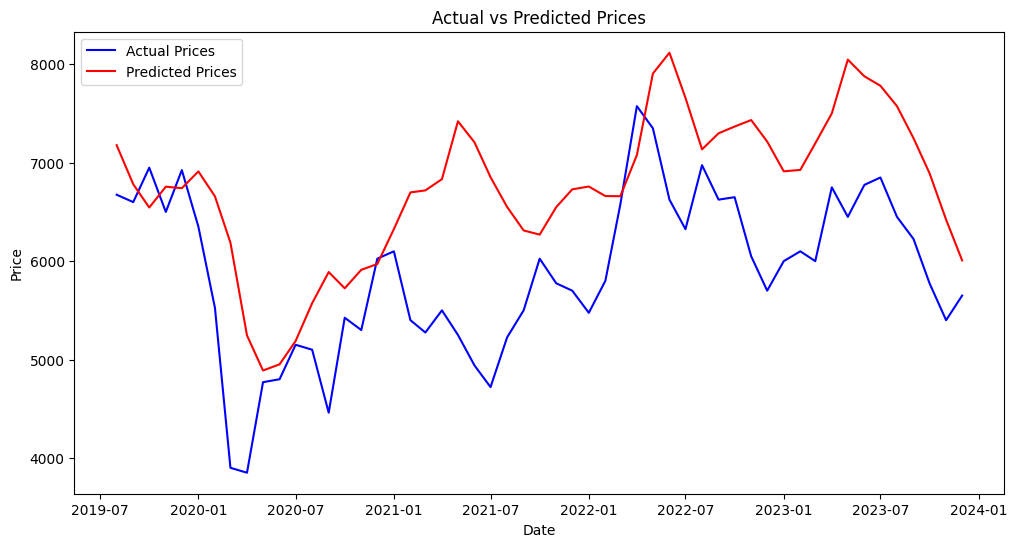

          Date Actual Price Predicted Price
0   01/08/2019      6675.00         7177.91
1   01/09/2019      6600.00         6781.72
2   01/10/2019      6950.00         6544.85
3   01/11/2019      6500.00         6756.73
4   01/12/2019      6925.00         6741.28
5   01/01/2020      6350.00         6911.93
6   01/02/2020      5525.00         6658.32
7   01/03/2020      3900.00         6187.82
8   01/04/2020      3850.00         5245.14
9   01/05/2020      4770.00         4888.85
10  01/06/2020      4800.00         4951.34
11  01/07/2020      5150.00         5188.25
12  01/08/2020      5100.00         5572.82
13  01/09/2020      4460.00         5889.26
14  01/10/2020      5425.00         5724.13
15  01/11/2020      5300.00         5911.98
16  01/12/2020      6025.00         5970.99
17  01/01/2021      6100.00         6325.35
18  01/02/2021      5400.00         6698.39
19  01/03/2021      5275.00         6718.91
20  01/04/2021      5500.00         6833.06
21  01/05/2021      5250.00     

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_dataset(dataset, debt_to_equity, financial_leverage, net_margin, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = np.column_stack((dataset[i:(i + look_back), 0],
                             debt_to_equity[i:(i + look_back)],
                             financial_leverage[i:(i + look_back)],
                             net_margin[i:(i + look_back)]))
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, debt_to_equity, financial_leverage, net_margin, train_size=0.65, scale=True):
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]
    train_debt_to_equity, test_debt_to_equity = debt_to_equity[:split_point], debt_to_equity[split_point:]
    train_financial_leverage, test_financial_leverage = financial_leverage[:split_point], financial_leverage[split_point:]
    train_net_margin, test_net_margin = net_margin[:split_point], net_margin[split_point:]

    scaler = MinMaxScaler(feature_range=(0, 1))

    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    feature_scalers = []
    features = [train_debt_to_equity, train_financial_leverage, train_net_margin]

    for feature in features:
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        feature_scaler.fit(np.array(feature).reshape(-1, 1))
        feature_scalers.append(feature_scaler)

    def scale_features(features, feature_scalers):
        scaled_features = []
        for feature, scaler in zip(features, feature_scalers):
            scaled_features.append(scaler.transform(np.array(feature).reshape(-1, 1)).flatten())
        return scaled_features

    train_features_scaled = scale_features(features, feature_scalers)
    test_features_scaled = scale_features([test_debt_to_equity, test_financial_leverage, test_net_margin], feature_scalers)

    return (train_prices_scaled, test_prices_scaled) + tuple(train_features_scaled) + tuple(test_features_scaled), scaler


def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, 12)))  # Adjust input_shape to 13 features
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train(df, debt_to_equity, financial_leverage, net_margin, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    split_data, scaler = train_test_split(prices, debt_to_equity, financial_leverage, net_margin)

    train_prices_scaled, test_prices_scaled, *features_scaled = split_data

    # Pass only 13 features to create_dataset
    X_train, Y_train = create_dataset(train_prices_scaled, *features_scaled[:3], look_back)
    X_test, Y_test = create_dataset(test_prices_scaled, *features_scaled[3:], look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    test_dates = df.index[-len(test_prices_scaled):]
    actual_prices = scaler.inverse_transform(test_prices_scaled)

    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    actual_prices_formatted = [f'{price[0]:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price[0]:.2f}' for price in predicted_prices]

    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

# Assuming df_1_close is your DataFrame with the closing prices

de_data = {
    'Debt_to_Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47]
}
fl_data = {
    'Financial_Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24]
}
nm_data = {
    'Net_Margin': [0.0871, 0.0871, 0.0871, 0.102, 0.102, 0.102, 0.1105, 0.1105, 0.1105, 0.1053, 0.1053, 0.1053, 0.1015, 0.1015, 0.1015, 0.1062, 0.1062, 0.1062, 0.1185, 0.1185, 0.1185, 0.1145, 0.1145, 0.1145, 0.131, 0.131, 0.131, 0.1334, 0.1334, 0.1334, 0.1349, 0.1349, 0.1349, 0.1198, 0.1198, 0.1198, 0.1179, 0.1179, 0.1179, 0.1191, 0.1191, 0.1191, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.106, 0.106, 0.106, 0.1089, 0.1089, 0.1089, 0.1105, 0.1105, 0.1105, 0.1328, 0.1328, 0.1328, 0.1146, 0.1146, 0.1146, 0.1182, 0.1182, 0.1182, 0.1151, 0.1151, 0.1151, 0.0911, 0.0911, 0.0911, 0.1064, 0.1064, 0.1064, 0.1046, 0.1046, 0.1046, 0.1063, 0.1063, 0.1063, 0.0218, 0.0218, 0.0218, 0.0869, 0.0869, 0.0869, 0.1008, 0.1008, 0.1008, 0.1116, 0.1116, 0.1116, 0.1039, 0.1039, 0.1039, 0.1245, 0.1245, 0.1245, 0.1069, 0.1069, 0.1069, 0.116, 0.116, 0.116, 0.1027, 0.1027, 0.1027, 0.1135, 0.1135, 0.1135, 0.1209, 0.1209, 0.1209, 0.1335, 0.1335, 0.1335, 0.091, 0.091, 0.091, 0.1118, 0.1118, 0.1118, 0.0996, 0.0996, 0.0996, 0.1204, 0.1204, 0.1204, 0.1163, 0.1163, 0.1163, 0.1053, 0.1053, 0.1053, 0.2081, 0.2081, 0.2081, 0.0763, 0.0763, 0.0763, 0.0523, 0.0523, 0.0523, 0.0901, 0.0901, 0.0901, 0.1165, 0.1165, 0.1165, 0.1312, 0.1312, 0.1312, 0.0994, 0.0994, 0.0994, 0.129, 0.129, 0.129, 0.2039, 0.2039, 0.2039, 0.1042, 0.1042, 0.1042, 0.1051, 0.1051, 0.1051, 0.1397, 0.1397, 0.1397, 0.1491, 0.1491, 0.1491, 0.1292, 0.1292, 0.1292, 0.1444, 0.1444, 0.1444]
}

df_1_close = preprocessing(df_1)

train(df_1_close, de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], nm_data['Net_Margin'])

###2nd

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
!pip install tabulate
from tabulate import tabulate

def create_dataset(dataset, debt_to_equity=None, itr=None, net_margin=None, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = [dataset[i:(i + look_back), 0]] # Start with the price data
        if debt_to_equity is not None:
            a.append(debt_to_equity[i:(i + look_back)])
        if itr is not None:
            a.append(itr[i:(i + look_back)])
        if net_margin is not None:
            a.append(net_margin[i:(i + look_back)])

        a = np.column_stack(a) # Stack only if there are additional features
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, debt_to_equity, itr, net_margin, train_size=0.65, scale=True):
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]
    train_debt_to_equity, test_debt_to_equity = debt_to_equity[:split_point], debt_to_equity[split_point:]
    train_itr, test_itr = itr[:split_point], itr[split_point:]
    train_net_margin, test_net_margin = net_margin[:split_point], net_margin[split_point:]

    scaler = MinMaxScaler(feature_range=(0, 1))

    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    feature_scalers = []
    features = [train_debt_to_equity, train_itr, train_net_margin]

    for feature in features:
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        feature_scaler.fit(np.array(feature).reshape(-1, 1))
        feature_scalers.append(feature_scaler)

    def scale_features(features, feature_scalers):
        scaled_features = []
        for feature, scaler in zip(features, feature_scalers):
            scaled_features.append(scaler.transform(np.array(feature).reshape(-1, 1)).flatten())
        return scaled_features

    train_features_scaled = scale_features(features, feature_scalers)
    test_features_scaled = scale_features([test_debt_to_equity, test_itr, test_net_margin], feature_scalers)

    return (train_prices_scaled, test_prices_scaled) + tuple(train_features_scaled) + tuple(test_features_scaled), scaler

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train1(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # No need for dummy features, handle missing features in create_dataset
    split_data, scaler = train_test_split(prices, prices, prices, prices) # Pass prices for all to maintain shape for splitting
    train_prices, test_prices = split_data[:2]

    X_train, Y_train = create_dataset(train_prices, look_back=look_back) # No need to pass empty lists
    X_test, Y_test = create_dataset(test_prices, look_back=look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 1): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 1): {testScore:.2f} RMSE')

    return trainScore, testScore

def train2(df, debt_to_equity, itr, net_margin, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    split_data, scaler = train_test_split(prices, debt_to_equity, itr, net_margin)

    train_prices_scaled, test_prices_scaled, *features_scaled = split_data

    X_train, Y_train = create_dataset(train_prices_scaled, *features_scaled[:3], look_back)
    X_test, Y_test = create_dataset(test_prices_scaled, *features_scaled[3:], look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 2): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 2): {testScore:.2f} RMSE')

    return trainScore, testScore

de_data = {
    'Debt_to_Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47]
}
itr_data = {
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55]
}
nm_data = {
    'Net_Margin': [0.0871, 0.0871, 0.0871, 0.102, 0.102, 0.102, 0.1105, 0.1105, 0.1105, 0.1053, 0.1053, 0.1053, 0.1015, 0.1015, 0.1015, 0.1062, 0.1062, 0.1062, 0.1185, 0.1185, 0.1185, 0.1145, 0.1145, 0.1145, 0.131, 0.131, 0.131, 0.1334, 0.1334, 0.1334, 0.1349, 0.1349, 0.1349, 0.1198, 0.1198, 0.1198, 0.1179, 0.1179, 0.1179, 0.1191, 0.1191, 0.1191, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.106, 0.106, 0.106, 0.1089, 0.1089, 0.1089, 0.1105, 0.1105, 0.1105, 0.1328, 0.1328, 0.1328, 0.1146, 0.1146, 0.1146, 0.1182, 0.1182, 0.1182, 0.1151, 0.1151, 0.1151, 0.0911, 0.0911, 0.0911, 0.1064, 0.1064, 0.1064, 0.1046, 0.1046, 0.1046, 0.1063, 0.1063, 0.1063, 0.0218, 0.0218, 0.0218, 0.0869, 0.0869, 0.0869, 0.1008, 0.1008, 0.1008, 0.1116, 0.1116, 0.1116, 0.1039, 0.1039, 0.1039, 0.1245, 0.1245, 0.1245, 0.1069, 0.1069, 0.1069, 0.116, 0.116, 0.116, 0.1027, 0.1027, 0.1027, 0.1135, 0.1135, 0.1135, 0.1209, 0.1209, 0.1209, 0.1335, 0.1335, 0.1335, 0.091, 0.091, 0.091, 0.1118, 0.1118, 0.1118, 0.0996, 0.0996, 0.0996, 0.1204, 0.1204, 0.1204, 0.1163, 0.1163, 0.1163, 0.1053, 0.1053, 0.1053, 0.2081, 0.2081, 0.2081, 0.0763, 0.0763, 0.0763, 0.0523, 0.0523, 0.0523, 0.0901, 0.0901, 0.0901, 0.1165, 0.1165, 0.1165, 0.1312, 0.1312, 0.1312, 0.0994, 0.0994, 0.0994, 0.129, 0.129, 0.129, 0.2039, 0.2039, 0.2039, 0.1042, 0.1042, 0.1042, 0.1051, 0.1051, 0.1051, 0.1397, 0.1397, 0.1397, 0.1491, 0.1491, 0.1491, 0.1292, 0.1292, 0.1292, 0.1444, 0.1444, 0.1444]
}

df_1_close = preprocessing(df_1)

# Assuming df_1_close is defined and prepared
train1_rmse = train1(df_1_close)
train2_rmse = train2(df_1_close, de_data['Debt_to_Equity'], itr_data['ITR'], nm_data['Net_Margin'])

# RMSE scores
rmse_data = [
    ["Model 1", train1_rmse[0], train1_rmse[1]],
    ["Model 2", train2_rmse[0], train2_rmse[1]]
]

# Table headers
headers = ["Model", "Train RMSE", "Test RMSE"]

# Print table
print("RMSE Comparison:")
print(tabulate(rmse_data, headers=headers, floatfmt=".2f"))

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 243ms/step - loss: 0.2138
Epoch 2/150
7/7 - 0s - 18ms/step - loss: 0.0292
Epoch 3/150
7/7 - 0s - 8ms/step - loss: 0.0226
Epoch 4/150
7/7 - 0s - 9ms/step - loss: 0.0128
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0088
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0076
Epoch 7/150
7/7 - 0s - 8ms/step - loss: 0.0078
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0073
Epoch 9/150
7/7 - 0s - 7ms/step - loss: 0.0071
Epoch 10/150
7/7 - 0s - 9ms/step - loss: 0.0067
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0069
Epoch 12/150
7/7 - 0s - 9ms/step - loss: 0.0067
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0073
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0072
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0071
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0067
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0067
Epoch 19/150
7/7 - 0s - 19ms/step - loss: 0.0066
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0068
Epoch 21/150
7/7 - 0s - 7ms/step - loss: 0.0066
Epoch 22/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 240ms/step - loss: 0.1930
Epoch 2/150
7/7 - 0s - 18ms/step - loss: 0.0354
Epoch 3/150
7/7 - 0s - 8ms/step - loss: 0.0248
Epoch 4/150
7/7 - 0s - 21ms/step - loss: 0.0190
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0125
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0104
Epoch 7/150
7/7 - 0s - 8ms/step - loss: 0.0089
Epoch 8/150
7/7 - 0s - 9ms/step - loss: 0.0087
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0074
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0072
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0074
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0072
Epoch 13/150
7/7 - 0s - 10ms/step - loss: 0.0073
Epoch 14/150
7/7 - 0s - 10ms/step - loss: 0.0079
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0069
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0065
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0065
Epoch 19/150
7/7 - 0s - 20ms/step - loss: 0.0065
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0065
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 

##The Second PCA

Number of components for 90% variance: 7


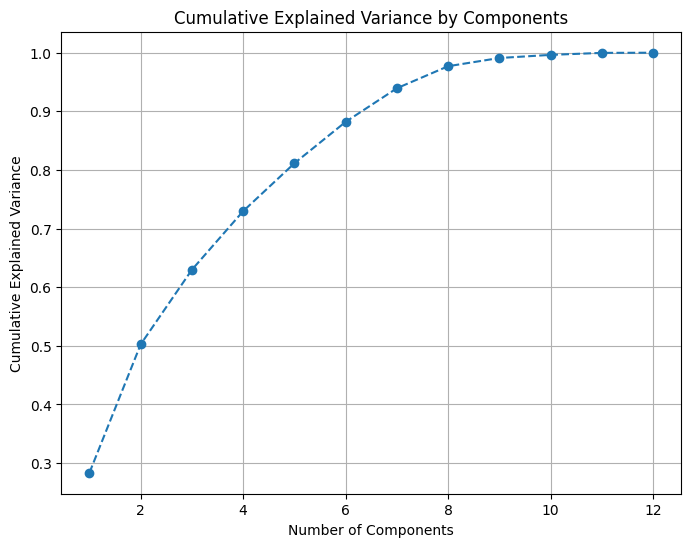

Principal Component Loadings:
                         PC1       PC2       PC3       PC4       PC5  \
ROE                 0.916712  0.264117 -0.203419  0.086203 -0.151397   
ROA                 0.881524  0.370139 -0.139156  0.063725 -0.198459   
Debt to Equity      0.418195 -0.629007 -0.539560  0.097004  0.052231   
Financial Leverage  0.249922  0.062341 -0.524587  0.050512  0.724171   
Current Ratio      -0.444084  0.782797 -0.224918 -0.107793  0.202291   
Quick Ratio        -0.559278  0.740050 -0.178152 -0.117844  0.124801   
Net Margin          0.210605  0.344776  0.304718  0.788209  0.118844   
Income Margin       0.530919  0.673666 -0.128773 -0.325451 -0.293697   
ORGR               -0.274506  0.330114 -0.492018  0.492430 -0.230824   
NIGR               -0.488923  0.112114 -0.232934 -0.142511 -0.269789   
ITR                 0.510502 -0.023390 -0.063112 -0.404329  0.190269   
RTR                 0.393272  0.426382  0.645449 -0.059677  0.277253   

                         PC6     

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data preparation
roe_data = {
    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410]
}

roa_data = {
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183]
}

de_data = {
    'Debt_to_Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47]
}

fl_data = {
    'Financial_Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24]
}

cr_data = {
    'Current_Ratio': [1.39, 1.39, 1.39, 1.29, 1.29, 1.29, 1.4, 1.4, 1.4, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.21, 1.21, 1.21, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.36, 1.36, 1.36, 1.42, 1.42, 1.42, 1.32, 1.32, 1.32, 1.36, 1.36, 1.36, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.36, 1.36, 1.36, 1.4, 1.4, 1.4, 1.35, 1.35, 1.35, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.24, 1.24, 1.24, 1.25, 1.25, 1.25, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.32, 1.32, 1.32, 1.41, 1.41, 1.41, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.38, 1.38, 1.38, 1.37, 1.37, 1.37, 1.34, 1.34, 1.34, 1.36, 1.36, 1.36, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.13, 1.13, 1.13, 1.1, 1.1, 1.1, 1.23, 1.23, 1.23, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.23, 1.23, 1.23, 1.15, 1.15, 1.15, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.26, 1.26, 1.26, 1.29, 1.29, 1.29, 1.37, 1.37, 1.37, 1.49, 1.49, 1.49, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.47, 1.47, 1.47, 1.51, 1.51, 1.51, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54, 1.46, 1.46, 1.46, 1.51, 1.51, 1.51, 1.53, 1.53, 1.53, 1.31, 1.31, 1.31, 1.18, 1.18, 1.18, 1.33, 1.33, 1.33]
}

qr_data = {
    'Quick_Ratio': [1.1, 1.1, 1.1, 1.04, 1.04, 1.04, 1.14, 1.14, 1.14, 1.1, 1.1, 1.1, 1.15, 1.15, 1.15, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.97, 0.97, 0.97, 1.12, 1.12, 1.12, 1.21, 1.21, 1.21, 1.11, 1.11, 1.11, 1.12, 1.12, 1.12, 1.23, 1.23, 1.23, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.02, 1.02, 1.02, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.09, 1.09, 1.09, 1.17, 1.17, 1.17, 1.12, 1.12, 1.12, 1.08, 1.08, 1.08, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.16, 1.16, 1.16, 1.04, 1.04, 1.04, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 1.15, 1.15, 1.15, 1.09, 1.09, 1.09, 1.02, 1.02, 1.02, 0.92, 0.92, 0.92, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.02, 1.02, 1.02, 1.05, 1.05, 1.05, 1.09, 1.09, 1.09, 1.24, 1.24, 1.24, 1.31, 1.31, 1.31, 1.33, 1.33, 1.33, 1.3, 1.3, 1.3, 1.33, 1.33, 1.33, 1.36, 1.36, 1.36, 1.33, 1.33, 1.33, 1.37, 1.37, 1.37, 1.32, 1.32, 1.32, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.07, 1.07, 1.07, 0.94, 0.94, 0.94, 1.02, 1.02, 1.02]
}

itr_data = {
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55]
}

rtr_data = {
    'RTR': [12.17, 12.17, 12.17, 14.05, 14.05, 14.05, 13.96, 13.96, 13.96, 11.68, 11.68, 11.68, 10.94, 10.94, 10.94, 10.61, 10.61, 10.61, 11.36, 11.36, 11.36, 12.29, 12.29, 12.29, 11.22, 11.22, 11.22, 10.9, 10.9, 10.9, 11.26, 11.26, 11.26, 10.51, 10.51, 10.51, 10.05, 10.05, 10.05, 10.76, 10.76, 10.76, 11.12, 11.12, 11.12, 10.3, 10.3, 10.3, 8.25, 8.25, 8.25, 8.49, 8.49, 8.49, 9.6, 9.6, 9.6, 11.81, 11.81, 11.81, 10.13, 10.13, 10.13, 9.76, 9.76, 9.76, 9.66, 9.66, 9.66, 10.77, 10.77, 10.77, 8.23, 8.23, 8.23, 9.31, 9.31, 9.31, 10.11, 10.11, 10.11, 9.71, 9.71, 9.71, 8.07, 8.07, 8.07, 8.82, 8.82, 8.82, 9.74, 9.74, 9.74, 11.83, 11.83, 11.83, 8.64, 8.64, 8.64, 8.56, 8.56, 8.56, 10.69, 10.69, 10.69, 9.78, 9.78, 9.78, 10.76, 10.76, 10.76, 11.39, 11.39, 11.39, 12.41, 12.41, 12.41, 10.36, 10.36, 10.36, 11.6, 11.6, 11.6, 10.34, 10.34, 10.34, 11.18, 11.18, 11.18, 11.01, 11.01, 11.01, 10.61, 10.61, 10.61, 5.81, 5.81, 5.81, 7.14, 7.14, 7.14, 4.84, 4.84, 4.84, 8.75, 8.75, 8.75, 11.49, 11.49, 11.49, 12.26, 12.26, 12.26, 10.97, 10.97, 10.97, 12.72, 12.72, 12.72, 15.84, 15.84, 15.84, 13.27, 13.27, 13.27, 14.22, 14.22, 14.22, 13.0, 13.0, 13.0, 15.04, 15.04, 15.04, 12.37, 12.37, 12.37, 15.64, 15.64, 15.64]
}

nm_data = {
    'Net_Margin': [0.0871, 0.0871, 0.0871, 0.102, 0.102, 0.102, 0.1105, 0.1105, 0.1105, 0.1053, 0.1053, 0.1053, 0.1015, 0.1015, 0.1015, 0.1062, 0.1062, 0.1062, 0.1185, 0.1185, 0.1185, 0.1145, 0.1145, 0.1145, 0.131, 0.131, 0.131, 0.1334, 0.1334, 0.1334, 0.1349, 0.1349, 0.1349, 0.1198, 0.1198, 0.1198, 0.1179, 0.1179, 0.1179, 0.1191, 0.1191, 0.1191, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.106, 0.106, 0.106, 0.1089, 0.1089, 0.1089, 0.1105, 0.1105, 0.1105, 0.1328, 0.1328, 0.1328, 0.1146, 0.1146, 0.1146, 0.1182, 0.1182, 0.1182, 0.1151, 0.1151, 0.1151, 0.0911, 0.0911, 0.0911, 0.1064, 0.1064, 0.1064, 0.1046, 0.1046, 0.1046, 0.1063, 0.1063, 0.1063, 0.0218, 0.0218, 0.0218, 0.0869, 0.0869, 0.0869, 0.1008, 0.1008, 0.1008, 0.1116, 0.1116, 0.1116, 0.1039, 0.1039, 0.1039, 0.1245, 0.1245, 0.1245, 0.1069, 0.1069, 0.1069, 0.116, 0.116, 0.116, 0.1027, 0.1027, 0.1027, 0.1135, 0.1135, 0.1135, 0.1209, 0.1209, 0.1209, 0.1335, 0.1335, 0.1335, 0.091, 0.091, 0.091, 0.1118, 0.1118, 0.1118, 0.0996, 0.0996, 0.0996, 0.1204, 0.1204, 0.1204, 0.1163, 0.1163, 0.1163, 0.1053, 0.1053, 0.1053, 0.2081, 0.2081, 0.2081, 0.0763, 0.0763, 0.0763, 0.0523, 0.0523, 0.0523, 0.0901, 0.0901, 0.0901, 0.1165, 0.1165, 0.1165, 0.1312, 0.1312, 0.1312, 0.0994, 0.0994, 0.0994, 0.129, 0.129, 0.129, 0.2039, 0.2039, 0.2039, 0.1042, 0.1042, 0.1042, 0.1051, 0.1051, 0.1051, 0.1397, 0.1397, 0.1397, 0.1491, 0.1491, 0.1491, 0.1292, 0.1292, 0.1292, 0.1444, 0.1444, 0.1444]
}

im_data = {
    'Income_Margin': [0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0353, 0.0353, 0.0353, 0.0369, 0.0369, 0.0369, 0.0363, 0.0363, 0.0363, 0.0348, 0.0348, 0.0348, 0.0343, 0.0343, 0.0343, 0.037, 0.037, 0.037, 0.0365, 0.0365, 0.0365, 0.0305, 0.0305, 0.0305, 0.0313, 0.0313, 0.0313, 0.0294, 0.0294, 0.0294, 0.0303, 0.0303, 0.0303, 0.0293, 0.0293, 0.0293, 0.026, 0.026, 0.026, 0.0257, 0.0257, 0.0257, 0.0274, 0.0274, 0.0274, 0.0264, 0.0264, 0.0264, 0.0249, 0.0249, 0.0249, 0.0263, 0.0263, 0.0263, 0.0248, 0.0248, 0.0248, 0.0239, 0.0239, 0.0239, 0.0213, 0.0213, 0.0213, 0.023, 0.023, 0.023, 0.0221, 0.0221, 0.0221, 0.0242, 0.0242, 0.0242, 0.0224, 0.0224, 0.0224, 0.0236, 0.0236, 0.0236, 0.0233, 0.0233, 0.0233, 0.0249, 0.0249, 0.0249, 0.0231, 0.0231, 0.0231, 0.0255, 0.0255, 0.0255, 0.0243, 0.0243, 0.0243, 0.0227, 0.0227, 0.0227, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0214, 0.0214, 0.0214, 0.02, 0.02, 0.02, 0.0204, 0.0204, 0.0204, 0.0205, 0.0205, 0.0205, 0.0192, 0.0192, 0.0192, 0.018, 0.018, 0.018, 0.0189, 0.0189, 0.0189, 0.0194, 0.0194, 0.0194, 0.0211, 0.0211, 0.0211, 0.018, 0.018, 0.018, 0.0232, 0.0232, 0.0232, 0.0262, 0.0262, 0.0262, 0.029, 0.029, 0.029, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0304, 0.0304, 0.0304, 0.0305, 0.0305, 0.0305, 0.0273, 0.0273, 0.0273, 0.0277, 0.0277, 0.0277, 0.0275, 0.0275, 0.0275, 0.0287, 0.0287, 0.0287, 0.0266, 0.0266, 0.0266, 0.0252, 0.0252, 0.0252, 0.0257, 0.0257, 0.0257]
}

or_data = {
    'ORGR': [0.0756, 0.0756, 0.0756, 0.0783, 0.0783, 0.0783, 0.1146, 0.1146, 0.1146, 0.077, 0.077, 0.077, 0.0649, 0.0649, 0.0649, 0.0863, 0.0863, 0.0863, 0.0262, 0.0262, 0.0262, 0.0563, 0.0563, 0.0563, 0.1069, 0.1069, 0.1069, 0.029, 0.029, 0.029, 0.1516, 0.1516, 0.1516, 0.0054, 0.0054, 0.0054, 0.0771, 0.0771, 0.0771, 0.0693, 0.0693, 0.0693, 0.0474, 0.0474, 0.0474, 0.0488, 0.0488, 0.0488, 0.0393, 0.0393, 0.0393, 0.0198, 0.0198, 0.0198, 0.0008, 0.0008, 0.0008, 0.0942, 0.0942, 0.0942, 0.0426, 0.0426, 0.0426, 0.0379, 0.0379, 0.0379, 0.0513, 0.0513, 0.0513, 0.0421, 0.0421, 0.0421, 0.116, 0.116, 0.116, 0.0472, 0.0472, 0.0472, 0.0348, 0.0348, 0.0348, 0.0076, 0.0076, 0.0076, 0.0898, 0.0898, 0.0898, 0.1059, 0.1059, 0.1059, 0.0483, 0.0483, 0.0483, 0.1067, 0.1067, 0.1067, 0.0002, 0.0002, 0.0002, 0.0097, 0.0097, 0.0097, 0.0598, 0.0598, 0.0598, 0.0697, 0.0697, 0.0697, 0.0002, 0.0002, 0.0002, 0.0161, 0.0161, 0.0161, 0.0986, 0.0986, 0.0986, 0.032, 0.032, 0.032, 0.0733, 0.0733, 0.0733, 0.0509, 0.0509, 0.0509, 0.0758, 0.0758, 0.0758, 0.0122, 0.0122, 0.0122, 0.1018, 0.1018, 0.1018, 0.3372, 0.3372, 0.3372, 0.133, 0.133, 0.133, 0.1022, 0.1022, 0.1022, 0.1567, 0.1567, 0.1567, 0.0773, 0.0773, 0.0773, 0.0774, 0.0774, 0.0774, 0.1012, 0.1012, 0.1012, 0.0876, 0.0876, 0.0876, 0.0007, 0.0007, 0.0007, 0.0813, 0.0813, 0.0813, 0.0304, 0.0304, 0.0304, 0.0369, 0.0369, 0.0369, 0.043, 0.043, 0.043, 0.0112, 0.0112, 0.0112, 0.0365, 0.0365, 0.0365]
}

ni_data = {
    'NIGR': [0.0302, 0.0302, 0.0302, 0.2629, 0.2629, 0.2629, 0.2082, 0.2082, 0.2082, 0.0262, 0.0262, 0.0262, 0.0266, 0.0266, 0.0266, 0.1364, 0.1364, 0.1364, 0.1454, 0.1454, 0.1454, 0.0206, 0.0206, 0.0206, 0.2662, 0.2662, 0.2662, 0.011, 0.011, 0.011, 0.1643, 0.1643, 0.1643, 0.117, 0.117, 0.117, 0.0599, 0.0599, 0.0599, 0.0807, 0.0807, 0.0807, 0.0129, 0.0129, 0.0129, 0.0489, 0.0489, 0.0489, 0.1079, 0.1079, 0.1079, 0.0479, 0.0479, 0.0479, 0.0143, 0.0143, 0.0143, 0.3146, 0.3146, 0.3146, 0.1738, 0.1738, 0.1738, 0.0702, 0.0702, 0.0702, 0.0759, 0.0759, 0.0759, 0.182, 0.182, 0.182, 0.0324, 0.0324, 0.0324, 0.0295, 0.0295, 0.0295, 0.0196, 0.0196, 0.0196, 0.7935, 0.7935, 0.7935, 2.63, 2.63, 2.63, 0.2836, 0.2836, 0.2836, 0.0535, 0.0535, 0.0535, 0.0305, 0.0305, 0.0305, 0.1974, 0.1974, 0.1974, 0.1332, 0.1332, 0.1332, 0.1501, 0.1501, 0.1501, 0.0529, 0.0529, 0.0529, 0.1048, 0.1048, 0.1048, 0.083, 0.083, 0.083, 0.2133, 0.2133, 0.2133, 0.2965, 0.2965, 0.2965, 0.1383, 0.1383, 0.1383, 0.1544, 0.1544, 0.1544, 0.3, 0.3, 0.3, 0.0456, 0.0456, 0.0456, 0.1868, 0.1868, 0.1868, 0.31, 0.31, 0.31, 0.5844, 0.5844, 0.5844, 0.2448, 0.2448, 0.2448, 0.9919, 0.9919, 0.9919, 0.3927, 0.3927, 0.3927, 0.2141, 0.2141, 0.2141, 0.166, 0.166, 0.166, 0.4117, 0.4117, 0.4117, 0.5795, 0.5795, 0.5795, 0.4473, 0.4473, 0.4473, 0.0387, 0.0387, 0.0387, 0.3786, 0.3786, 0.3786, 0.0215, 0.0215, 0.0215, 0.1432, 0.1432, 0.1432, 0.0771, 0.0771, 0.0771]
}

# Combine all datasets into a single DataFrame
data = pd.DataFrame({
    'ROE': roe_data['ROE'],
    'ROA': roa_data['ROA'],
    'Debt to Equity': de_data['Debt_to_Equity'],
    'Financial Leverage': fl_data['Financial_Leverage'],
    'Current Ratio': cr_data['Current_Ratio'],
    'Quick Ratio': qr_data['Quick_Ratio'],
    'Net Margin': nm_data['Net_Margin'],
    'Income Margin': im_data['Income_Margin'],
    'ORGR': or_data['ORGR'],
    'NIGR': ni_data['NIGR'],
    'ITR': itr_data['ITR'],
    'RTR': rtr_data['RTR']
})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Determine number of components for 90% variance
n_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1

print(f"Number of components for 90% variance: {n_components}")

# Fit PCA with the determined number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Convert PCA results to DataFrame (if needed)
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i}' for i in range(1, n_components+1)])

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Optional: If you want to see the loadings (coefficients) of each original feature on the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i}' for i in range(1, n_components+1)], index=data.columns)

print("Principal Component Loadings:")
print(loadings_df)

#Tugas Tambahan 3

##Comparison RMSE between LSTM and 2 Data Fundamental ("ROA" & "Income Margin")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate

def create_dataset(dataset, roa=None, income_margin=None, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = [dataset[i:(i + look_back), 0]]  # Start with the price data
        if roa is not None:
            a.append(roa[i:(i + look_back)])
        if income_margin is not None:
            a.append(income_margin[i:(i + look_back)])
        a = np.column_stack(a)  # Stack only if there are additional features
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, roa, income_margin, train_size=0.65, scale=True):
    prices = np.array(prices).reshape(-1, 1)  # Ensure prices is a 2D NumPy array
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]
    train_roa, test_roa = roa[:split_point], roa[split_point:]
    train_income_margin, test_income_margin = income_margin[:split_point], income_margin[split_point:]

    scaler = MinMaxScaler(feature_range=(0, 1))

    train_prices_scaled = scaler.fit_transform(train_prices)
    test_prices_scaled = scaler.transform(test_prices)

    feature_scalers = []
    features = [train_roa, train_income_margin]

    for feature in features:
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        feature_scaler.fit(np.array(feature).reshape(-1, 1))
        feature_scalers.append(feature_scaler)

    def scale_features(features, feature_scalers):
        scaled_features = []
        for feature, scaler in zip(features, feature_scalers):
            scaled_features.append(scaler.transform(np.array(feature).reshape(-1, 1)).flatten())
        return scaled_features

    train_features_scaled = scale_features(features, feature_scalers)
    test_features_scaled = scale_features([test_roa, test_income_margin], feature_scalers)

    return (train_prices_scaled, test_prices_scaled) + tuple(train_features_scaled) + tuple(test_features_scaled), scaler

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore

def train1(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Pass prices for all to maintain shape for splitting
    split_data, scaler = train_test_split(prices, prices, prices)
    train_prices, test_prices = split_data[:2]

    X_train, Y_train = create_dataset(train_prices, look_back=look_back)
    X_test, Y_test = create_dataset(test_prices, look_back=look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 1): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 1): {testScore:.2f} RMSE')

    return trainScore, testScore

def train2(df, roa, income_margin, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    split_data, scaler = train_test_split(prices, roa, income_margin)

    train_prices_scaled, test_prices_scaled, *features_scaled = split_data

    X_train, Y_train = create_dataset(train_prices_scaled, *features_scaled[:2], look_back)
    X_test, Y_test = create_dataset(test_prices_scaled, *features_scaled[2:], look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 2): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 2): {testScore:.2f} RMSE')

    return trainScore, testScore

df_1_close = preprocessing(df_1)

# Assuming df_1_close is defined and prepared
train1_rmse = train1(df_1_close)
train2_rmse = train2(df_1_close, roa_data['ROA'], im_data['Income_Margin'])

# RMSE scores
rmse_data = [
    ["Model 1", train1_rmse[0], train1_rmse[1]],
    ["Model 2", train2_rmse[0], train2_rmse[1]]
]

# Table headers
headers = ["Model", "Train RMSE", "Test RMSE"]

# Print table
print("RMSE Comparison:")
print(tabulate(rmse_data, headers=headers, floatfmt=".2f"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
7/7 - 3s - 441ms/step - loss: 0.1827
Epoch 2/150
7/7 - 1s - 186ms/step - loss: 0.0356
Epoch 3/150
7/7 - 0s - 18ms/step - loss: 0.0295
Epoch 4/150
7/7 - 0s - 21ms/step - loss: 0.0150
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0081
Epoch 6/150
7/7 - 0s - 19ms/step - loss: 0.0088
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0075
Epoch 8/150
7/7 - 0s - 20ms/step - loss: 0.0072
Epoch 9/150
7/7 - 0s - 21ms/step - loss: 0.0067
Epoch 10/150
7/7 - 0s - 12ms/step - loss: 0.0070
Epoch 11/150
7/7 - 0s - 10ms/step - loss: 0.0069
Epoch 12/150
7/7 - 0s - 11ms/step - loss: 0.0068
Epoch 13/150
7/7 - 0s - 12ms/step - loss: 0.0068
Epoch 14/150
7/7 - 0s - 21ms/step - loss: 0.0067
Epoch 15/150
7/7 - 0s - 20ms/step - loss: 0.0070
Epoch 16/150
7/7 - 0s - 20ms/step - loss: 0.0068
Epoch 17/150
7/7 - 0s - 11ms/step - loss: 0.0067
Epoch 18/150
7/7 - 0s - 18ms/step - loss: 0.0067
Epoch 19/150
7/7 - 0s - 12ms/step - loss: 0.0067
Epoch 20/150
7/7 - 0s - 14ms/step - loss: 0.0068
Epoch 21/150
7/7 - 0s - 13m

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 345ms/step - loss: 0.1523
Epoch 2/150
7/7 - 0s - 11ms/step - loss: 0.0228
Epoch 3/150
7/7 - 0s - 21ms/step - loss: 0.0192
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0107
Epoch 5/150
7/7 - 0s - 12ms/step - loss: 0.0102
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0078
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0075
Epoch 8/150
7/7 - 0s - 21ms/step - loss: 0.0070
Epoch 9/150
7/7 - 0s - 21ms/step - loss: 0.0069
Epoch 10/150
7/7 - 0s - 17ms/step - loss: 0.0068
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0065
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0069
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0065
Epoch 14/150
7/7 - 0s - 9ms/step - loss: 0.0065
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0068
Epoch 16/150
7/7 - 0s - 20ms/step - loss: 0.0063
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0064
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0070
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0073
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0065
Epoch 21/150
7/7 - 0s - 10ms/step - loss: 0.0075

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 649ms/step - loss: 0.2196
Epoch 2/150
7/7 - 0s - 19ms/step - loss: 0.0349
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0283
Epoch 4/150
7/7 - 0s - 22ms/step - loss: 0.0143
Epoch 5/150
7/7 - 0s - 42ms/step - loss: 0.0088
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0089
Epoch 7/150
7/7 - 0s - 19ms/step - loss: 0.0078
Epoch 8/150
7/7 - 0s - 21ms/step - loss: 0.0070
Epoch 9/150
7/7 - 0s - 43ms/step - loss: 0.0069
Epoch 10/150
7/7 - 0s - 21ms/step - loss: 0.0073
Epoch 11/150
7/7 - 0s - 19ms/step - loss: 0.0070
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0069
Epoch 13/150
7/7 - 0s - 23ms/step - loss: 0.0067
Epoch 14/150
7/7 - 0s - 23ms/step - loss: 0.0069
Epoch 15/150
7/7 - 0s - 24ms/step - loss: 0.0067
Epoch 16/150
7/7 - 0s - 26ms/step - loss: 0.0070
Epoch 17/150
7/7 - 0s - 40ms/step - loss: 0.0066
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0071
Epoch 19/150
7/7 - 0s - 20ms/step - loss: 0.0069
Epoch 20/150
7/7 - 0s - 19ms/step - loss: 0.0066
Epoch 21/150
7/7 - 0s - 22ms/step - loss

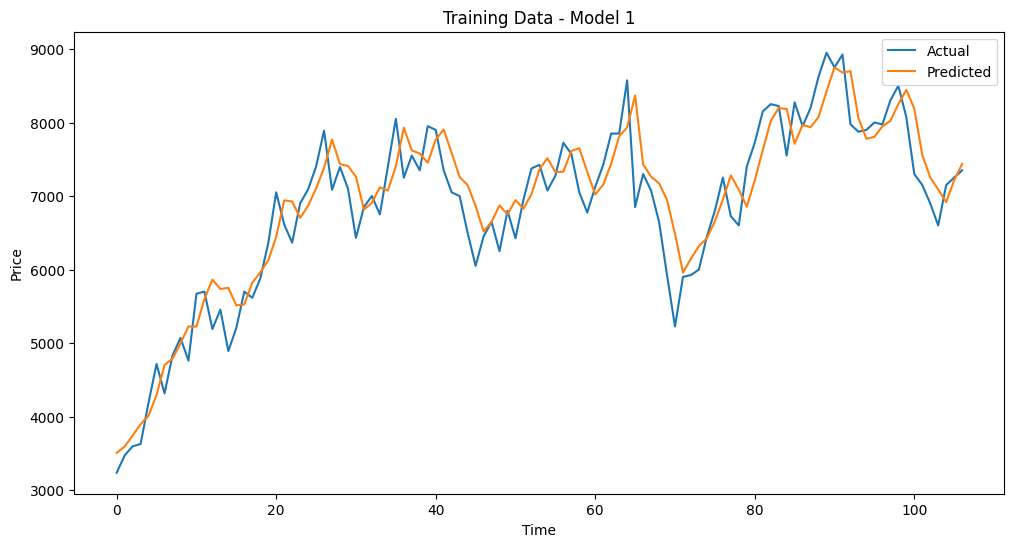

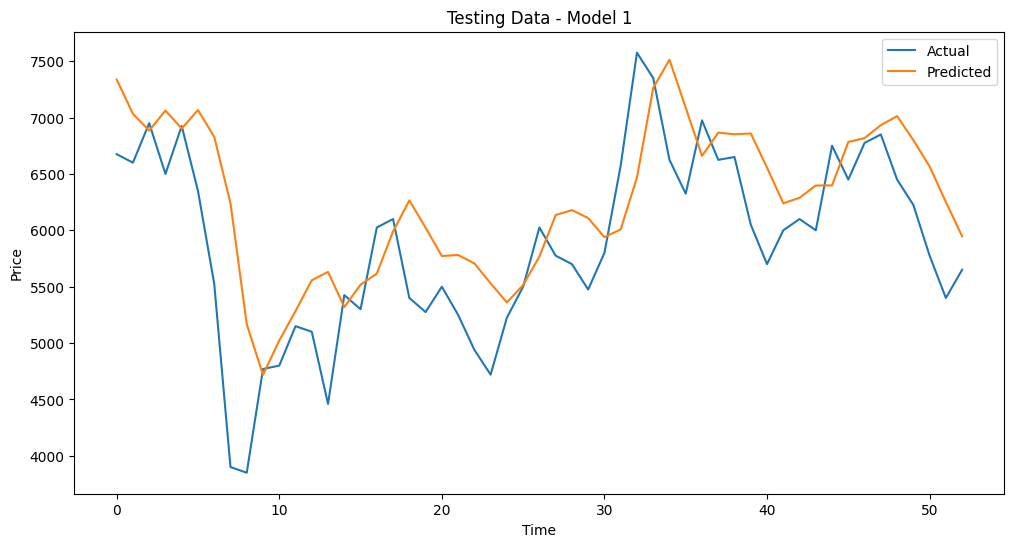

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 636ms/step - loss: 0.2041
Epoch 2/150
7/7 - 0s - 20ms/step - loss: 0.0274
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0162
Epoch 4/150
7/7 - 0s - 22ms/step - loss: 0.0133
Epoch 5/150
7/7 - 0s - 42ms/step - loss: 0.0116
Epoch 6/150
7/7 - 0s - 47ms/step - loss: 0.0086
Epoch 7/150
7/7 - 0s - 40ms/step - loss: 0.0077
Epoch 8/150
7/7 - 0s - 42ms/step - loss: 0.0071
Epoch 9/150
7/7 - 0s - 45ms/step - loss: 0.0074
Epoch 10/150
7/7 - 0s - 43ms/step - loss: 0.0070
Epoch 11/150
7/7 - 0s - 44ms/step - loss: 0.0068
Epoch 12/150
7/7 - 0s - 40ms/step - loss: 0.0069
Epoch 13/150
7/7 - 0s - 41ms/step - loss: 0.0067
Epoch 14/150
7/7 - 0s - 42ms/step - loss: 0.0064
Epoch 15/150
7/7 - 0s - 41ms/step - loss: 0.0068
Epoch 16/150
7/7 - 0s - 44ms/step - loss: 0.0065
Epoch 17/150
7/7 - 1s - 88ms/step - loss: 0.0069
Epoch 18/150
7/7 - 0s - 27ms/step - loss: 0.0068
Epoch 19/150
7/7 - 0s - 41ms/step - loss: 0.0062
Epoch 20/150
7/7 - 0s - 24ms/step - loss: 0.0061
Epoch 21/150
7/7 - 0s - 42ms/step - loss

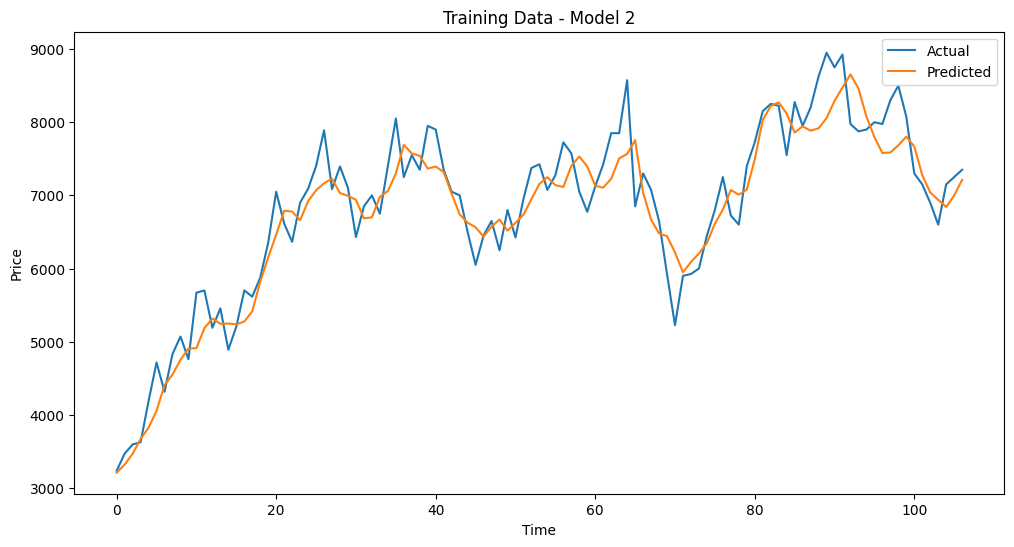

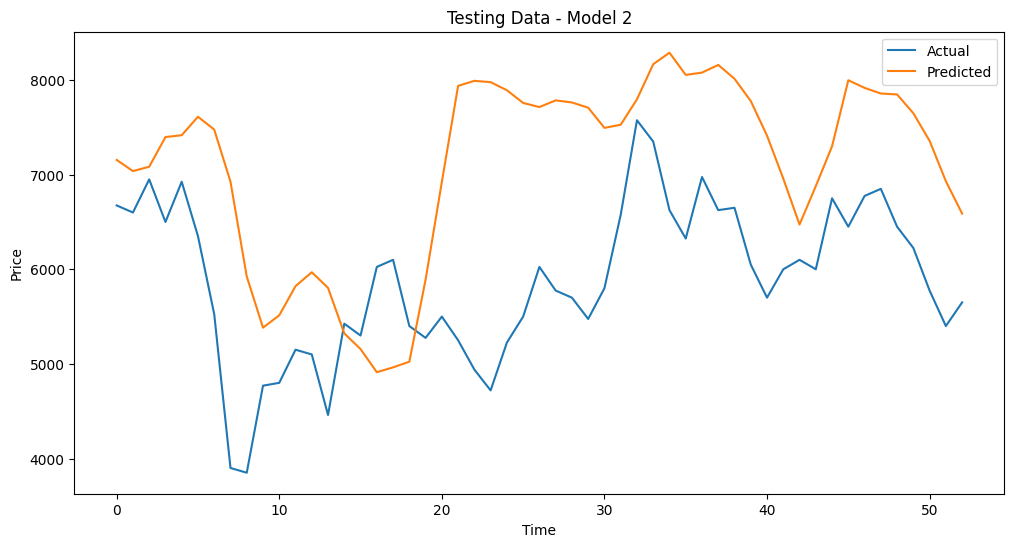

RMSE Comparison:
Model      Train RMSE    Test RMSE
-------  ------------  -----------
Model 1        446.35       660.43
Model 2        402.15      1523.46


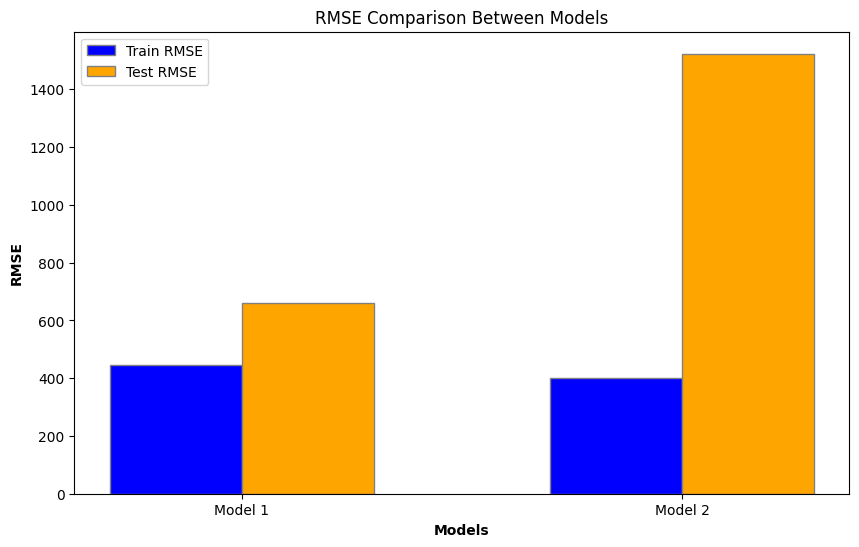

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate

def create_dataset(dataset, roa=None, income_margin=None, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = [dataset[i:(i + look_back), 0]]  # Start with the price data
        if roa is not None:
            a.append(roa[i:(i + look_back)])
        if income_margin is not None:
            a.append(income_margin[i:(i + look_back)])
        a = np.column_stack(a)  # Stack only if there are additional features
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, roa, income_margin, train_size=0.65, scale=True):
    prices = np.array(prices).reshape(-1, 1)  # Ensure prices is a 2D NumPy array
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]
    train_roa, test_roa = roa[:split_point], roa[split_point:]
    train_income_margin, test_income_margin = income_margin[:split_point], income_margin[split_point:]

    scaler = MinMaxScaler(feature_range=(0, 1))

    train_prices_scaled = scaler.fit_transform(train_prices)
    test_prices_scaled = scaler.transform(test_prices)

    feature_scalers = []
    features = [train_roa, train_income_margin]

    for feature in features:
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        feature_scaler.fit(np.array(feature).reshape(-1, 1))
        feature_scalers.append(feature_scaler)

    def scale_features(features, feature_scalers):
        scaled_features = []
        for feature, scaler in zip(features, feature_scalers):
            scaled_features.append(scaler.transform(np.array(feature).reshape(-1, 1)).flatten())
        return scaled_features

    train_features_scaled = scale_features(features, feature_scalers)
    test_features_scaled = scale_features([test_roa, test_income_margin], feature_scalers)

    return (train_prices_scaled, test_prices_scaled) + tuple(train_features_scaled) + tuple(test_features_scaled), scaler

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore, trainPredict, testPredict, trainY, testY

def plot_predictions(actual, predicted, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def plot_rmse_comparison(rmse_data):
    models = ['Model 1', 'Model 2']
    train_rmse = [rmse_data[0][1], rmse_data[1][1]]
    test_rmse = [rmse_data[0][2], rmse_data[1][2]]

    barWidth = 0.3
    r1 = np.arange(len(models))
    r2 = [x + barWidth for x in r1]

    plt.figure(figsize=(10, 6))
    plt.bar(r1, train_rmse, color='blue', width=barWidth, edgecolor='grey', label='Train RMSE')
    plt.bar(r2, test_rmse, color='orange', width=barWidth, edgecolor='grey', label='Test RMSE')

    plt.xlabel('Models', fontweight='bold')
    plt.ylabel('RMSE', fontweight='bold')
    plt.xticks([r + barWidth/2 for r in range(len(models))], models)
    plt.title('RMSE Comparison Between Models')
    plt.legend()
    plt.show()

def train1(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Pass prices for all to maintain shape for splitting
    split_data, scaler = train_test_split(prices, prices, prices)
    train_prices, test_prices = split_data[:2]

    X_train, Y_train = create_dataset(train_prices, look_back=look_back)
    X_test, Y_test = create_dataset(test_prices, look_back=look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore, trainPredict, testPredict, trainY, testY = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 1): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 1): {testScore:.2f} RMSE')

    plot_predictions(trainY, trainPredict, 'Training Data - Model 1')
    plot_predictions(testY, testPredict, 'Testing Data - Model 1')

    return trainScore, testScore, trainPredict, testPredict

def train2(df, roa, income_margin, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    split_data, scaler = train_test_split(prices, roa, income_margin)

    train_prices_scaled, test_prices_scaled, *features_scaled = split_data

    X_train, Y_train = create_dataset(train_prices_scaled, *features_scaled[:2], look_back)
    X_test, Y_test = create_dataset(test_prices_scaled, *features_scaled[2:], look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore, trainPredict, testPredict, trainY, testY = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 2): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 2): {testScore:.2f} RMSE')

    plot_predictions(trainY, trainPredict, 'Training Data - Model 2')
    plot_predictions(testY, testPredict, 'Testing Data - Model 2')

    return trainScore, testScore, trainPredict, testPredict

# Assuming df_1_close is defined and prepared
train1_rmse = train1(df_1_close)
train2_rmse = train2(df_1_close, roa_data['ROA'], im_data['Income_Margin'])

# RMSE scores
rmse_data = [
    ["Model 1", train1_rmse[0], train1_rmse[1]],
    ["Model 2", train2_rmse[0], train2_rmse[1]]
]

# Table headers
headers = ["Model", "Train RMSE", "Test RMSE"]

# Print table
print("RMSE Comparison:")
print(tabulate(rmse_data, headers=headers, floatfmt=".2f"))

# Plot RMSE comparison
plot_rmse_comparison(rmse_data)

##Using PCA and LSTM on Historical Data and 4 & 8 Components

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 726ms/step - loss: 0.0723
Epoch 2/150
7/7 - 0s - 49ms/step - loss: 0.0331
Epoch 3/150
7/7 - 0s - 37ms/step - loss: 0.0271
Epoch 4/150
7/7 - 0s - 42ms/step - loss: 0.0239
Epoch 5/150
7/7 - 0s - 22ms/step - loss: 0.0215
Epoch 6/150
7/7 - 0s - 23ms/step - loss: 0.0202
Epoch 7/150
7/7 - 0s - 24ms/step - loss: 0.0189
Epoch 8/150
7/7 - 0s - 21ms/step - loss: 0.0187
Epoch 9/150
7/7 - 0s - 23ms/step - loss: 0.0179
Epoch 10/150
7/7 - 0s - 41ms/step - loss: 0.0178
Epoch 11/150
7/7 - 0s - 20ms/step - loss: 0.0177
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0166
Epoch 13/150
7/7 - 0s - 22ms/step - loss: 0.0165
Epoch 14/150
7/7 - 0s - 20ms/step - loss: 0.0162
Epoch 15/150
7/7 - 0s - 23ms/step - loss: 0.0150
Epoch 16/150
7/7 - 0s - 19ms/step - loss: 0.0147
Epoch 17/150
7/7 - 0s - 21ms/step - loss: 0.0145
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0134
Epoch 19/150
7/7 - 0s - 23ms/step - loss: 0.0137
Epoch 20/150
7/7 - 0s - 41ms/step - loss: 0.0131
Epoch 21/150
7/7 - 0s - 21ms/step - loss

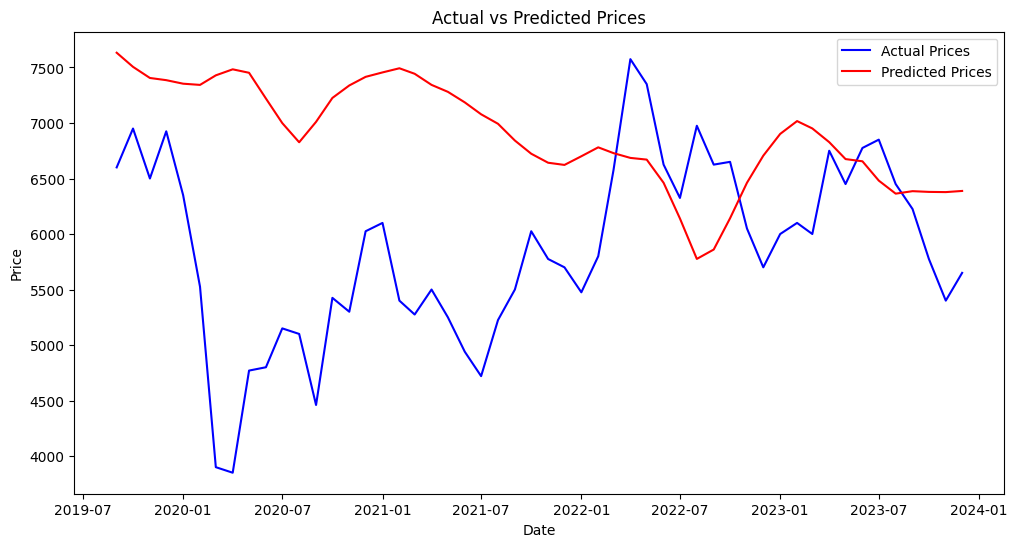

          Date Actual Price Predicted Price
0   01/09/2019      6600.00         7632.91
1   01/10/2019      6950.00         7505.67
2   01/11/2019      6500.00         7405.46
3   01/12/2019      6925.00         7385.74
4   01/01/2020      6350.00         7353.93
5   01/02/2020      5525.00         7343.11
6   01/03/2020      3900.00         7429.15
7   01/04/2020      3850.00         7483.38
8   01/05/2020      4770.00         7452.27
9   01/06/2020      4800.00         7220.16
10  01/07/2020      5150.00         6998.99
11  01/08/2020      5100.00         6826.40
12  01/09/2020      4460.00         7010.17
13  01/10/2020      5425.00         7225.66
14  01/11/2020      5300.00         7338.09
15  01/12/2020      6025.00         7415.61
16  01/01/2021      6100.00         7455.53
17  01/02/2021      5400.00         7492.86
18  01/03/2021      5275.00         7443.32
19  01/04/2021      5500.00         7343.29
20  01/05/2021      5250.00         7280.60
21  01/06/2021      4940.00     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 740ms/step - loss: 0.1086
Epoch 2/150
7/7 - 0s - 42ms/step - loss: 0.0912
Epoch 3/150
7/7 - 0s - 24ms/step - loss: 0.0832
Epoch 4/150
7/7 - 0s - 43ms/step - loss: 0.0753
Epoch 5/150
7/7 - 0s - 42ms/step - loss: 0.0696
Epoch 6/150
7/7 - 0s - 27ms/step - loss: 0.0648
Epoch 7/150
7/7 - 0s - 42ms/step - loss: 0.0617
Epoch 8/150
7/7 - 0s - 41ms/step - loss: 0.0573
Epoch 9/150
7/7 - 0s - 44ms/step - loss: 0.0542
Epoch 10/150
7/7 - 0s - 42ms/step - loss: 0.0533
Epoch 11/150
7/7 - 0s - 41ms/step - loss: 0.0497
Epoch 12/150
7/7 - 0s - 43ms/step - loss: 0.0489
Epoch 13/150
7/7 - 0s - 21ms/step - loss: 0.0478
Epoch 14/150
7/7 - 0s - 46ms/step - loss: 0.0469
Epoch 15/150
7/7 - 0s - 49ms/step - loss: 0.0439
Epoch 16/150
7/7 - 0s - 22ms/step - loss: 0.0422
Epoch 17/150
7/7 - 0s - 23ms/step - loss: 0.0406
Epoch 18/150
7/7 - 0s - 42ms/step - loss: 0.0375
Epoch 19/150
7/7 - 0s - 20ms/step - loss: 0.0359
Epoch 20/150
7/7 - 0s - 43ms/step - loss: 0.0340
Epoch 21/150
7/7 - 0s - 20ms/step - loss

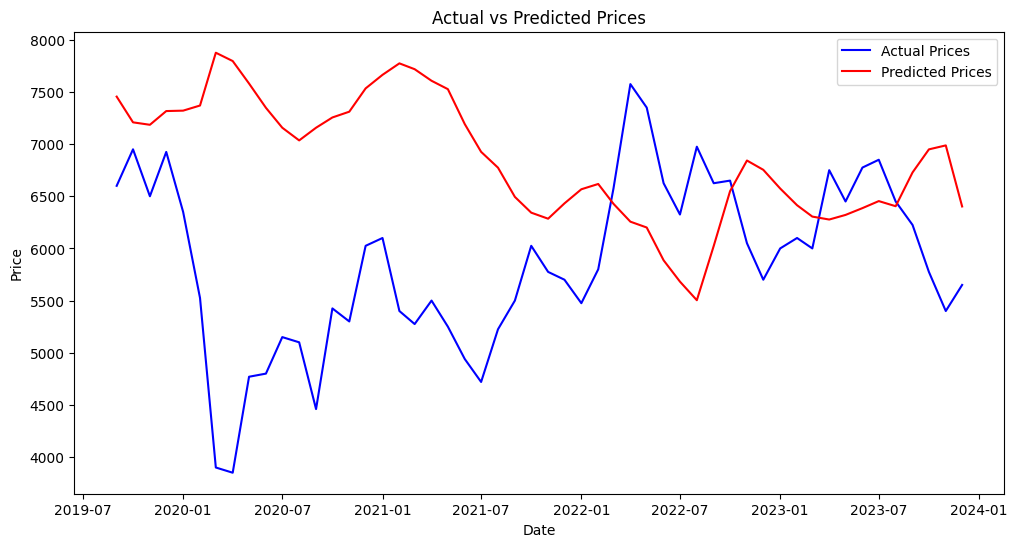

          Date Actual Price Predicted Price
0   01/09/2019      6600.00         7455.09
1   01/10/2019      6950.00         7208.53
2   01/11/2019      6500.00         7185.13
3   01/12/2019      6925.00         7316.63
4   01/01/2020      6350.00         7320.71
5   01/02/2020      5525.00         7369.81
6   01/03/2020      3900.00         7875.89
7   01/04/2020      3850.00         7796.12
8   01/05/2020      4770.00         7580.57
9   01/06/2020      4800.00         7347.84
10  01/07/2020      5150.00         7157.01
11  01/08/2020      5100.00         7035.39
12  01/09/2020      4460.00         7156.90
13  01/10/2020      5425.00         7255.35
14  01/11/2020      5300.00         7310.61
15  01/12/2020      6025.00         7533.88
16  01/01/2021      6100.00         7663.89
17  01/02/2021      5400.00         7773.93
18  01/03/2021      5275.00         7717.98
19  01/04/2021      5500.00         7607.00
20  01/05/2021      5250.00         7526.61
21  01/06/2021      4940.00     

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])  # Include all PCA components in the target
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65, scale=True):
    # Split into train and test sets
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if scale:
        # Normalize the train and test sets separately
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices)
        test_prices_scaled = scaler.transform(test_prices)
    else:
        train_prices_scaled = train_prices
        test_prices_scaled = test_prices

    return train_prices_scaled, test_prices_scaled, scaler

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    # Define and compile the LSTM model
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))  # First hidden layer
    model.add(LSTM(100, return_sequences=False)) # Second hidden layer
    model.add(Dense(25))  # Dense layer
    model.add(Dense(Y_train.shape[1]))  # Output layer should match the number of PCA components
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Fit the model with train set
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler, n_features):
    # Make predictions for train and test sets
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    # Create an array with zeros to pad the predictions to the original number of features
    padding = np.zeros((trainPredict.shape[0], n_features - trainPredict.shape[1]))

    # Invert predictions for train set
    trainPredict = scaler.inverse_transform(np.column_stack((trainPredict, padding)))  # Pad predictions to match scaler shape
    trainY = scaler.inverse_transform(np.column_stack((Y_train, padding)))  # Pad Y_train to match scaler shape

    # Invert predictions for test set
    padding = np.zeros((testPredict.shape[0], n_features - testPredict.shape[1]))
    testPredict = scaler.inverse_transform(np.column_stack((testPredict, padding)))  # Pad predictions to match scaler shape
    testY = scaler.inverse_transform(np.column_stack((Y_test, padding)))  # Pad Y_test to match scaler shape

    # Calculate root mean squared error for train and test sets
    trainScore = np.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))  # Calculate RMSE only for 'Close' price
    testScore = np.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))  # Calculate RMSE only for 'Close' price

    return trainScore, testScore

roe_data = {
    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410]
}

roa_data = {
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183]
}

de_data = {
    'Debt_to_Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47]
}

fl_data = {
    'Financial_Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24]
}

cr_data = {
    'Current_Ratio': [1.39, 1.39, 1.39, 1.29, 1.29, 1.29, 1.4, 1.4, 1.4, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.21, 1.21, 1.21, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.36, 1.36, 1.36, 1.42, 1.42, 1.42, 1.32, 1.32, 1.32, 1.36, 1.36, 1.36, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.36, 1.36, 1.36, 1.4, 1.4, 1.4, 1.35, 1.35, 1.35, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.24, 1.24, 1.24, 1.25, 1.25, 1.25, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.32, 1.32, 1.32, 1.41, 1.41, 1.41, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.38, 1.38, 1.38, 1.37, 1.37, 1.37, 1.34, 1.34, 1.34, 1.36, 1.36, 1.36, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.13, 1.13, 1.13, 1.1, 1.1, 1.1, 1.23, 1.23, 1.23, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.23, 1.23, 1.23, 1.15, 1.15, 1.15, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.26, 1.26, 1.26, 1.29, 1.29, 1.29, 1.37, 1.37, 1.37, 1.49, 1.49, 1.49, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.47, 1.47, 1.47, 1.51, 1.51, 1.51, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54, 1.46, 1.46, 1.46, 1.51, 1.51, 1.51, 1.53, 1.53, 1.53, 1.31, 1.31, 1.31, 1.18, 1.18, 1.18, 1.33, 1.33, 1.33]
}

qr_data = {
    'Quick_Ratio': [1.1, 1.1, 1.1, 1.04, 1.04, 1.04, 1.14, 1.14, 1.14, 1.1, 1.1, 1.1, 1.15, 1.15, 1.15, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.97, 0.97, 0.97, 1.12, 1.12, 1.12, 1.21, 1.21, 1.21, 1.11, 1.11, 1.11, 1.12, 1.12, 1.12, 1.23, 1.23, 1.23, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.02, 1.02, 1.02, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.09, 1.09, 1.09, 1.17, 1.17, 1.17, 1.12, 1.12, 1.12, 1.08, 1.08, 1.08, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.16, 1.16, 1.16, 1.04, 1.04, 1.04, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 1.15, 1.15, 1.15, 1.09, 1.09, 1.09, 1.02, 1.02, 1.02, 0.92, 0.92, 0.92, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.02, 1.02, 1.02, 1.05, 1.05, 1.05, 1.09, 1.09, 1.09, 1.24, 1.24, 1.24, 1.31, 1.31, 1.31, 1.33, 1.33, 1.33, 1.3, 1.3, 1.3, 1.33, 1.33, 1.33, 1.36, 1.36, 1.36, 1.33, 1.33, 1.33, 1.37, 1.37, 1.37, 1.32, 1.32, 1.32, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.07, 1.07, 1.07, 0.94, 0.94, 0.94, 1.02, 1.02, 1.02]
}

itr_data = {
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55]
}

rtr_data = {
    'RTR': [12.17, 12.17, 12.17, 14.05, 14.05, 14.05, 13.96, 13.96, 13.96, 11.68, 11.68, 11.68, 10.94, 10.94, 10.94, 10.61, 10.61, 10.61, 11.36, 11.36, 11.36, 12.29, 12.29, 12.29, 11.22, 11.22, 11.22, 10.9, 10.9, 10.9, 11.26, 11.26, 11.26, 10.51, 10.51, 10.51, 10.05, 10.05, 10.05, 10.76, 10.76, 10.76, 11.12, 11.12, 11.12, 10.3, 10.3, 10.3, 8.25, 8.25, 8.25, 8.49, 8.49, 8.49, 9.6, 9.6, 9.6, 11.81, 11.81, 11.81, 10.13, 10.13, 10.13, 9.76, 9.76, 9.76, 9.66, 9.66, 9.66, 10.77, 10.77, 10.77, 8.23, 8.23, 8.23, 9.31, 9.31, 9.31, 10.11, 10.11, 10.11, 9.71, 9.71, 9.71, 8.07, 8.07, 8.07, 8.82, 8.82, 8.82, 9.74, 9.74, 9.74, 11.83, 11.83, 11.83, 8.64, 8.64, 8.64, 8.56, 8.56, 8.56, 10.69, 10.69, 10.69, 9.78, 9.78, 9.78, 10.76, 10.76, 10.76, 11.39, 11.39, 11.39, 12.41, 12.41, 12.41, 10.36, 10.36, 10.36, 11.6, 11.6, 11.6, 10.34, 10.34, 10.34, 11.18, 11.18, 11.18, 11.01, 11.01, 11.01, 10.61, 10.61, 10.61, 5.81, 5.81, 5.81, 7.14, 7.14, 7.14, 4.84, 4.84, 4.84, 8.75, 8.75, 8.75, 11.49, 11.49, 11.49, 12.26, 12.26, 12.26, 10.97, 10.97, 10.97, 12.72, 12.72, 12.72, 15.84, 15.84, 15.84, 13.27, 13.27, 13.27, 14.22, 14.22, 14.22, 13.0, 13.0, 13.0, 15.04, 15.04, 15.04, 12.37, 12.37, 12.37, 15.64, 15.64, 15.64]
}


def train1(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    # Check if the column 'Close' or 'Adj Close' exists
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract additional financial data
    roe = np.array(roe_data['ROE'])
    roa = np.array(roa_data['ROA'])
    de = np.array(de_data['Debt_to_Equity'])
    fl = np.array(fl_data['Financial_Leverage'])

    # Combine all data into a single dataset
    combined_data = np.column_stack((prices, roe, roa, de, fl))

    # Split into train and test sets
    train_prices, test_prices, scaler = train_test_split(combined_data)

    # Apply PCA
    pca = PCA(n_components=2)
    train_prices_pca = pca.fit_transform(train_prices)
    test_prices_pca = pca.transform(test_prices)

    # Create datasets for LSTM
    X_train, Y_train = create_dataset(train_prices_pca, look_back)
    X_test, Y_test = create_dataset(test_prices_pca, look_back)

    # Train the model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    n_features = combined_data.shape[1]
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler, n_features)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    # Predict using the model
    predicted_prices_pca = model.predict(X_test)

    # Invert PCA transformation to get predicted prices in original feature space
    predicted_prices = pca.inverse_transform(predicted_prices_pca)

    # Now you can invert the scaling using the original scaler
    predicted_prices = scaler.inverse_transform(predicted_prices)[:, 0]  # Extract only the 'Close' price

    # Create a table with date, actual price, and prediction result for test set
    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)[:, 0]  # Extract only the 'Close' price

    # Ensure that the length of the test dataset matches the length of the predicted prices
    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    # Format dates as dd/mm/yyyy
    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    # Format prices to match actual price formatting
    actual_prices_formatted = [f'{price:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price:.2f}' for price in predicted_prices]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

def train2(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    # Check if the column 'Close' or 'Adj Close' exists
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract additional financial data
    roe = np.array(roe_data['ROE'])
    roa = np.array(roa_data['ROA'])
    de = np.array(de_data['Debt_to_Equity'])
    fl = np.array(fl_data['Financial_Leverage'])
    cr = np.array(cr_data['Current_Ratio'])
    qr = np.array(qr_data['Quick_Ratio'])
    itr = np.array(itr_data['ITR'])
    rtr = np.array(rtr_data['RTR'])

    # Combine all data into a single dataset
    combined_data = np.column_stack((prices, roe, roa, de, fl, cr, qr, itr, rtr))

    # Split into train and test sets
    train_prices, test_prices, scaler = train_test_split(combined_data)

    # Apply PCA
    pca = PCA(n_components=2)
    train_prices_pca = pca.fit_transform(train_prices)
    test_prices_pca = pca.transform(test_prices)

    # Create datasets for LSTM
    X_train, Y_train = create_dataset(train_prices_pca, look_back)
    X_test, Y_test = create_dataset(test_prices_pca, look_back)

    # Train the model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    n_features = combined_data.shape[1]
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler, n_features)

    print(f'Train Score: {trainScore:.2f} RMSE')
    print(f'Test Score: {testScore:.2f} RMSE')

    # Predict using the model
    predicted_prices_pca = model.predict(X_test)

    # Invert PCA transformation to get predicted prices in original feature space
    predicted_prices = pca.inverse_transform(predicted_prices_pca)

    # Now you can invert the scaling using the original scaler
    predicted_prices = scaler.inverse_transform(predicted_prices)[:, 0]  # Extract only the 'Close' price

    # Create a table with date, actual price, and prediction result for test set
    test_dates = df.index[-len(test_prices):]
    actual_prices = scaler.inverse_transform(test_prices)[:, 0]  # Extract only the 'Close' price

    # Ensure that the length of the test dataset matches the length of the predicted prices
    test_dates = test_dates[-len(predicted_prices):]
    actual_prices = actual_prices[-len(predicted_prices):]

    # Format dates as dd/mm/yyyy
    dates_formatted = [date.strftime('%d/%m/%Y') for date in test_dates]
    # Format prices to match actual price formatting
    actual_prices_formatted = [f'{price:.2f}' for price in actual_prices]
    predicted_prices_formatted = [f'{price:.2f}' for price in predicted_prices]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(test_dates, predicted_prices, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

    result_df = pd.DataFrame({
        'Date': dates_formatted,
        'Actual Price': actual_prices_formatted,
        'Predicted Price': predicted_prices_formatted
    })
    print(result_df)

df_1_close = preprocessing(df_1)

# Example usage
train1(df_1_close)
train2(df_1_close)

###2nd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])  # Include all PCA components in the target
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65, scale=True):
    # Split into train and test sets
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if scale:
        # Normalize the train and test sets separately
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices)
        test_prices_scaled = scaler.transform(test_prices)
    else:
        train_prices_scaled = train_prices
        test_prices_scaled = test_prices

    return train_prices_scaled, test_prices_scaled, scaler

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    # Define and compile the LSTM model
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))  # First hidden layer
    model.add(LSTM(100, return_sequences=False)) # Second hidden layer
    model.add(Dense(25))  # Dense layer
    model.add(Dense(Y_train.shape[1]))  # Output layer should match the number of PCA components
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Fit the model with train set
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler, n_features):
    # Make predictions for train and test sets
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    # Create an array with zeros to pad the predictions to the original number of features
    padding = np.zeros((trainPredict.shape[0], n_features - trainPredict.shape[1]))

    # Invert predictions for train set
    trainPredict = scaler.inverse_transform(np.column_stack((trainPredict, padding)))  # Pad predictions to match scaler shape
    trainY = scaler.inverse_transform(np.column_stack((Y_train, padding)))  # Pad Y_train to match scaler shape

    # Invert predictions for test set
    padding = np.zeros((testPredict.shape[0], n_features - testPredict.shape[1]))
    testPredict = scaler.inverse_transform(np.column_stack((testPredict, padding)))  # Pad predictions to match scaler shape
    testY = scaler.inverse_transform(np.column_stack((Y_test, padding)))  # Pad Y_test to match scaler shape

    # Calculate root mean squared error for train and test sets
    trainScore = np.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))  # Calculate RMSE only for 'Close' price
    testScore = np.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))  # Calculate RMSE only for 'Close' price

    return trainScore, testScore, testPredict

# Prepare the data
roe_df = pd.DataFrame(roe_data)
roa_df = pd.DataFrame(roa_data)
de_df = pd.DataFrame(de_data)
fl_df = pd.DataFrame(fl_data)
cr_df = pd.DataFrame(cr_data)

# Concatenate the dataframes into one dataframe
data = pd.concat([roe_df, roa_df, de_df, fl_df, cr_df], axis=1)

# PCA transformation
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['component_1', 'component_2', 'component_3'])

# Prepare the dataset
prices = principalDf.values
train_prices, test_prices, scaler = train_test_split(prices, train_size=0.65)

look_back = 5
X_train, Y_train = create_dataset(train_prices, look_back)
X_test, Y_test = create_dataset(test_prices, look_back)

# Train models with different parameters
model_1 = train_model(X_train, Y_train, look_back, epochs=10, batch_size=1, verbose=2)
model_2 = train_model(X_train, Y_train, look_back, epochs=20, batch_size=1, verbose=2)

# Evaluate models
trainScore_1, testScore_1, testPredict_1 = evaluate_model(model_1, X_train, Y_train, X_test, Y_test, scaler, n_features=data.shape[1])
trainScore_2, testScore_2, testPredict_2 = evaluate_model(model_2, X_train, Y_train, X_test, Y_test, scaler, n_features=data.shape[1])

# Create a comparison table
comparison_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2'],
    'Train RMSE': [trainScore_1, trainScore_2],
    'Test RMSE': [testScore_1, testScore_2]
})

print(comparison_df)

# Plot the RMSE comparison
plt.figure(figsize=(10, 5))
plt.plot(['Train RMSE', 'Test RMSE'], [trainScore_1, testScore_1], label='Model 1')
plt.plot(['Train RMSE', 'Test RMSE'], [trainScore_2, testScore_2], label='Model 2')
plt.legend()
plt.title('RMSE Comparison between Models')
plt.ylabel('RMSE')
plt.show()

# Plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(test_prices)[look_back:, 0], label='Actual')
plt.plot(testPredict_1[:, 0], label='Model 1 Predictions')
plt.plot(testPredict_2[:, 0], label='Model 2 Predictions')
plt.legend()
plt.title('Model Predictions vs Actual')
plt.ylabel('Values')
plt.show()

# Print the predicted values
predicted_df = pd.DataFrame({
    'Actual': scaler.inverse_transform(test_prices)[look_back:, 0],
    'Model 1 Predictions': testPredict_1[:, 0],
    'Model 2 Predictions': testPredict_2[:, 0]
})

print(predicted_df)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 - 6s - 52ms/step - loss: 0.0634
Epoch 2/10
111/111 - 2s - 15ms/step - loss: 0.0390
Epoch 3/10
111/111 - 1s - 12ms/step - loss: 0.0369
Epoch 4/10
111/111 - 1s - 10ms/step - loss: 0.0354
Epoch 5/10
111/111 - 2s - 17ms/step - loss: 0.0350
Epoch 6/10
111/111 - 2s - 18ms/step - loss: 0.0309
Epoch 7/10
111/111 - 1s - 13ms/step - loss: 0.0279
Epoch 8/10
111/111 - 1s - 8ms/step - loss: 0.0260
Epoch 9/10
111/111 - 1s - 8ms/step - loss: 0.0216
Epoch 10/10
111/111 - 1s - 9ms/step - loss: 0.0206
Epoch 1/20
111/111 - 4s - 35ms/step - loss: 0.0623
Epoch 2/20
111/111 - 1s - 13ms/step - loss: 0.0382
Epoch 3/20
111/111 - 1s - 8ms/step - loss: 0.0367
Epoch 4/20
111/111 - 2s - 19ms/step - loss: 0.0366
Epoch 5/20
111/111 - 2s - 17ms/step - loss: 0.0327
Epoch 6/20
111/111 - 1s - 9ms/step - loss: 0.0272
Epoch 7/20
111/111 - 1s - 10ms/step - loss: 0.0259
Epoch 8/20
111/111 - 1s - 8ms/step - loss: 0.0242
Epoch 9/20
111/111 - 1s - 13ms/step - loss: 0.0236
Epoch 10/20
111/111 - 1s - 12ms/step - loss: 0.

ValueError: operands could not be broadcast together with shapes (111,5) (3,) (111,5) 

#Tugas Tambahan 4

##Displays all the results of different modules in one run

###1nd (LSTM and LSTM with 2 Data Fundamental

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 287ms/step - loss: 0.1475
Epoch 2/150
7/7 - 0s - 17ms/step - loss: 0.0279
Epoch 3/150
7/7 - 0s - 12ms/step - loss: 0.0157
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0130
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0092
Epoch 6/150
7/7 - 0s - 19ms/step - loss: 0.0067
Epoch 7/150
7/7 - 0s - 23ms/step - loss: 0.0074
Epoch 8/150
7/7 - 0s - 19ms/step - loss: 0.0070
Epoch 9/150
7/7 - 0s - 18ms/step - loss: 0.0068
Epoch 10/150
7/7 - 0s - 11ms/step - loss: 0.0069
Epoch 11/150
7/7 - 0s - 20ms/step - loss: 0.0069
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0071
Epoch 13/150
7/7 - 0s - 11ms/step - loss: 0.0067
Epoch 14/150
7/7 - 0s - 19ms/step - loss: 0.0069
Epoch 15/150
7/7 - 0s - 19ms/step - loss: 0.0066
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0067
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0065
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 20/150
7/7 - 0s - 7ms/step - loss: 0.0067
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.00

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 305ms/step - loss: 0.2043
Epoch 2/150
7/7 - 0s - 18ms/step - loss: 0.0307
Epoch 3/150
7/7 - 0s - 19ms/step - loss: 0.0191
Epoch 4/150
7/7 - 0s - 21ms/step - loss: 0.0123
Epoch 5/150
7/7 - 0s - 11ms/step - loss: 0.0104
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0073
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0073
Epoch 8/150
7/7 - 0s - 16ms/step - loss: 0.0071
Epoch 9/150
7/7 - 0s - 13ms/step - loss: 0.0071
Epoch 10/150
7/7 - 0s - 21ms/step - loss: 0.0069
Epoch 11/150
7/7 - 0s - 11ms/step - loss: 0.0066
Epoch 12/150
7/7 - 0s - 18ms/step - loss: 0.0067
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0070
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0074
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 16/150
7/7 - 0s - 7ms/step - loss: 0.0063
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0064
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0063
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0062
Epoch 20/150
7/7 - 0s - 9ms/step - loss: 0.0061
Epoch 21/150
7/7 - 0s - 9ms/step - loss: 0.0061


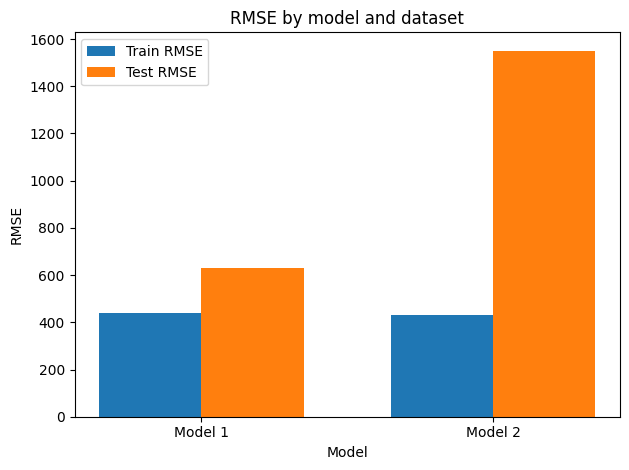

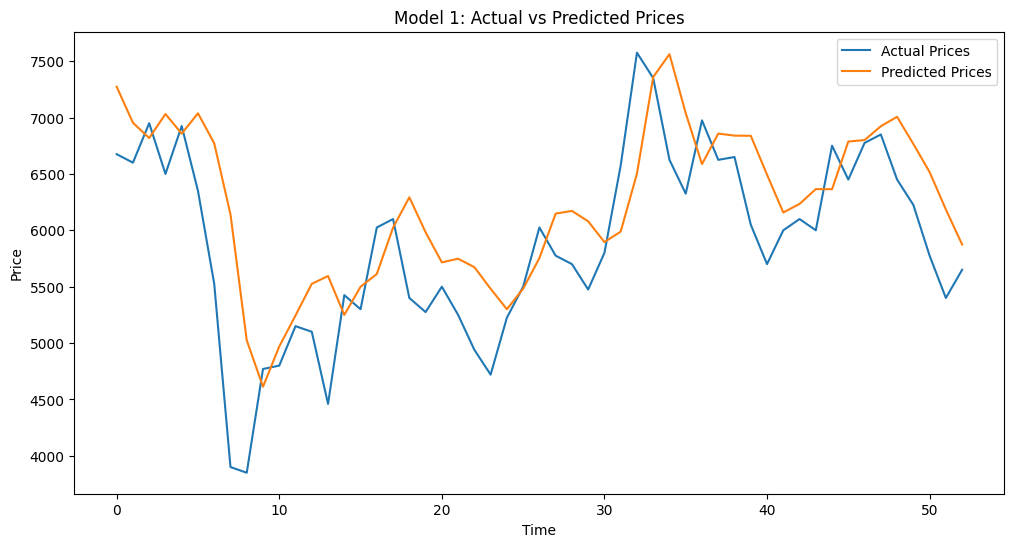

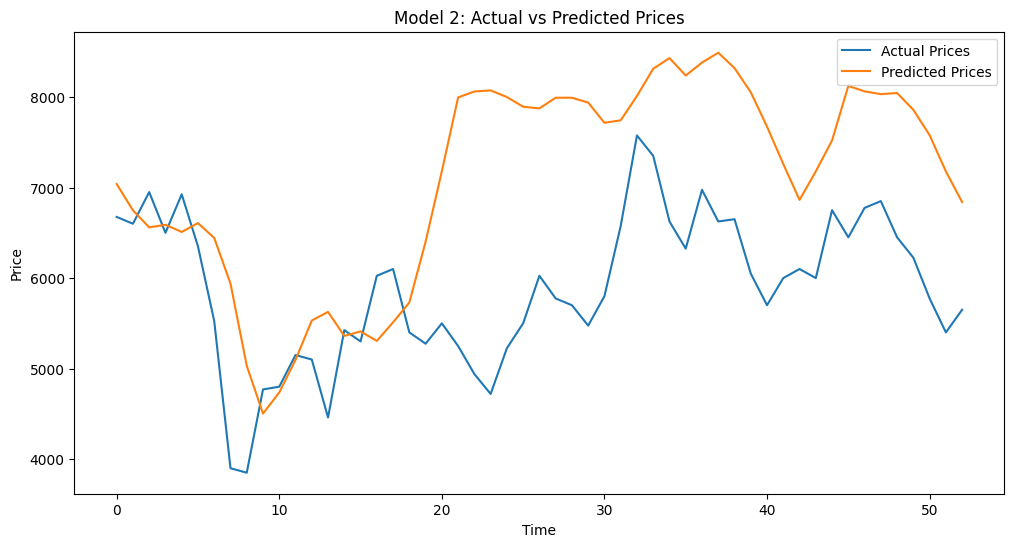

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate

def create_dataset(dataset, roa=None, income_margin=None, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = [dataset[i:(i + look_back), 0]]  # Start with the price data
        if roa is not None:
            a.append(roa[i:(i + look_back)])
        if income_margin is not None:
            a.append(income_margin[i:(i + look_back)])
        a = np.column_stack(a)  # Stack only if there are additional features
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, roa, income_margin, train_size=0.65, scale=True):
    prices = np.array(prices).reshape(-1, 1)  # Ensure prices is a 2D NumPy array
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]
    train_roa, test_roa = roa[:split_point], roa[split_point:]
    train_income_margin, test_income_margin = income_margin[:split_point], income_margin[split_point:]

    scaler = MinMaxScaler(feature_range=(0, 1))

    train_prices_scaled = scaler.fit_transform(train_prices)
    test_prices_scaled = scaler.transform(test_prices)

    feature_scalers = []
    features = [train_roa, train_income_margin]

    for feature in features:
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        feature_scaler.fit(np.array(feature).reshape(-1, 1))
        feature_scalers.append(feature_scaler)

    def scale_features(features, feature_scalers):
        scaled_features = []
        for feature, scaler in zip(features, feature_scalers):
            scaled_features.append(scaler.transform(np.array(feature).reshape(-1, 1)).flatten())
        return scaled_features

    train_features_scaled = scale_features(features, feature_scalers)
    test_features_scaled = scale_features([test_roa, test_income_margin], feature_scalers)

    return (train_prices_scaled, test_prices_scaled) + tuple(train_features_scaled) + tuple(test_features_scaled), scaler

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    return trainScore, testScore, trainY, trainPredict, testY, testPredict

def train1(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Pass prices for all to maintain shape for splitting
    split_data, scaler = train_test_split(prices, prices, prices)
    train_prices, test_prices = split_data[:2]

    X_train, Y_train = create_dataset(train_prices, look_back=look_back)
    X_test, Y_test = create_dataset(test_prices, look_back=look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 1): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 1): {testScore:.2f} RMSE')

    return trainScore, testScore, trainY, trainPredict, testY, testPredict

def train2(df, roa, income_margin, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    split_data, scaler = train_test_split(prices, roa, income_margin)

    train_prices_scaled, test_prices_scaled, *features_scaled = split_data

    X_train, Y_train = create_dataset(train_prices_scaled, *features_scaled[:2], look_back)
    X_test, Y_test = create_dataset(test_prices_scaled, *features_scaled[2:], look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 2): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 2): {testScore:.2f} RMSE')

    return trainScore, testScore, trainY, trainPredict, testY, testPredict

roa_data = {
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183]
}
im_data = {
    'Income_Margin': [0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0353, 0.0353, 0.0353, 0.0369, 0.0369, 0.0369, 0.0363, 0.0363, 0.0363, 0.0348, 0.0348, 0.0348, 0.0343, 0.0343, 0.0343, 0.037, 0.037, 0.037, 0.0365, 0.0365, 0.0365, 0.0305, 0.0305, 0.0305, 0.0313, 0.0313, 0.0313, 0.0294, 0.0294, 0.0294, 0.0303, 0.0303, 0.0303, 0.0293, 0.0293, 0.0293, 0.026, 0.026, 0.026, 0.0257, 0.0257, 0.0257, 0.0274, 0.0274, 0.0274, 0.0264, 0.0264, 0.0264, 0.0249, 0.0249, 0.0249, 0.0263, 0.0263, 0.0263, 0.0248, 0.0248, 0.0248, 0.0239, 0.0239, 0.0239, 0.0213, 0.0213, 0.0213, 0.023, 0.023, 0.023, 0.0221, 0.0221, 0.0221, 0.0242, 0.0242, 0.0242, 0.0224, 0.0224, 0.0224, 0.0236, 0.0236, 0.0236, 0.0233, 0.0233, 0.0233, 0.0249, 0.0249, 0.0249, 0.0231, 0.0231, 0.0231, 0.0255, 0.0255, 0.0255, 0.0243, 0.0243, 0.0243, 0.0227, 0.0227, 0.0227, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0214, 0.0214, 0.0214, 0.02, 0.02, 0.02, 0.0204, 0.0204, 0.0204, 0.0205, 0.0205, 0.0205, 0.0192, 0.0192, 0.0192, 0.018, 0.018, 0.018, 0.0189, 0.0189, 0.0189, 0.0194, 0.0194, 0.0194, 0.0211, 0.0211, 0.0211, 0.018, 0.018, 0.018, 0.0232, 0.0232, 0.0232, 0.0262, 0.0262, 0.0262, 0.029, 0.029, 0.029, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0304, 0.0304, 0.0304, 0.0305, 0.0305, 0.0305, 0.0273, 0.0273, 0.0273, 0.0277, 0.0277, 0.0277, 0.0275, 0.0275, 0.0275, 0.0287, 0.0287, 0.0287, 0.0266, 0.0266, 0.0266, 0.0252, 0.0252, 0.0252, 0.0257, 0.0257, 0.0257]
}

df_1_close = preprocessing(df_1)

# Assuming df_1_close, roa_data['ROA'], and im_data['Income_Margin'] are defined and prepared
train1_trainScore, train1_testScore, train1_trainY, train1_trainPredict, train1_testY, train1_testPredict = train1(df_1_close) # Unpack into 6 variables
train2_trainScore, train2_testScore, train2_trainY, train2_trainPredict, train2_testY, train2_testPredict = train2(df_1_close, roa_data['ROA'], im_data['Income_Margin']) # Similar change for train2

# RMSE scores
rmse_data = [
    ["Model 1", train1_trainScore, train1_testScore],
    ["Model 2", train2_trainScore, train2_testScore]
]

# Table headers
headers = ["Model", "Train RMSE", "Test RMSE"]

# Print table
print("RMSE Comparison:")
print(tabulate(rmse_data, headers=headers, floatfmt=".2f"))

# Plot the RMSE scores
models = [row[0] for row in rmse_data]
train_rmse = [row[1] for row in rmse_data]
test_rmse = [row[2] for row in rmse_data]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_rmse, width, label='Train RMSE')
rects2 = ax.bar(x + width/2, test_rmse, width, label='Test RMSE')

ax.set_xlabel('Model')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by model and dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

# Plot the actual vs. predicted prices
def plot_predictions(actual, predicted, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual Prices')
    plt.plot(predicted, label='Predicted Prices')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Plot predictions for Model 1
plot_predictions(train1_testY, train1_testPredict, 'Model 1: Actual vs Predicted Prices')

# Plot predictions for Model 2
plot_predictions(train2_testY, train2_testPredict, 'Model 2: Actual vs Predicted Prices')

###2nd (LSTM, PCA with 4 Component, -//- with 8 Component

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 253ms/step - loss: 0.0872
Epoch 2/150
7/7 - 0s - 18ms/step - loss: 0.0604
Epoch 3/150
7/7 - 0s - 9ms/step - loss: 0.0518
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0468
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0409
Epoch 6/150
7/7 - 0s - 10ms/step - loss: 0.0366
Epoch 7/150
7/7 - 0s - 9ms/step - loss: 0.0328
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0273
Epoch 9/150
7/7 - 0s - 20ms/step - loss: 0.0241
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0212
Epoch 11/150
7/7 - 0s - 9ms/step - loss: 0.0200
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0200
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0183
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0176
Epoch 15/150
7/7 - 0s - 19ms/step - loss: 0.0178
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0185
Epoch 17/150
7/7 - 0s - 10ms/step - loss: 0.0175
Epoch 18/150
7/7 - 0s - 19ms/step - loss: 0.0165
Epoch 19/150
7/7 - 0s - 10ms/step - loss: 0.0159
Epoch 20/150
7/7 - 0s - 9ms/step - loss: 0.0153
Epoch 21/150
7/7 - 0s - 9ms/step - loss: 0.0164
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 326ms/step - loss: 0.0509
Epoch 2/150
7/7 - 0s - 17ms/step - loss: 0.0370
Epoch 3/150
7/7 - 0s - 21ms/step - loss: 0.0331
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0288
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0260
Epoch 6/150
7/7 - 0s - 25ms/step - loss: 0.0234
Epoch 7/150
7/7 - 0s - 15ms/step - loss: 0.0203
Epoch 8/150
7/7 - 0s - 19ms/step - loss: 0.0179
Epoch 9/150
7/7 - 0s - 19ms/step - loss: 0.0158
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0147
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0133
Epoch 12/150
7/7 - 0s - 9ms/step - loss: 0.0128
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0126
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0117
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0107
Epoch 16/150
7/7 - 0s - 7ms/step - loss: 0.0103
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0101
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0098
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0094
Epoch 20/150
7/7 - 0s - 9ms/step - loss: 0.0093
Epoch 21/150
7/7 - 0s - 9ms/step - loss: 0.0091
Epo

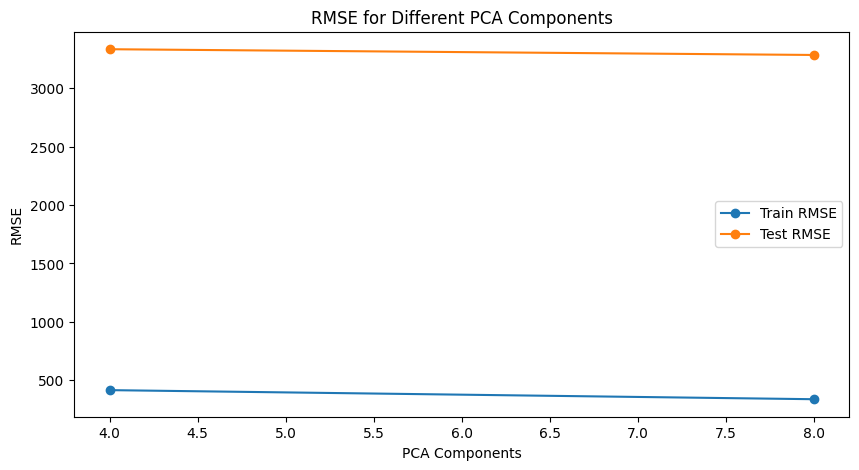

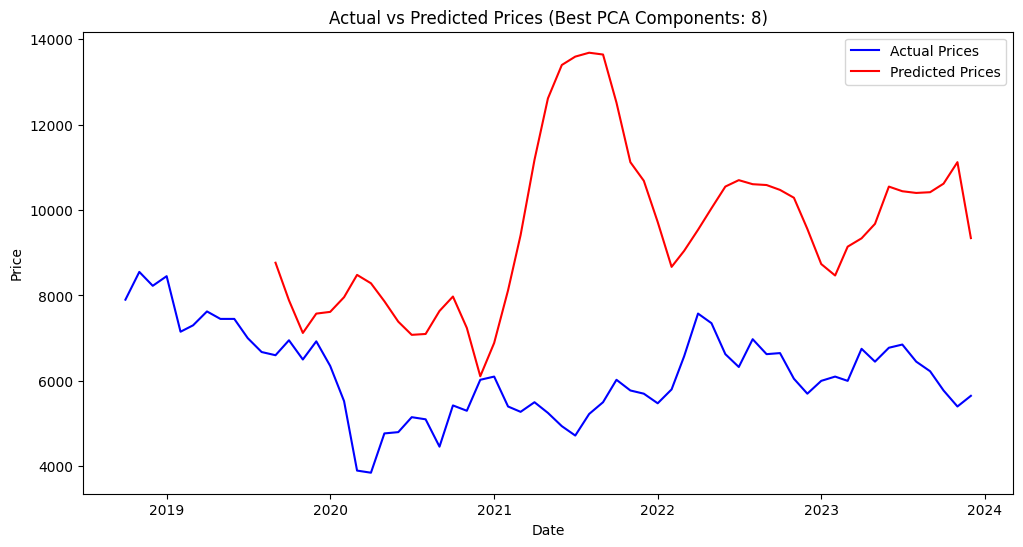

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Define the functions for dataset creation, model training, and evaluation

def create_dataset(dataset, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])  # Include all PCA components in the target
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65, scale=True):
    # Split into train and test sets
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if scale:
        # Normalize the train and test sets separately
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices)
        test_prices_scaled = scaler.transform(test_prices)
    else:
        train_prices_scaled = train_prices
        test_prices_scaled = test_prices

    return train_prices_scaled, test_prices_scaled, scaler

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    # Define and compile the LSTM model
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))  # First hidden layer
    model.add(LSTM(100, return_sequences=False)) # Second hidden layer
    model.add(Dense(25))  # Dense layer
    model.add(Dense(Y_train.shape[1]))  # Output layer should match the number of PCA components
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Fit the model with train set
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler, n_features):
    # Make predictions for train and test sets
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    # Create an array with zeros to pad the predictions to the original number of features
    padding = np.zeros((trainPredict.shape[0], n_features - trainPredict.shape[1]))

    # Invert predictions for train set
    trainPredict = scaler.inverse_transform(np.column_stack((trainPredict, padding)))  # Pad predictions to match scaler shape
    trainY = scaler.inverse_transform(np.column_stack((Y_train, padding)))  # Pad Y_train to match scaler shape

    # Invert predictions for test set
    padding = np.zeros((testPredict.shape[0], n_features - testPredict.shape[1]))
    testPredict = scaler.inverse_transform(np.column_stack((testPredict, padding)))  # Pad predictions to match scaler shape
    testY = scaler.inverse_transform(np.column_stack((Y_test, padding)))  # Pad Y_test to match scaler shape

    # Calculate root mean squared error for train and test sets
    trainScore = np.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))  # Calculate RMSE only for 'Close' price
    testScore = np.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))  # Calculate RMSE only for 'Close' price

    return trainScore, testScore

# Function to train the model with PCA components specified
def train_with_pca_components(df, roe_data, roa_data, de_data, fl_data, cr_data, qr_data, itr_data, rtr_data, pca_components=4, look_back=10, epochs=150, batch_size=16, verbose=2):
    # Check if the column 'Close' or 'Adj Close' exists
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Ensure all data arrays have the same length as prices
    roe_data_array = np.array(list(roe_data.values())).reshape(-1, 1)
    roa_data_array = np.array(list(roa_data.values())).reshape(-1, 1)
    de_data_array = np.array(list(de_data.values())).reshape(-1, 1)
    fl_data_array = np.array(list(fl_data.values())).reshape(-1, 1)
    cr_data_array = np.array(list(cr_data.values())).reshape(-1, 1)
    qr_data_array = np.array(list(qr_data.values())).reshape(-1, 1)
    itr_data_array = np.array(list(itr_data.values())).reshape(-1, 1)
    rtr_data_array = np.array(list(rtr_data.values())).reshape(-1, 1)

    # Ensure all arrays are the same length as prices
    if not (len(roe_data_array) == len(roa_data_array) == len(de_data_array) == len(fl_data_array) ==
            len(cr_data_array) == len(qr_data_array) == len(itr_data_array) == len(rtr_data_array) == len(prices)):
        raise ValueError("All data arrays must be the same length as the 'prices' array.")

    combined_data = np.column_stack((prices, roe_data_array, roa_data_array, de_data_array,
                                     fl_data_array, cr_data_array, qr_data_array,
                                     itr_data_array, rtr_data_array))

    # Split into train and test sets
    train_prices, test_prices, scaler = train_test_split(combined_data)

    # Apply PCA
    pca = PCA(n_components=pca_components)
    train_prices_pca = pca.fit_transform(train_prices)
    test_prices_pca = pca.transform(test_prices)

    # Create datasets for LSTM
    X_train, Y_train = create_dataset(train_prices_pca, look_back)
    X_test, Y_test = create_dataset(test_prices_pca, look_back)

    # Train the model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    n_features = combined_data.shape[1]
    trainScore, testScore = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler, n_features)

    # Predict using the model
    predicted_prices_pca = model.predict(X_test)

    # Invert PCA transformation to get predicted prices in original feature space
    predicted_prices = pca.inverse_transform(predicted_prices_pca)

    # Now you can invert the scaling using the original scaler
    predicted_prices = scaler.inverse_transform(predicted_prices)[:, 0]  # Extract only the 'Close' price

    # Return the scores and predicted prices for plotting later
    return trainScore, testScore, predicted_prices, test_prices, scaler

# Example usage for both PCA configurations

df_1_close = preprocessing(df_1)  # Assuming df_1 is your dataframe

# Store the results for different PCA configurations
results = []
pca_components_list = [4, 8]

# Extract your additional financial data here
roe_data = {
    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410]
}

roa_data = {
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183]
}

de_data = {
    'Debt_to_Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47]
}

fl_data = {
    'Financial_Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24]
}
cr_data = {
    'Current_Ratio': [1.39, 1.39, 1.39, 1.29, 1.29, 1.29, 1.4, 1.4, 1.4, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.21, 1.21, 1.21, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.36, 1.36, 1.36, 1.42, 1.42, 1.42, 1.32, 1.32, 1.32, 1.36, 1.36, 1.36, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.36, 1.36, 1.36, 1.4, 1.4, 1.4, 1.35, 1.35, 1.35, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.24, 1.24, 1.24, 1.25, 1.25, 1.25, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.32, 1.32, 1.32, 1.41, 1.41, 1.41, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.38, 1.38, 1.38, 1.37, 1.37, 1.37, 1.34, 1.34, 1.34, 1.36, 1.36, 1.36, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.13, 1.13, 1.13, 1.1, 1.1, 1.1, 1.23, 1.23, 1.23, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.23, 1.23, 1.23, 1.15, 1.15, 1.15, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.26, 1.26, 1.26, 1.29, 1.29, 1.29, 1.37, 1.37, 1.37, 1.49, 1.49, 1.49, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.47, 1.47, 1.47, 1.51, 1.51, 1.51, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54, 1.46, 1.46, 1.46, 1.51, 1.51, 1.51, 1.53, 1.53, 1.53, 1.31, 1.31, 1.31, 1.18, 1.18, 1.18, 1.33, 1.33, 1.33]
}
qr_data = {
    'Quick_Ratio': [1.1, 1.1, 1.1, 1.04, 1.04, 1.04, 1.14, 1.14, 1.14, 1.1, 1.1, 1.1, 1.15, 1.15, 1.15, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.97, 0.97, 0.97, 1.12, 1.12, 1.12, 1.21, 1.21, 1.21, 1.11, 1.11, 1.11, 1.12, 1.12, 1.12, 1.23, 1.23, 1.23, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.02, 1.02, 1.02, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.09, 1.09, 1.09, 1.17, 1.17, 1.17, 1.12, 1.12, 1.12, 1.08, 1.08, 1.08, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.16, 1.16, 1.16, 1.04, 1.04, 1.04, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 1.15, 1.15, 1.15, 1.09, 1.09, 1.09, 1.02, 1.02, 1.02, 0.92, 0.92, 0.92, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.02, 1.02, 1.02, 1.05, 1.05, 1.05, 1.09, 1.09, 1.09, 1.24, 1.24, 1.24, 1.31, 1.31, 1.31, 1.33, 1.33, 1.33, 1.3, 1.3, 1.3, 1.33, 1.33, 1.33, 1.36, 1.36, 1.36, 1.33, 1.33, 1.33, 1.37, 1.37, 1.37, 1.32, 1.32, 1.32, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.07, 1.07, 1.07, 0.94, 0.94, 0.94, 1.02, 1.02, 1.02]
}
itr_data = {
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55]
}
rtr_data = {
    'RTR': [12.17, 12.17, 12.17, 14.05, 14.05, 14.05, 13.96, 13.96, 13.96, 11.68, 11.68, 11.68, 10.94, 10.94, 10.94, 10.61, 10.61, 10.61, 11.36, 11.36, 11.36, 12.29, 12.29, 12.29, 11.22, 11.22, 11.22, 10.9, 10.9, 10.9, 11.26, 11.26, 11.26, 10.51, 10.51, 10.51, 10.05, 10.05, 10.05, 10.76, 10.76, 10.76, 11.12, 11.12, 11.12, 10.3, 10.3, 10.3, 8.25, 8.25, 8.25, 8.49, 8.49, 8.49, 9.6, 9.6, 9.6, 11.81, 11.81, 11.81, 10.13, 10.13, 10.13, 9.76, 9.76, 9.76, 9.66, 9.66, 9.66, 10.77, 10.77, 10.77, 8.23, 8.23, 8.23, 9.31, 9.31, 9.31, 10.11, 10.11, 10.11, 9.71, 9.71, 9.71, 8.07, 8.07, 8.07, 8.82, 8.82, 8.82, 9.74, 9.74, 9.74, 11.83, 11.83, 11.83, 8.64, 8.64, 8.64, 8.56, 8.56, 8.56, 10.69, 10.69, 10.69, 9.78, 9.78, 9.78, 10.76, 10.76, 10.76, 11.39, 11.39, 11.39, 12.41, 12.41, 12.41, 10.36, 10.36, 10.36, 11.6, 11.6, 11.6, 10.34, 10.34, 10.34, 11.18, 11.18, 11.18, 11.01, 11.01, 11.01, 10.61, 10.61, 10.61, 5.81, 5.81, 5.81, 7.14, 7.14, 7.14, 4.84, 4.84, 4.84, 8.75, 8.75, 8.75, 11.49, 11.49, 11.49, 12.26, 12.26, 12.26, 10.97, 10.97, 10.97, 12.72, 12.72, 12.72, 15.84, 15.84, 15.84, 13.27, 13.27, 13.27, 14.22, 14.22, 14.22, 13.0, 13.0, 13.0, 15.04, 15.04, 15.04, 12.37, 12.37, 12.37, 15.64, 15.64, 15.64]
}



for pca_components in pca_components_list:
    # Unpack with the correct number of variables
    trainScore, testScore, predicted_prices, test_prices, scaler = train_with_pca_components(
        df_1_close, roe_data, roa_data, de_data, fl_data, cr_data, qr_data, itr_data, rtr_data, pca_components=pca_components
    )
    results.append((pca_components, trainScore, testScore, predicted_prices, test_prices, scaler))


# Create a DataFrame to display RMSE values
rmse_df = pd.DataFrame(results, columns=['PCA Components', 'Train RMSE', 'Test RMSE', 'Predicted Prices', 'Test Prices', 'Scaler'])

# Extract relevant RMSE data for plotting
rmse_plot_df = rmse_df[['PCA Components', 'Train RMSE', 'Test RMSE']]

print(rmse_plot_df)

# Plot RMSE values
plt.figure(figsize=(10, 5))
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Train RMSE'], marker='o', label='Train RMSE')
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Test RMSE'], marker='o', label='Test RMSE')
plt.xlabel('PCA Components')
plt.ylabel('RMSE')
plt.title('RMSE for Different PCA Components')
plt.legend()
plt.show()

# Plot the actual vs predicted prices for the best PCA configuration
# Unpack with an extra variable for the best PCA configuration as well
best_pca_components = pca_components_list[rmse_plot_df['Test RMSE'].idxmin()]
best_pca_components, _, _, best_predicted_prices, best_test_prices, best_scaler = results[rmse_plot_df['Test RMSE'].idxmin()]  # Unpack the scaler

test_dates = df_1_close.index[-len(best_test_prices):]  # Ensure test_dates matches the length of test_prices
actual_prices = best_scaler.inverse_transform(best_test_prices)[:, 0]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
plt.plot(test_dates[-len(best_predicted_prices):], best_predicted_prices, label='Predicted Prices', color='red')  # Adjusted length of test_dates
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Actual vs Predicted Prices (Best PCA Components: {best_pca_components})')
plt.legend()
plt.show()

##Tugas Tambahan 5

###Delay on Data fundamental (Model 2)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 455ms/step - loss: 0.2176
Epoch 2/150
7/7 - 0s - 17ms/step - loss: 0.0476
Epoch 3/150
7/7 - 0s - 24ms/step - loss: 0.0375
Epoch 4/150
7/7 - 0s - 13ms/step - loss: 0.0170
Epoch 5/150
7/7 - 0s - 22ms/step - loss: 0.0103
Epoch 6/150
7/7 - 0s - 19ms/step - loss: 0.0103
Epoch 7/150
7/7 - 0s - 16ms/step - loss: 0.0075
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0067
Epoch 9/150
7/7 - 0s - 9ms/step - loss: 0.0071
Epoch 10/150
7/7 - 0s - 20ms/step - loss: 0.0068
Epoch 11/150
7/7 - 0s - 9ms/step - loss: 0.0067
Epoch 12/150
7/7 - 0s - 9ms/step - loss: 0.0070
Epoch 13/150
7/7 - 0s - 20ms/step - loss: 0.0069
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0069
Epoch 15/150
7/7 - 0s - 9ms/step - loss: 0.0073
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 17/150
7/7 - 0s - 20ms/step - loss: 0.0067
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0069
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0068
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0069
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0067
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 261ms/step - loss: 0.1374
Epoch 2/150
7/7 - 0s - 8ms/step - loss: 0.0331
Epoch 3/150
7/7 - 0s - 8ms/step - loss: 0.0186
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0111
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0099
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0086
Epoch 7/150
7/7 - 0s - 9ms/step - loss: 0.0075
Epoch 8/150
7/7 - 0s - 9ms/step - loss: 0.0064
Epoch 9/150
7/7 - 0s - 23ms/step - loss: 0.0064
Epoch 10/150
7/7 - 0s - 10ms/step - loss: 0.0062
Epoch 11/150
7/7 - 0s - 19ms/step - loss: 0.0062
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0062
Epoch 13/150
7/7 - 0s - 9ms/step - loss: 0.0061
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0059
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0058
Epoch 16/150
7/7 - 0s - 9ms/step - loss: 0.0058
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0060
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0066
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0058
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0057
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0057
Epoch 

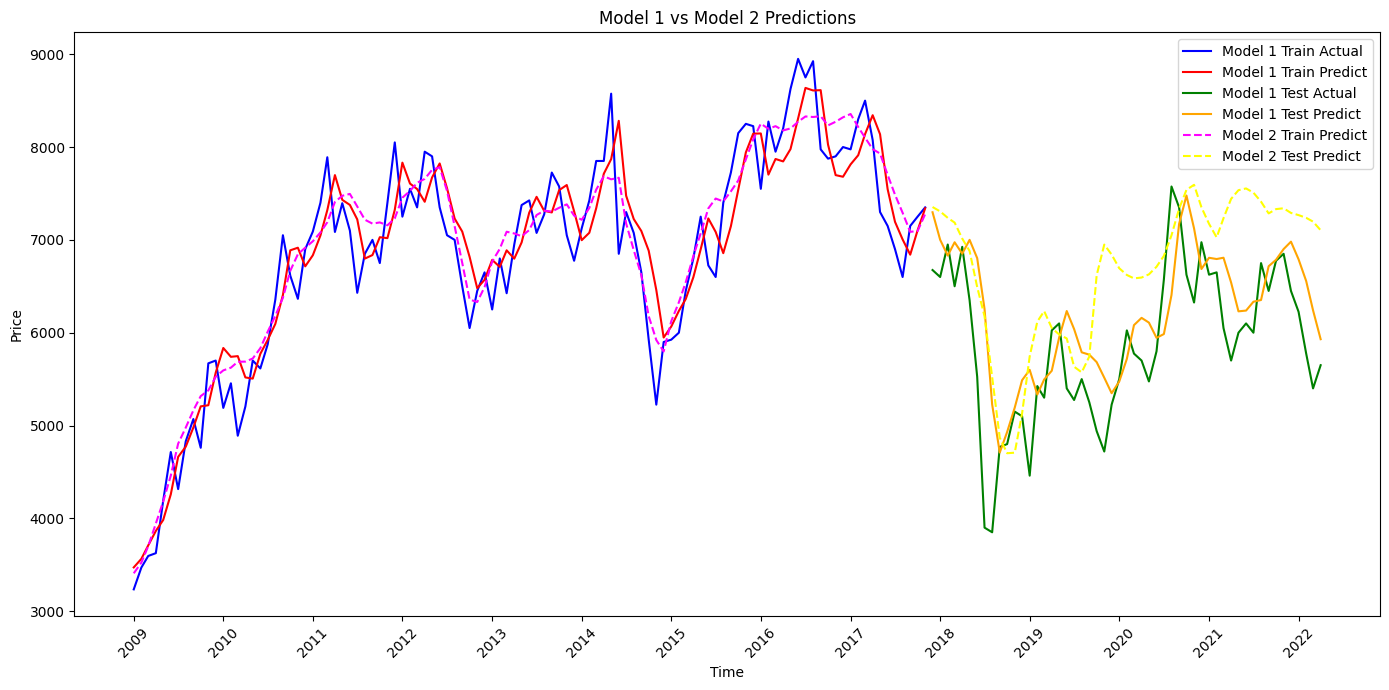

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.dates as mdates

def create_dataset(dataset, roa=None, income_margin=None, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = [dataset[i:(i + look_back), 0]]  # Start with the price data
        if roa is not None:
            a.append(roa[i:(i + look_back)])
        if income_margin is not None:
            a.append(income_margin[i:(i + look_back)])
        a = np.column_stack(a)  # Stack only if there are additional features
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, roa, income_margin, train_size=0.65, scale=True, delay=3):
    prices = np.array(prices).reshape(-1, 1)  # Ensure prices is a 2D NumPy array
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]
    train_roa, test_roa = roa[:split_point], roa[split_point:]
    train_income_margin, test_income_margin = income_margin[:split_point], income_margin[split_point:]

    # Apply the delay to the fundamental data
    train_roa = np.roll(train_roa, delay)
    train_income_margin = np.roll(train_income_margin, delay)
    test_roa = np.roll(test_roa, delay)
    test_income_margin = np.roll(test_income_margin, delay)

    # Fill the first 'delay' elements with the first value to avoid NaNs after rolling
    train_roa[:delay] = train_roa[delay]
    train_income_margin[:delay] = train_income_margin[delay]
    test_roa[:delay] = test_roa[delay]
    test_income_margin[:delay] = test_income_margin[delay]

    scaler = MinMaxScaler(feature_range=(0, 1))

    train_prices_scaled = scaler.fit_transform(train_prices)
    test_prices_scaled = scaler.transform(test_prices)

    feature_scalers = []
    features = [train_roa, train_income_margin]

    for feature in features:
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        feature_scaler.fit(np.array(feature).reshape(-1, 1))
        feature_scalers.append(feature_scaler)

    def scale_features(features, feature_scalers):
        scaled_features = []
        for feature, scaler in zip(features, feature_scalers):
            scaled_features.append(scaler.transform(np.array(feature).reshape(-1, 1)).flatten())
        return scaled_features

    train_features_scaled = scale_features(features, feature_scalers)
    test_features_scaled = scale_features([test_roa, test_income_margin], feature_scalers)

    return (train_prices_scaled, test_prices_scaled) + tuple(train_features_scaled) + tuple(test_features_scaled), scaler

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error (SMAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    trainMAPE = mean_absolute_percentage_error(trainY, trainPredict)
    testMAPE = mean_absolute_percentage_error(testY, testPredict)

    trainSMAPE = smape(trainY, trainPredict)
    testSMAPE = smape(testY, testPredict)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict

def train1(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Pass prices for all to maintain shape for splitting
    split_data, scaler = train_test_split(prices, prices, prices)
    train_prices, test_prices = split_data[:2]

    X_train, Y_train = create_dataset(train_prices, look_back=look_back)
    X_test, Y_test = create_dataset(test_prices, look_back=look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 1): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 1): {testScore:.2f} RMSE')
    print(f'Train MAPE (Model 1): {trainMAPE:.2f}%')
    print(f'Test MAPE (Model 1): {testMAPE:.2f}%')
    print(f'Train SMAPE (Model 1): {trainSMAPE:.2f}%')
    print(f'Test SMAPE (Model 1): {testSMAPE:.2f}%')

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict

def train2(df, roa, income_margin, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    split_data, scaler = train_test_split(prices, roa, income_margin)

    train_prices_scaled, test_prices_scaled, *features_scaled = split_data

    X_train, Y_train = create_dataset(train_prices_scaled, *features_scaled[:2], look_back)
    X_test, Y_test = create_dataset(test_prices_scaled, *features_scaled[2:], look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 2): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 2): {testScore:.2f} RMSE')
    print(f'Train MAPE (Model 2): {trainMAPE:.2f}%')
    print(f'Test MAPE (Model 2): {testMAPE:.2f}%')
    print(f'Train SMAPE (Model 2): {trainSMAPE:.2f}%')
    print(f'Test SMAPE (Model 2): {testSMAPE:.2f}%')

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict

roa_data = {
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183]
}
im_data = {
    'Income_Margin': [0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0353, 0.0353, 0.0353, 0.0369, 0.0369, 0.0369, 0.0363, 0.0363, 0.0363, 0.0348, 0.0348, 0.0348, 0.0343, 0.0343, 0.0343, 0.037, 0.037, 0.037, 0.0365, 0.0365, 0.0365, 0.0305, 0.0305, 0.0305, 0.0313, 0.0313, 0.0313, 0.0294, 0.0294, 0.0294, 0.0303, 0.0303, 0.0303, 0.0293, 0.0293, 0.0293, 0.026, 0.026, 0.026, 0.0257, 0.0257, 0.0257, 0.0274, 0.0274, 0.0274, 0.0264, 0.0264, 0.0264, 0.0249, 0.0249, 0.0249, 0.0263, 0.0263, 0.0263, 0.0248, 0.0248, 0.0248, 0.0239, 0.0239, 0.0239, 0.0213, 0.0213, 0.0213, 0.023, 0.023, 0.023, 0.0221, 0.0221, 0.0221, 0.0242, 0.0242, 0.0242, 0.0224, 0.0224, 0.0224, 0.0236, 0.0236, 0.0236, 0.0233, 0.0233, 0.0233, 0.0249, 0.0249, 0.0249, 0.0231, 0.0231, 0.0231, 0.0255, 0.0255, 0.0255, 0.0243, 0.0243, 0.0243, 0.0227, 0.0227, 0.0227, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0214, 0.0214, 0.0214, 0.02, 0.02, 0.02, 0.0204, 0.0204, 0.0204, 0.0205, 0.0205, 0.0205, 0.0192, 0.0192, 0.0192, 0.018, 0.018, 0.018, 0.0189, 0.0189, 0.0189, 0.0194, 0.0194, 0.0194, 0.0211, 0.0211, 0.0211, 0.018, 0.018, 0.018, 0.0232, 0.0232, 0.0232, 0.0262, 0.0262, 0.0262, 0.029, 0.029, 0.029, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0304, 0.0304, 0.0304, 0.0305, 0.0305, 0.0305, 0.0273, 0.0273, 0.0273, 0.0277, 0.0277, 0.0277, 0.0275, 0.0275, 0.0275, 0.0287, 0.0287, 0.0287, 0.0266, 0.0266, 0.0266, 0.0252, 0.0252, 0.0252, 0.0257, 0.0257, 0.0257]
}

df_1_close = preprocessing(df_1)

# Assuming df_1_close, roa_data['ROA'], and im_data['Income_Margin'] are defined and prepared
train1_trainScore, train1_testScore, train1_trainMAPE, train1_testMAPE, train1_trainSMAPE, train1_testSMAPE, train1_trainY, train1_trainPredict, train1_testY, train1_testPredict = train1(df_1_close) # Unpack into 10 variables
train2_trainScore, train2_testScore, train2_trainMAPE, train2_testMAPE, train2_trainSMAPE, train2_testSMAPE, train2_trainY, train2_trainPredict, train2_testY, train2_testPredict = train2(df_1_close, roa_data['ROA'], im_data['Income_Margin']) # Similar change for train2

# RMSE, MAPE, and SMAPE scores
rmse_mape_smape_data = [
    ["Model 1", train1_trainScore, train1_testScore, train1_trainMAPE, train1_testMAPE, train1_trainSMAPE, train1_testSMAPE],
    ["Model 2", train2_trainScore, train2_testScore, train2_trainMAPE, train2_testMAPE, train2_trainSMAPE, train2_testSMAPE]
]

# Table headers
headers = ["Model", "Train RMSE", "Test RMSE", "Train MAPE (%)", "Test MAPE (%)", "Train SMAPE (%)", "Test SMAPE (%)"]

# Print table
print("RMSE, MAPE, and SMAPE Comparison:")
print(tabulate(rmse_mape_smape_data, headers=headers, floatfmt=(".2f", ".2f", ".2f", ".2f", ".2f", ".2f")))

def plot_predictions_combined(trainY1, trainPredict1, testY1, testPredict1, trainY2, trainPredict2, testY2, testPredict2, title, train_time_index, test_time_index):
    plt.figure(figsize=(14, 7))

    # Plot actual and predicted values for Model 1
    plt.plot(train_time_index, trainY1, label='Model 1 Train Actual', color='blue')
    plt.plot(train_time_index, trainPredict1, label='Model 1 Train Predict', color='red')
    plt.plot(test_time_index, testY1, label='Model 1 Test Actual', color='green')
    plt.plot(test_time_index, testPredict1, label='Model 1 Test Predict', color='orange')

    # Plot actual and predicted values for Model 2
    plt.plot(train_time_index, trainPredict2, label='Model 2 Train Predict', color='magenta', linestyle='dashed')
    plt.plot(test_time_index, testPredict2, label='Model 2 Test Predict', color='yellow', linestyle='dashed')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Set major ticks to show every year
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Combine the predictions for both models into a single plot
plot_predictions_combined(train1_trainY, train1_trainPredict, train1_testY, train1_testPredict,
                          train2_trainY, train2_trainPredict, train2_testY, train2_testPredict,
                          'Model 1 vs Model 2 Predictions', train_time_index, test_time_index)

###Delay on PCA 4 & 8 Component

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 245ms/step - loss: 0.0902
Epoch 2/150
7/7 - 0s - 18ms/step - loss: 0.0593
Epoch 3/150
7/7 - 0s - 9ms/step - loss: 0.0506
Epoch 4/150
7/7 - 0s - 19ms/step - loss: 0.0458
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0388
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0333
Epoch 7/150
7/7 - 0s - 9ms/step - loss: 0.0289
Epoch 8/150
7/7 - 0s - 7ms/step - loss: 0.0257
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0227
Epoch 10/150
7/7 - 0s - 9ms/step - loss: 0.0204
Epoch 11/150
7/7 - 0s - 19ms/step - loss: 0.0190
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0192
Epoch 13/150
7/7 - 0s - 7ms/step - loss: 0.0174
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0178
Epoch 15/150
7/7 - 0s - 7ms/step - loss: 0.0175
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0181
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0168
Epoch 18/150
7/7 - 0s - 10ms/step - loss: 0.0168
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0154
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0154
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0146
Epoch 2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 249ms/step - loss: 0.0586
Epoch 2/150
7/7 - 0s - 18ms/step - loss: 0.0374
Epoch 3/150
7/7 - 0s - 8ms/step - loss: 0.0327
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0291
Epoch 5/150
7/7 - 0s - 9ms/step - loss: 0.0255
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0231
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0209
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0186
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0173
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0155
Epoch 11/150
7/7 - 0s - 7ms/step - loss: 0.0135
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0131
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0124
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0109
Epoch 15/150
7/7 - 0s - 7ms/step - loss: 0.0108
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0103
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0103
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0092
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0095
Epoch 20/150
7/7 - 0s - 9ms/step - loss: 0.0092
Epoch 21/150
7/7 - 0s - 10ms/step - loss: 0.0088
Epoch 22

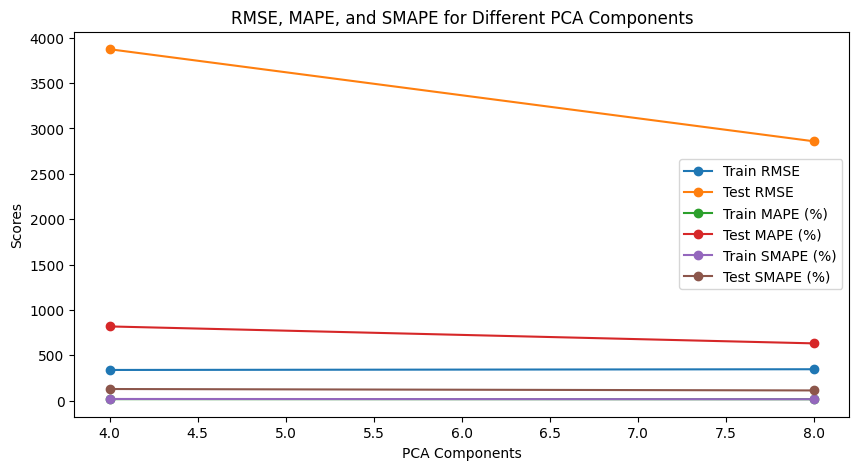

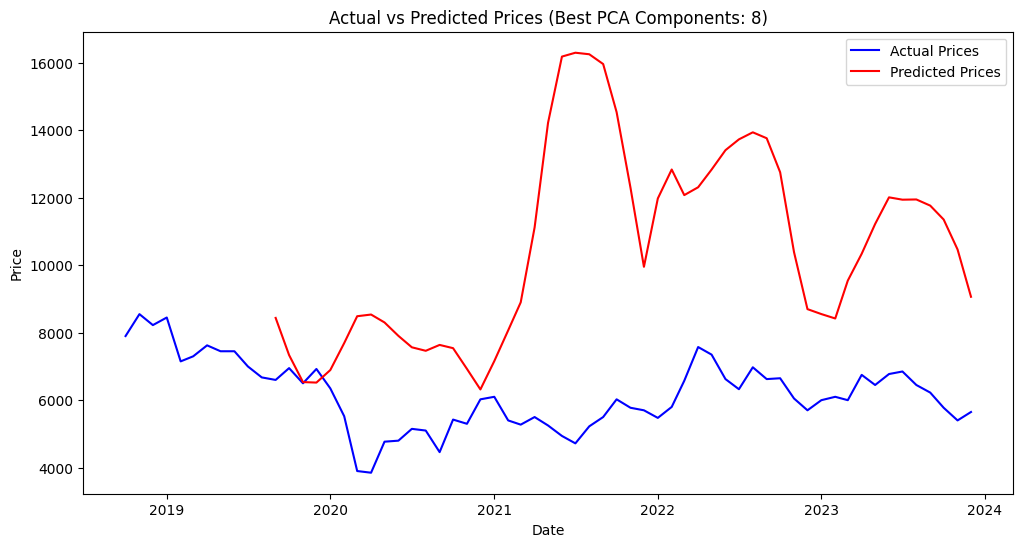

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Define the functions for dataset creation, model training, and evaluation

def create_dataset(dataset, look_back=5, fundamental_delay=0):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1 - fundamental_delay):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back + fundamental_delay, :])  # Include all PCA components in the target
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65, scale=True):
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if scale:
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices)
        test_prices_scaled = scaler.transform(test_prices)
    else:
        train_prices_scaled = train_prices
        test_prices_scaled = test_prices

    return train_prices_scaled, test_prices_scaled, scaler

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler, n_features):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    padding = np.zeros((trainPredict.shape[0], n_features - trainPredict.shape[1]))
    trainPredict = scaler.inverse_transform(np.column_stack((trainPredict, padding)))
    trainY = scaler.inverse_transform(np.column_stack((Y_train, padding)))

    padding = np.zeros((testPredict.shape[0], n_features - testPredict.shape[1]))
    testPredict = scaler.inverse_transform(np.column_stack((testPredict, padding)))
    testY = scaler.inverse_transform(np.column_stack((Y_test, padding)))

    trainScore = np.sqrt(mean_squared_error(trainY[:, 0], trainPredict[:, 0]))
    testScore = np.sqrt(mean_squared_error(testY[:, 0], testPredict[:, 0]))

    # Calculate MAPE
    trainMAPE = mean_absolute_percentage_error(trainY[:, 0], trainPredict[:, 0]) * 100
    testMAPE = mean_absolute_percentage_error(testY[:, 0], testPredict[:, 0]) * 100

    # Calculate SMAPE
    trainSMAPE = smape(trainY[:, 0], trainPredict[:, 0])
    testSMAPE = smape(testY[:, 0], testPredict[:, 0])

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE

# Function to train the model with PCA components specified
def train_with_pca_components(df, roe_data, roa_data, de_data, fl_data, cr_data, qr_data, itr_data, rtr_data, pca_components=4, look_back=10, fundamental_delay=0, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    roe_data_array = np.array(list(roe_data.values())).reshape(-1, 1)
    roa_data_array = np.array(list(roa_data.values())).reshape(-1, 1)
    de_data_array = np.array(list(de_data.values())).reshape(-1, 1)
    fl_data_array = np.array(list(fl_data.values())).reshape(-1, 1)
    cr_data_array = np.array(list(cr_data.values())).reshape(-1, 1)
    qr_data_array = np.array(list(qr_data.values())).reshape(-1, 1)
    itr_data_array = np.array(list(itr_data.values())).reshape(-1, 1)
    rtr_data_array = np.array(list(rtr_data.values())).reshape(-1, 1)

    if not (len(roe_data_array) == len(roa_data_array) == len(de_data_array) == len(fl_data_array) ==
            len(cr_data_array) == len(qr_data_array) == len(itr_data_array) == len(rtr_data_array) == len(prices)):
        raise ValueError("All data arrays must be the same length as the 'prices' array.")

    combined_data = np.column_stack((prices, roe_data_array, roa_data_array, de_data_array,
                                     fl_data_array, cr_data_array, qr_data_array,
                                     itr_data_array, rtr_data_array))

    train_prices, test_prices, scaler = train_test_split(combined_data)

    pca = PCA(n_components=pca_components)
    train_prices_pca = pca.fit_transform(train_prices)
    test_prices_pca = pca.transform(test_prices)

    X_train, Y_train = create_dataset(train_prices_pca, look_back, fundamental_delay)
    X_test, Y_test = create_dataset(test_prices_pca, look_back, fundamental_delay)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    n_features = combined_data.shape[1]
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler, n_features)

    predicted_prices_pca = model.predict(X_test)
    predicted_prices = pca.inverse_transform(predicted_prices_pca)
    predicted_prices = scaler.inverse_transform(predicted_prices)[:, 0]

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, predicted_prices, test_prices, scaler

# Example usage for both PCA configurations

df_1_close = preprocessing(df_1)  # Assuming df_1 is your dataframe

# Store the results for different PCA configurations
results = []
pca_components_list = [4, 8]

# Extract your additional financial data here
roe_data = {
    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410]
}

roa_data = {
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183]
}

de_data = {
    'Debt_to_Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47]
}

fl_data = {
    'Financial_Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24]
}
cr_data = {
    'Current_Ratio': [1.39, 1.39, 1.39, 1.29, 1.29, 1.29, 1.4, 1.4, 1.4, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.21, 1.21, 1.21, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.36, 1.36, 1.36, 1.42, 1.42, 1.42, 1.32, 1.32, 1.32, 1.36, 1.36, 1.36, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.36, 1.36, 1.36, 1.4, 1.4, 1.4, 1.35, 1.35, 1.35, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.24, 1.24, 1.24, 1.25, 1.25, 1.25, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.32, 1.32, 1.32, 1.41, 1.41, 1.41, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.38, 1.38, 1.38, 1.37, 1.37, 1.37, 1.34, 1.34, 1.34, 1.36, 1.36, 1.36, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.13, 1.13, 1.13, 1.1, 1.1, 1.1, 1.23, 1.23, 1.23, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.23, 1.23, 1.23, 1.15, 1.15, 1.15, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.26, 1.26, 1.26, 1.29, 1.29, 1.29, 1.37, 1.37, 1.37, 1.49, 1.49, 1.49, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.47, 1.47, 1.47, 1.51, 1.51, 1.51, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54, 1.46, 1.46, 1.46, 1.51, 1.51, 1.51, 1.53, 1.53, 1.53, 1.31, 1.31, 1.31, 1.18, 1.18, 1.18, 1.33, 1.33, 1.33]
}
qr_data = {
    'Quick_Ratio': [1.1, 1.1, 1.1, 1.04, 1.04, 1.04, 1.14, 1.14, 1.14, 1.1, 1.1, 1.1, 1.15, 1.15, 1.15, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.97, 0.97, 0.97, 1.12, 1.12, 1.12, 1.21, 1.21, 1.21, 1.11, 1.11, 1.11, 1.12, 1.12, 1.12, 1.23, 1.23, 1.23, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.02, 1.02, 1.02, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.09, 1.09, 1.09, 1.17, 1.17, 1.17, 1.12, 1.12, 1.12, 1.08, 1.08, 1.08, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.16, 1.16, 1.16, 1.04, 1.04, 1.04, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 1.15, 1.15, 1.15, 1.09, 1.09, 1.09, 1.02, 1.02, 1.02, 0.92, 0.92, 0.92, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.02, 1.02, 1.02, 1.05, 1.05, 1.05, 1.09, 1.09, 1.09, 1.24, 1.24, 1.24, 1.31, 1.31, 1.31, 1.33, 1.33, 1.33, 1.3, 1.3, 1.3, 1.33, 1.33, 1.33, 1.36, 1.36, 1.36, 1.33, 1.33, 1.33, 1.37, 1.37, 1.37, 1.32, 1.32, 1.32, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.07, 1.07, 1.07, 0.94, 0.94, 0.94, 1.02, 1.02, 1.02]
}
itr_data = {
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55]
}
rtr_data = {
    'RTR': [12.17, 12.17, 12.17, 14.05, 14.05, 14.05, 13.96, 13.96, 13.96, 11.68, 11.68, 11.68, 10.94, 10.94, 10.94, 10.61, 10.61, 10.61, 11.36, 11.36, 11.36, 12.29, 12.29, 12.29, 11.22, 11.22, 11.22, 10.9, 10.9, 10.9, 11.26, 11.26, 11.26, 10.51, 10.51, 10.51, 10.05, 10.05, 10.05, 10.76, 10.76, 10.76, 11.12, 11.12, 11.12, 10.3, 10.3, 10.3, 8.25, 8.25, 8.25, 8.49, 8.49, 8.49, 9.6, 9.6, 9.6, 11.81, 11.81, 11.81, 10.13, 10.13, 10.13, 9.76, 9.76, 9.76, 9.66, 9.66, 9.66, 10.77, 10.77, 10.77, 8.23, 8.23, 8.23, 9.31, 9.31, 9.31, 10.11, 10.11, 10.11, 9.71, 9.71, 9.71, 8.07, 8.07, 8.07, 8.82, 8.82, 8.82, 9.74, 9.74, 9.74, 11.83, 11.83, 11.83, 8.64, 8.64, 8.64, 8.56, 8.56, 8.56, 10.69, 10.69, 10.69, 9.78, 9.78, 9.78, 10.76, 10.76, 10.76, 11.39, 11.39, 11.39, 12.41, 12.41, 12.41, 10.36, 10.36, 10.36, 11.6, 11.6, 11.6, 10.34, 10.34, 10.34, 11.18, 11.18, 11.18, 11.01, 11.01, 11.01, 10.61, 10.61, 10.61, 5.81, 5.81, 5.81, 7.14, 7.14, 7.14, 4.84, 4.84, 4.84, 8.75, 8.75, 8.75, 11.49, 11.49, 11.49, 12.26, 12.26, 12.26, 10.97, 10.97, 10.97, 12.72, 12.72, 12.72, 15.84, 15.84, 15.84, 13.27, 13.27, 13.27, 14.22, 14.22, 14.22, 13.0, 13.0, 13.0, 15.04, 15.04, 15.04, 12.37, 12.37, 12.37, 15.64, 15.64, 15.64]
}

for pca_components in pca_components_list:
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, predicted_prices, test_prices, scaler = train_with_pca_components(
        df_1_close, roe_data, roa_data, de_data, fl_data, cr_data, qr_data, itr_data, rtr_data, pca_components=pca_components
    )
    results.append((pca_components, trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, predicted_prices, test_prices, scaler))

rmse_df = pd.DataFrame(results, columns=['PCA Components', 'Train RMSE', 'Test RMSE', 'Train MAPE (%)', 'Test MAPE (%)', 'Train SMAPE (%)', 'Test SMAPE (%)', 'Predicted Prices', 'Test Prices', 'Scaler'])

rmse_plot_df = rmse_df[['PCA Components', 'Train RMSE', 'Test RMSE', 'Train MAPE (%)', 'Test MAPE (%)', 'Train SMAPE (%)', 'Test SMAPE (%)']]

print(rmse_plot_df)

plt.figure(figsize=(10, 5))
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Train RMSE'], marker='o', label='Train RMSE')
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Test RMSE'], marker='o', label='Test RMSE')
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Train MAPE (%)'], marker='o', label='Train MAPE (%)')
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Test MAPE (%)'], marker='o', label='Test MAPE (%)')
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Train SMAPE (%)'], marker='o', label='Train SMAPE (%)')
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Test SMAPE (%)'], marker='o', label='Test SMAPE (%)')
plt.xlabel('PCA Components')
plt.ylabel('Scores')
plt.title('RMSE, MAPE, and SMAPE for Different PCA Components')
plt.legend()
plt.show()

best_pca_components = pca_components_list[rmse_plot_df['Test RMSE'].idxmin()]
best_pca_components, _, _, _, _, _, _, best_predicted_prices, best_test_prices, best_scaler = results[rmse_plot_df['Test RMSE'].idxmin()]

test_dates = df_1_close.index[-len(best_test_prices):]
actual_prices = best_scaler.inverse_transform(best_test_prices)[:, 0]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
plt.plot(test_dates[-len(best_predicted_prices):], best_predicted_prices, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Actual vs Predicted Prices (Best PCA Components: {best_pca_components})')
plt.legend()
plt.show()

##Tugas Tambahan 6

###LSTM dan 2 Data Fundamental (BBCA)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 254ms/step - loss: 0.0682
Epoch 2/150
7/7 - 0s - 8ms/step - loss: 0.0140
Epoch 3/150
7/7 - 0s - 8ms/step - loss: 0.0077
Epoch 4/150
7/7 - 0s - 10ms/step - loss: 0.0060
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0044
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0030
Epoch 7/150
7/7 - 0s - 8ms/step - loss: 0.0025
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0024
Epoch 9/150
7/7 - 0s - 20ms/step - loss: 0.0022
Epoch 10/150
7/7 - 0s - 11ms/step - loss: 0.0021
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0020
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0021
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0021
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0026
Epoch 15/150
7/7 - 0s - 20ms/step - loss: 0.0021
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0020
Epoch 17/150
7/7 - 0s - 10ms/step - loss: 0.0023
Epoch 18/150
7/7 - 0s - 10ms/step - loss: 0.0021
Epoch 19/150
7/7 - 0s - 19ms/step - loss: 0.0023
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0020
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0023
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 256ms/step - loss: 0.0762
Epoch 2/150
7/7 - 0s - 8ms/step - loss: 0.0215
Epoch 3/150
7/7 - 0s - 8ms/step - loss: 0.0095
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0079
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0052
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0035
Epoch 7/150
7/7 - 0s - 10ms/step - loss: 0.0028
Epoch 8/150
7/7 - 0s - 19ms/step - loss: 0.0022
Epoch 9/150
7/7 - 0s - 9ms/step - loss: 0.0021
Epoch 10/150
7/7 - 0s - 20ms/step - loss: 0.0022
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0024
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0024
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0022
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0020
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0023
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0020
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0020
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0023
Epoch 19/150
7/7 - 0s - 20ms/step - loss: 0.0024
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0019
Epoch 21/150
7/7 - 0s - 9ms/step - loss: 0.0020
Epoch

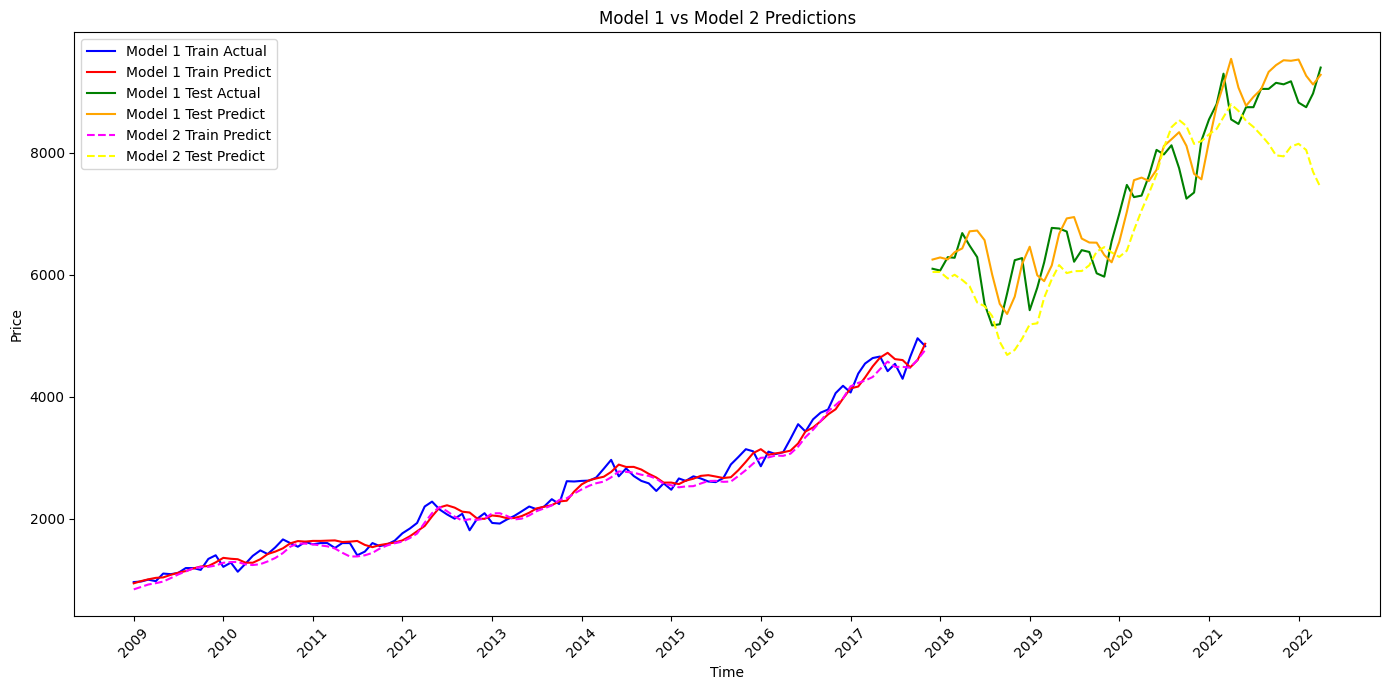

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.dates as mdates

def create_dataset(dataset, roa=None, income_margin=None, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = [dataset[i:(i + look_back), 0]]  # Start with the price data
        if roa is not None:
            a.append(roa[i:(i + look_back)])
        if income_margin is not None:
            a.append(income_margin[i:(i + look_back)])
        a = np.column_stack(a)  # Stack only if there are additional features
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, roa, income_margin, train_size=0.65, scale=True, delay=3):
    prices = np.array(prices).reshape(-1, 1)  # Ensure prices is a 2D NumPy array
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]
    train_roa, test_roa = roa[:split_point], roa[split_point:]
    train_income_margin, test_income_margin = income_margin[:split_point], income_margin[split_point:]

    # Apply the delay to the fundamental data
    train_roa = np.roll(train_roa, delay)
    train_income_margin = np.roll(train_income_margin, delay)
    test_roa = np.roll(test_roa, delay)
    test_income_margin = np.roll(test_income_margin, delay)

    # Fill the first 'delay' elements with the first value to avoid NaNs after rolling
    train_roa[:delay] = train_roa[delay]
    train_income_margin[:delay] = train_income_margin[delay]
    test_roa[:delay] = test_roa[delay]
    test_income_margin[:delay] = test_income_margin[delay]

    scaler = MinMaxScaler(feature_range=(0, 1))

    train_prices_scaled = scaler.fit_transform(train_prices)
    test_prices_scaled = scaler.transform(test_prices)

    feature_scalers = []
    features = [train_roa, train_income_margin]

    for feature in features:
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        feature_scaler.fit(np.array(feature).reshape(-1, 1))
        feature_scalers.append(feature_scaler)

    def scale_features(features, feature_scalers):
        scaled_features = []
        for feature, scaler in zip(features, feature_scalers):
            scaled_features.append(scaler.transform(np.array(feature).reshape(-1, 1)).flatten())
        return scaled_features

    train_features_scaled = scale_features(features, feature_scalers)
    test_features_scaled = scale_features([test_roa, test_income_margin], feature_scalers)

    return (train_prices_scaled, test_prices_scaled) + tuple(train_features_scaled) + tuple(test_features_scaled), scaler

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error (SMAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    trainMAPE = mean_absolute_percentage_error(trainY, trainPredict)
    testMAPE = mean_absolute_percentage_error(testY, testPredict)

    trainSMAPE = smape(trainY, trainPredict)
    testSMAPE = smape(testY, testPredict)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict

def train1(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Pass prices for all to maintain shape for splitting
    split_data, scaler = train_test_split(prices, prices, prices)
    train_prices, test_prices = split_data[:2]

    X_train, Y_train = create_dataset(train_prices, look_back=look_back)
    X_test, Y_test = create_dataset(test_prices, look_back=look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 1): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 1): {testScore:.2f} RMSE')
    print(f'Train MAPE (Model 1): {trainMAPE:.2f}%')
    print(f'Test MAPE (Model 1): {testMAPE:.2f}%')
    print(f'Train SMAPE (Model 1): {trainSMAPE:.2f}%')
    print(f'Test SMAPE (Model 1): {testSMAPE:.2f}%')

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict

def train2(df, roa, income_margin, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    split_data, scaler = train_test_split(prices, roa, income_margin)

    train_prices_scaled, test_prices_scaled, *features_scaled = split_data

    X_train, Y_train = create_dataset(train_prices_scaled, *features_scaled[:2], look_back)
    X_test, Y_test = create_dataset(test_prices_scaled, *features_scaled[2:], look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 2): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 2): {testScore:.2f} RMSE')
    print(f'Train MAPE (Model 2): {trainMAPE:.2f}%')
    print(f'Test MAPE (Model 2): {testMAPE:.2f}%')
    print(f'Train SMAPE (Model 2): {trainSMAPE:.2f}%')
    print(f'Test SMAPE (Model 2): {testSMAPE:.2f}%')

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict

roa_data = {
    'ROA': [0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0061, 0.0061, 0.0061, 0.0068, 0.0068, 0.0068, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0073, 0.0073, 0.0073, 0.0062, 0.0062, 0.0062, 0.0082, 0.0082, 0.0082, 0.0079, 0.0079, 0.0079, 0.0083, 0.0083, 0.0083, 0.0057, 0.0057, 0.0057, 0.0073, 0.0073, 0.0073, 0.007, 0.007, 0.007, 0.0078, 0.0078, 0.0078, 0.0065, 0.0065, 0.0065, 0.0075, 0.0075, 0.0075, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.008, 0.008, 0.008, 0.0081, 0.0081, 0.0081, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0075, 0.0075, 0.0075, 0.0081, 0.0081, 0.0081, 0.0084, 0.0084, 0.0084, 0.0081, 0.0081, 0.0081, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0085, 0.0085, 0.0085, 0.0086, 0.0086, 0.0086, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.009, 0.009, 0.009, 0.0083, 0.0083, 0.0083, 0.0068, 0.0068, 0.0068, 0.0058, 0.0058, 0.0058, 0.0078, 0.0078, 0.0078, 0.0066, 0.0066, 0.0066, 0.0065, 0.0065, 0.0065, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0067, 0.0067, 0.0067, 0.0064, 0.0064, 0.0064, 0.0079, 0.0079, 0.0079, 0.0085, 0.0085, 0.0085, 0.009, 0.009, 0.009, 0.0087, 0.0087, 0.0087, 0.0093, 0.0093, 0.0093, 0.0089, 0.0089, 0.0089, 0.0087, 0.0087, 0.0087, 0.0089, 0.0089, 0.0089]
}
im_data = {
    'Income_Margin': [0.3515, 0.3515, 0.3515, 0.3433, 0.3433, 0.3433, 0.3688, 0.3688, 0.3688, 0.4236, 0.4236, 0.4236, 0.4946, 0.4946, 0.4946, 0.5318, 0.5318, 0.5318, 0.4885, 0.4885, 0.4885, 0.5027, 0.5027, 0.5027, 0.4398, 0.4398, 0.4398, 0.5677, 0.5677, 0.5677, 0.5431, 0.5431, 0.5431, 0.6059, 0.6059, 0.6059, 0.4322, 0.4322, 0.4322, 0.5355, 0.5355, 0.5355, 0.5184, 0.5184, 0.5184, 0.2875, 0.2875, 0.2875, 0.3813, 0.3813, 0.3813, 0.4305, 0.4305, 0.4305, 0.4314, 0.4314, 0.4314, 0.416, 0.416, 0.416, 0.3862, 0.3862, 0.3862, 0.404, 0.404, 0.404, 0.4144, 0.4144, 0.4144, 0.3765, 0.3765, 0.3765, 0.3749, 0.3749, 0.3749, 0.402, 0.402, 0.402, 0.4264, 0.4264, 0.4264, 0.3732, 0.3732, 0.3732, 0.3769, 0.3769, 0.3769, 0.4179, 0.4179, 0.4179, 0.4434, 0.4434, 0.4434, 0.4938, 0.4938, 0.4938, 0.3981, 0.3981, 0.3981, 0.4265, 0.4265, 0.4265, 0.4661, 0.4661, 0.4661, 0.5307, 0.5307, 0.5307, 0.413, 0.413, 0.413, 0.4436, 0.4436, 0.4436, 0.4806, 0.4806, 0.4806, 0.564, 0.564, 0.564, 0.3982, 0.3982, 0.3982, 0.4254, 0.4254, 0.4254, 0.4929, 0.4929, 0.4929, 0.565, 0.565, 0.565, 0.3644, 0.3644, 0.3644, 0.3509, 0.3509, 0.3509, 0.4787, 0.4787, 0.4787, 0.5425, 0.5425, 0.5425, 0.4223, 0.4223, 0.4223, 0.4451, 0.4451, 0.4451, 0.5233, 0.5233, 0.5233, 0.5508, 0.5508, 0.5508, 0.4731, 0.4731, 0.4731, 0.5792, 0.5792, 0.5792, 0.5908, 0.5908, 0.5908, 0.6216, 0.6216, 0.6216, 0.5542, 0.5542, 0.5542, 0.592, 0.592, 0.592, 0.5584, 0.5584, 0.5584, 0.611, 0.611, 0.611]
}

df_1_close = preprocessing(df_2)

# Assuming df_1_close, roa_data['ROA'], and im_data['Income_Margin'] are defined and prepared
train1_trainScore, train1_testScore, train1_trainMAPE, train1_testMAPE, train1_trainSMAPE, train1_testSMAPE, train1_trainY, train1_trainPredict, train1_testY, train1_testPredict = train1(df_1_close) # Unpack into 10 variables
train2_trainScore, train2_testScore, train2_trainMAPE, train2_testMAPE, train2_trainSMAPE, train2_testSMAPE, train2_trainY, train2_trainPredict, train2_testY, train2_testPredict = train2(df_1_close, roa_data['ROA'], im_data['Income_Margin']) # Similar change for train2

# RMSE, MAPE, and SMAPE scores
rmse_mape_smape_data = [
    ["Model 1", train1_trainScore, train1_testScore, train1_trainMAPE, train1_testMAPE, train1_trainSMAPE, train1_testSMAPE],
    ["Model 2", train2_trainScore, train2_testScore, train2_trainMAPE, train2_testMAPE, train2_trainSMAPE, train2_testSMAPE]
]

# Table headers
headers = ["Model", "Train RMSE", "Test RMSE", "Train MAPE (%)", "Test MAPE (%)", "Train SMAPE (%)", "Test SMAPE (%)"]

# Print table
print("RMSE, MAPE, and SMAPE Comparison:")
print(tabulate(rmse_mape_smape_data, headers=headers, floatfmt=(".2f", ".2f", ".2f", ".2f", ".2f", ".2f")))

# RMSE, MAPE, and SMAPE scores
rmse_mape_smape_data = [
    ["Model 1", train1_trainScore, train1_testScore, train1_trainMAPE, train1_testMAPE, train1_trainSMAPE, train1_testSMAPE],
    ["Model 2", train2_trainScore, train2_testScore, train2_trainMAPE, train2_testMAPE, train2_trainSMAPE, train2_testSMAPE]
]

# Table headers
headers = ["Model", "Train RMSE", "Test RMSE", "Train MAPE (%)", "Test MAPE (%)", "Train SMAPE (%)", "Test SMAPE (%)"]

# Print table
print("RMSE, MAPE, and SMAPE Comparison:")
print(tabulate(rmse_mape_smape_data, headers=headers, floatfmt=(".2f", ".2f", ".2f", ".2f", ".2f", ".2f")))

def plot_predictions_combined(trainY1, trainPredict1, testY1, testPredict1, trainY2, trainPredict2, testY2, testPredict2, title, train_time_index, test_time_index):
    plt.figure(figsize=(14, 7))

    # Plot actual and predicted values for Model 1
    plt.plot(train_time_index, trainY1, label='Model 1 Train Actual', color='blue')
    plt.plot(train_time_index, trainPredict1, label='Model 1 Train Predict', color='red')
    plt.plot(test_time_index, testY1, label='Model 1 Test Actual', color='green')
    plt.plot(test_time_index, testPredict1, label='Model 1 Test Predict', color='orange')

    # Plot actual and predicted values for Model 2
    plt.plot(train_time_index, trainPredict2, label='Model 2 Train Predict', color='magenta', linestyle='dashed')
    plt.plot(test_time_index, testPredict2, label='Model 2 Test Predict', color='yellow', linestyle='dashed')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Set major ticks to show every year
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Combine the predictions for both models into a single plot
plot_predictions_combined(train1_trainY, train1_trainPredict, train1_testY, train1_testPredict,
                          train2_trainY, train2_trainPredict, train2_testY, train2_testPredict,
                          'Model 1 vs Model 2 Predictions', train_time_index, test_time_index)

###PCA 4 & 6 Component (BBCA)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 248ms/step - loss: 0.0598
Epoch 2/150
7/7 - 0s - 8ms/step - loss: 0.0451
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0386
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0360
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0335
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0320
Epoch 7/150
7/7 - 0s - 8ms/step - loss: 0.0304
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0294
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0280
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0277
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0273
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0264
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0248
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0239
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0239
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0229
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0212
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0199
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0194
Epoch 20/150
7/7 - 0s - 9ms/step - loss: 0.0190
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0194
Epoch 22/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 246ms/step - loss: 0.0483
Epoch 2/150
7/7 - 0s - 18ms/step - loss: 0.0289
Epoch 3/150
7/7 - 0s - 8ms/step - loss: 0.0254
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0245
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0229
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0214
Epoch 7/150
7/7 - 0s - 7ms/step - loss: 0.0210
Epoch 8/150
7/7 - 0s - 7ms/step - loss: 0.0197
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0190
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0184
Epoch 11/150
7/7 - 0s - 9ms/step - loss: 0.0182
Epoch 12/150
7/7 - 0s - 7ms/step - loss: 0.0169
Epoch 13/150
7/7 - 0s - 9ms/step - loss: 0.0167
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0166
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0156
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0160
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0150
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0153
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0135
Epoch 20/150
7/7 - 0s - 7ms/step - loss: 0.0147
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0124
Epoch 22/1

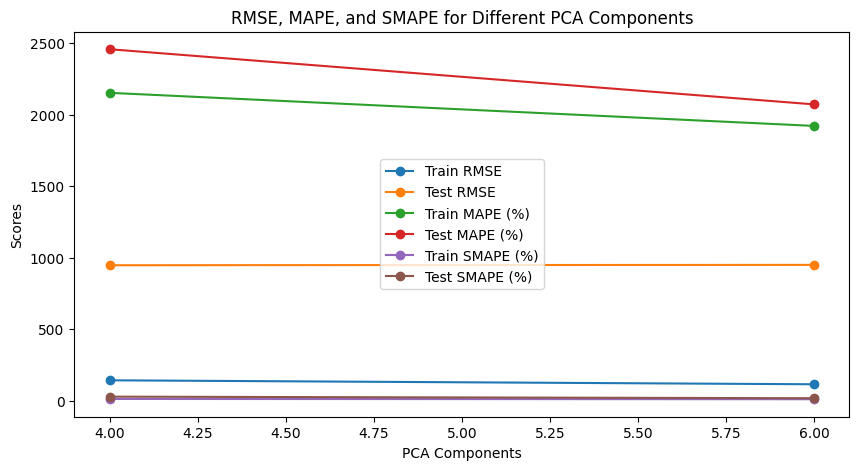

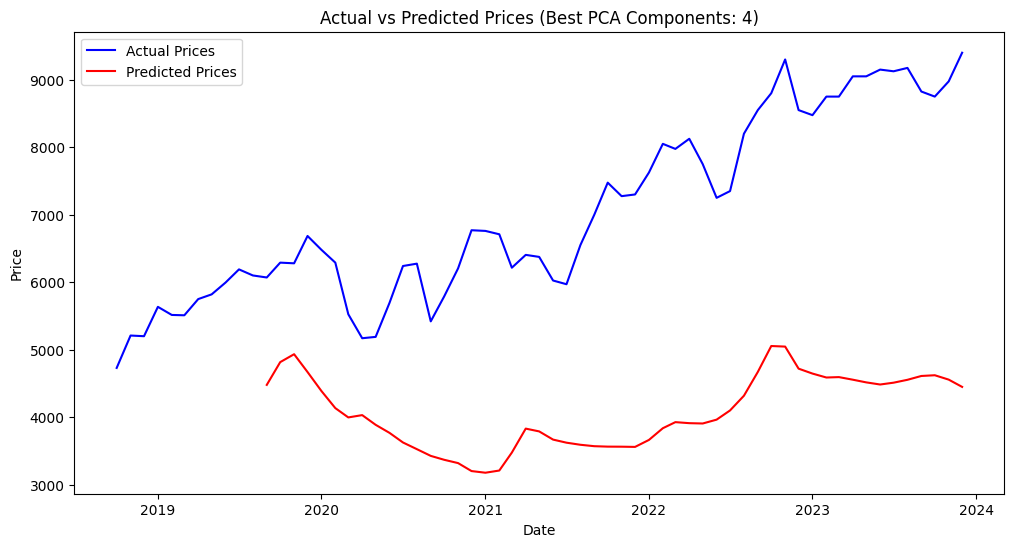

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Define the functions for dataset creation, model training, and evaluation

def create_dataset(dataset, look_back=5, fundamental_delay=0):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1 - fundamental_delay):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back + fundamental_delay, :])  # Include all PCA components in the target
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, train_size=0.65, scale=True):
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]

    if scale:
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_prices_scaled = scaler.fit_transform(train_prices)
        test_prices_scaled = scaler.transform(test_prices)
    else:
        train_prices_scaled = train_prices
        test_prices_scaled = test_prices

    return train_prices_scaled, test_prices_scaled, scaler

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(Y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler, n_features):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    padding = np.zeros((trainPredict.shape[0], n_features - trainPredict.shape[1]))
    trainPredict = scaler.inverse_transform(np.column_stack((trainPredict, padding)))
    trainY = scaler.inverse_transform(np.column_stack((Y_train, padding)))

    padding = np.zeros((testPredict.shape[0], n_features - testPredict.shape[1]))
    testPredict = scaler.inverse_transform(np.column_stack((testPredict, padding)))
    testY = scaler.inverse_transform(np.column_stack((Y_test, padding)))

    trainScore = np.sqrt(mean_squared_error(trainY[:, 0], trainPredict[:, 0]))
    testScore = np.sqrt(mean_squared_error(testY[:, 0], testPredict[:, 0]))

    # Calculate MAPE
    trainMAPE = mean_absolute_percentage_error(trainY[:, 0], trainPredict[:, 0]) * 100
    testMAPE = mean_absolute_percentage_error(testY[:, 0], testPredict[:, 0]) * 100

    # Calculate SMAPE
    trainSMAPE = smape(trainY[:, 0], trainPredict[:, 0])
    testSMAPE = smape(testY[:, 0], testPredict[:, 0])

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE

# Function to train the model with PCA components specified
def train_with_pca_components(df, roe_data, roa_data, fl_data, or_data, im_data, nm_data, pca_components=4, look_back=10, fundamental_delay=0, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    roe_data_array = np.array(list(roe_data.values())).reshape(-1, 1)
    roa_data_array = np.array(list(roa_data.values())).reshape(-1, 1)
    fl_data_array = np.array(list(fl_data.values())).reshape(-1, 1)
    or_data_array = np.array(list(or_data.values())).reshape(-1, 1)
    im_data_array = np.array(list(im_data.values())).reshape(-1, 1)
    nm_data_array = np.array(list(nm_data.values())).reshape(-1, 1)

    if not (len(roe_data_array) == len(roa_data_array) == len(fl_data_array) ==
            len(or_data_array) == len(im_data_array) == len(nm_data_array) == len(prices)):
        raise ValueError("All data arrays must be the same length as the 'prices' array.")

    combined_data = np.column_stack((prices, roe_data_array, roa_data_array, fl_data_array,
                                     or_data_array, im_data_array, nm_data_array))

    train_prices, test_prices, scaler = train_test_split(combined_data)

    pca = PCA(n_components=pca_components)
    train_prices_pca = pca.fit_transform(train_prices)
    test_prices_pca = pca.transform(test_prices)

    X_train, Y_train = create_dataset(train_prices_pca, look_back, fundamental_delay)
    X_test, Y_test = create_dataset(test_prices_pca, look_back, fundamental_delay)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    n_features = combined_data.shape[1]
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler, n_features)

    predicted_prices_pca = model.predict(X_test)
    predicted_prices = pca.inverse_transform(predicted_prices_pca)
    predicted_prices = scaler.inverse_transform(predicted_prices)[:, 0]

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, predicted_prices, test_prices, scaler

# Example usage for both PCA configurations

df_1_close = preprocessing(df_2)  # Assuming df_1 is your dataframe

# Store the results for different PCA configurations
results = []
pca_components_list = [4, 6]

# Extract your additional financial data here
roe_data = {
    'ROE': [0.0666, 0.0666, 0.0666, 0.0661, 0.0661, 0.0661, 0.0617, 0.0617, 0.0617, 0.0647, 0.0647, 0.0647, 0.0679, 0.0679, 0.0679, 0.0656, 0.0656, 0.0656, 0.0695, 0.0695, 0.0695, 0.0559, 0.0559, 0.0559, 0.0748, 0.0748, 0.0748, 0.072, 0.072, 0.072, 0.0753, 0.0753, 0.0753, 0.052, 0.052, 0.052, 0.0658, 0.0658, 0.0658, 0.0605, 0.0605, 0.0605, 0.0665, 0.0665, 0.0665, 0.0512, 0.0512, 0.0512, 0.0596, 0.0596, 0.0596, 0.066, 0.066, 0.066, 0.061, 0.061, 0.061, 0.054, 0.054, 0.054, 0.0596, 0.0596, 0.0596, 0.0583, 0.0583, 0.0583, 0.0552, 0.0552, 0.0552, 0.0509, 0.0509, 0.0509, 0.055, 0.055, 0.055, 0.0561, 0.0561, 0.0561, 0.052, 0.052, 0.052, 0.0447, 0.0447, 0.0447, 0.0491, 0.0491, 0.0491, 0.0509, 0.0509, 0.0509, 0.0487, 0.0487, 0.0487, 0.0422, 0.0422, 0.0422, 0.046, 0.046, 0.046, 0.0495, 0.0495, 0.0495, 0.0493, 0.0493, 0.0493, 0.0404, 0.0404, 0.0404, 0.0432, 0.0432, 0.0432, 0.0494, 0.0494, 0.0494, 0.0484, 0.0484, 0.0484, 0.0382, 0.0382, 0.0382, 0.0426, 0.0426, 0.0426, 0.048, 0.048, 0.048, 0.0439, 0.0439, 0.0439, 0.0383, 0.0383, 0.0383, 0.0335, 0.0335, 0.0335, 0.0435, 0.0435, 0.0435, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0396, 0.0396, 0.0396, 0.0442, 0.0442, 0.0442, 0.0406, 0.0406, 0.0406, 0.0414, 0.0414, 0.0414, 0.0492, 0.0492, 0.0492, 0.0515, 0.0515, 0.0515, 0.0533, 0.0533, 0.0533, 0.0546, 0.0546, 0.0546, 0.0564, 0.0564, 0.0564, 0.0519, 0.0519, 0.0519, 0.0504, 0.0504, 0.0504, 0.0567, 0.0567, 0.0567]
}

roa_data = {
    'ROA': [0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0061, 0.0061, 0.0061, 0.0068, 0.0068, 0.0068, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0073, 0.0073, 0.0073, 0.0062, 0.0062, 0.0062, 0.0082, 0.0082, 0.0082, 0.0079, 0.0079, 0.0079, 0.0083, 0.0083, 0.0083, 0.0057, 0.0057, 0.0057, 0.0073, 0.0073, 0.0073, 0.007, 0.007, 0.007, 0.0078, 0.0078, 0.0078, 0.0065, 0.0065, 0.0065, 0.0075, 0.0075, 0.0075, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.008, 0.008, 0.008, 0.0081, 0.0081, 0.0081, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0075, 0.0075, 0.0075, 0.0081, 0.0081, 0.0081, 0.0084, 0.0084, 0.0084, 0.0081, 0.0081, 0.0081, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0085, 0.0085, 0.0085, 0.0086, 0.0086, 0.0086, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.009, 0.009, 0.009, 0.0083, 0.0083, 0.0083, 0.0068, 0.0068, 0.0068, 0.0058, 0.0058, 0.0058, 0.0078, 0.0078, 0.0078, 0.0066, 0.0066, 0.0066, 0.0065, 0.0065, 0.0065, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0067, 0.0067, 0.0067, 0.0064, 0.0064, 0.0064, 0.0079, 0.0079, 0.0079, 0.0085, 0.0085, 0.0085, 0.009, 0.009, 0.009, 0.0087, 0.0087, 0.0087, 0.0093, 0.0093, 0.0093, 0.0089, 0.0089, 0.0089, 0.0087, 0.0087, 0.0087, 0.0089, 0.0089, 0.0089]
}

fl_data = {
    'Financial_Leverage': [10.16, 10.16, 10.16, 10.04, 10.04, 10.04, 10.14, 10.14, 10.14, 9.53, 9.53, 9.53, 9.89, 9.89, 9.89, 9.56, 9.56, 9.56, 9.51, 9.51, 9.51, 9.05, 9.05, 9.05, 9.15, 9.15, 9.15, 9.11, 9.11, 9.11, 9.09, 9.09, 9.09, 9.05, 9.05, 9.05, 8.98, 8.98, 8.98, 8.68, 8.68, 8.68, 8.55, 8.55, 8.55, 7.92, 7.92, 7.92, 7.96, 7.96, 7.96, 7.97, 7.97, 7.97, 7.77, 7.77, 7.77, 7.4, 7.4, 7.4, 7.45, 7.45, 7.45, 7.21, 7.21, 7.21, 7.11, 7.11, 7.11, 6.99, 6.99, 6.99, 7.01, 7.01, 7.01, 6.8, 6.8, 6.8, 6.65, 6.65, 6.65, 5.99, 5.99, 5.99, 6.06, 6.06, 6.06, 6.05, 6.05, 6.05, 6.02, 6.02, 6.02, 5.84, 5.84, 5.84, 6.12, 6.12, 6.12, 5.81, 5.81, 5.81, 5.71, 5.71, 5.71, 5.57, 5.57, 5.57, 5.79, 5.79, 5.79, 5.56, 5.56, 5.56, 5.44, 5.44, 5.44, 5.23, 5.23, 5.23, 5.45, 5.45, 5.45, 5.32, 5.32, 5.32, 5.28, 5.28, 5.28, 5.67, 5.67, 5.67, 5.76, 5.76, 5.76, 5.61, 5.61, 5.61, 5.83, 5.83, 5.83, 6.1, 6.1, 6.1, 6.03, 6.03, 6.03, 5.91, 5.91, 5.91, 6.06, 6.06, 6.06, 6.47, 6.47, 6.47, 6.23, 6.23, 6.23, 6.08, 6.08, 6.08, 5.95, 5.95, 5.95, 6.26, 6.26, 6.26, 6.04, 6.04, 6.04, 5.86, 5.86, 5.86, 5.81, 5.81, 5.81, 6.36, 6.36, 6.36]
}

nm_data = {
    'Net_Margin': [0.2791, 0.2791, 0.2791, 0.29, 0.29, 0.29, 0.3152, 0.3152, 0.3152, 0.3038, 0.3038, 0.3038, 0.3916, 0.3916, 0.3916, 0.4486, 0.4486, 0.4486, 0.3953, 0.3953, 0.3953, 0.4104, 0.4104, 0.4104, 0.3484, 0.3484, 0.3484, 0.4583, 0.4583, 0.4583, 0.4536, 0.4536, 0.4536, 0.4929, 0.4929, 0.4929, 0.3536, 0.3536, 0.3536, 0.4481, 0.4481, 0.4481, 0.4285, 0.4285, 0.4285, 0.2328, 0.2328, 0.2328, 0.3115, 0.3115, 0.3115, 0.353, 0.353, 0.353, 0.3767, 0.3767, 0.3767, 0.3421, 0.3421, 0.3421, 0.3006, 0.3006, 0.3006, 0.3343, 0.3343, 0.3343, 0.3261, 0.3261, 0.3261, 0.3062, 0.3062, 0.3062, 0.2973, 0.2973, 0.2973, 0.3182, 0.3182, 0.3182, 0.3409, 0.3409, 0.3409, 0.2984, 0.2984, 0.2984, 0.3008, 0.3008, 0.3008, 0.3312, 0.3312, 0.3312, 0.3546, 0.3546, 0.3546, 0.3968, 0.3968, 0.3968, 0.3166, 0.3166, 0.3166, 0.3397, 0.3397, 0.3397, 0.3738, 0.3738, 0.3738, 0.4264, 0.4264, 0.4264, 0.3301, 0.3301, 0.3301, 0.3528, 0.3528, 0.3528, 0.3793, 0.3793, 0.3793, 0.4413, 0.4413, 0.4413, 0.3163, 0.3163, 0.3163, 0.3396, 0.3396, 0.3396, 0.3902, 0.3902, 0.3902, 0.434, 0.434, 0.434, 0.3025, 0.3025, 0.3025, 0.2809, 0.2809, 0.2809, 0.3846, 0.3846, 0.3846, 0.434, 0.434, 0.434, 0.3428, 0.3428, 0.3428, 0.3593, 0.3593, 0.3593, 0.4253, 0.4253, 0.4253, 0.4445, 0.4445, 0.4445, 0.3833, 0.3833, 0.3833, 0.4692, 0.4692, 0.4692, 0.4772, 0.4772, 0.4772, 0.4993, 0.4993, 0.4993, 0.4491, 0.4491, 0.4491, 0.4788, 0.4788, 0.4788, 0.4515, 0.4515, 0.4515, 0.4921, 0.4921, 0.4921]
}

im_data = {
    'Income_Margin': [0.3515, 0.3515, 0.3515, 0.3433, 0.3433, 0.3433, 0.3688, 0.3688, 0.3688, 0.4236, 0.4236, 0.4236, 0.4946, 0.4946, 0.4946, 0.5318, 0.5318, 0.5318, 0.4885, 0.4885, 0.4885, 0.5027, 0.5027, 0.5027, 0.4398, 0.4398, 0.4398, 0.5677, 0.5677, 0.5677, 0.5431, 0.5431, 0.5431, 0.6059, 0.6059, 0.6059, 0.4322, 0.4322, 0.4322, 0.5355, 0.5355, 0.5355, 0.5184, 0.5184, 0.5184, 0.2875, 0.2875, 0.2875, 0.3813, 0.3813, 0.3813, 0.4305, 0.4305, 0.4305, 0.4314, 0.4314, 0.4314, 0.416, 0.416, 0.416, 0.3862, 0.3862, 0.3862, 0.404, 0.404, 0.404, 0.4144, 0.4144, 0.4144, 0.3765, 0.3765, 0.3765, 0.3749, 0.3749, 0.3749, 0.402, 0.402, 0.402, 0.4264, 0.4264, 0.4264, 0.3732, 0.3732, 0.3732, 0.3769, 0.3769, 0.3769, 0.4179, 0.4179, 0.4179, 0.4434, 0.4434, 0.4434, 0.4938, 0.4938, 0.4938, 0.3981, 0.3981, 0.3981, 0.4265, 0.4265, 0.4265, 0.4661, 0.4661, 0.4661, 0.5307, 0.5307, 0.5307, 0.413, 0.413, 0.413, 0.4436, 0.4436, 0.4436, 0.4806, 0.4806, 0.4806, 0.564, 0.564, 0.564, 0.3982, 0.3982, 0.3982, 0.4254, 0.4254, 0.4254, 0.4929, 0.4929, 0.4929, 0.565, 0.565, 0.565, 0.3644, 0.3644, 0.3644, 0.3509, 0.3509, 0.3509, 0.4787, 0.4787, 0.4787, 0.5425, 0.5425, 0.5425, 0.4223, 0.4223, 0.4223, 0.4451, 0.4451, 0.4451, 0.5233, 0.5233, 0.5233, 0.5508, 0.5508, 0.5508, 0.4731, 0.4731, 0.4731, 0.5792, 0.5792, 0.5792, 0.5908, 0.5908, 0.5908, 0.6216, 0.6216, 0.6216, 0.5542, 0.5542, 0.5542, 0.592, 0.592, 0.592, 0.5584, 0.5584, 0.5584, 0.611, 0.611, 0.611]
}

or_data = {
    'ORGR': [0.0323, 0.0323, 0.0323, 0.0147, 0.0147, 0.0147, 0.0153, 0.0153, 0.0153, 0.0018, 0.0018, 0.0018, 0.1297, 0.1297, 0.1297, 0.073, 0.073, 0.073, 0.1776, 0.1776, 0.1776, 0.0735, 0.0735, 0.0735, 0.0019, 0.0019, 0.0019, 0.0452, 0.0452, 0.0452, 0.0415, 0.0415, 0.0415, 0.0188, 0.0188, 0.0188, 0.0154, 0.0154, 0.0154, 0.0237, 0.0237, 0.0237, 0.0408, 0.0408, 0.0408, 1.1307, 1.1307, 1.1307, 0.3726, 0.3726, 0.3726, 0.0464, 0.0464, 0.0464, 0.1037, 0.1037, 0.1037, 0.0612, 0.0612, 0.0612, 0.0732, 0.0732, 0.0732, 0.0265, 0.0265, 0.0265, 0.0632, 0.0632, 0.0632, 0.0372, 0.0372, 0.0372, 0.0102, 0.0102, 0.0102, 0.031, 0.031, 0.031, 0.004, 0.004, 0.004, 0.101, 0.101, 0.101, 0.0382, 0.0382, 0.0382, 0.0204, 0.0204, 0.0204, 0.0234, 0.0234, 0.0234, 0.1163, 0.1163, 0.1163, 0.1376, 0.1376, 0.1376, 0.0375, 0.0375, 0.0375, 0.0328, 0.0328, 0.0328, 0.1015, 0.1015, 0.1015, 0.0997, 0.0997, 0.0997, 0.0044, 0.0044, 0.0044, 0.115, 0.115, 0.115, 0.1091, 0.1091, 0.1091, 0.1509, 0.1509, 0.1509, 0.0452, 0.0452, 0.0452, 0.0321, 0.0321, 0.0321, 0.147, 0.147, 0.147, 0.237, 0.237, 0.237, 0.0741, 0.0741, 0.0741, 0.0064, 0.0064, 0.0064, 0.1933, 0.1933, 0.1933, 0.2565, 0.2565, 0.2565, 0.0053, 0.0053, 0.0053, 0.0046, 0.0046, 0.0046, 0.1, 0.1, 0.1, 0.1372, 0.1372, 0.1372, 0.0123, 0.0123, 0.0123, 0.0739, 0.0739, 0.0739, 0.0305, 0.0305, 0.0305, 0.0885, 0.0885, 0.0885, 0.0303, 0.0303, 0.0303, 0.0244, 0.0244, 0.0244, 0.0833, 0.0833, 0.0833]
}

for pca_components in pca_components_list:
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, predicted_prices, test_prices, scaler = train_with_pca_components(
        df_1_close, roe_data, roa_data, fl_data, or_data, im_data, nm_data, pca_components=pca_components
    )
    results.append((pca_components, trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, predicted_prices, test_prices, scaler))

rmse_df = pd.DataFrame(results, columns=['PCA Components', 'Train RMSE', 'Test RMSE', 'Train MAPE (%)', 'Test MAPE (%)', 'Train SMAPE (%)', 'Test SMAPE (%)', 'Predicted Prices', 'Test Prices', 'Scaler'])

rmse_plot_df = rmse_df[['PCA Components', 'Train RMSE', 'Test RMSE', 'Train MAPE (%)', 'Test MAPE (%)', 'Train SMAPE (%)', 'Test SMAPE (%)']]

print(rmse_plot_df)

plt.figure(figsize=(10, 5))
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Train RMSE'], marker='o', label='Train RMSE')
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Test RMSE'], marker='o', label='Test RMSE')
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Train MAPE (%)'], marker='o', label='Train MAPE (%)')
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Test MAPE (%)'], marker='o', label='Test MAPE (%)')
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Train SMAPE (%)'], marker='o', label='Train SMAPE (%)')
plt.plot(rmse_plot_df['PCA Components'], rmse_plot_df['Test SMAPE (%)'], marker='o', label='Test SMAPE (%)')
plt.xlabel('PCA Components')
plt.ylabel('Scores')
plt.title('RMSE, MAPE, and SMAPE for Different PCA Components')
plt.legend()
plt.show()

best_pca_components = pca_components_list[rmse_plot_df['Test RMSE'].idxmin()]
best_pca_components, _, _, _, _, _, _, best_predicted_prices, best_test_prices, best_scaler = results[rmse_plot_df['Test RMSE'].idxmin()]

test_dates = df_1_close.index[-len(best_test_prices):]
actual_prices = best_scaler.inverse_transform(best_test_prices)[:, 0]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, actual_prices, label='Actual Prices', color='blue')
plt.plot(test_dates[-len(best_predicted_prices):], best_predicted_prices, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Actual vs Predicted Prices (Best PCA Components: {best_pca_components})')
plt.legend()
plt.show()

In [ ]:
roe_data = {
    'ROE': [0.0652, 0.0652, 0.0652, 0.0666, 0.0666, 0.0666, 0.0661, 0.0661, 0.0661, 0.0617, 0.0617, 0.0617, 0.0647, 0.0647, 0.0647, 0.0679, 0.0679, 0.0679, 0.0656, 0.0656, 0.0656, 0.0695, 0.0695, 0.0695, 0.0559, 0.0559, 0.0559, 0.0748, 0.0748, 0.0748, 0.072, 0.072, 0.072, 0.0753, 0.0753, 0.0753, 0.052, 0.052, 0.052, 0.0658, 0.0658, 0.0658, 0.0605, 0.0605, 0.0605, 0.0665, 0.0665, 0.0665, 0.0512, 0.0512, 0.0512, 0.0596, 0.0596, 0.0596, 0.066, 0.066, 0.066, 0.061, 0.061, 0.061, 0.054, 0.054, 0.054, 0.0596, 0.0596, 0.0596, 0.0583, 0.0583, 0.0583, 0.0552, 0.0552, 0.0552, 0.0509, 0.0509, 0.0509, 0.055, 0.055, 0.055, 0.0561, 0.0561, 0.0561, 0.052, 0.052, 0.052, 0.0447, 0.0447, 0.0447, 0.0491, 0.0491, 0.0491, 0.0509, 0.0509, 0.0509, 0.0487, 0.0487, 0.0487, 0.0422, 0.0422, 0.0422, 0.046, 0.046, 0.046, 0.0495, 0.0495, 0.0495, 0.0493, 0.0493, 0.0493, 0.0404, 0.0404, 0.0404, 0.0432, 0.0432, 0.0432, 0.0494, 0.0494, 0.0494, 0.0484, 0.0484, 0.0484, 0.0382, 0.0382, 0.0382, 0.0426, 0.0426, 0.0426, 0.048, 0.048, 0.048, 0.0439, 0.0439, 0.0439, 0.0383, 0.0383, 0.0383, 0.0335, 0.0335, 0.0335, 0.0435, 0.0435, 0.0435, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0396, 0.0396, 0.0396, 0.0442, 0.0442, 0.0442, 0.0406, 0.0406, 0.0406, 0.0414, 0.0414, 0.0414, 0.0492, 0.0492, 0.0492, 0.0515, 0.0515, 0.0515, 0.0533, 0.0533, 0.0533, 0.0546, 0.0546, 0.0546, 0.0564, 0.0564, 0.0564, 0.0519, 0.0519, 0.0519, 0.0504, 0.0504, 0.0504, 0.0567, 0.0567, 0.0567]
}

roa_data = {
    'ROA': [0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0061, 0.0061, 0.0061, 0.0068, 0.0068, 0.0068, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0073, 0.0073, 0.0073, 0.0062, 0.0062, 0.0062, 0.0082, 0.0082, 0.0082, 0.0079, 0.0079, 0.0079, 0.0083, 0.0083, 0.0083, 0.0057, 0.0057, 0.0057, 0.0073, 0.0073, 0.0073, 0.007, 0.007, 0.007, 0.0078, 0.0078, 0.0078, 0.0065, 0.0065, 0.0065, 0.0075, 0.0075, 0.0075, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.008, 0.008, 0.008, 0.0081, 0.0081, 0.0081, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0075, 0.0075, 0.0075, 0.0081, 0.0081, 0.0081, 0.0084, 0.0084, 0.0084, 0.0081, 0.0081, 0.0081, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0085, 0.0085, 0.0085, 0.0086, 0.0086, 0.0086, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.009, 0.009, 0.009, 0.0083, 0.0083, 0.0083, 0.0068, 0.0068, 0.0068, 0.0058, 0.0058, 0.0058, 0.0078, 0.0078, 0.0078, 0.0066, 0.0066, 0.0066, 0.0065, 0.0065, 0.0065, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0067, 0.0067, 0.0067, 0.0064, 0.0064, 0.0064, 0.0079, 0.0079, 0.0079, 0.0085, 0.0085, 0.0085, 0.009, 0.009, 0.009, 0.0087, 0.0087, 0.0087, 0.0093, 0.0093, 0.0093, 0.0089, 0.0089, 0.0089, 0.0087, 0.0087, 0.0087, 0.0089, 0.0089, 0.0089]
}

fl_data = {
    'Financial_Leverage': [9.9, 9.9, 9.9, 10.16, 10.16, 10.16, 10.04, 10.04, 10.04, 10.14, 10.14, 10.14, 9.53, 9.53, 9.53, 9.89, 9.89, 9.89, 9.56, 9.56, 9.56, 9.51, 9.51, 9.51, 9.05, 9.05, 9.05, 9.15, 9.15, 9.15, 9.11, 9.11, 9.11, 9.09, 9.09, 9.09, 9.05, 9.05, 9.05, 8.98, 8.98, 8.98, 8.68, 8.68, 8.68, 8.55, 8.55, 8.55, 7.92, 7.92, 7.92, 7.96, 7.96, 7.96, 7.97, 7.97, 7.97, 7.77, 7.77, 7.77, 7.4, 7.4, 7.4, 7.45, 7.45, 7.45, 7.21, 7.21, 7.21, 7.11, 7.11, 7.11, 6.99, 6.99, 6.99, 7.01, 7.01, 7.01, 6.8, 6.8, 6.8, 6.65, 6.65, 6.65, 5.99, 5.99, 5.99, 6.06, 6.06, 6.06, 6.05, 6.05, 6.05, 6.02, 6.02, 6.02, 5.84, 5.84, 5.84, 6.12, 6.12, 6.12, 5.81, 5.81, 5.81, 5.71, 5.71, 5.71, 5.57, 5.57, 5.57, 5.79, 5.79, 5.79, 5.56, 5.56, 5.56, 5.44, 5.44, 5.44, 5.23, 5.23, 5.23, 5.45, 5.45, 5.45, 5.32, 5.32, 5.32, 5.28, 5.28, 5.28, 5.67, 5.67, 5.67, 5.76, 5.76, 5.76, 5.61, 5.61, 5.61, 5.83, 5.83, 5.83, 6.1, 6.1, 6.1, 6.03, 6.03, 6.03, 5.91, 5.91, 5.91, 6.06, 6.06, 6.06, 6.47, 6.47, 6.47, 6.23, 6.23, 6.23, 6.08, 6.08, 6.08, 5.95, 5.95, 5.95, 6.26, 6.26, 6.26, 6.04, 6.04, 6.04, 5.86, 5.86, 5.86, 5.81, 5.81, 5.81, 6.36, 6.36, 6.36]
}

nm_data = {
    'Net_Margin': [0.2791, 0.2791, 0.2791, 0.29, 0.29, 0.29, 0.3152, 0.3152, 0.3152, 0.3038, 0.3038, 0.3038, 0.3916, 0.3916, 0.3916, 0.4486, 0.4486, 0.4486, 0.3953, 0.3953, 0.3953, 0.4104, 0.4104, 0.4104, 0.3484, 0.3484, 0.3484, 0.4583, 0.4583, 0.4583, 0.4536, 0.4536, 0.4536, 0.4929, 0.4929, 0.4929, 0.3536, 0.3536, 0.3536, 0.4481, 0.4481, 0.4481, 0.4285, 0.4285, 0.4285, 0.2328, 0.2328, 0.2328, 0.3115, 0.3115, 0.3115, 0.353, 0.353, 0.353, 0.3767, 0.3767, 0.3767, 0.3421, 0.3421, 0.3421, 0.3006, 0.3006, 0.3006, 0.3343, 0.3343, 0.3343, 0.3261, 0.3261, 0.3261, 0.3062, 0.3062, 0.3062, 0.2973, 0.2973, 0.2973, 0.3182, 0.3182, 0.3182, 0.3409, 0.3409, 0.3409, 0.2984, 0.2984, 0.2984, 0.3008, 0.3008, 0.3008, 0.3312, 0.3312, 0.3312, 0.3546, 0.3546, 0.3546, 0.3968, 0.3968, 0.3968, 0.3166, 0.3166, 0.3166, 0.3397, 0.3397, 0.3397, 0.3738, 0.3738, 0.3738, 0.4264, 0.4264, 0.4264, 0.3301, 0.3301, 0.3301, 0.3528, 0.3528, 0.3528, 0.3793, 0.3793, 0.3793, 0.4413, 0.4413, 0.4413, 0.3163, 0.3163, 0.3163, 0.3396, 0.3396, 0.3396, 0.3902, 0.3902, 0.3902, 0.434, 0.434, 0.434, 0.3025, 0.3025, 0.3025, 0.2809, 0.2809, 0.2809, 0.3846, 0.3846, 0.3846, 0.434, 0.434, 0.434, 0.3428, 0.3428, 0.3428, 0.3593, 0.3593, 0.3593, 0.4253, 0.4253, 0.4253, 0.4445, 0.4445, 0.4445, 0.3833, 0.3833, 0.3833, 0.4692, 0.4692, 0.4692, 0.4772, 0.4772, 0.4772, 0.4993, 0.4993, 0.4993, 0.4491, 0.4491, 0.4491, 0.4788, 0.4788, 0.4788, 0.4515, 0.4515, 0.4515, 0.4921, 0.4921, 0.4921]
}

im_data = {
    'Income_Margin': [0.3515, 0.3515, 0.3515, 0.3433, 0.3433, 0.3433, 0.3688, 0.3688, 0.3688, 0.4236, 0.4236, 0.4236, 0.4946, 0.4946, 0.4946, 0.5318, 0.5318, 0.5318, 0.4885, 0.4885, 0.4885, 0.5027, 0.5027, 0.5027, 0.4398, 0.4398, 0.4398, 0.5677, 0.5677, 0.5677, 0.5431, 0.5431, 0.5431, 0.6059, 0.6059, 0.6059, 0.4322, 0.4322, 0.4322, 0.5355, 0.5355, 0.5355, 0.5184, 0.5184, 0.5184, 0.2875, 0.2875, 0.2875, 0.3813, 0.3813, 0.3813, 0.4305, 0.4305, 0.4305, 0.4314, 0.4314, 0.4314, 0.416, 0.416, 0.416, 0.3862, 0.3862, 0.3862, 0.404, 0.404, 0.404, 0.4144, 0.4144, 0.4144, 0.3765, 0.3765, 0.3765, 0.3749, 0.3749, 0.3749, 0.402, 0.402, 0.402, 0.4264, 0.4264, 0.4264, 0.3732, 0.3732, 0.3732, 0.3769, 0.3769, 0.3769, 0.4179, 0.4179, 0.4179, 0.4434, 0.4434, 0.4434, 0.4938, 0.4938, 0.4938, 0.3981, 0.3981, 0.3981, 0.4265, 0.4265, 0.4265, 0.4661, 0.4661, 0.4661, 0.5307, 0.5307, 0.5307, 0.413, 0.413, 0.413, 0.4436, 0.4436, 0.4436, 0.4806, 0.4806, 0.4806, 0.564, 0.564, 0.564, 0.3982, 0.3982, 0.3982, 0.4254, 0.4254, 0.4254, 0.4929, 0.4929, 0.4929, 0.565, 0.565, 0.565, 0.3644, 0.3644, 0.3644, 0.3509, 0.3509, 0.3509, 0.4787, 0.4787, 0.4787, 0.5425, 0.5425, 0.5425, 0.4223, 0.4223, 0.4223, 0.4451, 0.4451, 0.4451, 0.5233, 0.5233, 0.5233, 0.5508, 0.5508, 0.5508, 0.4731, 0.4731, 0.4731, 0.5792, 0.5792, 0.5792, 0.5908, 0.5908, 0.5908, 0.6216, 0.6216, 0.6216, 0.5542, 0.5542, 0.5542, 0.592, 0.592, 0.592, 0.5584, 0.5584, 0.5584, 0.611, 0.611, 0.611]
}

or_data = {
    'ORGR': [0.0323, 0.0323, 0.0323, 0.0147, 0.0147, 0.0147, 0.0153, 0.0153, 0.0153, 0.0018, 0.0018, 0.0018, 0.1297, 0.1297, 0.1297, 0.073, 0.073, 0.073, 0.1776, 0.1776, 0.1776, 0.0735, 0.0735, 0.0735, 0.0019, 0.0019, 0.0019, 0.0452, 0.0452, 0.0452, 0.0415, 0.0415, 0.0415, 0.0188, 0.0188, 0.0188, 0.0154, 0.0154, 0.0154, 0.0237, 0.0237, 0.0237, 0.0408, 0.0408, 0.0408, 1.1307, 1.1307, 1.1307, 0.3726, 0.3726, 0.3726, 0.0464, 0.0464, 0.0464, 0.1037, 0.1037, 0.1037, 0.0612, 0.0612, 0.0612, 0.0732, 0.0732, 0.0732, 0.0265, 0.0265, 0.0265, 0.0632, 0.0632, 0.0632, 0.0372, 0.0372, 0.0372, 0.0102, 0.0102, 0.0102, 0.031, 0.031, 0.031, 0.004, 0.004, 0.004, 0.101, 0.101, 0.101, 0.0382, 0.0382, 0.0382, 0.0204, 0.0204, 0.0204, 0.0234, 0.0234, 0.0234, 0.1163, 0.1163, 0.1163, 0.1376, 0.1376, 0.1376, 0.0375, 0.0375, 0.0375, 0.0328, 0.0328, 0.0328, 0.1015, 0.1015, 0.1015, 0.0997, 0.0997, 0.0997, 0.0044, 0.0044, 0.0044, 0.115, 0.115, 0.115, 0.1091, 0.1091, 0.1091, 0.1509, 0.1509, 0.1509, 0.0452, 0.0452, 0.0452, 0.0321, 0.0321, 0.0321, 0.147, 0.147, 0.147, 0.237, 0.237, 0.237, 0.0741, 0.0741, 0.0741, 0.0064, 0.0064, 0.0064, 0.1933, 0.1933, 0.1933, 0.2565, 0.2565, 0.2565, 0.0053, 0.0053, 0.0053, 0.0046, 0.0046, 0.0046, 0.1, 0.1, 0.1, 0.1372, 0.1372, 0.1372, 0.0123, 0.0123, 0.0123, 0.0739, 0.0739, 0.0739, 0.0305, 0.0305, 0.0305, 0.0885, 0.0885, 0.0885, 0.0303, 0.0303, 0.0303, 0.0244, 0.0244, 0.0244, 0.0833, 0.0833, 0.0833]
}

# Calculate the number of data points in each dataframe
roe_data_points = len(roe_data['ROE'])
roa_data_points = len(roa_data['ROA'])
fl_data_points = len(fl_data['Financial_Leverage'])
nm_data_points = len(nm_data['Net_Margin'])
im_data_points = len(im_data['Income_Margin'])
or_data_points = len(or_data['ORGR'])

roe_data_points, roa_data_points, fl_data_points, nm_data_points, im_data_points, or_data_points

(183, 183, 183, 180, 180, 180)

###LSTM dan 2 Data Fundamental (TLKM)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.dates as mdates

def create_dataset(dataset, roa=None, income_margin=None, look_back=5):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = [dataset[i:(i + look_back), 0]]  # Start with the price data
        if roa is not None:
            a.append(roa[i:(i + look_back)])
        if income_margin is not None:
            a.append(income_margin[i:(i + look_back)])
        a = np.column_stack(a)  # Stack only if there are additional features
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def train_test_split(prices, roa, income_margin, train_size=0.65, scale=True, delay=3):
    prices = np.array(prices).reshape(-1, 1)  # Ensure prices is a 2D NumPy array
    split_point = int(len(prices) * train_size)
    train_prices, test_prices = prices[:split_point], prices[split_point:]
    train_roa, test_roa = roa[:split_point], roa[split_point:]
    train_income_margin, test_income_margin = income_margin[:split_point], income_margin[split_point:]

    # Apply the delay to the fundamental data
    train_roa = np.roll(train_roa, delay)
    train_income_margin = np.roll(train_income_margin, delay)
    test_roa = np.roll(test_roa, delay)
    test_income_margin = np.roll(test_income_margin, delay)

    # Fill the first 'delay' elements with the first value to avoid NaNs after rolling
    train_roa[:delay] = train_roa[delay]
    train_income_margin[:delay] = train_income_margin[delay]
    test_roa[:delay] = test_roa[delay]
    test_income_margin[:delay] = test_income_margin[delay]

    scaler = MinMaxScaler(feature_range=(0, 1))

    train_prices_scaled = scaler.fit_transform(train_prices)
    test_prices_scaled = scaler.transform(test_prices)

    feature_scalers = []
    features = [train_roa, train_income_margin]

    for feature in features:
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        feature_scaler.fit(np.array(feature).reshape(-1, 1))
        feature_scalers.append(feature_scaler)

    def scale_features(features, feature_scalers):
        scaled_features = []
        for feature, scaler in zip(features, feature_scalers):
            scaled_features.append(scaler.transform(np.array(feature).reshape(-1, 1)).flatten())
        return scaled_features

    train_features_scaled = scale_features(features, feature_scalers)
    test_features_scaled = scale_features([test_roa, test_income_margin], feature_scalers)

    return (train_prices_scaled, test_prices_scaled) + tuple(train_features_scaled) + tuple(test_features_scaled), scaler

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error (SMAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler):
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(Y_train.reshape(-1, 1))
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(Y_test.reshape(-1, 1))

    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))

    trainMAPE = mean_absolute_percentage_error(trainY, trainPredict)
    testMAPE = mean_absolute_percentage_error(testY, testPredict)

    trainSMAPE = smape(trainY, trainPredict)
    testSMAPE = smape(testY, testPredict)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict

# Functions definitions (create_dataset, train_test_split, mean_absolute_percentage_error, smape, train_model, evaluate_model) as above

def train1(df, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Pass prices for all to maintain shape for splitting
    split_data, scaler = train_test_split(prices, prices, prices)
    train_prices, test_prices = split_data[:2]

    X_train, Y_train = create_dataset(train_prices, look_back=look_back)
    X_test, Y_test = create_dataset(test_prices, look_back=look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 1): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 1): {testScore:.2f} RMSE')
    print(f'Train MAPE (Model 1): {trainMAPE:.2f}%')
    print(f'Test MAPE (Model 1): {testMAPE:.2f}%')
    print(f'Train SMAPE (Model 1): {trainSMAPE:.2f}%')
    print(f'Test SMAPE (Model 1): {testSMAPE:.2f}%')

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict

def train2(df, roa, income_margin, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    split_data, scaler = train_test_split(prices, roa, income_margin)

    train_prices_scaled, test_prices_scaled, *features_scaled = split_data

    X_train, Y_train = create_dataset(train_prices_scaled, *features_scaled[:2], look_back)
    X_test, Y_test = create_dataset(test_prices_scaled, *features_scaled[2:], look_back)

    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    print(f'Train Score (Model 2): {trainScore:.2f} RMSE')
    print(f'Test Score (Model 2): {testScore:.2f} RMSE')
    print(f'Train MAPE (Model 2): {trainMAPE:.2f}%')
    print(f'Test MAPE (Model 2): {testMAPE:.2f}%')
    print(f'Train SMAPE (Model 2): {trainSMAPE:.2f}%')
    print(f'Test SMAPE (Model 2): {testSMAPE:.2f}%')

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict

df_1_close = preprocessing(df_5)

roa_data = {
    'ROA': [0.028, 0.028, 0.028, 0.0368, 0.0368, 0.0368, 0.0519, 0.0519, 0.0519, 0.0477, 0.0477, 0.0477, 0.0327, 0.0327, 0.0327, 0.039, 0.039, 0.039, 0.0434, 0.0434, 0.0434, 0.0409, 0.0409, 0.0409, 0.0372, 0.0372, 0.0372, 0.0281, 0.0281, 0.0281, 0.0312, 0.0312, 0.0312, 0.0246, 0.0246, 0.0246, 0.025, 0.025, 0.025, 0.0318, 0.0318, 0.0318, 0.0306, 0.0306, 0.0306, 0.0339, 0.0339, 0.0339, 0.0256, 0.0256, 0.0256, 0.0299, 0.0299, 0.0299, 0.0327, 0.0327, 0.0327, 0.0326, 0.0326, 0.0326, 0.0246, 0.0246, 0.0246, 0.028, 0.028, 0.028, 0.0289, 0.0289, 0.0289, 0.0292, 0.0292, 0.0292, 0.0227, 0.0227, 0.0227, 0.026, 0.026, 0.026, 0.0236, 0.0236, 0.0236, 0.0259, 0.0259, 0.0259, 0.0237, 0.0237, 0.0237, 0.0259, 0.0259, 0.0259, 0.0311, 0.0311, 0.0311, 0.0271, 0.0271, 0.0271, 0.0257, 0.0257, 0.0257, 0.0357, 0.0357, 0.0357, 0.0305, 0.0305, 0.0305, 0.0305, 0.0305, 0.0305, 0.0213, 0.0213, 0.0213, 0.0278, 0.0278, 0.0278, 0.0147, 0.0147, 0.0147, 0.027, 0.027, 0.027, 0.0184, 0.0184, 0.0184, 0.0284, 0.0284, 0.0284, 0.0225, 0.0225, 0.0225, 0.025, 0.025, 0.025, 0.01, 0.01, 0.01, 0.0242, 0.0242, 0.0242, 0.0208, 0.0208, 0.0208, 0.0244, 0.0244, 0.0244, 0.0167, 0.0167, 0.0167, 0.0233, 0.0233, 0.0233, 0.0244, 0.0244, 0.0244, 0.026, 0.026, 0.026, 0.0212, 0.0212, 0.0212, 0.0219, 0.0219, 0.0219, 0.0261, 0.0261, 0.0261, 0.0121, 0.0121, 0.0121, 0.0152, 0.0152, 0.0152, 0.0231, 0.0231, 0.0231, 0.0218, 0.0218, 0.0218, 0.0244, 0.0244, 0.0244, 0.0176, 0.0176, 0.0176]
}
im_data = {
    'Income_Margin': [0.3323, 0.3323, 0.3323, 0.426, 0.426, 0.426, 0.3898, 0.3898, 0.3898, 0.2732, 0.2732, 0.2732, 0.3354, 0.3354, 0.3354, 0.3458, 0.3458, 0.3458, 0.3333, 0.3333, 0.3333, 0.3217, 0.3217, 0.3217, 0.3245, 0.3245, 0.3245, 0.3321, 0.3321, 0.3321, 0.2825, 0.2825, 0.2825, 0.2961, 0.2961, 0.2961, 0.3495, 0.3495, 0.3495, 0.3214, 0.3214, 0.3214, 0.3476, 0.3476, 0.3476, 0.3151, 0.3151, 0.3151, 0.3452, 0.3452, 0.3452, 0.3442, 0.3442, 0.3442, 0.3493, 0.3493, 0.3493, 0.3048, 0.3048, 0.3048, 0.3285, 0.3285, 0.3285, 0.3235, 0.3235, 0.3235, 0.3561, 0.3561, 0.3561, 0.3037, 0.3037, 0.3037, 0.3153, 0.3153, 0.3153, 0.3043, 0.3043, 0.3043, 0.33, 0.33, 0.33, 0.315, 0.315, 0.315, 0.3474, 0.3474, 0.3474, 0.3567, 0.3567, 0.3567, 0.3492, 0.3492, 0.3492, 0.2961, 0.2961, 0.2961, 0.4025, 0.4025, 0.4025, 0.3424, 0.3424, 0.3424, 0.3578, 0.3578, 0.3578, 0.267, 0.267, 0.267, 0.3363, 0.3363, 0.3363, 0.2255, 0.2255, 0.2255, 0.3255, 0.3255, 0.3255, 0.2977, 0.2977, 0.2977, 0.3453, 0.3453, 0.3453, 0.295, 0.295, 0.295, 0.3377, 0.3377, 0.3377, 0.2715, 0.2715, 0.2715, 0.3488, 0.3488, 0.3488, 0.316, 0.316, 0.316, 0.3252, 0.3252, 0.3252, 0.2873, 0.2873, 0.2873, 0.3447, 0.3447, 0.3447, 0.3353, 0.3353, 0.3353, 0.3469, 0.3469, 0.3469, 0.303, 0.303, 0.303, 0.3014, 0.3014, 0.3014, 0.335, 0.335, 0.335, 0.2341, 0.2341, 0.2341, 0.2084, 0.2084, 0.2084, 0.3167, 0.3167, 0.3167, 0.31, 0.31, 0.31, 0.3169, 0.3169, 0.3169, 0.2475, 0.2475, 0.2475]
}

# Assuming df_1_close, roa_data['ROA'], and im_data['Income_Margin'] are defined and prepared
train1_trainScore, train1_testScore, train1_trainMAPE, train1_testMAPE, train1_trainSMAPE, train1_testSMAPE, train1_trainY, train1_trainPredict, train1_testY, train1_testPredict = train1(df_1_close)
train2_trainScore, train2_testScore, train2_trainMAPE, train2_testMAPE, train2_trainSMAPE, train2_testSMAPE, train2_trainY, train2_trainPredict, train2_testY, train2_testPredict = train2(df_1_close, roa_data['ROA'], im_data['Income_Margin'])

# RMSE, MAPE, and SMAPE scores
rmse_mape_smape_data = [
    ["Model 1", train1_trainScore, train1_testScore, train1_trainMAPE, train1_testMAPE, train1_trainSMAPE, train1_testSMAPE],
    ["Model 2", train2_trainScore, train2_testScore, train2_trainMAPE, train2_testMAPE, train2_trainSMAPE, train2_testSMAPE]
]

# Table headers
headers = ["Model", "Train RMSE", "Test RMSE", "Train MAPE (%)", "Test MAPE (%)", "Train SMAPE (%)", "Test SMAPE (%)"]

# Print table
print("RMSE, MAPE, and SMAPE Comparison:")
print(tabulate(rmse_mape_smape_data, headers=headers, floatfmt=(".2f", ".2f", ".2f", ".2f", ".2f", ".2f")))


# Plot predictive results for Model 1 and Model 2
def plot_predictions_combined(trainY1, trainPredict1, testY1, testPredict1, trainY2, trainPredict2, testY2, testPredict2, title, train_time_index, test_time_index):
    plt.figure(figsize=(14, 7))

    # Plot actual and predicted values for Model 1
    plt.plot(train_time_index, trainY1, label='Model 1 Train Actual', color='blue')
    plt.plot(train_time_index, trainPredict1, label='Model 1 Train Predict', color='red')
    plt.plot(test_time_index, testY1, label='Model 1 Test Actual', color='green')
    plt.plot(test_time_index, testPredict1, label='Model 1 Test Predict', color='orange')

    # Plot actual and predicted values for Model 2
    plt.plot(train_time_index, trainPredict2, label='Model 2 Train Predict', color='magenta', linestyle='dashed')
    plt.plot(test_time_index, testPredict2, label='Model 2 Test Predict', color='yellow', linestyle='dashed')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Set major ticks to show every year
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Combine the predictions for both models into a single plot
plot_predictions_combined(train1_trainY, train1_trainPredict, train1_testY, train1_testPredict,
                          train2_trainY, train2_trainPredict, train2_testY, train2_testPredict,
                          'Model 1 vs Model 2 Predictions', train_time_index, test_time_index)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
7/7 - 3s - 479ms/step - loss: 0.0994
Epoch 2/150
7/7 - 1s - 134ms/step - loss: 0.0189
Epoch 3/150
7/7 - 0s - 8ms/step - loss: 0.0156
Epoch 4/150
7/7 - 0s - 7ms/step - loss: 0.0104
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0088
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0078
Epoch 7/150
7/7 - 0s - 7ms/step - loss: 0.0076
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0072
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0074
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0069
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0070
Epoch 12/150
7/7 - 0s - 7ms/step - loss: 0.0068
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0071
Epoch 14/150
7/7 - 0s - 7ms/step - loss: 0.0065
Epoch 15/150
7/7 - 0s - 9ms/step - loss: 0.0067
Epoch 16/150
7/7 - 0s - 7ms/step - loss: 0.0063
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0063
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0060
Epoch 19/150
7/7 - 0s - 9ms/step - loss: 0.0058
Epoch 20/150
7/7 - 0s - 9ms/step - loss: 0.0059
Epoch 21/150
7/7 - 0s - 19ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 247ms/step - loss: 0.0982
Epoch 2/150
7/7 - 0s - 8ms/step - loss: 0.0218
Epoch 3/150
7/7 - 0s - 8ms/step - loss: 0.0159
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0099
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0072
Epoch 6/150
7/7 - 0s - 7ms/step - loss: 0.0074
Epoch 7/150
7/7 - 0s - 9ms/step - loss: 0.0065
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0055
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0054
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0055
Epoch 11/150
7/7 - 0s - 9ms/step - loss: 0.0054
Epoch 12/150
7/7 - 0s - 19ms/step - loss: 0.0052
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0052
Epoch 14/150
7/7 - 0s - 9ms/step - loss: 0.0061
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0052
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0048
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0046
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0046
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0048
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0046
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0050
Epoch 22/1

NameError: name 'train_time_index' is not defined

###PCA 4 & 8 Component (TLKM)

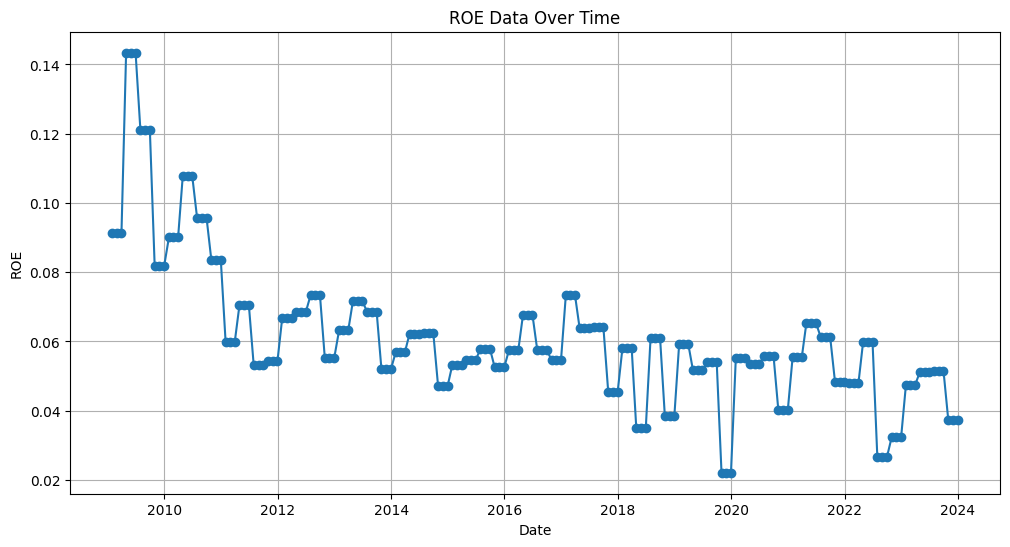

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ROE data
roe_data = {
    'ROE': [0.0912, 0.0912, 0.0912, 0.1434, 0.1434, 0.1434, 0.1211, 0.1211, 0.1211, 0.0818, 0.0818, 0.0818, 0.0901, 0.0901, 0.0901, 0.1078, 0.1078, 0.1078, 0.0958, 0.0958, 0.0958, 0.0836, 0.0836, 0.0836, 0.0599, 0.0599, 0.0599, 0.0704, 0.0704, 0.0704, 0.0532, 0.0532, 0.0532, 0.0543, 0.0543, 0.0543, 0.0669, 0.0669, 0.0669, 0.0684, 0.0684, 0.0684, 0.0733, 0.0733, 0.0733, 0.0553, 0.0553, 0.0553, 0.0632, 0.0632, 0.0632, 0.0716, 0.0716, 0.0716, 0.0686, 0.0686, 0.0686, 0.052, 0.052, 0.052, 0.0569, 0.0569, 0.0569, 0.0622, 0.0622, 0.0622, 0.0625, 0.0625, 0.0625, 0.0471, 0.0471, 0.0471, 0.0533, 0.0533, 0.0533, 0.0546, 0.0546, 0.0546, 0.0579, 0.0579, 0.0579, 0.0525, 0.0525, 0.0525, 0.0576, 0.0576, 0.0576, 0.0677, 0.0677, 0.0677, 0.0575, 0.0575, 0.0575, 0.0547, 0.0547, 0.0547, 0.0734, 0.0734, 0.0734, 0.0638, 0.0638, 0.0638, 0.0641, 0.0641, 0.0641, 0.0455, 0.0455, 0.0455, 0.0582, 0.0582, 0.0582, 0.0349, 0.0349, 0.0349, 0.0611, 0.0611, 0.0611, 0.0384, 0.0384, 0.0384, 0.0592, 0.0592, 0.0592, 0.0517, 0.0517, 0.0517, 0.054, 0.054, 0.054, 0.0221, 0.0221, 0.0221, 0.0551, 0.0551, 0.0551, 0.0534, 0.0534, 0.0534, 0.0559, 0.0559, 0.0559, 0.0402, 0.0402, 0.0402, 0.0554, 0.0554, 0.0554, 0.0654, 0.0654, 0.0654, 0.0613, 0.0613, 0.0613, 0.0484, 0.0484, 0.0484, 0.0479, 0.0479, 0.0479, 0.0598, 0.0598, 0.0598, 0.0265, 0.0265, 0.0265, 0.0323, 0.0323, 0.0323, 0.0474, 0.0474, 0.0474, 0.0511, 0.0511, 0.0511, 0.0516, 0.0516, 0.0516, 0.0373, 0.0373, 0.0373]
}

# Create a date range starting from 2009-01-01 with monthly intervals
date_range = pd.date_range(start='2009-01-01', periods=len(roe_data['ROE']), freq='M')

# Combine the date range with ROE data
roe_df = pd.DataFrame({'Date': date_range, 'ROE': roe_data['ROE']})

# Save the data to a CSV file
roe_df.to_csv('roe_data.csv', index=False)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(roe_df['Date'], roe_df['ROE'], marker='o')
plt.title('ROE Data Over Time')
plt.xlabel('Date')
plt.ylabel('ROE')
plt.grid(True)
plt.show()


Train features stacked shape: (117, 8)
Test features stacked shape: (63, 8)
Train features PCA shape: (117, 4)
Test features PCA shape: (63, 4)
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 648ms/step - loss: 0.1017
Epoch 2/150
7/7 - 0s - 38ms/step - loss: 0.0214
Epoch 3/150
7/7 - 0s - 25ms/step - loss: 0.0143
Epoch 4/150
7/7 - 0s - 21ms/step - loss: 0.0093
Epoch 5/150
7/7 - 0s - 19ms/step - loss: 0.0063
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0051
Epoch 7/150
7/7 - 0s - 20ms/step - loss: 0.0056
Epoch 8/150
7/7 - 0s - 22ms/step - loss: 0.0047
Epoch 9/150
7/7 - 0s - 40ms/step - loss: 0.0038
Epoch 10/150
7/7 - 0s - 22ms/step - loss: 0.0033
Epoch 11/150
7/7 - 0s - 20ms/step - loss: 0.0031
Epoch 12/150
7/7 - 0s - 19ms/step - loss: 0.0030
Epoch 13/150
7/7 - 0s - 21ms/step - loss: 0.0027
Epoch 14/150
7/7 - 0s - 42ms/step - loss: 0.0025
Epoch 15/150
7/7 - 0s - 20ms/step - loss: 0.0025
Epoch 16/150
7/7 - 0s - 22ms/step - loss: 0.0023
Epoch 17/150
7/7 - 0s - 42ms/step - loss: 0.0024
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0022
Epoch 19/150
7/7 - 0s - 23ms/step - loss: 0.0023
Epoch 20/150
7/7 - 0s - 20ms/step - loss: 0.0022
Epoch 21/150
7/7 - 0s - 20ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 482ms/step - loss: 0.0931
Epoch 2/150
7/7 - 0s - 41ms/step - loss: 0.0285
Epoch 3/150
7/7 - 0s - 22ms/step - loss: 0.0166
Epoch 4/150
7/7 - 0s - 40ms/step - loss: 0.0081
Epoch 5/150
7/7 - 0s - 21ms/step - loss: 0.0055
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0049
Epoch 7/150
7/7 - 0s - 19ms/step - loss: 0.0047
Epoch 8/150
7/7 - 0s - 19ms/step - loss: 0.0040
Epoch 9/150
7/7 - 0s - 23ms/step - loss: 0.0041
Epoch 10/150
7/7 - 0s - 41ms/step - loss: 0.0032
Epoch 11/150
7/7 - 0s - 22ms/step - loss: 0.0031
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0027
Epoch 13/150
7/7 - 0s - 19ms/step - loss: 0.0024
Epoch 14/150
7/7 - 0s - 19ms/step - loss: 0.0024
Epoch 15/150
7/7 - 0s - 23ms/step - loss: 0.0026
Epoch 16/150
7/7 - 0s - 20ms/step - loss: 0.0024
Epoch 17/150
7/7 - 0s - 21ms/step - loss: 0.0021
Epoch 18/150
7/7 - 0s - 23ms/step - loss: 0.0021
Epoch 19/150
7/7 - 0s - 19ms/step - loss: 0.0022
Epoch 20/150
7/7 - 0s - 19ms/step - loss: 0.0023
Epoch 21/150
7/7 - 0s - 21ms/step - loss

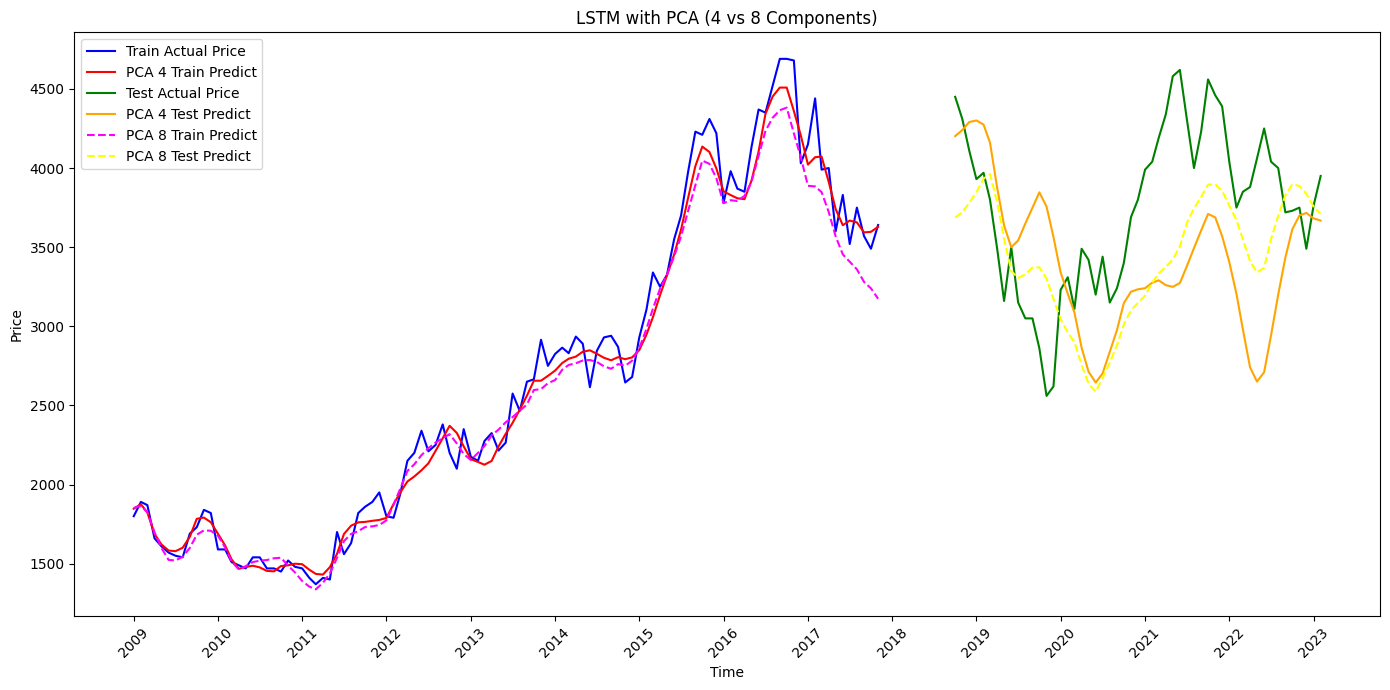

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.dates as mdates

# Create Dataset with PCA
def create_pca_dataset(prices, features_pca, look_back=5):
    dataX, dataY = [], []
    for i in range(len(prices) - look_back):
        a = [prices[i:(i + look_back), 0]]  # Start with the price data
        a.append(features_pca[i:(i + look_back)])  # Add PCA features
        a = np.column_stack(a)
        dataX.append(a)
        dataY.append(prices[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def apply_pca(train_features_stacked, test_features_stacked, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(train_features_stacked)  # Fit PCA with the full feature set
    return pca.transform(train_features_stacked), pca.transform(test_features_stacked), pca

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error (SMAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def train_pca_lstm(df, roa, income_margin, roe, fl, de, cr, qr, rtr, n_components, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract time indices
    time_index = df.index
    split_point = int(len(prices) * 0.65)
    train_time_index = time_index[:split_point]
    test_time_index = time_index[split_point:]

    # Split prices into training and testing sets
    train_prices = prices[:split_point]
    test_prices = prices[split_point:]

    # Feature consistency checks
    features_list = [roa, income_margin, roe, fl, de, cr, qr, rtr]

    # Ensure all features are of the same length as prices
    for feature in features_list:
        if len(feature) != len(prices):
            raise ValueError(f"Feature length {len(feature)} does not match price length {len(prices)}")

    # Split each feature
    train_features = [feature[:split_point] for feature in features_list]
    test_features = [feature[split_point:] for feature in features_list]

    # Scale the prices and features
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    # Scale and stack features for PCA
    feature_scalers = []
    scaled_train_features = []
    scaled_test_features = []

    for train_feature, test_feature in zip(train_features, test_features):
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_features.append(feature_scaler.fit_transform(np.array(train_feature).reshape(-1, 1)))
        scaled_test_features.append(feature_scaler.transform(np.array(test_feature).reshape(-1, 1)))
        feature_scalers.append(feature_scaler)

    # Stack the scaled features
    train_features_stacked = np.column_stack(scaled_train_features)
    test_features_stacked = np.column_stack(scaled_test_features)

    # Debugging: Print the shapes of the stacked features
    print(f"Train features stacked shape: {train_features_stacked.shape}")
    print(f"Test features stacked shape: {test_features_stacked.shape}")

    # Apply PCA
    pca = PCA(n_components=n_components)
    train_features_pca = pca.fit_transform(train_features_stacked)
    test_features_pca = pca.transform(test_features_stacked)

    # Debugging: Print the shapes after PCA transformation
    print(f"Train features PCA shape: {train_features_pca.shape}")
    print(f"Test features PCA shape: {test_features_pca.shape}")

    # Create datasets using PCA-transformed features
    X_train, Y_train = create_pca_dataset(train_prices_scaled, train_features_pca, look_back)
    X_test, Y_test = create_pca_dataset(test_prices_scaled, test_features_pca, look_back)

    # Train the LSTM model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict, train_time_index, test_time_index

# Plot predictions for LSTM with PCA (4 vs 8 components)
def plot_predictions_pca(trainY4, trainPredict4, testY4, testPredict4, trainY8, trainPredict8, testY8, testPredict8, title, train_time_index, test_time_index):
    plt.figure(figsize=(14, 7))

    # Plot actual and predicted values for Model with 4 components
    plt.plot(train_time_index, trainY4, label='PCA 4 Train Actual', color='blue')
    plt.plot(train_time_index, trainPredict4, label='PCA 4 Train Predict', color='red')
    plt.plot(test_time_index, testY4, label='PCA 4 Test Actual', color='green')
    plt.plot(test_time_index, testPredict4, label='PCA 4 Test Predict', color='orange')

    # Plot actual and predicted values for Model with 8 components
    plt.plot(train_time_index, trainPredict8, label='PCA 8 Train Predict', color='magenta', linestyle='dashed')
    plt.plot(test_time_index, testPredict8, label='PCA 8 Test Predict', color='yellow', linestyle='dashed')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Set major ticks to show every year
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

df_1_close = preprocessing(df_5)

roe_data = {
    'ROE': [0.0912, 0.0912, 0.0912, 0.1434, 0.1434, 0.1434, 0.1211, 0.1211, 0.1211, 0.0818, 0.0818, 0.0818, 0.0901, 0.0901, 0.0901, 0.1078, 0.1078, 0.1078, 0.0958, 0.0958, 0.0958, 0.0836, 0.0836, 0.0836, 0.0599, 0.0599, 0.0599, 0.0704, 0.0704, 0.0704, 0.0532, 0.0532, 0.0532, 0.0543, 0.0543, 0.0543, 0.0669, 0.0669, 0.0669, 0.0684, 0.0684, 0.0684, 0.0733, 0.0733, 0.0733, 0.0553, 0.0553, 0.0553, 0.0632, 0.0632, 0.0632, 0.0716, 0.0716, 0.0716, 0.0686, 0.0686, 0.0686, 0.052, 0.052, 0.052, 0.0569, 0.0569, 0.0569, 0.0622, 0.0622, 0.0622, 0.0625, 0.0625, 0.0625, 0.0471, 0.0471, 0.0471, 0.0533, 0.0533, 0.0533, 0.0546, 0.0546, 0.0546, 0.0579, 0.0579, 0.0579, 0.0525, 0.0525, 0.0525, 0.0576, 0.0576, 0.0576, 0.0677, 0.0677, 0.0677, 0.0575, 0.0575, 0.0575, 0.0547, 0.0547, 0.0547, 0.0734, 0.0734, 0.0734, 0.0638, 0.0638, 0.0638, 0.0641, 0.0641, 0.0641, 0.0455, 0.0455, 0.0455, 0.0582, 0.0582, 0.0582, 0.0349, 0.0349, 0.0349, 0.0611, 0.0611, 0.0611, 0.0384, 0.0384, 0.0384, 0.0592, 0.0592, 0.0592, 0.0517, 0.0517, 0.0517, 0.054, 0.054, 0.054, 0.0221, 0.0221, 0.0221, 0.0551, 0.0551, 0.0551, 0.0534, 0.0534, 0.0534, 0.0559, 0.0559, 0.0559, 0.0402, 0.0402, 0.0402, 0.0554, 0.0554, 0.0554, 0.0654, 0.0654, 0.0654, 0.0613, 0.0613, 0.0613, 0.0484, 0.0484, 0.0484, 0.0479, 0.0479, 0.0479, 0.0598, 0.0598, 0.0598, 0.0265, 0.0265, 0.0265, 0.0323, 0.0323, 0.0323, 0.0474, 0.0474, 0.0474, 0.0511, 0.0511, 0.0511, 0.0516, 0.0516, 0.0516, 0.0373, 0.0373, 0.0373]
}

roa_data = {
    'ROA': [0.0368, 0.0368, 0.0368, 0.0519, 0.0519, 0.0519, 0.0477, 0.0477, 0.0477, 0.0327, 0.0327, 0.0327, 0.039, 0.039, 0.039, 0.0434, 0.0434, 0.0434, 0.0409, 0.0409, 0.0409, 0.0372, 0.0372, 0.0372, 0.0281, 0.0281, 0.0281, 0.0312, 0.0312, 0.0312, 0.0246, 0.0246, 0.0246, 0.025, 0.025, 0.025, 0.0318, 0.0318, 0.0318, 0.0306, 0.0306, 0.0306, 0.0339, 0.0339, 0.0339, 0.0256, 0.0256, 0.0256, 0.0299, 0.0299, 0.0299, 0.0327, 0.0327, 0.0327, 0.0326, 0.0326, 0.0326, 0.0246, 0.0246, 0.0246, 0.028, 0.028, 0.028, 0.0289, 0.0289, 0.0289, 0.0292, 0.0292, 0.0292, 0.0227, 0.0227, 0.0227, 0.026, 0.026, 0.026, 0.0236, 0.0236, 0.0236, 0.0259, 0.0259, 0.0259, 0.0237, 0.0237, 0.0237, 0.0259, 0.0259, 0.0259, 0.0311, 0.0311, 0.0311, 0.0271, 0.0271, 0.0271, 0.0257, 0.0257, 0.0257, 0.0357, 0.0357, 0.0357, 0.0305, 0.0305, 0.0305, 0.0305, 0.0305, 0.0305, 0.0213, 0.0213, 0.0213, 0.0278, 0.0278, 0.0278, 0.0147, 0.0147, 0.0147, 0.027, 0.027, 0.027, 0.0184, 0.0184, 0.0184, 0.0284, 0.0284, 0.0284, 0.0225, 0.0225, 0.0225, 0.025, 0.025, 0.025, 0.01, 0.01, 0.01, 0.0242, 0.0242, 0.0242, 0.0208, 0.0208, 0.0208, 0.0244, 0.0244, 0.0244, 0.0167, 0.0167, 0.0167, 0.0233, 0.0233, 0.0233, 0.0244, 0.0244, 0.0244, 0.026, 0.026, 0.026, 0.0212, 0.0212, 0.0212, 0.0219, 0.0219, 0.0219, 0.0261, 0.0261, 0.0261, 0.0121, 0.0121, 0.0121, 0.0152, 0.0152, 0.0152, 0.0231, 0.0231, 0.0231, 0.0218, 0.0218, 0.0218, 0.0244, 0.0244, 0.0244, 0.0176, 0.0176, 0.0176]
}

de_data = {
    'Debt_to_Equity': [0.53, 0.53, 0.53, 0.63, 0.63, 0.63, 0.57, 0.57, 0.57, 0.49, 0.49, 0.49, 0.48, 0.48, 0.48, 0.54, 0.54, 0.54, 0.5, 0.5, 0.5, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.32, 0.32, 0.32, 0.4, 0.4, 0.4, 0.35, 0.35, 0.35, 0.37, 0.37, 0.37, 0.34, 0.34, 0.34, 0.39, 0.39, 0.39, 0.35, 0.35, 0.35, 0.33, 0.33, 0.33, 0.31, 0.31, 0.31, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.35, 0.35, 0.35, 0.33, 0.33, 0.33, 0.55, 0.55, 0.55, 0.49, 0.49, 0.49, 0.46, 0.46, 0.46, 0.44, 0.44, 0.44, 0.43, 0.43, 0.43, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.35, 0.35, 0.35, 0.41, 0.41, 0.41, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.37, 0.37, 0.37, 0.62, 0.62, 0.62, 0.52, 0.52, 0.52, 0.45, 0.45, 0.45, 0.41, 0.41, 0.41, 0.61, 0.61, 0.61, 0.51, 0.51, 0.51, 0.52, 0.52, 0.52, 0.57, 0.57, 0.57, 0.67, 0.67, 0.67, 0.61, 0.61, 0.61, 0.49, 0.49, 0.49, 0.5, 0.5, 0.5, 0.66, 0.66, 0.66, 0.52, 0.52, 0.52, 0.43, 0.43, 0.43, 0.38, 0.38, 0.38, 0.51, 0.51, 0.51, 0.4, 0.4, 0.4, 0.34, 0.34, 0.34, 0.32, 0.32, 0.32, 0.45, 0.45, 0.45, 0.38, 0.38, 0.38, 0.35, 0.35, 0.35, 0.29, 0.29, 0.29]
}

fl_data = {
    'Financial_Leverage': [2.76, 2.76, 2.76, 2.54, 2.54, 2.54, 2.5, 2.5, 2.5, 2.31, 2.31, 2.31, 2.48, 2.48, 2.48, 2.34, 2.34, 2.34, 2.25, 2.25, 2.25, 2.13, 2.13, 2.13, 2.26, 2.26, 2.26, 2.16, 2.16, 2.16, 2.17, 2.17, 2.17, 2.11, 2.11, 2.11, 2.24, 2.24, 2.24, 2.16, 2.16, 2.16, 2.16, 2.16, 2.16, 2.11, 2.11, 2.11, 2.19, 2.19, 2.19, 2.11, 2.11, 2.11, 2.11, 2.11, 2.11, 2.04, 2.04, 2.04, 2.15, 2.15, 2.15, 2.14, 2.14, 2.14, 2.08, 2.08, 2.08, 2.05, 2.05, 2.05, 2.31, 2.31, 2.31, 2.24, 2.24, 2.24, 2.21, 2.21, 2.21, 2.22, 2.22, 2.22, 2.17, 2.17, 2.17, 2.12, 2.12, 2.12, 2.13, 2.13, 2.13, 2.06, 2.06, 2.06, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.14, 2.14, 2.14, 2.1, 2.1, 2.1, 2.38, 2.38, 2.38, 2.26, 2.26, 2.26, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.3, 2.3, 2.3, 2.16, 2.16, 2.16, 2.22, 2.22, 2.22, 2.27, 2.27, 2.27, 2.57, 2.57, 2.57, 2.29, 2.29, 2.29, 2.41, 2.41, 2.41, 2.37, 2.37, 2.37, 2.68, 2.68, 2.68, 2.35, 2.35, 2.35, 2.28, 2.28, 2.28, 2.19, 2.19, 2.19, 2.29, 2.29, 2.29, 2.18, 2.18, 2.18, 2.13, 2.13, 2.13, 2.05, 2.05, 2.05, 2.35, 2.35, 2.35, 2.11, 2.11, 2.11, 2.11, 2.11, 2.11, 2.03, 2.03, 2.03]
}

cr_data = {
    'Current_Ratio': [0.49, 0.49, 0.49, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.63, 0.63, 0.63, 0.58, 0.58, 0.58, 0.79, 0.79, 0.79, 0.91, 0.91, 0.91, 1.09, 1.09, 1.09, 0.89, 0.89, 0.89, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 1.06, 1.06, 1.06, 0.84, 0.84, 0.84, 1.04, 1.04, 1.04, 1.16, 1.16, 1.16, 1.34, 1.34, 1.34, 0.95, 0.95, 0.95, 1.18, 1.18, 1.18, 1.16, 1.16, 1.16, 1.37, 1.37, 1.37, 1.01, 1.01, 1.01, 1.0, 1.0, 1.0, 1.06, 1.06, 1.06, 1.2, 1.2, 1.2, 1.25, 1.25, 1.25, 1.34, 1.34, 1.34, 1.35, 1.35, 1.35, 1.48, 1.48, 1.48, 1.19, 1.19, 1.19, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.33, 1.33, 1.33, 1.07, 1.07, 1.07, 1.19, 1.19, 1.19, 1.05, 1.05, 1.05, 1.18, 1.18, 1.18, 0.86, 0.86, 0.86, 0.93, 0.93, 0.93, 0.94, 0.94, 0.94, 1.04, 1.04, 1.04, 0.93, 0.93, 0.93, 0.84, 0.84, 0.84, 0.71, 0.71, 0.71, 0.8, 0.8, 0.8, 0.65, 0.65, 0.65, 0.64, 0.64, 0.64, 0.67, 0.67, 0.67, 0.8, 0.8, 0.8, 0.66, 0.66, 0.66, 0.6, 0.6, 0.6, 0.89, 0.89, 0.89, 0.93, 0.93, 0.93, 0.8, 0.8, 0.8, 0.82, 0.82, 0.82, 0.78, 0.78, 0.78, 0.85, 0.85, 0.85, 0.69, 0.69, 0.69, 0.72, 0.72, 0.72, 0.78, 0.78, 0.78, 0.87, 0.87, 0.87]
}

qr_data = {
    'Quick_Ratio': [0.48, 0.48, 0.48, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.61, 0.61, 0.61, 0.56, 0.56, 0.56, 0.76, 0.76, 0.76, 0.89, 0.89, 0.89, 1.06, 1.06, 1.06, 0.87, 0.87, 0.87, 0.93, 0.93, 0.93, 0.92, 0.92, 0.92, 1.02, 1.02, 1.02, 0.81, 0.81, 0.81, 1.01, 1.01, 1.01, 1.14, 1.14, 1.14, 1.31, 1.31, 1.31, 0.93, 0.93, 0.93, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.34, 1.34, 1.34, 0.97, 0.97, 0.97, 0.98, 0.98, 0.98, 1.05, 1.05, 1.05, 1.18, 1.18, 1.18, 1.23, 1.23, 1.23, 1.32, 1.32, 1.32, 1.34, 1.34, 1.34, 1.47, 1.47, 1.47, 1.17, 1.17, 1.17, 1.26, 1.26, 1.26, 1.18, 1.18, 1.18, 1.32, 1.32, 1.32, 1.04, 1.04, 1.04, 1.17, 1.17, 1.17, 1.03, 1.03, 1.03, 1.16, 1.16, 1.16, 0.85, 0.85, 0.85, 0.91, 0.91, 0.91, 0.92, 0.92, 0.92, 1.03, 1.03, 1.03, 0.91, 0.91, 0.91, 0.82, 0.82, 0.82, 0.7, 0.7, 0.7, 0.79, 0.79, 0.79, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.79, 0.79, 0.79, 0.65, 0.65, 0.65, 0.59, 0.59, 0.59, 0.88, 0.88, 0.88, 0.91, 0.91, 0.91, 0.79, 0.79, 0.79, 0.8, 0.8, 0.8, 0.77, 0.77, 0.77, 0.83, 0.83, 0.83, 0.68, 0.68, 0.68, 0.7, 0.7, 0.7, 0.76, 0.76, 0.76, 0.85, 0.85, 0.85]
}

rtr_data = {
    'RTR': [4.44, 4.44, 4.44, 4.5, 4.5, 4.5, 4.75, 4.75, 4.75, 4.2, 4.2, 4.2, 4.0, 4.0, 4.0, 3.76, 3.76, 3.76, 3.62, 3.62, 3.62, 3.68, 3.68, 3.68, 3.62, 3.62, 3.62, 3.5, 3.5, 3.5, 3.48, 3.48, 3.48, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.44, 3.44, 3.44, 3.56, 3.56, 3.56, 3.52, 3.52, 3.52, 3.3, 3.3, 3.3, 3.04, 3.04, 3.04, 3.19, 3.19, 3.19, 3.38, 3.38, 3.38, 3.14, 3.14, 3.14, 2.9, 2.9, 2.9, 3.36, 3.36, 3.36, 3.24, 3.24, 3.24, 3.07, 3.07, 3.07, 3.03, 3.03, 3.03, 3.16, 3.16, 3.16, 3.2, 3.2, 3.2, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 3.32, 3.32, 3.32, 3.78, 3.78, 3.78, 3.27, 3.27, 3.27, 2.76, 2.76, 2.76, 2.85, 2.85, 2.85, 3.03, 3.03, 3.03, 2.36, 2.36, 2.36, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.67, 2.67, 2.67, 2.31, 2.31, 2.31, 2.25, 2.25, 2.25, 2.52, 2.52, 2.52, 2.56, 2.56, 2.56, 2.17, 2.17, 2.17, 2.37, 2.37, 2.37, 3.04, 3.04, 3.04, 2.86, 2.86, 2.86, 3.01, 3.01, 3.01, 3.25, 3.25, 3.25, 3.76, 3.76, 3.76, 3.91, 3.91, 3.91, 3.85, 3.85, 3.85, 3.87, 3.87, 3.87, 4.24, 4.24, 4.24, 4.01, 4.01, 4.01, 3.83, 3.83, 3.83, 3.77, 3.77, 3.77, 3.69, 3.69, 3.69, 3.33, 3.33, 3.33]
}

im_data = {
    'Income_Margin': [0.3323, 0.3323, 0.3323, 0.426, 0.426, 0.426, 0.3898, 0.3898, 0.3898, 0.2732, 0.2732, 0.2732, 0.3354, 0.3354, 0.3354, 0.3458, 0.3458, 0.3458, 0.3333, 0.3333, 0.3333, 0.3217, 0.3217, 0.3217, 0.3245, 0.3245, 0.3245, 0.3321, 0.3321, 0.3321, 0.2825, 0.2825, 0.2825, 0.2961, 0.2961, 0.2961, 0.3495, 0.3495, 0.3495, 0.3214, 0.3214, 0.3214, 0.3476, 0.3476, 0.3476, 0.3151, 0.3151, 0.3151, 0.3452, 0.3452, 0.3452, 0.3442, 0.3442, 0.3442, 0.3493, 0.3493, 0.3493, 0.3048, 0.3048, 0.3048, 0.3285, 0.3285, 0.3285, 0.3235, 0.3235, 0.3235, 0.3561, 0.3561, 0.3561, 0.3037, 0.3037, 0.3037, 0.3153, 0.3153, 0.3153, 0.3043, 0.3043, 0.3043, 0.33, 0.33, 0.33, 0.315, 0.315, 0.315, 0.3474, 0.3474, 0.3474, 0.3567, 0.3567, 0.3567, 0.3492, 0.3492, 0.3492, 0.2961, 0.2961, 0.2961, 0.4025, 0.4025, 0.4025, 0.3424, 0.3424, 0.3424, 0.3578, 0.3578, 0.3578, 0.267, 0.267, 0.267, 0.3363, 0.3363, 0.3363, 0.2255, 0.2255, 0.2255, 0.3255, 0.3255, 0.3255, 0.2977, 0.2977, 0.2977, 0.3453, 0.3453, 0.3453, 0.295, 0.295, 0.295, 0.3377, 0.3377, 0.3377, 0.2715, 0.2715, 0.2715, 0.3488, 0.3488, 0.3488, 0.316, 0.316, 0.316, 0.3252, 0.3252, 0.3252, 0.2873, 0.2873, 0.2873, 0.3447, 0.3447, 0.3447, 0.3353, 0.3353, 0.3353, 0.3469, 0.3469, 0.3469, 0.303, 0.303, 0.303, 0.3014, 0.3014, 0.3014, 0.335, 0.335, 0.335, 0.2341, 0.2341, 0.2341, 0.2084, 0.2084, 0.2084, 0.3167, 0.3167, 0.3167, 0.31, 0.31, 0.31, 0.3169, 0.3169, 0.3169, 0.2475, 0.2475, 0.2475]
}

# Assuming df_1_close, roa_data['ROA'], and im_data['Income_Margin'] are defined and prepared
train_pca4_trainScore, train_pca4_testScore, train_pca4_trainMAPE, train_pca4_testMAPE, train_pca4_trainSMAPE, train_pca4_testSMAPE, train_pca4_trainY, train_pca4_trainPredict, train_pca4_testY, train_pca4_testPredict, train_time_index, test_time_index = train_pca_lstm(df_1_close, roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR'], n_components=4)
train_pca8_trainScore, train_pca8_testScore, train_pca8_trainMAPE, train_pca8_testMAPE, train_pca8_trainSMAPE, train_pca8_testSMAPE, train_pca8_trainY, train_pca8_trainPredict, train_pca8_testY, train_pca8_testPredict, train_time_index, test_time_index = train_pca_lstm(df_1_close, roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR'], n_components=8)


# RMSE, MAPE, and SMAPE scores
rmse_mape_smape_data_pca = [
    ["PCA 4 Components", train_pca4_trainScore, train_pca4_testScore, train_pca4_trainMAPE, train_pca4_testMAPE, train_pca4_trainSMAPE, train_pca4_testSMAPE],
    ["PCA 8 Components", train_pca8_trainScore, train_pca8_testScore, train_pca8_trainMAPE, train_pca8_testMAPE, train_pca8_trainSMAPE, train_pca8_testSMAPE]
]

# Table headers
headers_pca = ["Model", "Train RMSE", "Test RMSE", "Train MAPE (%)", "Test MAPE (%)", "Train SMAPE (%)", "Test SMAPE (%)"]

# Print table for PCA models
print("RMSE, MAPE, and SMAPE Comparison (PCA Models):")
print(tabulate(rmse_mape_smape_data_pca, headers=headers_pca, floatfmt=(".2f", ".2f", ".2f", ".2f", ".2f", ".2f")))

def flatten_array(arr):
    return np.squeeze(arr)

def plot_predictions_pca(trainY4, trainPredict4, testY4, testPredict4, trainY8, trainPredict8, testY8, testPredict8, title, train_time_index, test_time_index):
    plt.figure(figsize=(14, 7))

    # Flatten the data
    trainY4 = flatten_array(trainY4)
    trainPredict4 = flatten_array(trainPredict4)
    testY4 = flatten_array(testY4)
    testPredict4 = flatten_array(testPredict4)
    trainY8 = flatten_array(trainY8)
    trainPredict8 = flatten_array(trainPredict8)
    testY8 = flatten_array(testY8)
    testPredict8 = flatten_array(testPredict8)

    # Plot actual and predicted values for Model with 4 components
    plt.plot(train_time_index[:len(trainY4)], trainY4, label='Train Actual Price', color='blue')
    plt.plot(train_time_index[:len(trainPredict4)], trainPredict4, label='PCA 4 Train Predict', color='red')
    plt.plot(test_time_index[:len(testY4)], testY4, label='Test Actual Price', color='green')
    plt.plot(test_time_index[:len(testPredict4)], testPredict4, label='PCA 4 Test Predict', color='orange')

    # Plot actual and predicted values for Model with 8 components
    plt.plot(train_time_index[:len(trainPredict8)], trainPredict8, label='PCA 8 Train Predict', color='magenta', linestyle='dashed')
    plt.plot(test_time_index[:len(testPredict8)], testPredict8, label='PCA 8 Test Predict', color='yellow', linestyle='dashed')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Set major ticks to show every year
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

print("Train time index length:", len(train_time_index))
print("Test time index length:", len(test_time_index))
print("Train PCA 4 Actual length:", len(train_pca4_trainY))
print("Train PCA 4 Predict length:", len(train_pca4_trainPredict))
print("Test PCA 4 Actual length:", len(train_pca4_testY))
print("Test PCA 4 Predict length:", len(train_pca4_testPredict))
print("Train PCA 8 Predict length:", len(train_pca8_trainPredict))
print("Test PCA 8 Predict length:", len(train_pca8_testPredict))

# Combine the predictions for both PCA models into a single plot
plot_predictions_pca(train_pca4_trainY, train_pca4_trainPredict, train_pca4_testY, train_pca4_testPredict,
                     train_pca8_trainY, train_pca8_trainPredict, train_pca8_testY, train_pca8_testPredict,
                     'LSTM with PCA (4 vs 8 Components)', train_time_index, test_time_index)

In [ ]:
# Financial data
roe_data = {
    'ROE': [0.0652, 0.0652, 0.0652, 0.0666, 0.0666, 0.0666, 0.0661, 0.0661, 0.0661, 0.0617, 0.0617, 0.0617, 0.0647, 0.0647, 0.0647, 0.0679, 0.0679, 0.0679, 0.0656, 0.0656, 0.0656, 0.0695, 0.0695, 0.0695, 0.0559, 0.0559, 0.0559, 0.0748, 0.0748, 0.0748, 0.072, 0.072, 0.072, 0.0753, 0.0753, 0.0753, 0.052, 0.052, 0.052, 0.0658, 0.0658, 0.0658, 0.0605, 0.0605, 0.0605, 0.0665, 0.0665, 0.0665, 0.0512, 0.0512, 0.0512, 0.0596, 0.0596, 0.0596, 0.066, 0.066, 0.066, 0.061, 0.061, 0.061, 0.054, 0.054, 0.054, 0.0596, 0.0596, 0.0596, 0.0583, 0.0583, 0.0583, 0.0552, 0.0552, 0.0552, 0.0509, 0.0509, 0.0509, 0.055, 0.055, 0.055, 0.0561, 0.0561, 0.0561, 0.052, 0.052, 0.052, 0.0447, 0.0447, 0.0447, 0.0491, 0.0491, 0.0491, 0.0509, 0.0509, 0.0509, 0.0487, 0.0487, 0.0487, 0.0422, 0.0422, 0.0422, 0.046, 0.046, 0.046, 0.0495, 0.0495, 0.0495, 0.0493, 0.0493, 0.0493, 0.0404, 0.0404, 0.0404, 0.0432, 0.0432, 0.0432, 0.0494, 0.0494, 0.0494, 0.0484, 0.0484, 0.0484, 0.0382, 0.0382, 0.0382, 0.0426, 0.0426, 0.0426, 0.048, 0.048, 0.048, 0.0439, 0.0439, 0.0439, 0.0383, 0.0383, 0.0383, 0.0335, 0.0335, 0.0335, 0.0435, 0.0435, 0.0435, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0396, 0.0396, 0.0396, 0.0442, 0.0442, 0.0442, 0.0406, 0.0406, 0.0406, 0.0414, 0.0414, 0.0414, 0.0492, 0.0492, 0.0492, 0.0515, 0.0515, 0.0515, 0.0533, 0.0533, 0.0533, 0.0546, 0.0546, 0.0546, 0.0564, 0.0564, 0.0564, 0.0519, 0.0519, 0.0519, 0.0504, 0.0504, 0.0504, 0.0567, 0.0567, 0.0567]
}

roa_data = {
    'ROA': [0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0061, 0.0061, 0.0061, 0.0068, 0.0068, 0.0068, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0073, 0.0073, 0.0073, 0.0062, 0.0062, 0.0062, 0.0082, 0.0082, 0.0082, 0.0079, 0.0079, 0.0079, 0.0083, 0.0083, 0.0083, 0.0057, 0.0057, 0.0057, 0.0073, 0.0073, 0.0073, 0.007, 0.007, 0.007, 0.0078, 0.0078, 0.0078, 0.0065, 0.0065, 0.0065, 0.0075, 0.0075, 0.0075, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.008, 0.008, 0.008, 0.0081, 0.0081, 0.0081, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0075, 0.0075, 0.0075, 0.0081, 0.0081, 0.0081, 0.0084, 0.0084, 0.0084, 0.0081, 0.0081, 0.0081, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0085, 0.0085, 0.0085, 0.0086, 0.0086, 0.0086, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.009, 0.009, 0.009, 0.0083, 0.0083, 0.0083, 0.0068, 0.0068, 0.0068, 0.0058, 0.0058, 0.0058, 0.0078, 0.0078, 0.0078, 0.0066, 0.0066, 0.0066, 0.0065, 0.0065, 0.0065, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0067, 0.0067, 0.0067, 0.0064, 0.0064, 0.0064, 0.0079, 0.0079, 0.0079, 0.0085, 0.0085, 0.0085, 0.009, 0.009, 0.009, 0.0087, 0.0087, 0.0087, 0.0093, 0.0093, 0.0093, 0.0089, 0.0089, 0.0089, 0.0087, 0.0087, 0.0087, 0.0089, 0.0089, 0.0089]
}

fl_data = {
    'Financial_Leverage': [9.9, 9.9, 9.9, 10.16, 10.16, 10.16, 10.04, 10.04, 10.04, 10.14, 10.14, 10.14, 9.53, 9.53, 9.53, 9.89, 9.89, 9.89, 9.56, 9.56, 9.56, 9.51, 9.51, 9.51, 9.05, 9.05, 9.05, 9.15, 9.15, 9.15, 9.11, 9.11, 9.11, 9.09, 9.09, 9.09, 9.05, 9.05, 9.05, 8.98, 8.98, 8.98, 8.68, 8.68, 8.68, 8.55, 8.55, 8.55, 7.92, 7.92, 7.92, 7.96, 7.96, 7.96, 7.97, 7.97, 7.97, 7.77, 7.77, 7.77, 7.4, 7.4, 7.4, 7.45, 7.45, 7.45, 7.21, 7.21, 7.21, 7.11, 7.11, 7.11, 6.99, 6.99, 6.99, 7.01, 7.01, 7.01, 6.8, 6.8, 6.8, 6.65, 6.65, 6.65, 5.99, 5.99, 5.99, 6.06, 6.06, 6.06, 6.05, 6.05, 6.05, 6.02, 6.02, 6.02, 5.84, 5.84, 5.84, 6.12, 6.12, 6.12, 5.81, 5.81, 5.81, 5.71, 5.71, 5.71, 5.57, 5.57, 5.57, 5.79, 5.79, 5.79, 5.56, 5.56, 5.56, 5.44, 5.44, 5.44, 5.23, 5.23, 5.23, 5.45, 5.45, 5.45, 5.32, 5.32, 5.32, 5.28, 5.28, 5.28, 5.67, 5.67, 5.67, 5.76, 5.76, 5.76, 5.61, 5.61, 5.61, 5.83, 5.83, 5.83, 6.1, 6.1, 6.1, 6.03, 6.03, 6.03, 5.91, 5.91, 5.91, 6.06, 6.06, 6.06, 6.47, 6.47, 6.47, 6.23, 6.23, 6.23, 6.08, 6.08, 6.08, 5.95, 5.95, 5.95, 6.26, 6.26, 6.26, 6.04, 6.04, 6.04, 5.86, 5.86, 5.86, 5.81, 5.81, 5.81, 6.36, 6.36, 6.36]
}

im_data = {
    'Income_Margin': [0.3515, 0.3515, 0.3515, 0.3433, 0.3433, 0.3433, 0.3688, 0.3688, 0.3688, 0.4236, 0.4236, 0.4236, 0.4946, 0.4946, 0.4946, 0.5318, 0.5318, 0.5318, 0.4885, 0.4885, 0.4885, 0.5027, 0.5027, 0.5027, 0.4398, 0.4398, 0.4398, 0.5677, 0.5677, 0.5677, 0.5431, 0.5431, 0.5431, 0.6059, 0.6059, 0.6059, 0.4322, 0.4322, 0.4322, 0.5355, 0.5355, 0.5355, 0.5184, 0.5184, 0.5184, 0.2875, 0.2875, 0.2875, 0.3813, 0.3813, 0.3813, 0.4305, 0.4305, 0.4305, 0.4314, 0.4314, 0.4314, 0.416, 0.416, 0.416, 0.3862, 0.3862, 0.3862, 0.404, 0.404, 0.404, 0.4144, 0.4144, 0.4144, 0.3765, 0.3765, 0.3765, 0.3749, 0.3749, 0.3749, 0.402, 0.402, 0.402, 0.4264, 0.4264, 0.4264, 0.3732, 0.3732, 0.3732, 0.3769, 0.3769, 0.3769, 0.4179, 0.4179, 0.4179, 0.4434, 0.4434, 0.4434, 0.4938, 0.4938, 0.4938, 0.3981, 0.3981, 0.3981, 0.4265, 0.4265, 0.4265, 0.4661, 0.4661, 0.4661, 0.5307, 0.5307, 0.5307, 0.413, 0.413, 0.413, 0.4436, 0.4436, 0.4436, 0.4806, 0.4806, 0.4806, 0.564, 0.564, 0.564, 0.3982, 0.3982, 0.3982, 0.4254, 0.4254, 0.4254, 0.4929, 0.4929, 0.4929, 0.565, 0.565, 0.565, 0.3644, 0.3644, 0.3644, 0.3509, 0.3509, 0.3509, 0.4787, 0.4787, 0.4787, 0.5425, 0.5425, 0.5425, 0.4223, 0.4223, 0.4223, 0.4451, 0.4451, 0.4451, 0.5233, 0.5233, 0.5233, 0.5508, 0.5508, 0.5508, 0.4731, 0.4731, 0.4731, 0.5792, 0.5792, 0.5792, 0.5908, 0.5908, 0.5908, 0.6216, 0.6216, 0.6216, 0.5542, 0.5542, 0.5542, 0.592, 0.592, 0.592, 0.5584, 0.5584, 0.5584, 0.611, 0.611, 0.611]
}

nor_data = {
    'ORGR': [0.0323, 0.0323, 0.0323, 0.0147, 0.0147, 0.0147, 0.0153, 0.0153, 0.0153, 0.0018, 0.0018, 0.0018, 0.1297, 0.1297, 0.1297, 0.073, 0.073, 0.073, 0.1776, 0.1776, 0.1776, 0.0735, 0.0735, 0.0735, 0.0019, 0.0019, 0.0019, 0.0452, 0.0452, 0.0452, 0.0415, 0.0415, 0.0415, 0.0188, 0.0188, 0.0188, 0.0154, 0.0154, 0.0154, 0.0237, 0.0237, 0.0237, 0.0408, 0.0408, 0.0408, 1.1307, 1.1307, 1.1307, 0.3726, 0.3726, 0.3726, 0.0464, 0.0464, 0.0464, 0.1037, 0.1037, 0.1037, 0.0612, 0.0612, 0.0612, 0.0732, 0.0732, 0.0732, 0.0265, 0.0265, 0.0265, 0.0632, 0.0632, 0.0632, 0.0372, 0.0372, 0.0372, 0.0102, 0.0102, 0.0102, 0.031, 0.031, 0.031, 0.004, 0.004, 0.004, 0.101, 0.101, 0.101, 0.0382, 0.0382, 0.0382, 0.0204, 0.0204, 0.0204, 0.0234, 0.0234, 0.0234, 0.1163, 0.1163, 0.1163, 0.1376, 0.1376, 0.1376, 0.0375, 0.0375, 0.0375, 0.0328, 0.0328, 0.0328, 0.1015, 0.1015, 0.1015, 0.0997, 0.0997, 0.0997, 0.0044, 0.0044, 0.0044, 0.115, 0.115, 0.115, 0.1091, 0.1091, 0.1091, 0.1509, 0.1509, 0.1509, 0.0452, 0.0452, 0.0452, 0.0321, 0.0321, 0.0321, 0.147, 0.147, 0.147, 0.237, 0.237, 0.237, 0.0741, 0.0741, 0.0741, 0.0064, 0.0064, 0.0064, 0.1933, 0.1933, 0.1933, 0.2565, 0.2565, 0.2565, 0.0053, 0.0053, 0.0053, 0.0046, 0.0046, 0.0046, 0.1, 0.1, 0.1, 0.1372, 0.1372, 0.1372, 0.0123, 0.0123, 0.0123, 0.0739, 0.0739, 0.0739, 0.0305, 0.0305, 0.0305, 0.0885, 0.0885, 0.0885, 0.0303, 0.0303, 0.0303, 0.0244, 0.0244, 0.0244, 0.0833, 0.0833, 0.0833]
}

ni_data = {
    'NIGR': [0.0814, 0.0814, 0.0814, 0.0239, 0.0239, 0.0239, 0.0697, 0.0697, 0.0697, 0.0386, 0.0386, 0.0386, 0.1243, 0.1243, 0.1243, 0.0616, 0.0616, 0.0616, 0.038, 0.038, 0.038, 0.1142, 0.1142, 0.1142, 0.1487, 0.1487, 0.1487, 0.377, 0.377, 0.377, 0.0306, 0.0306, 0.0306, 0.1063, 0.1063, 0.1063, 0.0272, 0.0272, 0.0272, 0.0299, 0.0299, 0.0299, 0.0057, 0.0057, 0.0057, 0.1577, 0.1577, 0.1577, 0.1595, 0.1595, 0.1595, 0.1846, 0.1846, 0.1846, 0.1771, 0.1771, 0.1771, 0.0356, 0.0356, 0.0356, 0.0572, 0.0572, 0.0572, 0.1416, 0.1416, 0.1416, 0.0385, 0.0385, 0.0385, 0.0119, 0.0119, 0.0119, 0.0548, 0.0548, 0.0548, 0.1049, 0.1049, 0.1049, 0.0761, 0.0761, 0.0761, 0.0366, 0.0366, 0.0366, 0.0301, 0.0301, 0.0301, 0.1229, 0.1229, 0.1229, 0.0965, 0.0965, 0.0965, 0.0706, 0.0706, 0.0706, 0.1614, 0.1614, 0.1614, 0.1123, 0.1123, 0.1123, 0.1375, 0.1375, 0.1375, 0.0248, 0.0248, 0.0248, 0.1488, 0.1488, 0.1488, 0.0732, 0.0732, 0.0732, 0.1989, 0.1989, 0.1989, 0.0358, 0.0358, 0.0358, 0.1744, 0.1744, 0.1744, 0.1222, 0.1222, 0.1222, 0.1855, 0.1855, 0.1855, 0.0513, 0.0513, 0.0513, 0.1396, 0.1396, 0.1396, 0.1397, 0.1397, 0.1397, 0.3782, 0.3782, 0.3782, 0.0896, 0.0896, 0.0896, 0.0083, 0.0083, 0.0083, 0.0536, 0.0536, 0.0536, 0.1787, 0.1787, 0.1787, 0.0595, 0.0595, 0.0595, 0.0194, 0.0194, 0.0194, 0.2378, 0.2378, 0.2378, 0.0926, 0.0926, 0.0926, 0.0801, 0.0801, 0.0801, 0.0224, 0.0224, 0.0224, 0.0986, 0.0986, 0.0986, 0.0339, 0.0339, 0.0339, 0.0018, 0.0018, 0.0018]
}

# Calculate sums
num_samples_roe = len(roe_data['ROE'])
num_samples_roa = len(roa_data['ROA'])
num_samples_fl = len(fl_data['Financial_Leverage'])
num_samples_ORGR = len(or_data['ORGR'])
num_samples_NI = len(ni_data['NIGR'])
num_samples_IM = len(im_data['Income_Margin'])

print(f"Number of samples in ROE data: {num_samples_roe}")
print(f"Number of samples in ROA data: {num_samples_roa}")
print(f"Number of samples in Financial Leverage data: {num_samples_fl}")
print(f"Number of samples in ORGR data: {num_samples_ORGR}")
print(f"Number of samples in NI data: {num_samples_NI}")
print(f"Number of samples in IM data: {num_samples_IM}")

Number of samples in ROE data: 183
Number of samples in ROA data: 183
Number of samples in Financial Leverage data: 183
Number of samples in ORGR data: 180
Number of samples in NI data: 180
Number of samples in IM data: 180


#Combine ALL

##ASII

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.dates as mdates

# Create Dataset with PCA
def create_pca_dataset(prices, features_pca, look_back=5):
    dataX, dataY = [], []
    for i in range(len(prices) - look_back):
        a = [prices[i:(i + look_back), 0]]  # Start with the price data
        a.append(features_pca[i:(i + look_back)])  # Add PCA features
        a = np.column_stack(a)
        dataX.append(a)
        dataY.append(prices[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def apply_pca(train_features_stacked, test_features_stacked, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(train_features_stacked)  # Fit PCA with the full feature set
    return pca.transform(train_features_stacked), pca.transform(test_features_stacked), pca

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error (SMAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def train_lstm(df, roa, income_margin, roe, fl, de, cr, qr, rtr, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract time indices
    time_index = df.index
    split_point = int(len(prices) * 0.65)
    train_time_index = time_index[:split_point]
    test_time_index = time_index[split_point:]

    # Split prices into training and testing sets
    train_prices = prices[:split_point]
    test_prices = prices[split_point:]

    # Feature consistency checks
    features_list = [roa, income_margin, roe, fl, de, cr, qr, rtr]

    # Ensure all features are of the same length as prices
    for feature in features_list:
        if len(feature) != len(prices):
            raise ValueError(f"Feature length {len(feature)} does not match price length {len(prices)}")

    # Split each feature
    train_features = [feature[:split_point] for feature in features_list]
    test_features = [feature[split_point:] for feature in features_list]

    # Scale the prices and features
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    # Scale and stack features
    feature_scalers = []
    scaled_train_features = []
    scaled_test_features = []

    for train_feature, test_feature in zip(train_features, test_features):
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_features.append(feature_scaler.fit_transform(np.array(train_feature).reshape(-1, 1)))
        scaled_test_features.append(feature_scaler.transform(np.array(test_feature).reshape(-1, 1)))
        feature_scalers.append(feature_scaler)

    # Stack the scaled features
    train_features_stacked = np.column_stack(scaled_train_features)
    test_features_stacked = np.column_stack(scaled_test_features)

    # Create datasets without PCA
    X_train, Y_train = create_pca_dataset(train_prices_scaled, train_features_stacked, look_back)
    X_test, Y_test = create_pca_dataset(test_prices_scaled, test_features_stacked, look_back)

    # Train the LSTM model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict, train_time_index, test_time_index

def train_lstm_2_features(df, feature_indices, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract time indices
    time_index = df.index
    split_point = int(len(prices) * 0.65)
    train_time_index = time_index[:split_point]
    test_time_index = time_index[split_point:]

    # Split prices into training and testing sets
    train_prices = prices[:split_point]
    test_prices = prices[split_point:]

    # Feature consistency checks
    features_list = [roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR']]

    # Extract and check the features
    selected_features = [features_list[i] for i in feature_indices]
    for feature in selected_features:
        if len(feature) != len(prices):
            raise ValueError(f"Feature length {len(feature)} does not match price length {len(prices)}")

    # Split each selected feature
    train_features = [feature[:split_point] for feature in selected_features]
    test_features = [feature[split_point:] for feature in selected_features]

    # Scale the prices and features
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    # Scale and stack features
    feature_scalers = []
    scaled_train_features = []
    scaled_test_features = []

    for train_feature, test_feature in zip(train_features, test_features):
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_features.append(feature_scaler.fit_transform(np.array(train_feature).reshape(-1, 1)))
        scaled_test_features.append(feature_scaler.transform(np.array(test_feature).reshape(-1, 1)))
        feature_scalers.append(feature_scaler)

    # Stack the scaled features
    train_features_stacked = np.column_stack(scaled_train_features)
    test_features_stacked = np.column_stack(scaled_test_features)

    # Create datasets without PCA
    X_train, Y_train = create_pca_dataset(train_prices_scaled, train_features_stacked, look_back)
    X_test, Y_test = create_pca_dataset(test_prices_scaled, test_features_stacked, look_back)

    # Train the LSTM model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict, train_time_index, test_time_index

def train_pca_lstm(df, roa, income_margin, roe, fl, de, cr, qr, rtr, n_components, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract time indices
    time_index = df.index
    split_point = int(len(prices) * 0.65)
    train_time_index = time_index[:split_point]
    test_time_index = time_index[split_point:]

    # Split prices into training and testing sets
    train_prices = prices[:split_point]
    test_prices = prices[split_point:]

    # Feature consistency checks
    features_list = [roa, income_margin, roe, fl, de, cr, qr, rtr]

    # Ensure all features are of the same length as prices
    for feature in features_list:
        if len(feature) != len(prices):
            raise ValueError(f"Feature length {len(feature)} does not match price length {len(prices)}")

    # Split each feature
    train_features = [feature[:split_point] for feature in features_list]
    test_features = [feature[split_point:] for feature in features_list]

    # Scale the prices and features
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    # Scale and stack features for PCA
    feature_scalers = []
    scaled_train_features = []
    scaled_test_features = []

    for train_feature, test_feature in zip(train_features, test_features):
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_features.append(feature_scaler.fit_transform(np.array(train_feature).reshape(-1, 1)))
        scaled_test_features.append(feature_scaler.transform(np.array(test_feature).reshape(-1, 1)))
        feature_scalers.append(feature_scaler)

    # Stack the scaled features
    train_features_stacked = np.column_stack(scaled_train_features)
    test_features_stacked = np.column_stack(scaled_test_features)

    # Debugging: Print the shapes of the stacked features
    print(f"Train features stacked shape: {train_features_stacked.shape}")
    print(f"Test features stacked shape: {test_features_stacked.shape}")

    # Apply PCA
    pca = PCA(n_components=n_components)
    train_features_pca = pca.fit_transform(train_features_stacked)
    test_features_pca = pca.transform(test_features_stacked)

    # Debugging: Print the shapes after PCA transformation
    print(f"Train features PCA shape: {train_features_pca.shape}")
    print(f"Test features PCA shape: {test_features_pca.shape}")

    # Create datasets using PCA-transformed features
    X_train, Y_train = create_pca_dataset(train_prices_scaled, train_features_pca, look_back)
    X_test, Y_test = create_pca_dataset(test_prices_scaled, test_features_pca, look_back)

    # Train the LSTM model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict, train_time_index, test_time_index

# Plot predictions for LSTM with PCA (4 vs 8 components)
def plot_predictions_pca(trainY4, trainPredict4, testY4, testPredict4, trainY8, trainPredict8, testY8, testPredict8, title, train_time_index, test_time_index):
    plt.figure(figsize=(14, 7))

    # Plot actual and predicted values for Model with 4 components
    plt.plot(train_time_index, trainY4, label='PCA 4 Train Actual', color='blue')
    plt.plot(train_time_index, trainPredict4, label='PCA 4 Train Predict', color='red')
    plt.plot(test_time_index, testY4, label='PCA 4 Test Actual', color='green')
    plt.plot(test_time_index, testPredict4, label='PCA 4 Test Predict', color='orange')

    # Plot actual and predicted values for Model with 8 components
    plt.plot(train_time_index, trainPredict8, label='PCA 8 Train Predict', color='magenta', linestyle='dashed')
    plt.plot(test_time_index, testPredict8, label='PCA 8 Test Predict', color='yellow', linestyle='dashed')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Set major ticks to show every year
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

df_1_close = preprocessing(df_1)

roe_data = {
    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410]
}

roa_data = {
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183]
}

de_data = {
    'Debt_to_Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47]
}

fl_data = {
    'Financial_Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24]
}

cr_data = {
    'Current_Ratio': [1.39, 1.39, 1.39, 1.29, 1.29, 1.29, 1.4, 1.4, 1.4, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.21, 1.21, 1.21, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.36, 1.36, 1.36, 1.42, 1.42, 1.42, 1.32, 1.32, 1.32, 1.36, 1.36, 1.36, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.36, 1.36, 1.36, 1.4, 1.4, 1.4, 1.35, 1.35, 1.35, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.24, 1.24, 1.24, 1.25, 1.25, 1.25, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.32, 1.32, 1.32, 1.41, 1.41, 1.41, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.38, 1.38, 1.38, 1.37, 1.37, 1.37, 1.34, 1.34, 1.34, 1.36, 1.36, 1.36, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.13, 1.13, 1.13, 1.1, 1.1, 1.1, 1.23, 1.23, 1.23, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.23, 1.23, 1.23, 1.15, 1.15, 1.15, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.26, 1.26, 1.26, 1.29, 1.29, 1.29, 1.37, 1.37, 1.37, 1.49, 1.49, 1.49, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.47, 1.47, 1.47, 1.51, 1.51, 1.51, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54, 1.46, 1.46, 1.46, 1.51, 1.51, 1.51, 1.53, 1.53, 1.53, 1.31, 1.31, 1.31, 1.18, 1.18, 1.18, 1.33, 1.33, 1.33]
}

qr_data = {
    'Quick_Ratio': [1.1, 1.1, 1.1, 1.04, 1.04, 1.04, 1.14, 1.14, 1.14, 1.1, 1.1, 1.1, 1.15, 1.15, 1.15, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.97, 0.97, 0.97, 1.12, 1.12, 1.12, 1.21, 1.21, 1.21, 1.11, 1.11, 1.11, 1.12, 1.12, 1.12, 1.23, 1.23, 1.23, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.02, 1.02, 1.02, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.09, 1.09, 1.09, 1.17, 1.17, 1.17, 1.12, 1.12, 1.12, 1.08, 1.08, 1.08, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.16, 1.16, 1.16, 1.04, 1.04, 1.04, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 1.15, 1.15, 1.15, 1.09, 1.09, 1.09, 1.02, 1.02, 1.02, 0.92, 0.92, 0.92, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.02, 1.02, 1.02, 1.05, 1.05, 1.05, 1.09, 1.09, 1.09, 1.24, 1.24, 1.24, 1.31, 1.31, 1.31, 1.33, 1.33, 1.33, 1.3, 1.3, 1.3, 1.33, 1.33, 1.33, 1.36, 1.36, 1.36, 1.33, 1.33, 1.33, 1.37, 1.37, 1.37, 1.32, 1.32, 1.32, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.07, 1.07, 1.07, 0.94, 0.94, 0.94, 1.02, 1.02, 1.02]
}

itr_data = {
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55]
}

rtr_data = {
    'RTR': [12.17, 12.17, 12.17, 14.05, 14.05, 14.05, 13.96, 13.96, 13.96, 11.68, 11.68, 11.68, 10.94, 10.94, 10.94, 10.61, 10.61, 10.61, 11.36, 11.36, 11.36, 12.29, 12.29, 12.29, 11.22, 11.22, 11.22, 10.9, 10.9, 10.9, 11.26, 11.26, 11.26, 10.51, 10.51, 10.51, 10.05, 10.05, 10.05, 10.76, 10.76, 10.76, 11.12, 11.12, 11.12, 10.3, 10.3, 10.3, 8.25, 8.25, 8.25, 8.49, 8.49, 8.49, 9.6, 9.6, 9.6, 11.81, 11.81, 11.81, 10.13, 10.13, 10.13, 9.76, 9.76, 9.76, 9.66, 9.66, 9.66, 10.77, 10.77, 10.77, 8.23, 8.23, 8.23, 9.31, 9.31, 9.31, 10.11, 10.11, 10.11, 9.71, 9.71, 9.71, 8.07, 8.07, 8.07, 8.82, 8.82, 8.82, 9.74, 9.74, 9.74, 11.83, 11.83, 11.83, 8.64, 8.64, 8.64, 8.56, 8.56, 8.56, 10.69, 10.69, 10.69, 9.78, 9.78, 9.78, 10.76, 10.76, 10.76, 11.39, 11.39, 11.39, 12.41, 12.41, 12.41, 10.36, 10.36, 10.36, 11.6, 11.6, 11.6, 10.34, 10.34, 10.34, 11.18, 11.18, 11.18, 11.01, 11.01, 11.01, 10.61, 10.61, 10.61, 5.81, 5.81, 5.81, 7.14, 7.14, 7.14, 4.84, 4.84, 4.84, 8.75, 8.75, 8.75, 11.49, 11.49, 11.49, 12.26, 12.26, 12.26, 10.97, 10.97, 10.97, 12.72, 12.72, 12.72, 15.84, 15.84, 15.84, 13.27, 13.27, 13.27, 14.22, 14.22, 14.22, 13.0, 13.0, 13.0, 15.04, 15.04, 15.04, 12.37, 12.37, 12.37, 15.64, 15.64, 15.64]
}

nm_data = {
    'Net_Margin': [0.0871, 0.0871, 0.0871, 0.102, 0.102, 0.102, 0.1105, 0.1105, 0.1105, 0.1053, 0.1053, 0.1053, 0.1015, 0.1015, 0.1015, 0.1062, 0.1062, 0.1062, 0.1185, 0.1185, 0.1185, 0.1145, 0.1145, 0.1145, 0.131, 0.131, 0.131, 0.1334, 0.1334, 0.1334, 0.1349, 0.1349, 0.1349, 0.1198, 0.1198, 0.1198, 0.1179, 0.1179, 0.1179, 0.1191, 0.1191, 0.1191, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.106, 0.106, 0.106, 0.1089, 0.1089, 0.1089, 0.1105, 0.1105, 0.1105, 0.1328, 0.1328, 0.1328, 0.1146, 0.1146, 0.1146, 0.1182, 0.1182, 0.1182, 0.1151, 0.1151, 0.1151, 0.0911, 0.0911, 0.0911, 0.1064, 0.1064, 0.1064, 0.1046, 0.1046, 0.1046, 0.1063, 0.1063, 0.1063, 0.0218, 0.0218, 0.0218, 0.0869, 0.0869, 0.0869, 0.1008, 0.1008, 0.1008, 0.1116, 0.1116, 0.1116, 0.1039, 0.1039, 0.1039, 0.1245, 0.1245, 0.1245, 0.1069, 0.1069, 0.1069, 0.116, 0.116, 0.116, 0.1027, 0.1027, 0.1027, 0.1135, 0.1135, 0.1135, 0.1209, 0.1209, 0.1209, 0.1335, 0.1335, 0.1335, 0.091, 0.091, 0.091, 0.1118, 0.1118, 0.1118, 0.0996, 0.0996, 0.0996, 0.1204, 0.1204, 0.1204, 0.1163, 0.1163, 0.1163, 0.1053, 0.1053, 0.1053, 0.2081, 0.2081, 0.2081, 0.0763, 0.0763, 0.0763, 0.0523, 0.0523, 0.0523, 0.0901, 0.0901, 0.0901, 0.1165, 0.1165, 0.1165, 0.1312, 0.1312, 0.1312, 0.0994, 0.0994, 0.0994, 0.129, 0.129, 0.129, 0.2039, 0.2039, 0.2039, 0.1042, 0.1042, 0.1042, 0.1051, 0.1051, 0.1051, 0.1397, 0.1397, 0.1397, 0.1491, 0.1491, 0.1491, 0.1292, 0.1292, 0.1292, 0.1444, 0.1444, 0.1444]
}

im_data = {
    'Income_Margin': [0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0353, 0.0353, 0.0353, 0.0369, 0.0369, 0.0369, 0.0363, 0.0363, 0.0363, 0.0348, 0.0348, 0.0348, 0.0343, 0.0343, 0.0343, 0.037, 0.037, 0.037, 0.0365, 0.0365, 0.0365, 0.0305, 0.0305, 0.0305, 0.0313, 0.0313, 0.0313, 0.0294, 0.0294, 0.0294, 0.0303, 0.0303, 0.0303, 0.0293, 0.0293, 0.0293, 0.026, 0.026, 0.026, 0.0257, 0.0257, 0.0257, 0.0274, 0.0274, 0.0274, 0.0264, 0.0264, 0.0264, 0.0249, 0.0249, 0.0249, 0.0263, 0.0263, 0.0263, 0.0248, 0.0248, 0.0248, 0.0239, 0.0239, 0.0239, 0.0213, 0.0213, 0.0213, 0.023, 0.023, 0.023, 0.0221, 0.0221, 0.0221, 0.0242, 0.0242, 0.0242, 0.0224, 0.0224, 0.0224, 0.0236, 0.0236, 0.0236, 0.0233, 0.0233, 0.0233, 0.0249, 0.0249, 0.0249, 0.0231, 0.0231, 0.0231, 0.0255, 0.0255, 0.0255, 0.0243, 0.0243, 0.0243, 0.0227, 0.0227, 0.0227, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0214, 0.0214, 0.0214, 0.02, 0.02, 0.02, 0.0204, 0.0204, 0.0204, 0.0205, 0.0205, 0.0205, 0.0192, 0.0192, 0.0192, 0.018, 0.018, 0.018, 0.0189, 0.0189, 0.0189, 0.0194, 0.0194, 0.0194, 0.0211, 0.0211, 0.0211, 0.018, 0.018, 0.018, 0.0232, 0.0232, 0.0232, 0.0262, 0.0262, 0.0262, 0.029, 0.029, 0.029, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0304, 0.0304, 0.0304, 0.0305, 0.0305, 0.0305, 0.0273, 0.0273, 0.0273, 0.0277, 0.0277, 0.0277, 0.0275, 0.0275, 0.0275, 0.0287, 0.0287, 0.0287, 0.0266, 0.0266, 0.0266, 0.0252, 0.0252, 0.0252, 0.0257, 0.0257, 0.0257]
}

# Assuming df_1_close, roa_data['ROA'], and im_data['Income_Margin'] are defined and prepared
train_pca4_trainScore, train_pca4_testScore, train_pca4_trainMAPE, train_pca4_testMAPE, train_pca4_trainSMAPE, train_pca4_testSMAPE, train_pca4_trainY, train_pca4_trainPredict, train_pca4_testY, train_pca4_testPredict, train_time_index, test_time_index = train_pca_lstm(df_1_close, roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR'], n_components=4)
train_pca8_trainScore, train_pca8_testScore, train_pca8_trainMAPE, train_pca8_testMAPE, train_pca8_trainSMAPE, train_pca8_testSMAPE, train_pca8_trainY, train_pca8_trainPredict, train_pca8_testY, train_pca8_testPredict, train_time_index, test_time_index = train_pca_lstm(df_1_close, roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR'], n_components=8)

# Train LSTM models without PCA
train_no_pca_trainScore, train_no_pca_testScore, train_no_pca_trainMAPE, train_no_pca_testMAPE, train_no_pca_trainSMAPE, train_no_pca_testSMAPE, train_no_pca_trainY, train_no_pca_trainPredict, train_no_pca_testY, train_no_pca_testPredict, train_time_index, test_time_index = train_lstm(df_1_close, roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR'])

# Define the indices of the two features to use
feature_indices = [0, 1]  # Example indices for ROA and Income Margin

# Train LSTM model with 2 features
train_2_features_trainScore, train_2_features_testScore, train_2_features_trainMAPE, train_2_features_testMAPE, train_2_features_trainSMAPE, train_2_features_testSMAPE, train_2_features_trainY, train_2_features_trainPredict, train_2_features_testY, train_2_features_testPredict, train_time_index, test_time_index = train_lstm_2_features(df_1_close, feature_indices)

# RMSE, MAPE, and SMAPE scores
rmse_mape_smape_data_pca = [
    ["PCA 4 Components", train_pca4_trainScore, train_pca4_testScore, train_pca4_trainMAPE, train_pca4_testMAPE, train_pca4_trainSMAPE, train_pca4_testSMAPE],
    ["PCA 8 Components", train_pca8_trainScore, train_pca8_testScore, train_pca8_trainMAPE, train_pca8_testMAPE, train_pca8_trainSMAPE, train_pca8_testSMAPE]
]

# Table headers
headers_pca = ["Model", "Train RMSE", "Test RMSE", "Train MAPE (%)", "Test MAPE (%)", "Train SMAPE (%)", "Test SMAPE (%)"]

# Print table for PCA models
print("RMSE, MAPE, and SMAPE Comparison (PCA Models):")
print(tabulate(rmse_mape_smape_data_pca, headers=headers_pca, floatfmt=(".2f", ".2f", ".2f", ".2f", ".2f", ".2f")))

def flatten_array(arr):
    return np.squeeze(arr)

def plot_predictions_all(trainY4, trainPredict4, testY4, testPredict4, trainY8, trainPredict8, testY8, testPredict8, trainY_no_pca, trainPredict_no_pca, testY_no_pca, testPredict_no_pca, trainY_2_features, trainPredict_2_features, testY_2_features, testPredict_2_features, title, train_time_index, test_time_index):
    plt.figure(figsize=(16, 10))

    # Flatten the data
    trainY4 = flatten_array(trainY4)
    trainPredict4 = flatten_array(trainPredict4)
    testY4 = flatten_array(testY4)
    testPredict4 = flatten_array(testPredict4)
    trainY8 = flatten_array(trainY8)
    trainPredict8 = flatten_array(trainPredict8)
    testY8 = flatten_array(testY8)
    testPredict8 = flatten_array(testPredict8)
    trainY_no_pca = flatten_array(trainY_no_pca)
    trainPredict_no_pca = flatten_array(trainPredict_no_pca)
    testY_no_pca = flatten_array(testY_no_pca)
    testPredict_no_pca = flatten_array(testPredict_no_pca)
    trainY_2_features = flatten_array(trainY_2_features)
    trainPredict_2_features = flatten_array(trainPredict_2_features)
    testY_2_features = flatten_array(testY_2_features)
    testPredict_2_features = flatten_array(testPredict_2_features)

    # Plot actual and predicted values for Model with 4 components
    plt.plot(train_time_index[:len(trainY4)], trainY4, label='Train Actual Price', color='blue')
    plt.plot(train_time_index[:len(trainPredict_no_pca)], trainPredict_no_pca, label='Model 1 Train Predict', color='cyan', linestyle='dotted')
    plt.plot(train_time_index[:len(trainPredict_2_features)], trainPredict_2_features, label='Model 2 Train Predict', color='purple', linestyle='dashdot')
    plt.plot(train_time_index[:len(trainPredict4)], trainPredict4, label='Model 3.1 Train Predict', color='red', linestyle='dashed')
    plt.plot(train_time_index[:len(trainPredict8)], trainPredict8, label='Model 3.2 Train Predict', color='magenta', linestyle='dashed')
    plt.plot(test_time_index[:len(testY4)], testY4, label='Test Actual Price', color='green')
    plt.plot(test_time_index[:len(testPredict_no_pca)], testPredict_no_pca, label='Model 1 Test Predict', color='lime', linestyle='dotted')
    plt.plot(test_time_index[:len(testPredict_2_features)], testPredict_2_features, label='Model 2 Test Predict', color='orange', linestyle='dashdot')
    plt.plot(test_time_index[:len(testPredict4)], testPredict4, label='Model 3.1 Test Predict', color='orange', linestyle='dashed')
    plt.plot(test_time_index[:len(testPredict8)], testPredict8, label='Model 3.2 Test Predict', color='yellow', linestyle='dashed')

    # Set the title and labels
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Set major ticks to show every year
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

print("Train time index length:", len(train_time_index))
print("Test time index length:", len(test_time_index))
print("Train PCA 4 Actual length:", len(train_pca4_trainY))
print("Train PCA 4 Predict length:", len(train_pca4_trainPredict))
print("Test PCA 4 Actual length:", len(train_pca4_testY))
print("Test PCA 4 Predict length:", len(train_pca4_testPredict))
print("Train PCA 8 Predict length:", len(train_pca8_trainPredict))
print("Test PCA 8 Predict length:", len(train_pca8_testPredict))

# Combine the predictions for both PCA models into a single plot
plot_predictions_all(train_pca4_trainY, train_pca4_trainPredict, train_pca4_testY, train_pca4_testPredict,
                     train_pca8_trainY, train_pca8_trainPredict, train_pca8_testY, train_pca8_testPredict,
                     train_no_pca_trainY, train_no_pca_trainPredict, train_no_pca_testY, train_no_pca_testPredict,
                     train_2_features_trainY, train_2_features_trainPredict, train_2_features_testY, train_2_features_testPredict,
                     'Model 1 vs Model 2 vs Model 3 (3.1 vs 3.2)', train_time_index, test_time_index)

Train features stacked shape: (117, 8)
Test features stacked shape: (63, 8)
Train features PCA shape: (117, 4)
Test features PCA shape: (63, 4)


NameError: name 'train_model' is not defined

##BBCA

Train features stacked shape: (117, 6)
Test features stacked shape: (63, 6)
Train features PCA shape: (117, 4)
Test features PCA shape: (63, 4)
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 478ms/step - loss: 0.0884
Epoch 2/150
7/7 - 0s - 21ms/step - loss: 0.0123
Epoch 3/150
7/7 - 0s - 43ms/step - loss: 0.0102
Epoch 4/150
7/7 - 0s - 42ms/step - loss: 0.0040
Epoch 5/150
7/7 - 0s - 19ms/step - loss: 0.0032
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0024
Epoch 7/150
7/7 - 0s - 21ms/step - loss: 0.0023
Epoch 8/150
7/7 - 0s - 21ms/step - loss: 0.0020
Epoch 9/150
7/7 - 0s - 19ms/step - loss: 0.0019
Epoch 10/150
7/7 - 0s - 20ms/step - loss: 0.0018
Epoch 11/150
7/7 - 0s - 34ms/step - loss: 0.0018
Epoch 12/150
7/7 - 0s - 45ms/step - loss: 0.0017
Epoch 13/150
7/7 - 0s - 34ms/step - loss: 0.0017
Epoch 14/150
7/7 - 0s - 44ms/step - loss: 0.0017
Epoch 15/150
7/7 - 0s - 34ms/step - loss: 0.0016
Epoch 16/150
7/7 - 0s - 43ms/step - loss: 0.0015
Epoch 17/150
7/7 - 0s - 36ms/step - loss: 0.0016
Epoch 18/150
7/7 - 0s - 40ms/step - loss: 0.0015
Epoch 19/150
7/7 - 0s - 44ms/step - loss: 0.0014
Epoch 20/150
7/7 - 0s - 34ms/step - loss: 0.0014
Epoch 21/150
7/7 - 0s - 44ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 5s - 651ms/step - loss: 0.0672
Epoch 2/150
7/7 - 0s - 20ms/step - loss: 0.0099
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0068
Epoch 4/150
7/7 - 0s - 22ms/step - loss: 0.0043
Epoch 5/150
7/7 - 0s - 19ms/step - loss: 0.0037
Epoch 6/150
7/7 - 0s - 20ms/step - loss: 0.0022
Epoch 7/150
7/7 - 0s - 21ms/step - loss: 0.0023
Epoch 8/150
7/7 - 0s - 42ms/step - loss: 0.0020
Epoch 9/150
7/7 - 0s - 20ms/step - loss: 0.0020
Epoch 10/150
7/7 - 0s - 23ms/step - loss: 0.0019
Epoch 11/150
7/7 - 0s - 20ms/step - loss: 0.0017
Epoch 12/150
7/7 - 0s - 20ms/step - loss: 0.0018
Epoch 13/150
7/7 - 0s - 21ms/step - loss: 0.0018
Epoch 14/150
7/7 - 0s - 43ms/step - loss: 0.0017
Epoch 15/150
7/7 - 0s - 20ms/step - loss: 0.0017
Epoch 16/150
7/7 - 0s - 22ms/step - loss: 0.0016
Epoch 17/150
7/7 - 0s - 19ms/step - loss: 0.0016
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0017
Epoch 19/150
7/7 - 0s - 21ms/step - loss: 0.0015
Epoch 20/150
7/7 - 0s - 42ms/step - loss: 0.0014
Epoch 21/150
7/7 - 0s - 19ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 487ms/step - loss: 0.0675
Epoch 2/150
7/7 - 0s - 21ms/step - loss: 0.0085
Epoch 3/150
7/7 - 0s - 20ms/step - loss: 0.0047
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0041
Epoch 5/150
7/7 - 0s - 20ms/step - loss: 0.0031
Epoch 6/150
7/7 - 0s - 22ms/step - loss: 0.0024
Epoch 7/150
7/7 - 0s - 41ms/step - loss: 0.0016
Epoch 8/150
7/7 - 0s - 22ms/step - loss: 0.0013
Epoch 9/150
7/7 - 0s - 20ms/step - loss: 0.0011
Epoch 10/150
7/7 - 0s - 20ms/step - loss: 0.0010
Epoch 11/150
7/7 - 0s - 20ms/step - loss: 0.0014
Epoch 12/150
7/7 - 0s - 21ms/step - loss: 0.0013
Epoch 13/150
7/7 - 0s - 41ms/step - loss: 0.0012
Epoch 14/150
7/7 - 0s - 22ms/step - loss: 9.2256e-04
Epoch 15/150
7/7 - 0s - 20ms/step - loss: 8.7630e-04
Epoch 16/150
7/7 - 0s - 20ms/step - loss: 8.8154e-04
Epoch 17/150
7/7 - 0s - 44ms/step - loss: 8.6656e-04
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0010
Epoch 19/150
7/7 - 0s - 20ms/step - loss: 7.9902e-04
Epoch 20/150
7/7 - 0s - 21ms/step - loss: 7.4375e-04
Epoch 21/150
7/7

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 4s - 506ms/step - loss: 0.0634
Epoch 2/150
7/7 - 0s - 34ms/step - loss: 0.0187
Epoch 3/150
7/7 - 0s - 43ms/step - loss: 0.0100
Epoch 4/150
7/7 - 0s - 43ms/step - loss: 0.0068
Epoch 5/150
7/7 - 0s - 33ms/step - loss: 0.0032
Epoch 6/150
7/7 - 0s - 46ms/step - loss: 0.0033
Epoch 7/150
7/7 - 0s - 43ms/step - loss: 0.0028
Epoch 8/150
7/7 - 0s - 41ms/step - loss: 0.0025
Epoch 9/150
7/7 - 0s - 43ms/step - loss: 0.0022
Epoch 10/150
7/7 - 0s - 34ms/step - loss: 0.0021
Epoch 11/150
7/7 - 0s - 47ms/step - loss: 0.0021
Epoch 12/150
7/7 - 0s - 40ms/step - loss: 0.0023
Epoch 13/150
7/7 - 0s - 39ms/step - loss: 0.0023
Epoch 14/150
7/7 - 0s - 39ms/step - loss: 0.0021
Epoch 15/150
7/7 - 0s - 21ms/step - loss: 0.0020
Epoch 16/150
7/7 - 0s - 41ms/step - loss: 0.0024
Epoch 17/150
7/7 - 0s - 19ms/step - loss: 0.0022
Epoch 18/150
7/7 - 0s - 20ms/step - loss: 0.0032
Epoch 19/150
7/7 - 0s - 20ms/step - loss: 0.0025
Epoch 20/150
7/7 - 0s - 44ms/step - loss: 0.0022
Epoch 21/150
7/7 - 0s - 22ms/step - loss

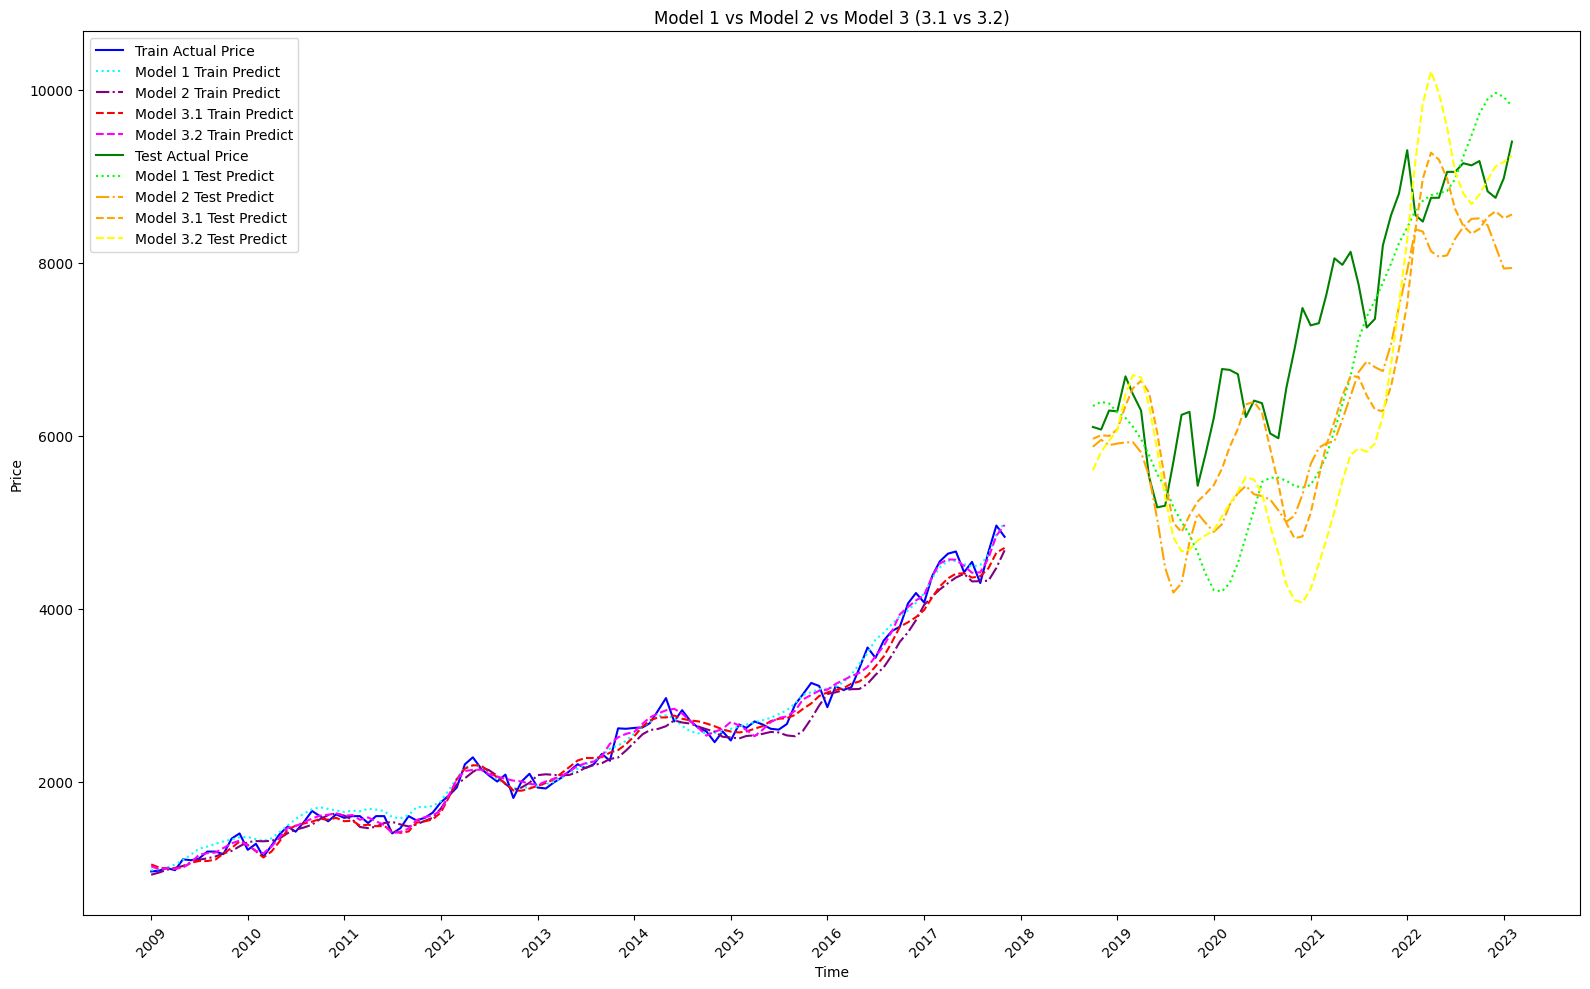

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.dates as mdates

# Create Dataset with PCA
def create_pca_dataset(prices, features_pca, look_back=5):
    dataX, dataY = [], []
    for i in range(len(prices) - look_back):
        a = [prices[i:(i + look_back), 0]]  # Start with the price data
        a.append(features_pca[i:(i + look_back)])  # Add PCA features
        a = np.column_stack(a)
        dataX.append(a)
        dataY.append(prices[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def apply_pca(train_features_stacked, test_features_stacked, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(train_features_stacked)  # Fit PCA with the full feature set
    return pca.transform(train_features_stacked), pca.transform(test_features_stacked), pca

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error (SMAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def train_lstm(df, roa, income_margin, roe, fl, de, cr, qr, rtr, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract time indices
    time_index = df.index
    split_point = int(len(prices) * 0.65)
    train_time_index = time_index[:split_point]
    test_time_index = time_index[split_point:]

    # Split prices into training and testing sets
    train_prices = prices[:split_point]
    test_prices = prices[split_point:]

    # Feature consistency checks
    features_list = [roa, income_margin, roe, fl, de, cr, qr, rtr]

    # Ensure all features are of the same length as prices
    for feature in features_list:
        if len(feature) != len(prices):
            raise ValueError(f"Feature length {len(feature)} does not match price length {len(prices)}")

    # Split each feature
    train_features = [feature[:split_point] for feature in features_list]
    test_features = [feature[split_point:] for feature in features_list]

    # Scale the prices and features
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    # Scale and stack features
    feature_scalers = []
    scaled_train_features = []
    scaled_test_features = []

    for train_feature, test_feature in zip(train_features, test_features):
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_features.append(feature_scaler.fit_transform(np.array(train_feature).reshape(-1, 1)))
        scaled_test_features.append(feature_scaler.transform(np.array(test_feature).reshape(-1, 1)))
        feature_scalers.append(feature_scaler)

    # Stack the scaled features
    train_features_stacked = np.column_stack(scaled_train_features)
    test_features_stacked = np.column_stack(scaled_test_features)

    # Create datasets without PCA
    X_train, Y_train = create_pca_dataset(train_prices_scaled, train_features_stacked, look_back)
    X_test, Y_test = create_pca_dataset(test_prices_scaled, test_features_stacked, look_back)

    # Train the LSTM model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict, train_time_index, test_time_index

def train_lstm_2_features(df, feature_indices, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract time indices
    time_index = df.index
    split_point = int(len(prices) * 0.65)
    train_time_index = time_index[:split_point]
    test_time_index = time_index[split_point:]

    # Split prices into training and testing sets
    train_prices = prices[:split_point]
    test_prices = prices[split_point:]

    # Feature consistency checks
    features_list = [roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR']]

    # Extract and check the features
    selected_features = [features_list[i] for i in feature_indices]
    for feature in selected_features:
        if len(feature) != len(prices):
            raise ValueError(f"Feature length {len(feature)} does not match price length {len(prices)}")

    # Split each selected feature
    train_features = [feature[:split_point] for feature in selected_features]
    test_features = [feature[split_point:] for feature in selected_features]

    # Scale the prices and features
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    # Scale and stack features
    feature_scalers = []
    scaled_train_features = []
    scaled_test_features = []

    for train_feature, test_feature in zip(train_features, test_features):
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_features.append(feature_scaler.fit_transform(np.array(train_feature).reshape(-1, 1)))
        scaled_test_features.append(feature_scaler.transform(np.array(test_feature).reshape(-1, 1)))
        feature_scalers.append(feature_scaler)

    # Stack the scaled features
    train_features_stacked = np.column_stack(scaled_train_features)
    test_features_stacked = np.column_stack(scaled_test_features)

    # Create datasets without PCA
    X_train, Y_train = create_pca_dataset(train_prices_scaled, train_features_stacked, look_back)
    X_test, Y_test = create_pca_dataset(test_prices_scaled, test_features_stacked, look_back)

    # Train the LSTM model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict, train_time_index, test_time_index

def train_pca_lstm(df, roa, income_margin, roe, fl, nor, ni, n_components, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract time indices
    time_index = df.index
    split_point = int(len(prices) * 0.65)
    train_time_index = time_index[:split_point]
    test_time_index = time_index[split_point:]

    # Split prices into training and testing sets
    train_prices = prices[:split_point]
    test_prices = prices[split_point:]

    # Feature consistency checks
    features_list = [roa, income_margin, roe, fl, nor, ni]

    # Ensure all features are of the same length as prices
    for feature in features_list:
        if len(feature) != len(prices):
            raise ValueError(f"Feature length {len(feature)} does not match price length {len(prices)}")

    # Split each feature
    train_features = [feature[:split_point] for feature in features_list]
    test_features = [feature[split_point:] for feature in features_list]

    # Scale the prices and features
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    # Scale and stack features for PCA
    feature_scalers = []
    scaled_train_features = []
    scaled_test_features = []

    for train_feature, test_feature in zip(train_features, test_features):
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_features.append(feature_scaler.fit_transform(np.array(train_feature).reshape(-1, 1)))
        scaled_test_features.append(feature_scaler.transform(np.array(test_feature).reshape(-1, 1)))
        feature_scalers.append(feature_scaler)

    # Stack the scaled features
    train_features_stacked = np.column_stack(scaled_train_features)
    test_features_stacked = np.column_stack(scaled_test_features)

    # Debugging: Print the shapes of the stacked features
    print(f"Train features stacked shape: {train_features_stacked.shape}")
    print(f"Test features stacked shape: {test_features_stacked.shape}")

    # Apply PCA
    pca = PCA(n_components=n_components)
    train_features_pca = pca.fit_transform(train_features_stacked)
    test_features_pca = pca.transform(test_features_stacked)

    # Debugging: Print the shapes after PCA transformation
    print(f"Train features PCA shape: {train_features_pca.shape}")
    print(f"Test features PCA shape: {test_features_pca.shape}")

    # Create datasets using PCA-transformed features
    X_train, Y_train = create_pca_dataset(train_prices_scaled, train_features_pca, look_back)
    X_test, Y_test = create_pca_dataset(test_prices_scaled, test_features_pca, look_back)

    # Train the LSTM model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict, train_time_index, test_time_index

# Plot predictions for LSTM with PCA (4 vs 8 components)
def plot_predictions_pca(trainY4, trainPredict4, testY4, testPredict4, trainY8, trainPredict8, testY8, testPredict8, title, train_time_index, test_time_index):
    plt.figure(figsize=(14, 7))

    # Plot actual and predicted values for Model with 4 components
    plt.plot(train_time_index, trainY4, label='PCA 4 Train Actual', color='blue')
    plt.plot(train_time_index, trainPredict4, label='PCA 4 Train Predict', color='red')
    plt.plot(test_time_index, testY4, label='PCA 4 Test Actual', color='green')
    plt.plot(test_time_index, testPredict4, label='PCA 4 Test Predict', color='orange')

    # Plot actual and predicted values for Model with 8 components
    plt.plot(train_time_index, trainPredict8, label='PCA 8 Train Predict', color='magenta', linestyle='dashed')
    plt.plot(test_time_index, testPredict8, label='PCA 8 Test Predict', color='yellow', linestyle='dashed')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Set major ticks to show every year
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

df_1_close = preprocessing(df_2)

roe_data = {
    'ROE': [0.0666, 0.0666, 0.0666, 0.0661, 0.0661, 0.0661, 0.0617, 0.0617, 0.0617, 0.0647, 0.0647, 0.0647, 0.0679, 0.0679, 0.0679, 0.0656, 0.0656, 0.0656, 0.0695, 0.0695, 0.0695, 0.0559, 0.0559, 0.0559, 0.0748, 0.0748, 0.0748, 0.072, 0.072, 0.072, 0.0753, 0.0753, 0.0753, 0.052, 0.052, 0.052, 0.0658, 0.0658, 0.0658, 0.0605, 0.0605, 0.0605, 0.0665, 0.0665, 0.0665, 0.0512, 0.0512, 0.0512, 0.0596, 0.0596, 0.0596, 0.066, 0.066, 0.066, 0.061, 0.061, 0.061, 0.054, 0.054, 0.054, 0.0596, 0.0596, 0.0596, 0.0583, 0.0583, 0.0583, 0.0552, 0.0552, 0.0552, 0.0509, 0.0509, 0.0509, 0.055, 0.055, 0.055, 0.0561, 0.0561, 0.0561, 0.052, 0.052, 0.052, 0.0447, 0.0447, 0.0447, 0.0491, 0.0491, 0.0491, 0.0509, 0.0509, 0.0509, 0.0487, 0.0487, 0.0487, 0.0422, 0.0422, 0.0422, 0.046, 0.046, 0.046, 0.0495, 0.0495, 0.0495, 0.0493, 0.0493, 0.0493, 0.0404, 0.0404, 0.0404, 0.0432, 0.0432, 0.0432, 0.0494, 0.0494, 0.0494, 0.0484, 0.0484, 0.0484, 0.0382, 0.0382, 0.0382, 0.0426, 0.0426, 0.0426, 0.048, 0.048, 0.048, 0.0439, 0.0439, 0.0439, 0.0383, 0.0383, 0.0383, 0.0335, 0.0335, 0.0335, 0.0435, 0.0435, 0.0435, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0396, 0.0396, 0.0396, 0.0442, 0.0442, 0.0442, 0.0406, 0.0406, 0.0406, 0.0414, 0.0414, 0.0414, 0.0492, 0.0492, 0.0492, 0.0515, 0.0515, 0.0515, 0.0533, 0.0533, 0.0533, 0.0546, 0.0546, 0.0546, 0.0564, 0.0564, 0.0564, 0.0519, 0.0519, 0.0519, 0.0504, 0.0504, 0.0504, 0.0567, 0.0567, 0.0567]
}

roa_data = {
    'ROA': [0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0061, 0.0061, 0.0061, 0.0068, 0.0068, 0.0068, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0073, 0.0073, 0.0073, 0.0062, 0.0062, 0.0062, 0.0082, 0.0082, 0.0082, 0.0079, 0.0079, 0.0079, 0.0083, 0.0083, 0.0083, 0.0057, 0.0057, 0.0057, 0.0073, 0.0073, 0.0073, 0.007, 0.007, 0.007, 0.0078, 0.0078, 0.0078, 0.0065, 0.0065, 0.0065, 0.0075, 0.0075, 0.0075, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.008, 0.008, 0.008, 0.0081, 0.0081, 0.0081, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0075, 0.0075, 0.0075, 0.0081, 0.0081, 0.0081, 0.0084, 0.0084, 0.0084, 0.0081, 0.0081, 0.0081, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0085, 0.0085, 0.0085, 0.0086, 0.0086, 0.0086, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.009, 0.009, 0.009, 0.0083, 0.0083, 0.0083, 0.0068, 0.0068, 0.0068, 0.0058, 0.0058, 0.0058, 0.0078, 0.0078, 0.0078, 0.0066, 0.0066, 0.0066, 0.0065, 0.0065, 0.0065, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0067, 0.0067, 0.0067, 0.0064, 0.0064, 0.0064, 0.0079, 0.0079, 0.0079, 0.0085, 0.0085, 0.0085, 0.009, 0.009, 0.009, 0.0087, 0.0087, 0.0087, 0.0093, 0.0093, 0.0093, 0.0089, 0.0089, 0.0089, 0.0087, 0.0087, 0.0087, 0.0089, 0.0089, 0.0089]
}

fl_data = {
    'Financial_Leverage': [10.16, 10.16, 10.16, 10.04, 10.04, 10.04, 10.14, 10.14, 10.14, 9.53, 9.53, 9.53, 9.89, 9.89, 9.89, 9.56, 9.56, 9.56, 9.51, 9.51, 9.51, 9.05, 9.05, 9.05, 9.15, 9.15, 9.15, 9.11, 9.11, 9.11, 9.09, 9.09, 9.09, 9.05, 9.05, 9.05, 8.98, 8.98, 8.98, 8.68, 8.68, 8.68, 8.55, 8.55, 8.55, 7.92, 7.92, 7.92, 7.96, 7.96, 7.96, 7.97, 7.97, 7.97, 7.77, 7.77, 7.77, 7.4, 7.4, 7.4, 7.45, 7.45, 7.45, 7.21, 7.21, 7.21, 7.11, 7.11, 7.11, 6.99, 6.99, 6.99, 7.01, 7.01, 7.01, 6.8, 6.8, 6.8, 6.65, 6.65, 6.65, 5.99, 5.99, 5.99, 6.06, 6.06, 6.06, 6.05, 6.05, 6.05, 6.02, 6.02, 6.02, 5.84, 5.84, 5.84, 6.12, 6.12, 6.12, 5.81, 5.81, 5.81, 5.71, 5.71, 5.71, 5.57, 5.57, 5.57, 5.79, 5.79, 5.79, 5.56, 5.56, 5.56, 5.44, 5.44, 5.44, 5.23, 5.23, 5.23, 5.45, 5.45, 5.45, 5.32, 5.32, 5.32, 5.28, 5.28, 5.28, 5.67, 5.67, 5.67, 5.76, 5.76, 5.76, 5.61, 5.61, 5.61, 5.83, 5.83, 5.83, 6.1, 6.1, 6.1, 6.03, 6.03, 6.03, 5.91, 5.91, 5.91, 6.06, 6.06, 6.06, 6.47, 6.47, 6.47, 6.23, 6.23, 6.23, 6.08, 6.08, 6.08, 5.95, 5.95, 5.95, 6.26, 6.26, 6.26, 6.04, 6.04, 6.04, 5.86, 5.86, 5.86, 5.81, 5.81, 5.81, 6.36, 6.36, 6.36]
}

im_data = {
    'Income_Margin': [0.3515, 0.3515, 0.3515, 0.3433, 0.3433, 0.3433, 0.3688, 0.3688, 0.3688, 0.4236, 0.4236, 0.4236, 0.4946, 0.4946, 0.4946, 0.5318, 0.5318, 0.5318, 0.4885, 0.4885, 0.4885, 0.5027, 0.5027, 0.5027, 0.4398, 0.4398, 0.4398, 0.5677, 0.5677, 0.5677, 0.5431, 0.5431, 0.5431, 0.6059, 0.6059, 0.6059, 0.4322, 0.4322, 0.4322, 0.5355, 0.5355, 0.5355, 0.5184, 0.5184, 0.5184, 0.2875, 0.2875, 0.2875, 0.3813, 0.3813, 0.3813, 0.4305, 0.4305, 0.4305, 0.4314, 0.4314, 0.4314, 0.416, 0.416, 0.416, 0.3862, 0.3862, 0.3862, 0.404, 0.404, 0.404, 0.4144, 0.4144, 0.4144, 0.3765, 0.3765, 0.3765, 0.3749, 0.3749, 0.3749, 0.402, 0.402, 0.402, 0.4264, 0.4264, 0.4264, 0.3732, 0.3732, 0.3732, 0.3769, 0.3769, 0.3769, 0.4179, 0.4179, 0.4179, 0.4434, 0.4434, 0.4434, 0.4938, 0.4938, 0.4938, 0.3981, 0.3981, 0.3981, 0.4265, 0.4265, 0.4265, 0.4661, 0.4661, 0.4661, 0.5307, 0.5307, 0.5307, 0.413, 0.413, 0.413, 0.4436, 0.4436, 0.4436, 0.4806, 0.4806, 0.4806, 0.564, 0.564, 0.564, 0.3982, 0.3982, 0.3982, 0.4254, 0.4254, 0.4254, 0.4929, 0.4929, 0.4929, 0.565, 0.565, 0.565, 0.3644, 0.3644, 0.3644, 0.3509, 0.3509, 0.3509, 0.4787, 0.4787, 0.4787, 0.5425, 0.5425, 0.5425, 0.4223, 0.4223, 0.4223, 0.4451, 0.4451, 0.4451, 0.5233, 0.5233, 0.5233, 0.5508, 0.5508, 0.5508, 0.4731, 0.4731, 0.4731, 0.5792, 0.5792, 0.5792, 0.5908, 0.5908, 0.5908, 0.6216, 0.6216, 0.6216, 0.5542, 0.5542, 0.5542, 0.592, 0.592, 0.592, 0.5584, 0.5584, 0.5584, 0.611, 0.611, 0.611]
}

nor_data = {
    'ORGR': [0.0323, 0.0323, 0.0323, 0.0147, 0.0147, 0.0147, 0.0153, 0.0153, 0.0153, 0.0018, 0.0018, 0.0018, 0.1297, 0.1297, 0.1297, 0.073, 0.073, 0.073, 0.1776, 0.1776, 0.1776, 0.0735, 0.0735, 0.0735, 0.0019, 0.0019, 0.0019, 0.0452, 0.0452, 0.0452, 0.0415, 0.0415, 0.0415, 0.0188, 0.0188, 0.0188, 0.0154, 0.0154, 0.0154, 0.0237, 0.0237, 0.0237, 0.0408, 0.0408, 0.0408, 1.1307, 1.1307, 1.1307, 0.3726, 0.3726, 0.3726, 0.0464, 0.0464, 0.0464, 0.1037, 0.1037, 0.1037, 0.0612, 0.0612, 0.0612, 0.0732, 0.0732, 0.0732, 0.0265, 0.0265, 0.0265, 0.0632, 0.0632, 0.0632, 0.0372, 0.0372, 0.0372, 0.0102, 0.0102, 0.0102, 0.031, 0.031, 0.031, 0.004, 0.004, 0.004, 0.101, 0.101, 0.101, 0.0382, 0.0382, 0.0382, 0.0204, 0.0204, 0.0204, 0.0234, 0.0234, 0.0234, 0.1163, 0.1163, 0.1163, 0.1376, 0.1376, 0.1376, 0.0375, 0.0375, 0.0375, 0.0328, 0.0328, 0.0328, 0.1015, 0.1015, 0.1015, 0.0997, 0.0997, 0.0997, 0.0044, 0.0044, 0.0044, 0.115, 0.115, 0.115, 0.1091, 0.1091, 0.1091, 0.1509, 0.1509, 0.1509, 0.0452, 0.0452, 0.0452, 0.0321, 0.0321, 0.0321, 0.147, 0.147, 0.147, 0.237, 0.237, 0.237, 0.0741, 0.0741, 0.0741, 0.0064, 0.0064, 0.0064, 0.1933, 0.1933, 0.1933, 0.2565, 0.2565, 0.2565, 0.0053, 0.0053, 0.0053, 0.0046, 0.0046, 0.0046, 0.1, 0.1, 0.1, 0.1372, 0.1372, 0.1372, 0.0123, 0.0123, 0.0123, 0.0739, 0.0739, 0.0739, 0.0305, 0.0305, 0.0305, 0.0885, 0.0885, 0.0885, 0.0303, 0.0303, 0.0303, 0.0244, 0.0244, 0.0244, 0.0833, 0.0833, 0.0833]
}

ni_data = {
    'NIGR': [0.0814, 0.0814, 0.0814, 0.0239, 0.0239, 0.0239, 0.0697, 0.0697, 0.0697, 0.0386, 0.0386, 0.0386, 0.1243, 0.1243, 0.1243, 0.0616, 0.0616, 0.0616, 0.038, 0.038, 0.038, 0.1142, 0.1142, 0.1142, 0.1487, 0.1487, 0.1487, 0.377, 0.377, 0.377, 0.0306, 0.0306, 0.0306, 0.1063, 0.1063, 0.1063, 0.0272, 0.0272, 0.0272, 0.0299, 0.0299, 0.0299, 0.0057, 0.0057, 0.0057, 0.1577, 0.1577, 0.1577, 0.1595, 0.1595, 0.1595, 0.1846, 0.1846, 0.1846, 0.1771, 0.1771, 0.1771, 0.0356, 0.0356, 0.0356, 0.0572, 0.0572, 0.0572, 0.1416, 0.1416, 0.1416, 0.0385, 0.0385, 0.0385, 0.0119, 0.0119, 0.0119, 0.0548, 0.0548, 0.0548, 0.1049, 0.1049, 0.1049, 0.0761, 0.0761, 0.0761, 0.0366, 0.0366, 0.0366, 0.0301, 0.0301, 0.0301, 0.1229, 0.1229, 0.1229, 0.0965, 0.0965, 0.0965, 0.0706, 0.0706, 0.0706, 0.1614, 0.1614, 0.1614, 0.1123, 0.1123, 0.1123, 0.1375, 0.1375, 0.1375, 0.0248, 0.0248, 0.0248, 0.1488, 0.1488, 0.1488, 0.0732, 0.0732, 0.0732, 0.1989, 0.1989, 0.1989, 0.0358, 0.0358, 0.0358, 0.1744, 0.1744, 0.1744, 0.1222, 0.1222, 0.1222, 0.1855, 0.1855, 0.1855, 0.0513, 0.0513, 0.0513, 0.1396, 0.1396, 0.1396, 0.1397, 0.1397, 0.1397, 0.3782, 0.3782, 0.3782, 0.0896, 0.0896, 0.0896, 0.0083, 0.0083, 0.0083, 0.0536, 0.0536, 0.0536, 0.1787, 0.1787, 0.1787, 0.0595, 0.0595, 0.0595, 0.0194, 0.0194, 0.0194, 0.2378, 0.2378, 0.2378, 0.0926, 0.0926, 0.0926, 0.0801, 0.0801, 0.0801, 0.0224, 0.0224, 0.0224, 0.0986, 0.0986, 0.0986, 0.0339, 0.0339, 0.0339, 0.0018, 0.0018, 0.0018]
}

# Assuming df_1_close, roa_data['ROA'], and im_data['Income_Margin'] are defined and prepared
train_pca4_trainScore, train_pca4_testScore, train_pca4_trainMAPE, train_pca4_testMAPE, train_pca4_trainSMAPE, train_pca4_testSMAPE, train_pca4_trainY, train_pca4_trainPredict, train_pca4_testY, train_pca4_testPredict, train_time_index, test_time_index = train_pca_lstm(df_1_close, roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], nor_data['ORGR'], ni_data['NIGR'], fl_data['Financial_Leverage'], n_components=4)
train_pca8_trainScore, train_pca8_testScore, train_pca8_trainMAPE, train_pca8_testMAPE, train_pca8_trainSMAPE, train_pca8_testSMAPE, train_pca8_trainY, train_pca8_trainPredict, train_pca8_testY, train_pca8_testPredict, train_time_index, test_time_index = train_pca_lstm(df_1_close, roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], or_data['ORGR'], ni_data['NIGR'], fl_data['Financial_Leverage'], n_components=6)

# Train LSTM models without PCA
train_no_pca_trainScore, train_no_pca_testScore, train_no_pca_trainMAPE, train_no_pca_testMAPE, train_no_pca_trainSMAPE, train_no_pca_testSMAPE, train_no_pca_trainY, train_no_pca_trainPredict, train_no_pca_testY, train_no_pca_testPredict, train_time_index, test_time_index = train_lstm(df_1_close, roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR'])

# Define the indices of the two features to use
feature_indices = [0, 1]  # Example indices for ROA and Income Margin

# Train LSTM model with 2 features
train_2_features_trainScore, train_2_features_testScore, train_2_features_trainMAPE, train_2_features_testMAPE, train_2_features_trainSMAPE, train_2_features_testSMAPE, train_2_features_trainY, train_2_features_trainPredict, train_2_features_testY, train_2_features_testPredict, train_time_index, test_time_index = train_lstm_2_features(df_1_close, feature_indices)

# RMSE, MAPE, and SMAPE scores
rmse_mape_smape_data_pca = [
    ["PCA 4 Components", train_pca4_trainScore, train_pca4_testScore, train_pca4_trainMAPE, train_pca4_testMAPE, train_pca4_trainSMAPE, train_pca4_testSMAPE],
    ["PCA 6 Components", train_pca8_trainScore, train_pca8_testScore, train_pca8_trainMAPE, train_pca8_testMAPE, train_pca8_trainSMAPE, train_pca8_testSMAPE]
]

# Table headers
headers_pca = ["Model", "Train RMSE", "Test RMSE", "Train MAPE (%)", "Test MAPE (%)", "Train SMAPE (%)", "Test SMAPE (%)"]

# Print table for PCA models
print("RMSE, MAPE, and SMAPE Comparison (PCA Models):")
print(tabulate(rmse_mape_smape_data_pca, headers=headers_pca, floatfmt=(".2f", ".2f", ".2f", ".2f", ".2f", ".2f")))

def flatten_array(arr):
    return np.squeeze(arr)

def plot_predictions_all(trainY4, trainPredict4, testY4, testPredict4, trainY8, trainPredict8, testY8, testPredict8, trainY_no_pca, trainPredict_no_pca, testY_no_pca, testPredict_no_pca, trainY_2_features, trainPredict_2_features, testY_2_features, testPredict_2_features, title, train_time_index, test_time_index):
    plt.figure(figsize=(16, 10))

    # Flatten the data
    trainY4 = flatten_array(trainY4)
    trainPredict4 = flatten_array(trainPredict4)
    testY4 = flatten_array(testY4)
    testPredict4 = flatten_array(testPredict4)
    trainY8 = flatten_array(trainY8)
    trainPredict8 = flatten_array(trainPredict8)
    testY8 = flatten_array(testY8)
    testPredict8 = flatten_array(testPredict8)
    trainY_no_pca = flatten_array(trainY_no_pca)
    trainPredict_no_pca = flatten_array(trainPredict_no_pca)
    testY_no_pca = flatten_array(testY_no_pca)
    testPredict_no_pca = flatten_array(testPredict_no_pca)
    trainY_2_features = flatten_array(trainY_2_features)
    trainPredict_2_features = flatten_array(trainPredict_2_features)
    testY_2_features = flatten_array(testY_2_features)
    testPredict_2_features = flatten_array(testPredict_2_features)

    # Plot actual and predicted values for Model with 4 components
    plt.plot(train_time_index[:len(trainY4)], trainY4, label='Train Actual Price', color='blue')
    plt.plot(train_time_index[:len(trainPredict_no_pca)], trainPredict_no_pca, label='Model 1 Train Predict', color='cyan', linestyle='dotted')
    plt.plot(train_time_index[:len(trainPredict_2_features)], trainPredict_2_features, label='Model 2 Train Predict', color='purple', linestyle='dashdot')
    plt.plot(train_time_index[:len(trainPredict4)], trainPredict4, label='Model 3.1 Train Predict', color='red', linestyle='dashed')
    plt.plot(train_time_index[:len(trainPredict8)], trainPredict8, label='Model 3.2 Train Predict', color='magenta', linestyle='dashed')
    plt.plot(test_time_index[:len(testY4)], testY4, label='Test Actual Price', color='green')
    plt.plot(test_time_index[:len(testPredict_no_pca)], testPredict_no_pca, label='Model 1 Test Predict', color='lime', linestyle='dotted')
    plt.plot(test_time_index[:len(testPredict_2_features)], testPredict_2_features, label='Model 2 Test Predict', color='orange', linestyle='dashdot')
    plt.plot(test_time_index[:len(testPredict4)], testPredict4, label='Model 3.1 Test Predict', color='orange', linestyle='dashed')
    plt.plot(test_time_index[:len(testPredict8)], testPredict8, label='Model 3.2 Test Predict', color='yellow', linestyle='dashed')

    # Set the title and labels
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Set major ticks to show every year
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

print("Train time index length:", len(train_time_index))
print("Test time index length:", len(test_time_index))
print("Train PCA 4 Actual length:", len(train_pca4_trainY))
print("Train PCA 4 Predict length:", len(train_pca4_trainPredict))
print("Test PCA 4 Actual length:", len(train_pca4_testY))
print("Test PCA 4 Predict length:", len(train_pca4_testPredict))
print("Train PCA 8 Predict length:", len(train_pca8_trainPredict))
print("Test PCA 8 Predict length:", len(train_pca8_testPredict))

# Combine the predictions for both PCA models into a single plot
plot_predictions_all(train_pca4_trainY, train_pca4_trainPredict, train_pca4_testY, train_pca4_testPredict,
                     train_pca8_trainY, train_pca8_trainPredict, train_pca8_testY, train_pca8_testPredict,
                     train_no_pca_trainY, train_no_pca_trainPredict, train_no_pca_testY, train_no_pca_testPredict,
                     train_2_features_trainY, train_2_features_trainPredict, train_2_features_testY, train_2_features_testPredict,
                     'Model 1 vs Model 2 vs Model 3 (3.1 vs 3.2)', train_time_index, test_time_index)

##TLKM

Train features stacked shape: (117, 8)
Test features stacked shape: (63, 8)
Train features PCA shape: (117, 4)
Test features PCA shape: (63, 4)
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 379ms/step - loss: 0.1174
Epoch 2/150
7/7 - 0s - 8ms/step - loss: 0.0183
Epoch 3/150
7/7 - 0s - 8ms/step - loss: 0.0231
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0090
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0076
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0062
Epoch 7/150
7/7 - 0s - 9ms/step - loss: 0.0048
Epoch 8/150
7/7 - 0s - 20ms/step - loss: 0.0040
Epoch 9/150
7/7 - 0s - 9ms/step - loss: 0.0045
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0036
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0033
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0031
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0027
Epoch 14/150
7/7 - 0s - 21ms/step - loss: 0.0026
Epoch 15/150
7/7 - 0s - 9ms/step - loss: 0.0025
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0023
Epoch 17/150
7/7 - 0s - 9ms/step - loss: 0.0023
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0023
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0022
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0023
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0022
Epoch 22/

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train features stacked shape: (117, 8)
Test features stacked shape: (63, 8)
Train features PCA shape: (117, 8)
Test features PCA shape: (63, 8)
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 309ms/step - loss: 0.0690
Epoch 2/150
7/7 - 0s - 8ms/step - loss: 0.0118
Epoch 3/150
7/7 - 0s - 10ms/step - loss: 0.0085
Epoch 4/150
7/7 - 0s - 19ms/step - loss: 0.0064
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0048
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0041
Epoch 7/150
7/7 - 0s - 8ms/step - loss: 0.0035
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0031
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0031
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0027
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0025
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0024
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0026
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0025
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0023
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0020
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0021
Epoch 18/150
7/7 - 0s - 9ms/step - loss: 0.0021
Epoch 19/150
7/7 - 0s - 20ms/step - loss: 0.0021
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0021
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0020
Epoch 22

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 351ms/step - loss: 0.0951
Epoch 2/150
7/7 - 0s - 13ms/step - loss: 0.0179
Epoch 3/150
7/7 - 0s - 15ms/step - loss: 0.0125
Epoch 4/150
7/7 - 0s - 8ms/step - loss: 0.0076
Epoch 5/150
7/7 - 0s - 8ms/step - loss: 0.0071
Epoch 6/150
7/7 - 0s - 8ms/step - loss: 0.0058
Epoch 7/150
7/7 - 0s - 19ms/step - loss: 0.0053
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0050
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0060
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0045
Epoch 11/150
7/7 - 0s - 8ms/step - loss: 0.0038
Epoch 12/150
7/7 - 0s - 8ms/step - loss: 0.0037
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0030
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0028
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0028
Epoch 16/150
7/7 - 0s - 9ms/step - loss: 0.0026
Epoch 17/150
7/7 - 0s - 19ms/step - loss: 0.0024
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0022
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0025
Epoch 20/150
7/7 - 0s - 9ms/step - loss: 0.0021
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0022
Epoch 2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 350ms/step - loss: 0.0787
Epoch 2/150
7/7 - 0s - 20ms/step - loss: 0.0140
Epoch 3/150
7/7 - 0s - 13ms/step - loss: 0.0100
Epoch 4/150
7/7 - 0s - 20ms/step - loss: 0.0119
Epoch 5/150
7/7 - 0s - 17ms/step - loss: 0.0114
Epoch 6/150
7/7 - 0s - 9ms/step - loss: 0.0085
Epoch 7/150
7/7 - 0s - 9ms/step - loss: 0.0071
Epoch 8/150
7/7 - 0s - 8ms/step - loss: 0.0065
Epoch 9/150
7/7 - 0s - 8ms/step - loss: 0.0060
Epoch 10/150
7/7 - 0s - 8ms/step - loss: 0.0058
Epoch 11/150
7/7 - 0s - 9ms/step - loss: 0.0050
Epoch 12/150
7/7 - 0s - 9ms/step - loss: 0.0047
Epoch 13/150
7/7 - 0s - 8ms/step - loss: 0.0049
Epoch 14/150
7/7 - 0s - 8ms/step - loss: 0.0051
Epoch 15/150
7/7 - 0s - 8ms/step - loss: 0.0038
Epoch 16/150
7/7 - 0s - 8ms/step - loss: 0.0047
Epoch 17/150
7/7 - 0s - 8ms/step - loss: 0.0043
Epoch 18/150
7/7 - 0s - 8ms/step - loss: 0.0038
Epoch 19/150
7/7 - 0s - 8ms/step - loss: 0.0039
Epoch 20/150
7/7 - 0s - 8ms/step - loss: 0.0035
Epoch 21/150
7/7 - 0s - 8ms/step - loss: 0.0034
Epoch 2

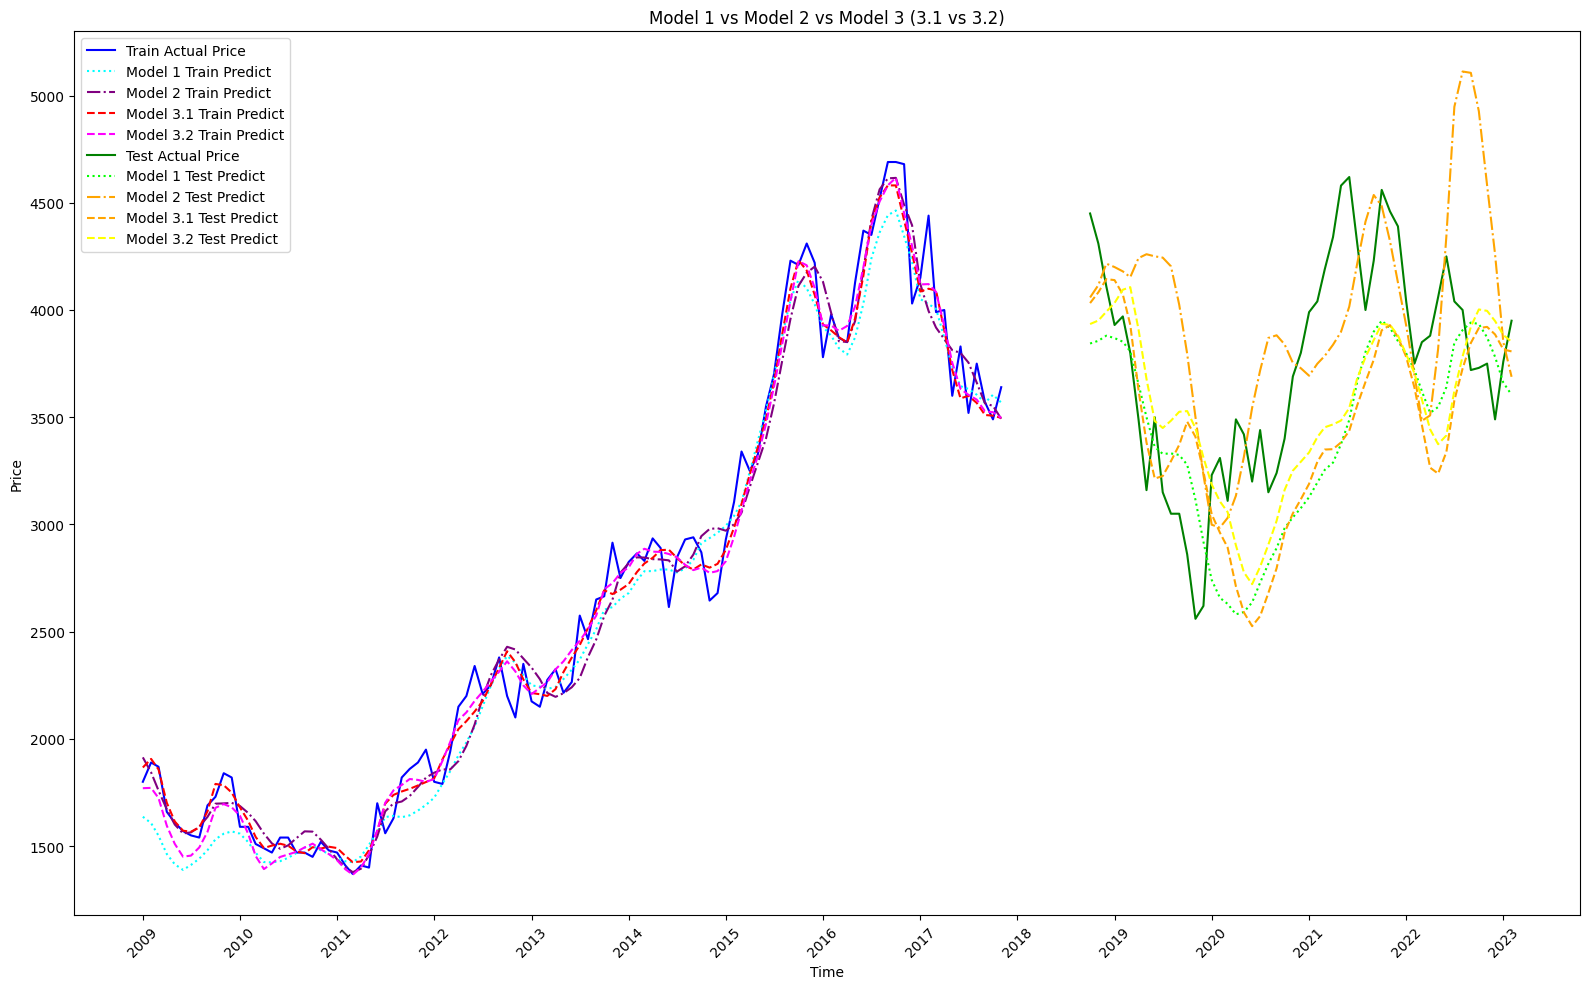

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.dates as mdates

# Create Dataset with PCA
def create_pca_dataset(prices, features_pca, look_back=5):
    dataX, dataY = [], []
    for i in range(len(prices) - look_back):
        a = [prices[i:(i + look_back), 0]]  # Start with the price data
        a.append(features_pca[i:(i + look_back)])  # Add PCA features
        a = np.column_stack(a)
        dataX.append(a)
        dataY.append(prices[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def apply_pca(train_features_stacked, test_features_stacked, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(train_features_stacked)  # Fit PCA with the full feature set
    return pca.transform(train_features_stacked), pca.transform(test_features_stacked), pca

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error (SMAPE)."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def train_model(X_train, Y_train, look_back, epochs, batch_size, verbose):
    model = Sequential()
    model.add(LSTM(150, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def train_lstm(df, roa, income_margin, roe, fl, de, cr, qr, rtr, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract time indices
    time_index = df.index
    split_point = int(len(prices) * 0.65)
    train_time_index = time_index[:split_point]
    test_time_index = time_index[split_point:]

    # Split prices into training and testing sets
    train_prices = prices[:split_point]
    test_prices = prices[split_point:]

    # Feature consistency checks
    features_list = [roa, income_margin, roe, fl, de, cr, qr, rtr]

    # Ensure all features are of the same length as prices
    for feature in features_list:
        if len(feature) != len(prices):
            raise ValueError(f"Feature length {len(feature)} does not match price length {len(prices)}")

    # Split each feature
    train_features = [feature[:split_point] for feature in features_list]
    test_features = [feature[split_point:] for feature in features_list]

    # Scale the prices and features
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    # Scale and stack features
    feature_scalers = []
    scaled_train_features = []
    scaled_test_features = []

    for train_feature, test_feature in zip(train_features, test_features):
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_features.append(feature_scaler.fit_transform(np.array(train_feature).reshape(-1, 1)))
        scaled_test_features.append(feature_scaler.transform(np.array(test_feature).reshape(-1, 1)))
        feature_scalers.append(feature_scaler)

    # Stack the scaled features
    train_features_stacked = np.column_stack(scaled_train_features)
    test_features_stacked = np.column_stack(scaled_test_features)

    # Create datasets without PCA
    X_train, Y_train = create_pca_dataset(train_prices_scaled, train_features_stacked, look_back)
    X_test, Y_test = create_pca_dataset(test_prices_scaled, test_features_stacked, look_back)

    # Train the LSTM model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict, train_time_index, test_time_index

def train_lstm_2_features(df, feature_indices, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract time indices
    time_index = df.index
    split_point = int(len(prices) * 0.65)
    train_time_index = time_index[:split_point]
    test_time_index = time_index[split_point:]

    # Split prices into training and testing sets
    train_prices = prices[:split_point]
    test_prices = prices[split_point:]

    # Feature consistency checks
    features_list = [roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR']]

    # Extract and check the features
    selected_features = [features_list[i] for i in feature_indices]
    for feature in selected_features:
        if len(feature) != len(prices):
            raise ValueError(f"Feature length {len(feature)} does not match price length {len(prices)}")

    # Split each selected feature
    train_features = [feature[:split_point] for feature in selected_features]
    test_features = [feature[split_point:] for feature in selected_features]

    # Scale the prices and features
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    # Scale and stack features
    feature_scalers = []
    scaled_train_features = []
    scaled_test_features = []

    for train_feature, test_feature in zip(train_features, test_features):
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_features.append(feature_scaler.fit_transform(np.array(train_feature).reshape(-1, 1)))
        scaled_test_features.append(feature_scaler.transform(np.array(test_feature).reshape(-1, 1)))
        feature_scalers.append(feature_scaler)

    # Stack the scaled features
    train_features_stacked = np.column_stack(scaled_train_features)
    test_features_stacked = np.column_stack(scaled_test_features)

    # Create datasets without PCA
    X_train, Y_train = create_pca_dataset(train_prices_scaled, train_features_stacked, look_back)
    X_test, Y_test = create_pca_dataset(test_prices_scaled, test_features_stacked, look_back)

    # Train the LSTM model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict, train_time_index, test_time_index

def train_pca_lstm(df, roa, income_margin, roe, fl, de, cr, qr, rtr, n_components, look_back=10, epochs=150, batch_size=16, verbose=2):
    if 'Close' in df.columns:
        prices = df['Close'].values
    else:
        raise ValueError("No column containing closing prices found in the DataFrame.")

    # Extract time indices
    time_index = df.index
    split_point = int(len(prices) * 0.65)
    train_time_index = time_index[:split_point]
    test_time_index = time_index[split_point:]

    # Split prices into training and testing sets
    train_prices = prices[:split_point]
    test_prices = prices[split_point:]

    # Feature consistency checks
    features_list = [roa, income_margin, roe, fl, de, cr, qr, rtr]

    # Ensure all features are of the same length as prices
    for feature in features_list:
        if len(feature) != len(prices):
            raise ValueError(f"Feature length {len(feature)} does not match price length {len(prices)}")

    # Split each feature
    train_features = [feature[:split_point] for feature in features_list]
    test_features = [feature[split_point:] for feature in features_list]

    # Scale the prices and features
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_prices_scaled = scaler.fit_transform(train_prices.reshape(-1, 1))
    test_prices_scaled = scaler.transform(test_prices.reshape(-1, 1))

    # Scale and stack features for PCA
    feature_scalers = []
    scaled_train_features = []
    scaled_test_features = []

    for train_feature, test_feature in zip(train_features, test_features):
        feature_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_features.append(feature_scaler.fit_transform(np.array(train_feature).reshape(-1, 1)))
        scaled_test_features.append(feature_scaler.transform(np.array(test_feature).reshape(-1, 1)))
        feature_scalers.append(feature_scaler)

    # Stack the scaled features
    train_features_stacked = np.column_stack(scaled_train_features)
    test_features_stacked = np.column_stack(scaled_test_features)

    # Debugging: Print the shapes of the stacked features
    print(f"Train features stacked shape: {train_features_stacked.shape}")
    print(f"Test features stacked shape: {test_features_stacked.shape}")

    # Apply PCA
    pca = PCA(n_components=n_components)
    train_features_pca = pca.fit_transform(train_features_stacked)
    test_features_pca = pca.transform(test_features_stacked)

    # Debugging: Print the shapes after PCA transformation
    print(f"Train features PCA shape: {train_features_pca.shape}")
    print(f"Test features PCA shape: {test_features_pca.shape}")

    # Create datasets using PCA-transformed features
    X_train, Y_train = create_pca_dataset(train_prices_scaled, train_features_pca, look_back)
    X_test, Y_test = create_pca_dataset(test_prices_scaled, test_features_pca, look_back)

    # Train the LSTM model
    model = train_model(X_train, Y_train, look_back, epochs, batch_size, verbose)

    # Evaluate the model
    trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict = evaluate_model(model, X_train, Y_train, X_test, Y_test, scaler)

    return trainScore, testScore, trainMAPE, testMAPE, trainSMAPE, testSMAPE, trainY, trainPredict, testY, testPredict, train_time_index, test_time_index

# Plot predictions for LSTM with PCA (4 vs 8 components)
def plot_predictions_pca(trainY4, trainPredict4, testY4, testPredict4, trainY8, trainPredict8, testY8, testPredict8, title, train_time_index, test_time_index):
    plt.figure(figsize=(14, 7))

    # Plot actual and predicted values for Model with 4 components
    plt.plot(train_time_index, trainY4, label='PCA 4 Train Actual', color='blue')
    plt.plot(train_time_index, trainPredict4, label='PCA 4 Train Predict', color='red')
    plt.plot(test_time_index, testY4, label='PCA 4 Test Actual', color='green')
    plt.plot(test_time_index, testPredict4, label='PCA 4 Test Predict', color='orange')

    # Plot actual and predicted values for Model with 8 components
    plt.plot(train_time_index, trainPredict8, label='PCA 8 Train Predict', color='magenta', linestyle='dashed')
    plt.plot(test_time_index, testPredict8, label='PCA 8 Test Predict', color='yellow', linestyle='dashed')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Set major ticks to show every year
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

df_1_close = preprocessing(df_5)

roe_data = {
    'ROE': [0.0912, 0.0912, 0.0912, 0.1434, 0.1434, 0.1434, 0.1211, 0.1211, 0.1211, 0.0818, 0.0818, 0.0818, 0.0901, 0.0901, 0.0901, 0.1078, 0.1078, 0.1078, 0.0958, 0.0958, 0.0958, 0.0836, 0.0836, 0.0836, 0.0599, 0.0599, 0.0599, 0.0704, 0.0704, 0.0704, 0.0532, 0.0532, 0.0532, 0.0543, 0.0543, 0.0543, 0.0669, 0.0669, 0.0669, 0.0684, 0.0684, 0.0684, 0.0733, 0.0733, 0.0733, 0.0553, 0.0553, 0.0553, 0.0632, 0.0632, 0.0632, 0.0716, 0.0716, 0.0716, 0.0686, 0.0686, 0.0686, 0.052, 0.052, 0.052, 0.0569, 0.0569, 0.0569, 0.0622, 0.0622, 0.0622, 0.0625, 0.0625, 0.0625, 0.0471, 0.0471, 0.0471, 0.0533, 0.0533, 0.0533, 0.0546, 0.0546, 0.0546, 0.0579, 0.0579, 0.0579, 0.0525, 0.0525, 0.0525, 0.0576, 0.0576, 0.0576, 0.0677, 0.0677, 0.0677, 0.0575, 0.0575, 0.0575, 0.0547, 0.0547, 0.0547, 0.0734, 0.0734, 0.0734, 0.0638, 0.0638, 0.0638, 0.0641, 0.0641, 0.0641, 0.0455, 0.0455, 0.0455, 0.0582, 0.0582, 0.0582, 0.0349, 0.0349, 0.0349, 0.0611, 0.0611, 0.0611, 0.0384, 0.0384, 0.0384, 0.0592, 0.0592, 0.0592, 0.0517, 0.0517, 0.0517, 0.054, 0.054, 0.054, 0.0221, 0.0221, 0.0221, 0.0551, 0.0551, 0.0551, 0.0534, 0.0534, 0.0534, 0.0559, 0.0559, 0.0559, 0.0402, 0.0402, 0.0402, 0.0554, 0.0554, 0.0554, 0.0654, 0.0654, 0.0654, 0.0613, 0.0613, 0.0613, 0.0484, 0.0484, 0.0484, 0.0479, 0.0479, 0.0479, 0.0598, 0.0598, 0.0598, 0.0265, 0.0265, 0.0265, 0.0323, 0.0323, 0.0323, 0.0474, 0.0474, 0.0474, 0.0511, 0.0511, 0.0511, 0.0516, 0.0516, 0.0516, 0.0373, 0.0373, 0.0373]
}

roa_data = {
    'ROA': [0.0368, 0.0368, 0.0368, 0.0519, 0.0519, 0.0519, 0.0477, 0.0477, 0.0477, 0.0327, 0.0327, 0.0327, 0.039, 0.039, 0.039, 0.0434, 0.0434, 0.0434, 0.0409, 0.0409, 0.0409, 0.0372, 0.0372, 0.0372, 0.0281, 0.0281, 0.0281, 0.0312, 0.0312, 0.0312, 0.0246, 0.0246, 0.0246, 0.025, 0.025, 0.025, 0.0318, 0.0318, 0.0318, 0.0306, 0.0306, 0.0306, 0.0339, 0.0339, 0.0339, 0.0256, 0.0256, 0.0256, 0.0299, 0.0299, 0.0299, 0.0327, 0.0327, 0.0327, 0.0326, 0.0326, 0.0326, 0.0246, 0.0246, 0.0246, 0.028, 0.028, 0.028, 0.0289, 0.0289, 0.0289, 0.0292, 0.0292, 0.0292, 0.0227, 0.0227, 0.0227, 0.026, 0.026, 0.026, 0.0236, 0.0236, 0.0236, 0.0259, 0.0259, 0.0259, 0.0237, 0.0237, 0.0237, 0.0259, 0.0259, 0.0259, 0.0311, 0.0311, 0.0311, 0.0271, 0.0271, 0.0271, 0.0257, 0.0257, 0.0257, 0.0357, 0.0357, 0.0357, 0.0305, 0.0305, 0.0305, 0.0305, 0.0305, 0.0305, 0.0213, 0.0213, 0.0213, 0.0278, 0.0278, 0.0278, 0.0147, 0.0147, 0.0147, 0.027, 0.027, 0.027, 0.0184, 0.0184, 0.0184, 0.0284, 0.0284, 0.0284, 0.0225, 0.0225, 0.0225, 0.025, 0.025, 0.025, 0.01, 0.01, 0.01, 0.0242, 0.0242, 0.0242, 0.0208, 0.0208, 0.0208, 0.0244, 0.0244, 0.0244, 0.0167, 0.0167, 0.0167, 0.0233, 0.0233, 0.0233, 0.0244, 0.0244, 0.0244, 0.026, 0.026, 0.026, 0.0212, 0.0212, 0.0212, 0.0219, 0.0219, 0.0219, 0.0261, 0.0261, 0.0261, 0.0121, 0.0121, 0.0121, 0.0152, 0.0152, 0.0152, 0.0231, 0.0231, 0.0231, 0.0218, 0.0218, 0.0218, 0.0244, 0.0244, 0.0244, 0.0176, 0.0176, 0.0176]
}

de_data = {
    'Debt_to_Equity': [0.53, 0.53, 0.53, 0.63, 0.63, 0.63, 0.57, 0.57, 0.57, 0.49, 0.49, 0.49, 0.48, 0.48, 0.48, 0.54, 0.54, 0.54, 0.5, 0.5, 0.5, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.32, 0.32, 0.32, 0.4, 0.4, 0.4, 0.35, 0.35, 0.35, 0.37, 0.37, 0.37, 0.34, 0.34, 0.34, 0.39, 0.39, 0.39, 0.35, 0.35, 0.35, 0.33, 0.33, 0.33, 0.31, 0.31, 0.31, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.35, 0.35, 0.35, 0.33, 0.33, 0.33, 0.55, 0.55, 0.55, 0.49, 0.49, 0.49, 0.46, 0.46, 0.46, 0.44, 0.44, 0.44, 0.43, 0.43, 0.43, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.35, 0.35, 0.35, 0.41, 0.41, 0.41, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.37, 0.37, 0.37, 0.62, 0.62, 0.62, 0.52, 0.52, 0.52, 0.45, 0.45, 0.45, 0.41, 0.41, 0.41, 0.61, 0.61, 0.61, 0.51, 0.51, 0.51, 0.52, 0.52, 0.52, 0.57, 0.57, 0.57, 0.67, 0.67, 0.67, 0.61, 0.61, 0.61, 0.49, 0.49, 0.49, 0.5, 0.5, 0.5, 0.66, 0.66, 0.66, 0.52, 0.52, 0.52, 0.43, 0.43, 0.43, 0.38, 0.38, 0.38, 0.51, 0.51, 0.51, 0.4, 0.4, 0.4, 0.34, 0.34, 0.34, 0.32, 0.32, 0.32, 0.45, 0.45, 0.45, 0.38, 0.38, 0.38, 0.35, 0.35, 0.35, 0.29, 0.29, 0.29]
}

fl_data = {
    'Financial_Leverage': [2.76, 2.76, 2.76, 2.54, 2.54, 2.54, 2.5, 2.5, 2.5, 2.31, 2.31, 2.31, 2.48, 2.48, 2.48, 2.34, 2.34, 2.34, 2.25, 2.25, 2.25, 2.13, 2.13, 2.13, 2.26, 2.26, 2.26, 2.16, 2.16, 2.16, 2.17, 2.17, 2.17, 2.11, 2.11, 2.11, 2.24, 2.24, 2.24, 2.16, 2.16, 2.16, 2.16, 2.16, 2.16, 2.11, 2.11, 2.11, 2.19, 2.19, 2.19, 2.11, 2.11, 2.11, 2.11, 2.11, 2.11, 2.04, 2.04, 2.04, 2.15, 2.15, 2.15, 2.14, 2.14, 2.14, 2.08, 2.08, 2.08, 2.05, 2.05, 2.05, 2.31, 2.31, 2.31, 2.24, 2.24, 2.24, 2.21, 2.21, 2.21, 2.22, 2.22, 2.22, 2.17, 2.17, 2.17, 2.12, 2.12, 2.12, 2.13, 2.13, 2.13, 2.06, 2.06, 2.06, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.14, 2.14, 2.14, 2.1, 2.1, 2.1, 2.38, 2.38, 2.38, 2.26, 2.26, 2.26, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.3, 2.3, 2.3, 2.16, 2.16, 2.16, 2.22, 2.22, 2.22, 2.27, 2.27, 2.27, 2.57, 2.57, 2.57, 2.29, 2.29, 2.29, 2.41, 2.41, 2.41, 2.37, 2.37, 2.37, 2.68, 2.68, 2.68, 2.35, 2.35, 2.35, 2.28, 2.28, 2.28, 2.19, 2.19, 2.19, 2.29, 2.29, 2.29, 2.18, 2.18, 2.18, 2.13, 2.13, 2.13, 2.05, 2.05, 2.05, 2.35, 2.35, 2.35, 2.11, 2.11, 2.11, 2.11, 2.11, 2.11, 2.03, 2.03, 2.03]
}

cr_data = {
    'Current_Ratio': [0.49, 0.49, 0.49, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.63, 0.63, 0.63, 0.58, 0.58, 0.58, 0.79, 0.79, 0.79, 0.91, 0.91, 0.91, 1.09, 1.09, 1.09, 0.89, 0.89, 0.89, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 1.06, 1.06, 1.06, 0.84, 0.84, 0.84, 1.04, 1.04, 1.04, 1.16, 1.16, 1.16, 1.34, 1.34, 1.34, 0.95, 0.95, 0.95, 1.18, 1.18, 1.18, 1.16, 1.16, 1.16, 1.37, 1.37, 1.37, 1.01, 1.01, 1.01, 1.0, 1.0, 1.0, 1.06, 1.06, 1.06, 1.2, 1.2, 1.2, 1.25, 1.25, 1.25, 1.34, 1.34, 1.34, 1.35, 1.35, 1.35, 1.48, 1.48, 1.48, 1.19, 1.19, 1.19, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.33, 1.33, 1.33, 1.07, 1.07, 1.07, 1.19, 1.19, 1.19, 1.05, 1.05, 1.05, 1.18, 1.18, 1.18, 0.86, 0.86, 0.86, 0.93, 0.93, 0.93, 0.94, 0.94, 0.94, 1.04, 1.04, 1.04, 0.93, 0.93, 0.93, 0.84, 0.84, 0.84, 0.71, 0.71, 0.71, 0.8, 0.8, 0.8, 0.65, 0.65, 0.65, 0.64, 0.64, 0.64, 0.67, 0.67, 0.67, 0.8, 0.8, 0.8, 0.66, 0.66, 0.66, 0.6, 0.6, 0.6, 0.89, 0.89, 0.89, 0.93, 0.93, 0.93, 0.8, 0.8, 0.8, 0.82, 0.82, 0.82, 0.78, 0.78, 0.78, 0.85, 0.85, 0.85, 0.69, 0.69, 0.69, 0.72, 0.72, 0.72, 0.78, 0.78, 0.78, 0.87, 0.87, 0.87]
}

qr_data = {
    'Quick_Ratio': [0.48, 0.48, 0.48, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.61, 0.61, 0.61, 0.56, 0.56, 0.56, 0.76, 0.76, 0.76, 0.89, 0.89, 0.89, 1.06, 1.06, 1.06, 0.87, 0.87, 0.87, 0.93, 0.93, 0.93, 0.92, 0.92, 0.92, 1.02, 1.02, 1.02, 0.81, 0.81, 0.81, 1.01, 1.01, 1.01, 1.14, 1.14, 1.14, 1.31, 1.31, 1.31, 0.93, 0.93, 0.93, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.34, 1.34, 1.34, 0.97, 0.97, 0.97, 0.98, 0.98, 0.98, 1.05, 1.05, 1.05, 1.18, 1.18, 1.18, 1.23, 1.23, 1.23, 1.32, 1.32, 1.32, 1.34, 1.34, 1.34, 1.47, 1.47, 1.47, 1.17, 1.17, 1.17, 1.26, 1.26, 1.26, 1.18, 1.18, 1.18, 1.32, 1.32, 1.32, 1.04, 1.04, 1.04, 1.17, 1.17, 1.17, 1.03, 1.03, 1.03, 1.16, 1.16, 1.16, 0.85, 0.85, 0.85, 0.91, 0.91, 0.91, 0.92, 0.92, 0.92, 1.03, 1.03, 1.03, 0.91, 0.91, 0.91, 0.82, 0.82, 0.82, 0.7, 0.7, 0.7, 0.79, 0.79, 0.79, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.79, 0.79, 0.79, 0.65, 0.65, 0.65, 0.59, 0.59, 0.59, 0.88, 0.88, 0.88, 0.91, 0.91, 0.91, 0.79, 0.79, 0.79, 0.8, 0.8, 0.8, 0.77, 0.77, 0.77, 0.83, 0.83, 0.83, 0.68, 0.68, 0.68, 0.7, 0.7, 0.7, 0.76, 0.76, 0.76, 0.85, 0.85, 0.85]
}

rtr_data = {
    'RTR': [4.44, 4.44, 4.44, 4.5, 4.5, 4.5, 4.75, 4.75, 4.75, 4.2, 4.2, 4.2, 4.0, 4.0, 4.0, 3.76, 3.76, 3.76, 3.62, 3.62, 3.62, 3.68, 3.68, 3.68, 3.62, 3.62, 3.62, 3.5, 3.5, 3.5, 3.48, 3.48, 3.48, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.44, 3.44, 3.44, 3.56, 3.56, 3.56, 3.52, 3.52, 3.52, 3.3, 3.3, 3.3, 3.04, 3.04, 3.04, 3.19, 3.19, 3.19, 3.38, 3.38, 3.38, 3.14, 3.14, 3.14, 2.9, 2.9, 2.9, 3.36, 3.36, 3.36, 3.24, 3.24, 3.24, 3.07, 3.07, 3.07, 3.03, 3.03, 3.03, 3.16, 3.16, 3.16, 3.2, 3.2, 3.2, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 3.32, 3.32, 3.32, 3.78, 3.78, 3.78, 3.27, 3.27, 3.27, 2.76, 2.76, 2.76, 2.85, 2.85, 2.85, 3.03, 3.03, 3.03, 2.36, 2.36, 2.36, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.67, 2.67, 2.67, 2.31, 2.31, 2.31, 2.25, 2.25, 2.25, 2.52, 2.52, 2.52, 2.56, 2.56, 2.56, 2.17, 2.17, 2.17, 2.37, 2.37, 2.37, 3.04, 3.04, 3.04, 2.86, 2.86, 2.86, 3.01, 3.01, 3.01, 3.25, 3.25, 3.25, 3.76, 3.76, 3.76, 3.91, 3.91, 3.91, 3.85, 3.85, 3.85, 3.87, 3.87, 3.87, 4.24, 4.24, 4.24, 4.01, 4.01, 4.01, 3.83, 3.83, 3.83, 3.77, 3.77, 3.77, 3.69, 3.69, 3.69, 3.33, 3.33, 3.33]
}

im_data = {
    'Income_Margin': [0.3323, 0.3323, 0.3323, 0.426, 0.426, 0.426, 0.3898, 0.3898, 0.3898, 0.2732, 0.2732, 0.2732, 0.3354, 0.3354, 0.3354, 0.3458, 0.3458, 0.3458, 0.3333, 0.3333, 0.3333, 0.3217, 0.3217, 0.3217, 0.3245, 0.3245, 0.3245, 0.3321, 0.3321, 0.3321, 0.2825, 0.2825, 0.2825, 0.2961, 0.2961, 0.2961, 0.3495, 0.3495, 0.3495, 0.3214, 0.3214, 0.3214, 0.3476, 0.3476, 0.3476, 0.3151, 0.3151, 0.3151, 0.3452, 0.3452, 0.3452, 0.3442, 0.3442, 0.3442, 0.3493, 0.3493, 0.3493, 0.3048, 0.3048, 0.3048, 0.3285, 0.3285, 0.3285, 0.3235, 0.3235, 0.3235, 0.3561, 0.3561, 0.3561, 0.3037, 0.3037, 0.3037, 0.3153, 0.3153, 0.3153, 0.3043, 0.3043, 0.3043, 0.33, 0.33, 0.33, 0.315, 0.315, 0.315, 0.3474, 0.3474, 0.3474, 0.3567, 0.3567, 0.3567, 0.3492, 0.3492, 0.3492, 0.2961, 0.2961, 0.2961, 0.4025, 0.4025, 0.4025, 0.3424, 0.3424, 0.3424, 0.3578, 0.3578, 0.3578, 0.267, 0.267, 0.267, 0.3363, 0.3363, 0.3363, 0.2255, 0.2255, 0.2255, 0.3255, 0.3255, 0.3255, 0.2977, 0.2977, 0.2977, 0.3453, 0.3453, 0.3453, 0.295, 0.295, 0.295, 0.3377, 0.3377, 0.3377, 0.2715, 0.2715, 0.2715, 0.3488, 0.3488, 0.3488, 0.316, 0.316, 0.316, 0.3252, 0.3252, 0.3252, 0.2873, 0.2873, 0.2873, 0.3447, 0.3447, 0.3447, 0.3353, 0.3353, 0.3353, 0.3469, 0.3469, 0.3469, 0.303, 0.303, 0.303, 0.3014, 0.3014, 0.3014, 0.335, 0.335, 0.335, 0.2341, 0.2341, 0.2341, 0.2084, 0.2084, 0.2084, 0.3167, 0.3167, 0.3167, 0.31, 0.31, 0.31, 0.3169, 0.3169, 0.3169, 0.2475, 0.2475, 0.2475]
}

# Assuming df_1_close, roa_data['ROA'], and im_data['Income_Margin'] are defined and prepared
train_pca4_trainScore, train_pca4_testScore, train_pca4_trainMAPE, train_pca4_testMAPE, train_pca4_trainSMAPE, train_pca4_testSMAPE, train_pca4_trainY, train_pca4_trainPredict, train_pca4_testY, train_pca4_testPredict, train_time_index, test_time_index = train_pca_lstm(df_1_close, roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR'], n_components=4)
train_pca8_trainScore, train_pca8_testScore, train_pca8_trainMAPE, train_pca8_testMAPE, train_pca8_trainSMAPE, train_pca8_testSMAPE, train_pca8_trainY, train_pca8_trainPredict, train_pca8_testY, train_pca8_testPredict, train_time_index, test_time_index = train_pca_lstm(df_1_close, roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR'], n_components=8)

# Train LSTM models without PCA
train_no_pca_trainScore, train_no_pca_testScore, train_no_pca_trainMAPE, train_no_pca_testMAPE, train_no_pca_trainSMAPE, train_no_pca_testSMAPE, train_no_pca_trainY, train_no_pca_trainPredict, train_no_pca_testY, train_no_pca_testPredict, train_time_index, test_time_index = train_lstm(df_1_close, roa_data['ROA'], im_data['Income_Margin'], roe_data['ROE'], cr_data['Current_Ratio'], qr_data['Quick_Ratio'], de_data['Debt_to_Equity'], fl_data['Financial_Leverage'], rtr_data['RTR'])

# Define the indices of the two features to use
feature_indices = [0, 1]  # Example indices for ROA and Income Margin

# Train LSTM model with 2 features
train_2_features_trainScore, train_2_features_testScore, train_2_features_trainMAPE, train_2_features_testMAPE, train_2_features_trainSMAPE, train_2_features_testSMAPE, train_2_features_trainY, train_2_features_trainPredict, train_2_features_testY, train_2_features_testPredict, train_time_index, test_time_index = train_lstm_2_features(df_1_close, feature_indices)

# RMSE, MAPE, and SMAPE scores
rmse_mape_smape_data_pca = [
    ["PCA 4 Components", train_pca4_trainScore, train_pca4_testScore, train_pca4_trainMAPE, train_pca4_testMAPE, train_pca4_trainSMAPE, train_pca4_testSMAPE],
    ["PCA 8 Components", train_pca8_trainScore, train_pca8_testScore, train_pca8_trainMAPE, train_pca8_testMAPE, train_pca8_trainSMAPE, train_pca8_testSMAPE]
]

# Table headers
headers_pca = ["Model", "Train RMSE", "Test RMSE", "Train MAPE (%)", "Test MAPE (%)", "Train SMAPE (%)", "Test SMAPE (%)"]

# Print table for PCA models
print("RMSE, MAPE, and SMAPE Comparison (PCA Models):")
print(tabulate(rmse_mape_smape_data_pca, headers=headers_pca, floatfmt=(".2f", ".2f", ".2f", ".2f", ".2f", ".2f")))

def flatten_array(arr):
    return np.squeeze(arr)

def plot_predictions_all(trainY4, trainPredict4, testY4, testPredict4, trainY8, trainPredict8, testY8, testPredict8, trainY_no_pca, trainPredict_no_pca, testY_no_pca, testPredict_no_pca, trainY_2_features, trainPredict_2_features, testY_2_features, testPredict_2_features, title, train_time_index, test_time_index):
    plt.figure(figsize=(16, 10))

    # Flatten the data
    trainY4 = flatten_array(trainY4)
    trainPredict4 = flatten_array(trainPredict4)
    testY4 = flatten_array(testY4)
    testPredict4 = flatten_array(testPredict4)
    trainY8 = flatten_array(trainY8)
    trainPredict8 = flatten_array(trainPredict8)
    testY8 = flatten_array(testY8)
    testPredict8 = flatten_array(testPredict8)
    trainY_no_pca = flatten_array(trainY_no_pca)
    trainPredict_no_pca = flatten_array(trainPredict_no_pca)
    testY_no_pca = flatten_array(testY_no_pca)
    testPredict_no_pca = flatten_array(testPredict_no_pca)
    trainY_2_features = flatten_array(trainY_2_features)
    trainPredict_2_features = flatten_array(trainPredict_2_features)
    testY_2_features = flatten_array(testY_2_features)
    testPredict_2_features = flatten_array(testPredict_2_features)

    # Plot actual and predicted values for Model with 4 components
    plt.plot(train_time_index[:len(trainY4)], trainY4, label='Train Actual Price', color='blue')
    plt.plot(train_time_index[:len(trainPredict_no_pca)], trainPredict_no_pca, label='Model 1 Train Predict', color='cyan', linestyle='dotted')
    plt.plot(train_time_index[:len(trainPredict_2_features)], trainPredict_2_features, label='Model 2 Train Predict', color='purple', linestyle='dashdot')
    plt.plot(train_time_index[:len(trainPredict4)], trainPredict4, label='Model 3.1 Train Predict', color='red', linestyle='dashed')
    plt.plot(train_time_index[:len(trainPredict8)], trainPredict8, label='Model 3.2 Train Predict', color='magenta', linestyle='dashed')
    plt.plot(test_time_index[:len(testY4)], testY4, label='Test Actual Price', color='green')
    plt.plot(test_time_index[:len(testPredict_no_pca)], testPredict_no_pca, label='Model 1 Test Predict', color='lime', linestyle='dotted')
    plt.plot(test_time_index[:len(testPredict_2_features)], testPredict_2_features, label='Model 2 Test Predict', color='orange', linestyle='dashdot')
    plt.plot(test_time_index[:len(testPredict4)], testPredict4, label='Model 3.1 Test Predict', color='orange', linestyle='dashed')
    plt.plot(test_time_index[:len(testPredict8)], testPredict8, label='Model 3.2 Test Predict', color='yellow', linestyle='dashed')

    # Set the title and labels
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Set major ticks to show every year
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show the year

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

print("Train time index length:", len(train_time_index))
print("Test time index length:", len(test_time_index))
print("Train PCA 4 Actual length:", len(train_pca4_trainY))
print("Train PCA 4 Predict length:", len(train_pca4_trainPredict))
print("Test PCA 4 Actual length:", len(train_pca4_testY))
print("Test PCA 4 Predict length:", len(train_pca4_testPredict))
print("Train PCA 8 Predict length:", len(train_pca8_trainPredict))
print("Test PCA 8 Predict length:", len(train_pca8_testPredict))

# Combine the predictions for both PCA models into a single plot
plot_predictions_all(train_pca4_trainY, train_pca4_trainPredict, train_pca4_testY, train_pca4_testPredict,
                     train_pca8_trainY, train_pca8_trainPredict, train_pca8_testY, train_pca8_testPredict,
                     train_no_pca_trainY, train_no_pca_trainPredict, train_no_pca_testY, train_no_pca_testPredict,
                     train_2_features_trainY, train_2_features_trainPredict, train_2_features_testY, train_2_features_testPredict,
                     'Model 1 vs Model 2 vs Model 3 (3.1 vs 3.2)', train_time_index, test_time_index)

#Data Fundamental

##Duplicate Quarter

In [ ]:
# Original data
data = {
    'Current Ratio': [0.57,	0.49,	0.61,	0.61,	0.63,	0.58,	0.79,	0.91,	1.09,	0.89,	0.95,	0.96,	1.06,	0.84,	1.04,	1.16,	1.34,	0.95,	1.18,	1.16,	1.37,	1.01,	1.00,	1.06, 1.20,	1.25,	1.34,	1.35,	1.48,	1.19,	1.28,	1.20,	1.33,	1.07,	1.19,	1.05,	1.18,	0.86,	0.93,	0.94,	1.04,	0.93,	0.84,	0.71,	0.80,	0.65,	0.64,	0.67, 0.80,	0.66,	0.60,	0.89,	0.93,	0.80,	0.82,	0.78,	0.85,	0.69,	0.72,	0.78,	0.87],
    'Quick Ratio': [0.55,0.48,0.59,0.59,0.61,0.56,0.76,0.89,1.06,0.87,0.93,0.92,1.02,0.81,1.01,1.14,1.31,0.93,1.15,1.15,1.34,0.97,0.98,1.05,1.18,1.23,1.32,1.34,1.47,1.17,1.26,1.18,1.32,1.04	,1.17	,1.03	,1.16	,0.85	,0.91	,0.92	,1.03	,0.91	,0.82	,0.70	,0.79	,0.64	,0.62	,0.66 ,0.79	,0.65	,0.59	,0.88	,0.91	,0.79	,0.80	,0.77	,0.83	,0.68	,0.70	,0.76	,0.85],
    'Debt to equity': [0.48,0.53,	0.63,	0.57,	0.49,	0.48,	0.54,	0.50,	0.42,	0.45,	0.39,	0.38,	0.32,	0.40,	0.35,	0.37,	0.34,	0.39,	0.35,	0.33,	0.31,	0.39,	0.39,	0.35, 0.33,	0.55,	0.49,	0.46,	0.44,	0.43,	0.39,	0.38,	0.35,	0.41,	0.38,	0.38,	0.37,	0.62,	0.52,	0.45,	0.41,	0.61,	0.51,	0.52,	0.57,	0.67,	0.61,	0.49, 0.50,	0.66,	0.52,	0.43,	0.38,	0.51,	0.40,	0.34,	0.32,	0.45,	0.38,	0.35,	0.29],
    'RTR': [4.24,	4.44,	4.50,	4.75,	4.20,	4.00,	3.76,	3.62,	3.68,	3.62,	3.50,	3.48,	3.50,	3.50,	3.44,	3.56,	3.52,	3.30,	3.04,	3.19,	3.38,	3.14,	2.90,	3.36, 3.24,	3.07,	3.03,	3.16,	3.20,	2.39,	2.36,	3.32,	3.78,	3.27,	2.76,	2.85,	3.03,	2.36,	2.14,	2.18,	2.67,	2.31,	2.25,	2.52,	2.56,	2.17,	2.37,	3.04, 2.86,	3.01,	3.25,	3.76,	3.91,	3.85,	3.87,	4.24,	4.01,	3.83,	3.77,	3.69,	3.33],
    'ROA': [0.0280, 0.0368, 0.0519, 0.0477, 0.0327, 0.0390, 0.0434, 0.0409, 0.0372, 0.0281, 0.0312, 0.0246, 0.0250, 0.0318, 0.0306, 0.0339, 0.0256, 0.0299, 0.0327, 0.0326, 0.0246, 0.0280, 0.0289, 0.0292, 0.0227, 0.0260, 0.0236, 0.0259, 0.0237, 0.0259, 0.0311, 0.0271, 0.0257,       0.0357, 0.0305, 0.0305, 0.0213, 0.0278, 0.0147, 0.0270, 0.0184, 0.0284, 0.0225, 0.0250, 0.0100, 0.0242, 0.0208, 0.0244, 0.0167, 0.0233, 0.0244, 0.0260, 0.0212, 0.0219, 0.0261,    0.0121, 0.0152, 0.0231, 0.0218, 0.0244, 0.0176],
    'ROE': [0.0745, 0.0912, 0.1434, 0.1211, 0.0818, 0.0901, 0.1078, 0.0958, 0.0836, 0.0599, 0.0704, 0.0532, 0.0543, 0.0669, 0.0684, 0.0733, 0.0553, 0.0632, 0.0716, 0.0686, 0.0520, 0.0569, 0.0622, 0.0625, 0.0471, 0.0533, 0.0546, 0.0579, 0.0525, 0.0576, 0.0677, 0.0575, 0.0547, 0.0734, 0.0638, 0.0641, 0.0455, 0.0582, 0.0349, 0.0611, 0.0384, 0.0592, 0.0517, 0.0540, 0.0221, 0.0551, 0.0534, 0.0559, 0.0402, 0.0554, 0.0654, 0.0613, 0.0484, 0.0479, 0.0598, 0.0265, 0.0323, 0.0474, 0.0511, 0.0516, 0.0373],
    'Financial Leverage': [2.48,2.76,	2.54,	2.50,	2.31,	2.48,	2.34,	2.25,	2.13,	2.26,	2.16,	2.17,	2.11,	2.24,	2.16,	2.16,	2.11,	2.19,	2.11,	2.11,	2.04,	2.15,	2.14,	2.08, 2.05	,2.31,	2.24,	2.21,	2.22,	2.17,	2.12,	2.13,	2.06,	2.10,	2.10,	2.14,	2.10,	2.38,	2.26,	2.08,	2.08,	2.30,	2.16,	2.22,	2.27,	2.57,	2.29,	2.41, 2.37,	2.68,	2.35,	2.28,	2.19,	2.29,	2.18,	2.13,	2.05,	2.35,	2.11,	2.11,	2.03],
    'Net Margin': [0.1591, 0.2147, 0.1899, 0.1114, 0.1674, 0.1828, 0.1639, 0.1578, 0.2289, 0.2374, 0.1973, 0.2068, 0.2562, 0.2341, 0.2545, 0.2093, 0.2551, 0.2498, 0.2574, 0.2172, 0.2442, 0.2365, 0.2610, 0.2165, 0.2332, 0.2169, 0.2366, 0.2236, 0.2504, 0.2688, 0.2525, 0.2323, 0.3022, 0.2485, 0.2583, 0.2140, 0.2467, 0.1508, 0.2262, 0.1992, 0.2441, 0.2027, 0.2315, 0.1334,  0.2427, 0.2183, 0.2272, 0.2058, 0.2470, 0.2400, 0.2391, 0.2229, 0.2231, 0.2637, 0.1426, 0.1265, 0.2341, 0.2240, 0.2269, 0.1795],
    'Income Margin': [0.3323, 0.4260, 0.3898, 0.2732, 0.3354, 0.3458, 0.3333, 0.3217, 0.3245, 0.3321, 0.2825, 0.2961, 0.3495, 0.3214, 0.3476, 0.3151, 0.3452, 0.3442, 0.3493, 0.3048, 0.3285, 0.3235, 0.3561, 0.3037, 0.3153, 0.3043, 0.3300, 0.3150, 0.3474, 0.3567, 0.3492, 0.2961, 0.4025,  0.3424, 0.3578, 0.2670, 0.3363, 0.2255, 0.3255, 0.2977, 0.3453, 0.2950, 0.3377, 0.2715,  0.3488, 0.3160, 0.3252, 0.2873, 0.3447, 0.3353, 0.3469, 0.3030, 0.3014, 0.3350, 0.2341, 0.2084, 0.3167, 0.3100, 0.3169, 0.2475],
    'ORGR': [0.0872, 0.0808, 0.0273, 0.0629, 0.0899, 0.0644, 0.0126, 0.0767, 0.0121, 0.0626, 0.0474, 0.0211, 0.0223, 0.0634, 0.0644, 0.0067, 0.0361, 0.0546, 0.0352, 0.0060, 0.0101, 0.0490, 0.0003, 0.0702, 0.0100, 0.0680, 0.0654, 0.0048, 0.0295, 0.0499, 0.0285, 0.0138, 0.0291, 0.0636, 0.0005, 0.0524, 0.0349, 0.0098, 0.0878, 0.0933, 0.1032, 0.0096, 0.0352, 0.0105, 0.0382, 0.0448, 0.0129, 0.1039, 0.0705, 0.0469, 0.0289, 0.0165, 0.0526, 0.0445, 0.0032, 0.0417, 0.0610, 0.0359, 0.0099, 0.0058],
    'NIGR': [0.4459, 0.4590, 0.0916, 0.3770, 0.3665, 0.1620, 0.0921, 0.1112, 0.4687, 0.1020, 0.1293, 0.0259, 0.2112, 0.0283, 0.1578, 0.1724, 0.1747, 0.0327, 0.0674, 0.1517, 0.1130, 0.0160, 0.1037, 0.1122, 0.0662, 0.0067, 0.1625, 0.0595, 0.1528, 0.1272, 0.0340, 0.0671, 0.3391, 0.1341, 0.0492, 0.2149, 0.1925, 0.3947, 0.6313, 0.2013, 0.3515, 0.1775, 0.1013, 0.4297,  0.8893, 0.1407, 0.3648, 0.0739, 0.0703, 0.0174, 0.0246, 0.0524, 0.0518, 0.2344, 0.4575, 0.0754, 0.7361, 0.0089, 0.0233, 0.2041]
}

# Function to duplicate elements
def duplicate_values(values, times):
    return [val for val in values for _ in range(times)]

# Applying the function to each key
duplicated_data = {k: duplicate_values(v, 3) for k, v in data.items()}

# Print the duplicated data
for key, value in duplicated_data.items():
    print(f"'{key}': {value}")


'Current Ratio': [0.57, 0.57, 0.57, 0.49, 0.49, 0.49, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.63, 0.63, 0.63, 0.58, 0.58, 0.58, 0.79, 0.79, 0.79, 0.91, 0.91, 0.91, 1.09, 1.09, 1.09, 0.89, 0.89, 0.89, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 1.06, 1.06, 1.06, 0.84, 0.84, 0.84, 1.04, 1.04, 1.04, 1.16, 1.16, 1.16, 1.34, 1.34, 1.34, 0.95, 0.95, 0.95, 1.18, 1.18, 1.18, 1.16, 1.16, 1.16, 1.37, 1.37, 1.37, 1.01, 1.01, 1.01, 1.0, 1.0, 1.0, 1.06, 1.06, 1.06, 1.2, 1.2, 1.2, 1.25, 1.25, 1.25, 1.34, 1.34, 1.34, 1.35, 1.35, 1.35, 1.48, 1.48, 1.48, 1.19, 1.19, 1.19, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.33, 1.33, 1.33, 1.07, 1.07, 1.07, 1.19, 1.19, 1.19, 1.05, 1.05, 1.05, 1.18, 1.18, 1.18, 0.86, 0.86, 0.86, 0.93, 0.93, 0.93, 0.94, 0.94, 0.94, 1.04, 1.04, 1.04, 0.93, 0.93, 0.93, 0.84, 0.84, 0.84, 0.71, 0.71, 0.71, 0.8, 0.8, 0.8, 0.65, 0.65, 0.65, 0.64, 0.64, 0.64, 0.67, 0.67, 0.67, 0.8, 0.8, 0.8, 0.66, 0.66, 0.66, 0.6, 0.6, 0.6, 0.89, 0.89, 0.89, 0.93, 0.93, 0.93, 0.8, 0.8, 0.8, 0.82, 0.82, 0.82, 0.78, 0.78, 0

##ASII

In [ ]:
roe_data = {
    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410]
}

roa_data = {
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183]
}

de_data = {
    'Debt_to_Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47]
}

fl_data = {
    'Financial_Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24]
}

cr_data = {
    'Current_Ratio': [1.39, 1.39, 1.39, 1.29, 1.29, 1.29, 1.4, 1.4, 1.4, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.21, 1.21, 1.21, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.36, 1.36, 1.36, 1.42, 1.42, 1.42, 1.32, 1.32, 1.32, 1.36, 1.36, 1.36, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.36, 1.36, 1.36, 1.4, 1.4, 1.4, 1.35, 1.35, 1.35, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.24, 1.24, 1.24, 1.25, 1.25, 1.25, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.32, 1.32, 1.32, 1.41, 1.41, 1.41, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.38, 1.38, 1.38, 1.37, 1.37, 1.37, 1.34, 1.34, 1.34, 1.36, 1.36, 1.36, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.13, 1.13, 1.13, 1.1, 1.1, 1.1, 1.23, 1.23, 1.23, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.23, 1.23, 1.23, 1.15, 1.15, 1.15, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.26, 1.26, 1.26, 1.29, 1.29, 1.29, 1.37, 1.37, 1.37, 1.49, 1.49, 1.49, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.47, 1.47, 1.47, 1.51, 1.51, 1.51, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54, 1.46, 1.46, 1.46, 1.51, 1.51, 1.51, 1.53, 1.53, 1.53, 1.31, 1.31, 1.31, 1.18, 1.18, 1.18, 1.33, 1.33, 1.33]
}

qr_data = {
    'Quick_Ratio': [1.1, 1.1, 1.1, 1.04, 1.04, 1.04, 1.14, 1.14, 1.14, 1.1, 1.1, 1.1, 1.15, 1.15, 1.15, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.97, 0.97, 0.97, 1.12, 1.12, 1.12, 1.21, 1.21, 1.21, 1.11, 1.11, 1.11, 1.12, 1.12, 1.12, 1.23, 1.23, 1.23, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.02, 1.02, 1.02, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.09, 1.09, 1.09, 1.17, 1.17, 1.17, 1.12, 1.12, 1.12, 1.08, 1.08, 1.08, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.16, 1.16, 1.16, 1.04, 1.04, 1.04, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 1.15, 1.15, 1.15, 1.09, 1.09, 1.09, 1.02, 1.02, 1.02, 0.92, 0.92, 0.92, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.02, 1.02, 1.02, 1.05, 1.05, 1.05, 1.09, 1.09, 1.09, 1.24, 1.24, 1.24, 1.31, 1.31, 1.31, 1.33, 1.33, 1.33, 1.3, 1.3, 1.3, 1.33, 1.33, 1.33, 1.36, 1.36, 1.36, 1.33, 1.33, 1.33, 1.37, 1.37, 1.37, 1.32, 1.32, 1.32, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.07, 1.07, 1.07, 0.94, 0.94, 0.94, 1.02, 1.02, 1.02]
}

itr_data = {
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55]
}

rtr_data = {
    'RTR': [12.17, 12.17, 12.17, 14.05, 14.05, 14.05, 13.96, 13.96, 13.96, 11.68, 11.68, 11.68, 10.94, 10.94, 10.94, 10.61, 10.61, 10.61, 11.36, 11.36, 11.36, 12.29, 12.29, 12.29, 11.22, 11.22, 11.22, 10.9, 10.9, 10.9, 11.26, 11.26, 11.26, 10.51, 10.51, 10.51, 10.05, 10.05, 10.05, 10.76, 10.76, 10.76, 11.12, 11.12, 11.12, 10.3, 10.3, 10.3, 8.25, 8.25, 8.25, 8.49, 8.49, 8.49, 9.6, 9.6, 9.6, 11.81, 11.81, 11.81, 10.13, 10.13, 10.13, 9.76, 9.76, 9.76, 9.66, 9.66, 9.66, 10.77, 10.77, 10.77, 8.23, 8.23, 8.23, 9.31, 9.31, 9.31, 10.11, 10.11, 10.11, 9.71, 9.71, 9.71, 8.07, 8.07, 8.07, 8.82, 8.82, 8.82, 9.74, 9.74, 9.74, 11.83, 11.83, 11.83, 8.64, 8.64, 8.64, 8.56, 8.56, 8.56, 10.69, 10.69, 10.69, 9.78, 9.78, 9.78, 10.76, 10.76, 10.76, 11.39, 11.39, 11.39, 12.41, 12.41, 12.41, 10.36, 10.36, 10.36, 11.6, 11.6, 11.6, 10.34, 10.34, 10.34, 11.18, 11.18, 11.18, 11.01, 11.01, 11.01, 10.61, 10.61, 10.61, 5.81, 5.81, 5.81, 7.14, 7.14, 7.14, 4.84, 4.84, 4.84, 8.75, 8.75, 8.75, 11.49, 11.49, 11.49, 12.26, 12.26, 12.26, 10.97, 10.97, 10.97, 12.72, 12.72, 12.72, 15.84, 15.84, 15.84, 13.27, 13.27, 13.27, 14.22, 14.22, 14.22, 13.0, 13.0, 13.0, 15.04, 15.04, 15.04, 12.37, 12.37, 12.37, 15.64, 15.64, 15.64]
}

nm_data = {
    'Net_Margin': [0.0871, 0.0871, 0.0871, 0.102, 0.102, 0.102, 0.1105, 0.1105, 0.1105, 0.1053, 0.1053, 0.1053, 0.1015, 0.1015, 0.1015, 0.1062, 0.1062, 0.1062, 0.1185, 0.1185, 0.1185, 0.1145, 0.1145, 0.1145, 0.131, 0.131, 0.131, 0.1334, 0.1334, 0.1334, 0.1349, 0.1349, 0.1349, 0.1198, 0.1198, 0.1198, 0.1179, 0.1179, 0.1179, 0.1191, 0.1191, 0.1191, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.106, 0.106, 0.106, 0.1089, 0.1089, 0.1089, 0.1105, 0.1105, 0.1105, 0.1328, 0.1328, 0.1328, 0.1146, 0.1146, 0.1146, 0.1182, 0.1182, 0.1182, 0.1151, 0.1151, 0.1151, 0.0911, 0.0911, 0.0911, 0.1064, 0.1064, 0.1064, 0.1046, 0.1046, 0.1046, 0.1063, 0.1063, 0.1063, 0.0218, 0.0218, 0.0218, 0.0869, 0.0869, 0.0869, 0.1008, 0.1008, 0.1008, 0.1116, 0.1116, 0.1116, 0.1039, 0.1039, 0.1039, 0.1245, 0.1245, 0.1245, 0.1069, 0.1069, 0.1069, 0.116, 0.116, 0.116, 0.1027, 0.1027, 0.1027, 0.1135, 0.1135, 0.1135, 0.1209, 0.1209, 0.1209, 0.1335, 0.1335, 0.1335, 0.091, 0.091, 0.091, 0.1118, 0.1118, 0.1118, 0.0996, 0.0996, 0.0996, 0.1204, 0.1204, 0.1204, 0.1163, 0.1163, 0.1163, 0.1053, 0.1053, 0.1053, 0.2081, 0.2081, 0.2081, 0.0763, 0.0763, 0.0763, 0.0523, 0.0523, 0.0523, 0.0901, 0.0901, 0.0901, 0.1165, 0.1165, 0.1165, 0.1312, 0.1312, 0.1312, 0.0994, 0.0994, 0.0994, 0.129, 0.129, 0.129, 0.2039, 0.2039, 0.2039, 0.1042, 0.1042, 0.1042, 0.1051, 0.1051, 0.1051, 0.1397, 0.1397, 0.1397, 0.1491, 0.1491, 0.1491, 0.1292, 0.1292, 0.1292, 0.1444, 0.1444, 0.1444]
}

im_data = {
    'Income_Margin': [0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0353, 0.0353, 0.0353, 0.0369, 0.0369, 0.0369, 0.0363, 0.0363, 0.0363, 0.0348, 0.0348, 0.0348, 0.0343, 0.0343, 0.0343, 0.037, 0.037, 0.037, 0.0365, 0.0365, 0.0365, 0.0305, 0.0305, 0.0305, 0.0313, 0.0313, 0.0313, 0.0294, 0.0294, 0.0294, 0.0303, 0.0303, 0.0303, 0.0293, 0.0293, 0.0293, 0.026, 0.026, 0.026, 0.0257, 0.0257, 0.0257, 0.0274, 0.0274, 0.0274, 0.0264, 0.0264, 0.0264, 0.0249, 0.0249, 0.0249, 0.0263, 0.0263, 0.0263, 0.0248, 0.0248, 0.0248, 0.0239, 0.0239, 0.0239, 0.0213, 0.0213, 0.0213, 0.023, 0.023, 0.023, 0.0221, 0.0221, 0.0221, 0.0242, 0.0242, 0.0242, 0.0224, 0.0224, 0.0224, 0.0236, 0.0236, 0.0236, 0.0233, 0.0233, 0.0233, 0.0249, 0.0249, 0.0249, 0.0231, 0.0231, 0.0231, 0.0255, 0.0255, 0.0255, 0.0243, 0.0243, 0.0243, 0.0227, 0.0227, 0.0227, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0214, 0.0214, 0.0214, 0.02, 0.02, 0.02, 0.0204, 0.0204, 0.0204, 0.0205, 0.0205, 0.0205, 0.0192, 0.0192, 0.0192, 0.018, 0.018, 0.018, 0.0189, 0.0189, 0.0189, 0.0194, 0.0194, 0.0194, 0.0211, 0.0211, 0.0211, 0.018, 0.018, 0.018, 0.0232, 0.0232, 0.0232, 0.0262, 0.0262, 0.0262, 0.029, 0.029, 0.029, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0304, 0.0304, 0.0304, 0.0305, 0.0305, 0.0305, 0.0273, 0.0273, 0.0273, 0.0277, 0.0277, 0.0277, 0.0275, 0.0275, 0.0275, 0.0287, 0.0287, 0.0287, 0.0266, 0.0266, 0.0266, 0.0252, 0.0252, 0.0252, 0.0257, 0.0257, 0.0257]
}

or_data = {
    'ORGR': [0.0756, 0.0756, 0.0756, 0.0783, 0.0783, 0.0783, 0.1146, 0.1146, 0.1146, 0.077, 0.077, 0.077, 0.0649, 0.0649, 0.0649, 0.0863, 0.0863, 0.0863, 0.0262, 0.0262, 0.0262, 0.0563, 0.0563, 0.0563, 0.1069, 0.1069, 0.1069, 0.029, 0.029, 0.029, 0.1516, 0.1516, 0.1516, 0.0054, 0.0054, 0.0054, 0.0771, 0.0771, 0.0771, 0.0693, 0.0693, 0.0693, 0.0474, 0.0474, 0.0474, 0.0488, 0.0488, 0.0488, 0.0393, 0.0393, 0.0393, 0.0198, 0.0198, 0.0198, 0.0008, 0.0008, 0.0008, 0.0942, 0.0942, 0.0942, 0.0426, 0.0426, 0.0426, 0.0379, 0.0379, 0.0379, 0.0513, 0.0513, 0.0513, 0.0421, 0.0421, 0.0421, 0.116, 0.116, 0.116, 0.0472, 0.0472, 0.0472, 0.0348, 0.0348, 0.0348, 0.0076, 0.0076, 0.0076, 0.0898, 0.0898, 0.0898, 0.1059, 0.1059, 0.1059, 0.0483, 0.0483, 0.0483, 0.1067, 0.1067, 0.1067, 0.0002, 0.0002, 0.0002, 0.0097, 0.0097, 0.0097, 0.0598, 0.0598, 0.0598, 0.0697, 0.0697, 0.0697, 0.0002, 0.0002, 0.0002, 0.0161, 0.0161, 0.0161, 0.0986, 0.0986, 0.0986, 0.032, 0.032, 0.032, 0.0733, 0.0733, 0.0733, 0.0509, 0.0509, 0.0509, 0.0758, 0.0758, 0.0758, 0.0122, 0.0122, 0.0122, 0.1018, 0.1018, 0.1018, 0.3372, 0.3372, 0.3372, 0.133, 0.133, 0.133, 0.1022, 0.1022, 0.1022, 0.1567, 0.1567, 0.1567, 0.0773, 0.0773, 0.0773, 0.0774, 0.0774, 0.0774, 0.1012, 0.1012, 0.1012, 0.0876, 0.0876, 0.0876, 0.0007, 0.0007, 0.0007, 0.0813, 0.0813, 0.0813, 0.0304, 0.0304, 0.0304, 0.0369, 0.0369, 0.0369, 0.043, 0.043, 0.043, 0.0112, 0.0112, 0.0112, 0.0365, 0.0365, 0.0365]
}

ni_data = {
    'NIGR': [0.0302, 0.0302, 0.0302, 0.2629, 0.2629, 0.2629, 0.2082, 0.2082, 0.2082, 0.0262, 0.0262, 0.0262, 0.0266, 0.0266, 0.0266, 0.1364, 0.1364, 0.1364, 0.1454, 0.1454, 0.1454, 0.0206, 0.0206, 0.0206, 0.2662, 0.2662, 0.2662, 0.011, 0.011, 0.011, 0.1643, 0.1643, 0.1643, 0.117, 0.117, 0.117, 0.0599, 0.0599, 0.0599, 0.0807, 0.0807, 0.0807, 0.0129, 0.0129, 0.0129, 0.0489, 0.0489, 0.0489, 0.1079, 0.1079, 0.1079, 0.0479, 0.0479, 0.0479, 0.0143, 0.0143, 0.0143, 0.3146, 0.3146, 0.3146, 0.1738, 0.1738, 0.1738, 0.0702, 0.0702, 0.0702, 0.0759, 0.0759, 0.0759, 0.182, 0.182, 0.182, 0.0324, 0.0324, 0.0324, 0.0295, 0.0295, 0.0295, 0.0196, 0.0196, 0.0196, 0.7935, 0.7935, 0.7935, 2.63, 2.63, 2.63, 0.2836, 0.2836, 0.2836, 0.0535, 0.0535, 0.0535, 0.0305, 0.0305, 0.0305, 0.1974, 0.1974, 0.1974, 0.1332, 0.1332, 0.1332, 0.1501, 0.1501, 0.1501, 0.0529, 0.0529, 0.0529, 0.1048, 0.1048, 0.1048, 0.083, 0.083, 0.083, 0.2133, 0.2133, 0.2133, 0.2965, 0.2965, 0.2965, 0.1383, 0.1383, 0.1383, 0.1544, 0.1544, 0.1544, 0.3, 0.3, 0.3, 0.0456, 0.0456, 0.0456, 0.1868, 0.1868, 0.1868, 0.31, 0.31, 0.31, 0.5844, 0.5844, 0.5844, 0.2448, 0.2448, 0.2448, 0.9919, 0.9919, 0.9919, 0.3927, 0.3927, 0.3927, 0.2141, 0.2141, 0.2141, 0.166, 0.166, 0.166, 0.4117, 0.4117, 0.4117, 0.5795, 0.5795, 0.5795, 0.4473, 0.4473, 0.4473, 0.0387, 0.0387, 0.0387, 0.3786, 0.3786, 0.3786, 0.0215, 0.0215, 0.0215, 0.1432, 0.1432, 0.1432, 0.0771, 0.0771, 0.0771]
}

##BBCA

In [ ]:
roe_data = {
    'ROE': [0.0652, 0.0652, 0.0652, 0.0666, 0.0666, 0.0666, 0.0661, 0.0661, 0.0661, 0.0617, 0.0617, 0.0617, 0.0647, 0.0647, 0.0647, 0.0679, 0.0679, 0.0679, 0.0656, 0.0656, 0.0656, 0.0695, 0.0695, 0.0695, 0.0559, 0.0559, 0.0559, 0.0748, 0.0748, 0.0748, 0.072, 0.072, 0.072, 0.0753, 0.0753, 0.0753, 0.052, 0.052, 0.052, 0.0658, 0.0658, 0.0658, 0.0605, 0.0605, 0.0605, 0.0665, 0.0665, 0.0665, 0.0512, 0.0512, 0.0512, 0.0596, 0.0596, 0.0596, 0.066, 0.066, 0.066, 0.061, 0.061, 0.061, 0.054, 0.054, 0.054, 0.0596, 0.0596, 0.0596, 0.0583, 0.0583, 0.0583, 0.0552, 0.0552, 0.0552, 0.0509, 0.0509, 0.0509, 0.055, 0.055, 0.055, 0.0561, 0.0561, 0.0561, 0.052, 0.052, 0.052, 0.0447, 0.0447, 0.0447, 0.0491, 0.0491, 0.0491, 0.0509, 0.0509, 0.0509, 0.0487, 0.0487, 0.0487, 0.0422, 0.0422, 0.0422, 0.046, 0.046, 0.046, 0.0495, 0.0495, 0.0495, 0.0493, 0.0493, 0.0493, 0.0404, 0.0404, 0.0404, 0.0432, 0.0432, 0.0432, 0.0494, 0.0494, 0.0494, 0.0484, 0.0484, 0.0484, 0.0382, 0.0382, 0.0382, 0.0426, 0.0426, 0.0426, 0.048, 0.048, 0.048, 0.0439, 0.0439, 0.0439, 0.0383, 0.0383, 0.0383, 0.0335, 0.0335, 0.0335, 0.0435, 0.0435, 0.0435, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0396, 0.0396, 0.0396, 0.0442, 0.0442, 0.0442, 0.0406, 0.0406, 0.0406, 0.0414, 0.0414, 0.0414, 0.0492, 0.0492, 0.0492, 0.0515, 0.0515, 0.0515, 0.0533, 0.0533, 0.0533, 0.0546, 0.0546, 0.0546, 0.0564, 0.0564, 0.0564, 0.0519, 0.0519, 0.0519, 0.0504, 0.0504, 0.0504, 0.0567, 0.0567, 0.0567]
}

roa_data = {
    'ROA': [0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0061, 0.0061, 0.0061, 0.0068, 0.0068, 0.0068, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0069, 0.0073, 0.0073, 0.0073, 0.0062, 0.0062, 0.0062, 0.0082, 0.0082, 0.0082, 0.0079, 0.0079, 0.0079, 0.0083, 0.0083, 0.0083, 0.0057, 0.0057, 0.0057, 0.0073, 0.0073, 0.0073, 0.007, 0.007, 0.007, 0.0078, 0.0078, 0.0078, 0.0065, 0.0065, 0.0065, 0.0075, 0.0075, 0.0075, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.008, 0.008, 0.008, 0.0081, 0.0081, 0.0081, 0.0078, 0.0078, 0.0078, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.0083, 0.0083, 0.0083, 0.0078, 0.0078, 0.0078, 0.0075, 0.0075, 0.0075, 0.0081, 0.0081, 0.0081, 0.0084, 0.0084, 0.0084, 0.0081, 0.0081, 0.0081, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0085, 0.0085, 0.0085, 0.0086, 0.0086, 0.0086, 0.0072, 0.0072, 0.0072, 0.0075, 0.0075, 0.0075, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0089, 0.0073, 0.0073, 0.0073, 0.0078, 0.0078, 0.0078, 0.009, 0.009, 0.009, 0.0083, 0.0083, 0.0083, 0.0068, 0.0068, 0.0068, 0.0058, 0.0058, 0.0058, 0.0078, 0.0078, 0.0078, 0.0066, 0.0066, 0.0066, 0.0065, 0.0065, 0.0065, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0066, 0.0067, 0.0067, 0.0067, 0.0064, 0.0064, 0.0064, 0.0079, 0.0079, 0.0079, 0.0085, 0.0085, 0.0085, 0.009, 0.009, 0.009, 0.0087, 0.0087, 0.0087, 0.0093, 0.0093, 0.0093, 0.0089, 0.0089, 0.0089, 0.0087, 0.0087, 0.0087, 0.0089, 0.0089, 0.0089]
}

fl_data = {
    'Financial_Leverage': [9.9, 9.9, 9.9, 10.16, 10.16, 10.16, 10.04, 10.04, 10.04, 10.14, 10.14, 10.14, 9.53, 9.53, 9.53, 9.89, 9.89, 9.89, 9.56, 9.56, 9.56, 9.51, 9.51, 9.51, 9.05, 9.05, 9.05, 9.15, 9.15, 9.15, 9.11, 9.11, 9.11, 9.09, 9.09, 9.09, 9.05, 9.05, 9.05, 8.98, 8.98, 8.98, 8.68, 8.68, 8.68, 8.55, 8.55, 8.55, 7.92, 7.92, 7.92, 7.96, 7.96, 7.96, 7.97, 7.97, 7.97, 7.77, 7.77, 7.77, 7.4, 7.4, 7.4, 7.45, 7.45, 7.45, 7.21, 7.21, 7.21, 7.11, 7.11, 7.11, 6.99, 6.99, 6.99, 7.01, 7.01, 7.01, 6.8, 6.8, 6.8, 6.65, 6.65, 6.65, 5.99, 5.99, 5.99, 6.06, 6.06, 6.06, 6.05, 6.05, 6.05, 6.02, 6.02, 6.02, 5.84, 5.84, 5.84, 6.12, 6.12, 6.12, 5.81, 5.81, 5.81, 5.71, 5.71, 5.71, 5.57, 5.57, 5.57, 5.79, 5.79, 5.79, 5.56, 5.56, 5.56, 5.44, 5.44, 5.44, 5.23, 5.23, 5.23, 5.45, 5.45, 5.45, 5.32, 5.32, 5.32, 5.28, 5.28, 5.28, 5.67, 5.67, 5.67, 5.76, 5.76, 5.76, 5.61, 5.61, 5.61, 5.83, 5.83, 5.83, 6.1, 6.1, 6.1, 6.03, 6.03, 6.03, 5.91, 5.91, 5.91, 6.06, 6.06, 6.06, 6.47, 6.47, 6.47, 6.23, 6.23, 6.23, 6.08, 6.08, 6.08, 5.95, 5.95, 5.95, 6.26, 6.26, 6.26, 6.04, 6.04, 6.04, 5.86, 5.86, 5.86, 5.81, 5.81, 5.81, 6.36, 6.36, 6.36]
}

nm_data = {
    'Net_Margin': [0.2791, 0.2791, 0.2791, 0.29, 0.29, 0.29, 0.3152, 0.3152, 0.3152, 0.3038, 0.3038, 0.3038, 0.3916, 0.3916, 0.3916, 0.4486, 0.4486, 0.4486, 0.3953, 0.3953, 0.3953, 0.4104, 0.4104, 0.4104, 0.3484, 0.3484, 0.3484, 0.4583, 0.4583, 0.4583, 0.4536, 0.4536, 0.4536, 0.4929, 0.4929, 0.4929, 0.3536, 0.3536, 0.3536, 0.4481, 0.4481, 0.4481, 0.4285, 0.4285, 0.4285, 0.2328, 0.2328, 0.2328, 0.3115, 0.3115, 0.3115, 0.353, 0.353, 0.353, 0.3767, 0.3767, 0.3767, 0.3421, 0.3421, 0.3421, 0.3006, 0.3006, 0.3006, 0.3343, 0.3343, 0.3343, 0.3261, 0.3261, 0.3261, 0.3062, 0.3062, 0.3062, 0.2973, 0.2973, 0.2973, 0.3182, 0.3182, 0.3182, 0.3409, 0.3409, 0.3409, 0.2984, 0.2984, 0.2984, 0.3008, 0.3008, 0.3008, 0.3312, 0.3312, 0.3312, 0.3546, 0.3546, 0.3546, 0.3968, 0.3968, 0.3968, 0.3166, 0.3166, 0.3166, 0.3397, 0.3397, 0.3397, 0.3738, 0.3738, 0.3738, 0.4264, 0.4264, 0.4264, 0.3301, 0.3301, 0.3301, 0.3528, 0.3528, 0.3528, 0.3793, 0.3793, 0.3793, 0.4413, 0.4413, 0.4413, 0.3163, 0.3163, 0.3163, 0.3396, 0.3396, 0.3396, 0.3902, 0.3902, 0.3902, 0.434, 0.434, 0.434, 0.3025, 0.3025, 0.3025, 0.2809, 0.2809, 0.2809, 0.3846, 0.3846, 0.3846, 0.434, 0.434, 0.434, 0.3428, 0.3428, 0.3428, 0.3593, 0.3593, 0.3593, 0.4253, 0.4253, 0.4253, 0.4445, 0.4445, 0.4445, 0.3833, 0.3833, 0.3833, 0.4692, 0.4692, 0.4692, 0.4772, 0.4772, 0.4772, 0.4993, 0.4993, 0.4993, 0.4491, 0.4491, 0.4491, 0.4788, 0.4788, 0.4788, 0.4515, 0.4515, 0.4515, 0.4921, 0.4921, 0.4921]
}

im_data = {
    'Income_Margin': [0.3515, 0.3515, 0.3515, 0.3433, 0.3433, 0.3433, 0.3688, 0.3688, 0.3688, 0.4236, 0.4236, 0.4236, 0.4946, 0.4946, 0.4946, 0.5318, 0.5318, 0.5318, 0.4885, 0.4885, 0.4885, 0.5027, 0.5027, 0.5027, 0.4398, 0.4398, 0.4398, 0.5677, 0.5677, 0.5677, 0.5431, 0.5431, 0.5431, 0.6059, 0.6059, 0.6059, 0.4322, 0.4322, 0.4322, 0.5355, 0.5355, 0.5355, 0.5184, 0.5184, 0.5184, 0.2875, 0.2875, 0.2875, 0.3813, 0.3813, 0.3813, 0.4305, 0.4305, 0.4305, 0.4314, 0.4314, 0.4314, 0.416, 0.416, 0.416, 0.3862, 0.3862, 0.3862, 0.404, 0.404, 0.404, 0.4144, 0.4144, 0.4144, 0.3765, 0.3765, 0.3765, 0.3749, 0.3749, 0.3749, 0.402, 0.402, 0.402, 0.4264, 0.4264, 0.4264, 0.3732, 0.3732, 0.3732, 0.3769, 0.3769, 0.3769, 0.4179, 0.4179, 0.4179, 0.4434, 0.4434, 0.4434, 0.4938, 0.4938, 0.4938, 0.3981, 0.3981, 0.3981, 0.4265, 0.4265, 0.4265, 0.4661, 0.4661, 0.4661, 0.5307, 0.5307, 0.5307, 0.413, 0.413, 0.413, 0.4436, 0.4436, 0.4436, 0.4806, 0.4806, 0.4806, 0.564, 0.564, 0.564, 0.3982, 0.3982, 0.3982, 0.4254, 0.4254, 0.4254, 0.4929, 0.4929, 0.4929, 0.565, 0.565, 0.565, 0.3644, 0.3644, 0.3644, 0.3509, 0.3509, 0.3509, 0.4787, 0.4787, 0.4787, 0.5425, 0.5425, 0.5425, 0.4223, 0.4223, 0.4223, 0.4451, 0.4451, 0.4451, 0.5233, 0.5233, 0.5233, 0.5508, 0.5508, 0.5508, 0.4731, 0.4731, 0.4731, 0.5792, 0.5792, 0.5792, 0.5908, 0.5908, 0.5908, 0.6216, 0.6216, 0.6216, 0.5542, 0.5542, 0.5542, 0.592, 0.592, 0.592, 0.5584, 0.5584, 0.5584, 0.611, 0.611, 0.611]
}

or_data = {
    'ORGR': [0.0323, 0.0323, 0.0323, 0.0147, 0.0147, 0.0147, 0.0153, 0.0153, 0.0153, 0.0018, 0.0018, 0.0018, 0.1297, 0.1297, 0.1297, 0.073, 0.073, 0.073, 0.1776, 0.1776, 0.1776, 0.0735, 0.0735, 0.0735, 0.0019, 0.0019, 0.0019, 0.0452, 0.0452, 0.0452, 0.0415, 0.0415, 0.0415, 0.0188, 0.0188, 0.0188, 0.0154, 0.0154, 0.0154, 0.0237, 0.0237, 0.0237, 0.0408, 0.0408, 0.0408, 1.1307, 1.1307, 1.1307, 0.3726, 0.3726, 0.3726, 0.0464, 0.0464, 0.0464, 0.1037, 0.1037, 0.1037, 0.0612, 0.0612, 0.0612, 0.0732, 0.0732, 0.0732, 0.0265, 0.0265, 0.0265, 0.0632, 0.0632, 0.0632, 0.0372, 0.0372, 0.0372, 0.0102, 0.0102, 0.0102, 0.031, 0.031, 0.031, 0.004, 0.004, 0.004, 0.101, 0.101, 0.101, 0.0382, 0.0382, 0.0382, 0.0204, 0.0204, 0.0204, 0.0234, 0.0234, 0.0234, 0.1163, 0.1163, 0.1163, 0.1376, 0.1376, 0.1376, 0.0375, 0.0375, 0.0375, 0.0328, 0.0328, 0.0328, 0.1015, 0.1015, 0.1015, 0.0997, 0.0997, 0.0997, 0.0044, 0.0044, 0.0044, 0.115, 0.115, 0.115, 0.1091, 0.1091, 0.1091, 0.1509, 0.1509, 0.1509, 0.0452, 0.0452, 0.0452, 0.0321, 0.0321, 0.0321, 0.147, 0.147, 0.147, 0.237, 0.237, 0.237, 0.0741, 0.0741, 0.0741, 0.0064, 0.0064, 0.0064, 0.1933, 0.1933, 0.1933, 0.2565, 0.2565, 0.2565, 0.0053, 0.0053, 0.0053, 0.0046, 0.0046, 0.0046, 0.1, 0.1, 0.1, 0.1372, 0.1372, 0.1372, 0.0123, 0.0123, 0.0123, 0.0739, 0.0739, 0.0739, 0.0305, 0.0305, 0.0305, 0.0885, 0.0885, 0.0885, 0.0303, 0.0303, 0.0303, 0.0244, 0.0244, 0.0244, 0.0833, 0.0833, 0.0833]
}

ni_data = {
    'NIGR': [0.0814, 0.0814, 0.0814, 0.0239, 0.0239, 0.0239, 0.0697, 0.0697, 0.0697, 0.0386, 0.0386, 0.0386, 0.1243, 0.1243, 0.1243, 0.0616, 0.0616, 0.0616, 0.038, 0.038, 0.038, 0.1142, 0.1142, 0.1142, 0.1487, 0.1487, 0.1487, 0.377, 0.377, 0.377, 0.0306, 0.0306, 0.0306, 0.1063, 0.1063, 0.1063, 0.0272, 0.0272, 0.0272, 0.0299, 0.0299, 0.0299, 0.0057, 0.0057, 0.0057, 0.1577, 0.1577, 0.1577, 0.1595, 0.1595, 0.1595, 0.1846, 0.1846, 0.1846, 0.1771, 0.1771, 0.1771, 0.0356, 0.0356, 0.0356, 0.0572, 0.0572, 0.0572, 0.1416, 0.1416, 0.1416, 0.0385, 0.0385, 0.0385, 0.0119, 0.0119, 0.0119, 0.0548, 0.0548, 0.0548, 0.1049, 0.1049, 0.1049, 0.0761, 0.0761, 0.0761, 0.0366, 0.0366, 0.0366, 0.0301, 0.0301, 0.0301, 0.1229, 0.1229, 0.1229, 0.0965, 0.0965, 0.0965, 0.0706, 0.0706, 0.0706, 0.1614, 0.1614, 0.1614, 0.1123, 0.1123, 0.1123, 0.1375, 0.1375, 0.1375, 0.0248, 0.0248, 0.0248, 0.1488, 0.1488, 0.1488, 0.0732, 0.0732, 0.0732, 0.1989, 0.1989, 0.1989, 0.0358, 0.0358, 0.0358, 0.1744, 0.1744, 0.1744, 0.1222, 0.1222, 0.1222, 0.1855, 0.1855, 0.1855, 0.0513, 0.0513, 0.0513, 0.1396, 0.1396, 0.1396, 0.1397, 0.1397, 0.1397, 0.3782, 0.3782, 0.3782, 0.0896, 0.0896, 0.0896, 0.0083, 0.0083, 0.0083, 0.0536, 0.0536, 0.0536, 0.1787, 0.1787, 0.1787, 0.0595, 0.0595, 0.0595, 0.0194, 0.0194, 0.0194, 0.2378, 0.2378, 0.2378, 0.0926, 0.0926, 0.0926, 0.0801, 0.0801, 0.0801, 0.0224, 0.0224, 0.0224, 0.0986, 0.0986, 0.0986, 0.0339, 0.0339, 0.0339, 0.0018, 0.0018, 0.0018]
}

##TLKM

In [ ]:
roe_data = {
    'ROE': [0.0745, 0.0745, 0.0745, 0.0912, 0.0912, 0.0912, 0.1434, 0.1434, 0.1434, 0.1211, 0.1211, 0.1211, 0.0818, 0.0818, 0.0818, 0.0901, 0.0901, 0.0901, 0.1078, 0.1078, 0.1078, 0.0958, 0.0958, 0.0958, 0.0836, 0.0836, 0.0836, 0.0599, 0.0599, 0.0599, 0.0704, 0.0704, 0.0704, 0.0532, 0.0532, 0.0532, 0.0543, 0.0543, 0.0543, 0.0669, 0.0669, 0.0669, 0.0684, 0.0684, 0.0684, 0.0733, 0.0733, 0.0733, 0.0553, 0.0553, 0.0553, 0.0632, 0.0632, 0.0632, 0.0716, 0.0716, 0.0716, 0.0686, 0.0686, 0.0686, 0.052, 0.052, 0.052, 0.0569, 0.0569, 0.0569, 0.0622, 0.0622, 0.0622, 0.0625, 0.0625, 0.0625, 0.0471, 0.0471, 0.0471, 0.0533, 0.0533, 0.0533, 0.0546, 0.0546, 0.0546, 0.0579, 0.0579, 0.0579, 0.0525, 0.0525, 0.0525, 0.0576, 0.0576, 0.0576, 0.0677, 0.0677, 0.0677, 0.0575, 0.0575, 0.0575, 0.0547, 0.0547, 0.0547, 0.0734, 0.0734, 0.0734, 0.0638, 0.0638, 0.0638, 0.0641, 0.0641, 0.0641, 0.0455, 0.0455, 0.0455, 0.0582, 0.0582, 0.0582, 0.0349, 0.0349, 0.0349, 0.0611, 0.0611, 0.0611, 0.0384, 0.0384, 0.0384, 0.0592, 0.0592, 0.0592, 0.0517, 0.0517, 0.0517, 0.054, 0.054, 0.054, 0.0221, 0.0221, 0.0221, 0.0551, 0.0551, 0.0551, 0.0534, 0.0534, 0.0534, 0.0559, 0.0559, 0.0559, 0.0402, 0.0402, 0.0402, 0.0554, 0.0554, 0.0554, 0.0654, 0.0654, 0.0654, 0.0613, 0.0613, 0.0613, 0.0484, 0.0484, 0.0484, 0.0479, 0.0479, 0.0479, 0.0598, 0.0598, 0.0598, 0.0265, 0.0265, 0.0265, 0.0323, 0.0323, 0.0323, 0.0474, 0.0474, 0.0474, 0.0511, 0.0511, 0.0511, 0.0516, 0.0516, 0.0516, 0.0373, 0.0373, 0.0373]
}

roa_data = {
    'ROA': [0.028, 0.028, 0.028, 0.0368, 0.0368, 0.0368, 0.0519, 0.0519, 0.0519, 0.0477, 0.0477, 0.0477, 0.0327, 0.0327, 0.0327, 0.039, 0.039, 0.039, 0.0434, 0.0434, 0.0434, 0.0409, 0.0409, 0.0409, 0.0372, 0.0372, 0.0372, 0.0281, 0.0281, 0.0281, 0.0312, 0.0312, 0.0312, 0.0246, 0.0246, 0.0246, 0.025, 0.025, 0.025, 0.0318, 0.0318, 0.0318, 0.0306, 0.0306, 0.0306, 0.0339, 0.0339, 0.0339, 0.0256, 0.0256, 0.0256, 0.0299, 0.0299, 0.0299, 0.0327, 0.0327, 0.0327, 0.0326, 0.0326, 0.0326, 0.0246, 0.0246, 0.0246, 0.028, 0.028, 0.028, 0.0289, 0.0289, 0.0289, 0.0292, 0.0292, 0.0292, 0.0227, 0.0227, 0.0227, 0.026, 0.026, 0.026, 0.0236, 0.0236, 0.0236, 0.0259, 0.0259, 0.0259, 0.0237, 0.0237, 0.0237, 0.0259, 0.0259, 0.0259, 0.0311, 0.0311, 0.0311, 0.0271, 0.0271, 0.0271, 0.0257, 0.0257, 0.0257, 0.0357, 0.0357, 0.0357, 0.0305, 0.0305, 0.0305, 0.0305, 0.0305, 0.0305, 0.0213, 0.0213, 0.0213, 0.0278, 0.0278, 0.0278, 0.0147, 0.0147, 0.0147, 0.027, 0.027, 0.027, 0.0184, 0.0184, 0.0184, 0.0284, 0.0284, 0.0284, 0.0225, 0.0225, 0.0225, 0.025, 0.025, 0.025, 0.01, 0.01, 0.01, 0.0242, 0.0242, 0.0242, 0.0208, 0.0208, 0.0208, 0.0244, 0.0244, 0.0244, 0.0167, 0.0167, 0.0167, 0.0233, 0.0233, 0.0233, 0.0244, 0.0244, 0.0244, 0.026, 0.026, 0.026, 0.0212, 0.0212, 0.0212, 0.0219, 0.0219, 0.0219, 0.0261, 0.0261, 0.0261, 0.0121, 0.0121, 0.0121, 0.0152, 0.0152, 0.0152, 0.0231, 0.0231, 0.0231, 0.0218, 0.0218, 0.0218, 0.0244, 0.0244, 0.0244, 0.0176, 0.0176, 0.0176]
}

de_data = {
    'Debt_to_Equity': [0.48, 0.48, 0.48, 0.53, 0.53, 0.53, 0.63, 0.63, 0.63, 0.57, 0.57, 0.57, 0.49, 0.49, 0.49, 0.48, 0.48, 0.48, 0.54, 0.54, 0.54, 0.5, 0.5, 0.5, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.32, 0.32, 0.32, 0.4, 0.4, 0.4, 0.35, 0.35, 0.35, 0.37, 0.37, 0.37, 0.34, 0.34, 0.34, 0.39, 0.39, 0.39, 0.35, 0.35, 0.35, 0.33, 0.33, 0.33, 0.31, 0.31, 0.31, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.35, 0.35, 0.35, 0.33, 0.33, 0.33, 0.55, 0.55, 0.55, 0.49, 0.49, 0.49, 0.46, 0.46, 0.46, 0.44, 0.44, 0.44, 0.43, 0.43, 0.43, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.35, 0.35, 0.35, 0.41, 0.41, 0.41, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.37, 0.37, 0.37, 0.62, 0.62, 0.62, 0.52, 0.52, 0.52, 0.45, 0.45, 0.45, 0.41, 0.41, 0.41, 0.61, 0.61, 0.61, 0.51, 0.51, 0.51, 0.52, 0.52, 0.52, 0.57, 0.57, 0.57, 0.67, 0.67, 0.67, 0.61, 0.61, 0.61, 0.49, 0.49, 0.49, 0.5, 0.5, 0.5, 0.66, 0.66, 0.66, 0.52, 0.52, 0.52, 0.43, 0.43, 0.43, 0.38, 0.38, 0.38, 0.51, 0.51, 0.51, 0.4, 0.4, 0.4, 0.34, 0.34, 0.34, 0.32, 0.32, 0.32, 0.45, 0.45, 0.45, 0.38, 0.38, 0.38, 0.35, 0.35, 0.35, 0.29, 0.29, 0.29]
}

fl_data = {
    'Financial_Leverage': [2.48, 2.48, 2.48, 2.76, 2.76, 2.76, 2.54, 2.54, 2.54, 2.5, 2.5, 2.5, 2.31, 2.31, 2.31, 2.48, 2.48, 2.48, 2.34, 2.34, 2.34, 2.25, 2.25, 2.25, 2.13, 2.13, 2.13, 2.26, 2.26, 2.26, 2.16, 2.16, 2.16, 2.17, 2.17, 2.17, 2.11, 2.11, 2.11, 2.24, 2.24, 2.24, 2.16, 2.16, 2.16, 2.16, 2.16, 2.16, 2.11, 2.11, 2.11, 2.19, 2.19, 2.19, 2.11, 2.11, 2.11, 2.11, 2.11, 2.11, 2.04, 2.04, 2.04, 2.15, 2.15, 2.15, 2.14, 2.14, 2.14, 2.08, 2.08, 2.08, 2.05, 2.05, 2.05, 2.31, 2.31, 2.31, 2.24, 2.24, 2.24, 2.21, 2.21, 2.21, 2.22, 2.22, 2.22, 2.17, 2.17, 2.17, 2.12, 2.12, 2.12, 2.13, 2.13, 2.13, 2.06, 2.06, 2.06, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.14, 2.14, 2.14, 2.1, 2.1, 2.1, 2.38, 2.38, 2.38, 2.26, 2.26, 2.26, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.3, 2.3, 2.3, 2.16, 2.16, 2.16, 2.22, 2.22, 2.22, 2.27, 2.27, 2.27, 2.57, 2.57, 2.57, 2.29, 2.29, 2.29, 2.41, 2.41, 2.41, 2.37, 2.37, 2.37, 2.68, 2.68, 2.68, 2.35, 2.35, 2.35, 2.28, 2.28, 2.28, 2.19, 2.19, 2.19, 2.29, 2.29, 2.29, 2.18, 2.18, 2.18, 2.13, 2.13, 2.13, 2.05, 2.05, 2.05, 2.35, 2.35, 2.35, 2.11, 2.11, 2.11, 2.11, 2.11, 2.11, 2.03, 2.03, 2.03]
}

cr_data = {
    'Current_Ratio': [0.57, 0.57, 0.57, 0.49, 0.49, 0.49, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.63, 0.63, 0.63, 0.58, 0.58, 0.58, 0.79, 0.79, 0.79, 0.91, 0.91, 0.91, 1.09, 1.09, 1.09, 0.89, 0.89, 0.89, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 1.06, 1.06, 1.06, 0.84, 0.84, 0.84, 1.04, 1.04, 1.04, 1.16, 1.16, 1.16, 1.34, 1.34, 1.34, 0.95, 0.95, 0.95, 1.18, 1.18, 1.18, 1.16, 1.16, 1.16, 1.37, 1.37, 1.37, 1.01, 1.01, 1.01, 1.0, 1.0, 1.0, 1.06, 1.06, 1.06, 1.2, 1.2, 1.2, 1.25, 1.25, 1.25, 1.34, 1.34, 1.34, 1.35, 1.35, 1.35, 1.48, 1.48, 1.48, 1.19, 1.19, 1.19, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.33, 1.33, 1.33, 1.07, 1.07, 1.07, 1.19, 1.19, 1.19, 1.05, 1.05, 1.05, 1.18, 1.18, 1.18, 0.86, 0.86, 0.86, 0.93, 0.93, 0.93, 0.94, 0.94, 0.94, 1.04, 1.04, 1.04, 0.93, 0.93, 0.93, 0.84, 0.84, 0.84, 0.71, 0.71, 0.71, 0.8, 0.8, 0.8, 0.65, 0.65, 0.65, 0.64, 0.64, 0.64, 0.67, 0.67, 0.67, 0.8, 0.8, 0.8, 0.66, 0.66, 0.66, 0.6, 0.6, 0.6, 0.89, 0.89, 0.89, 0.93, 0.93, 0.93, 0.8, 0.8, 0.8, 0.82, 0.82, 0.82, 0.78, 0.78, 0.78, 0.85, 0.85, 0.85, 0.69, 0.69, 0.69, 0.72, 0.72, 0.72, 0.78, 0.78, 0.78, 0.87, 0.87, 0.87]
}

qr_data = {
    'Quick_Ratio': [0.55, 0.55, 0.55, 0.48, 0.48, 0.48, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.61, 0.61, 0.61, 0.56, 0.56, 0.56, 0.76, 0.76, 0.76, 0.89, 0.89, 0.89, 1.06, 1.06, 1.06, 0.87, 0.87, 0.87, 0.93, 0.93, 0.93, 0.92, 0.92, 0.92, 1.02, 1.02, 1.02, 0.81, 0.81, 0.81, 1.01, 1.01, 1.01, 1.14, 1.14, 1.14, 1.31, 1.31, 1.31, 0.93, 0.93, 0.93, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.34, 1.34, 1.34, 0.97, 0.97, 0.97, 0.98, 0.98, 0.98, 1.05, 1.05, 1.05, 1.18, 1.18, 1.18, 1.23, 1.23, 1.23, 1.32, 1.32, 1.32, 1.34, 1.34, 1.34, 1.47, 1.47, 1.47, 1.17, 1.17, 1.17, 1.26, 1.26, 1.26, 1.18, 1.18, 1.18, 1.32, 1.32, 1.32, 1.04, 1.04, 1.04, 1.17, 1.17, 1.17, 1.03, 1.03, 1.03, 1.16, 1.16, 1.16, 0.85, 0.85, 0.85, 0.91, 0.91, 0.91, 0.92, 0.92, 0.92, 1.03, 1.03, 1.03, 0.91, 0.91, 0.91, 0.82, 0.82, 0.82, 0.7, 0.7, 0.7, 0.79, 0.79, 0.79, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.79, 0.79, 0.79, 0.65, 0.65, 0.65, 0.59, 0.59, 0.59, 0.88, 0.88, 0.88, 0.91, 0.91, 0.91, 0.79, 0.79, 0.79, 0.8, 0.8, 0.8, 0.77, 0.77, 0.77, 0.83, 0.83, 0.83, 0.68, 0.68, 0.68, 0.7, 0.7, 0.7, 0.76, 0.76, 0.76, 0.85, 0.85, 0.85]
}

rtr_data = {
    'RTR': [4.24, 4.24, 4.24, 4.44, 4.44, 4.44, 4.5, 4.5, 4.5, 4.75, 4.75, 4.75, 4.2, 4.2, 4.2, 4.0, 4.0, 4.0, 3.76, 3.76, 3.76, 3.62, 3.62, 3.62, 3.68, 3.68, 3.68, 3.62, 3.62, 3.62, 3.5, 3.5, 3.5, 3.48, 3.48, 3.48, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.44, 3.44, 3.44, 3.56, 3.56, 3.56, 3.52, 3.52, 3.52, 3.3, 3.3, 3.3, 3.04, 3.04, 3.04, 3.19, 3.19, 3.19, 3.38, 3.38, 3.38, 3.14, 3.14, 3.14, 2.9, 2.9, 2.9, 3.36, 3.36, 3.36, 3.24, 3.24, 3.24, 3.07, 3.07, 3.07, 3.03, 3.03, 3.03, 3.16, 3.16, 3.16, 3.2, 3.2, 3.2, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 3.32, 3.32, 3.32, 3.78, 3.78, 3.78, 3.27, 3.27, 3.27, 2.76, 2.76, 2.76, 2.85, 2.85, 2.85, 3.03, 3.03, 3.03, 2.36, 2.36, 2.36, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.67, 2.67, 2.67, 2.31, 2.31, 2.31, 2.25, 2.25, 2.25, 2.52, 2.52, 2.52, 2.56, 2.56, 2.56, 2.17, 2.17, 2.17, 2.37, 2.37, 2.37, 3.04, 3.04, 3.04, 2.86, 2.86, 2.86, 3.01, 3.01, 3.01, 3.25, 3.25, 3.25, 3.76, 3.76, 3.76, 3.91, 3.91, 3.91, 3.85, 3.85, 3.85, 3.87, 3.87, 3.87, 4.24, 4.24, 4.24, 4.01, 4.01, 4.01, 3.83, 3.83, 3.83, 3.77, 3.77, 3.77, 3.69, 3.69, 3.69, 3.33, 3.33, 3.33]
}

nm_data = {
    'Net_Margin': [0.1591, 0.1591, 0.1591, 0.2147, 0.2147, 0.2147, 0.1899, 0.1899, 0.1899, 0.1114, 0.1114, 0.1114, 0.1674, 0.1674, 0.1674, 0.1828, 0.1828, 0.1828, 0.1639, 0.1639, 0.1639, 0.1578, 0.1578, 0.1578, 0.2289, 0.2289, 0.2289, 0.2374, 0.2374, 0.2374, 0.1973, 0.1973, 0.1973, 0.2068, 0.2068, 0.2068, 0.2562, 0.2562, 0.2562, 0.2341, 0.2341, 0.2341, 0.2545, 0.2545, 0.2545, 0.2093, 0.2093, 0.2093, 0.2551, 0.2551, 0.2551, 0.2498, 0.2498, 0.2498, 0.2574, 0.2574, 0.2574, 0.2172, 0.2172, 0.2172, 0.2442, 0.2442, 0.2442, 0.2365, 0.2365, 0.2365, 0.261, 0.261, 0.261, 0.2165, 0.2165, 0.2165, 0.2332, 0.2332, 0.2332, 0.2169, 0.2169, 0.2169, 0.2366, 0.2366, 0.2366, 0.2236, 0.2236, 0.2236, 0.2504, 0.2504, 0.2504, 0.2688, 0.2688, 0.2688, 0.2525, 0.2525, 0.2525, 0.2323, 0.2323, 0.2323, 0.3022, 0.3022, 0.3022, 0.2485, 0.2485, 0.2485, 0.2583, 0.2583, 0.2583, 0.214, 0.214, 0.214, 0.2467, 0.2467, 0.2467, 0.1508, 0.1508, 0.1508, 0.2262, 0.2262, 0.2262, 0.1992, 0.1992, 0.1992, 0.2441, 0.2441, 0.2441, 0.2027, 0.2027, 0.2027, 0.2315, 0.2315, 0.2315, 0.1334, 0.1334, 0.1334, 0.2427, 0.2427, 0.2427, 0.2183, 0.2183, 0.2183, 0.2272, 0.2272, 0.2272, 0.2058, 0.2058, 0.2058, 0.247, 0.247, 0.247, 0.24, 0.24, 0.24, 0.2391, 0.2391, 0.2391, 0.2229, 0.2229, 0.2229, 0.2231, 0.2231, 0.2231, 0.2637, 0.2637, 0.2637, 0.1426, 0.1426, 0.1426, 0.1265, 0.1265, 0.1265, 0.2341, 0.2341, 0.2341, 0.224, 0.224, 0.224, 0.2269, 0.2269, 0.2269, 0.1795, 0.1795, 0.1795]
}

im_data = {
    'Income_Margin': [0.3323, 0.3323, 0.3323, 0.426, 0.426, 0.426, 0.3898, 0.3898, 0.3898, 0.2732, 0.2732, 0.2732, 0.3354, 0.3354, 0.3354, 0.3458, 0.3458, 0.3458, 0.3333, 0.3333, 0.3333, 0.3217, 0.3217, 0.3217, 0.3245, 0.3245, 0.3245, 0.3321, 0.3321, 0.3321, 0.2825, 0.2825, 0.2825, 0.2961, 0.2961, 0.2961, 0.3495, 0.3495, 0.3495, 0.3214, 0.3214, 0.3214, 0.3476, 0.3476, 0.3476, 0.3151, 0.3151, 0.3151, 0.3452, 0.3452, 0.3452, 0.3442, 0.3442, 0.3442, 0.3493, 0.3493, 0.3493, 0.3048, 0.3048, 0.3048, 0.3285, 0.3285, 0.3285, 0.3235, 0.3235, 0.3235, 0.3561, 0.3561, 0.3561, 0.3037, 0.3037, 0.3037, 0.3153, 0.3153, 0.3153, 0.3043, 0.3043, 0.3043, 0.33, 0.33, 0.33, 0.315, 0.315, 0.315, 0.3474, 0.3474, 0.3474, 0.3567, 0.3567, 0.3567, 0.3492, 0.3492, 0.3492, 0.2961, 0.2961, 0.2961, 0.4025, 0.4025, 0.4025, 0.3424, 0.3424, 0.3424, 0.3578, 0.3578, 0.3578, 0.267, 0.267, 0.267, 0.3363, 0.3363, 0.3363, 0.2255, 0.2255, 0.2255, 0.3255, 0.3255, 0.3255, 0.2977, 0.2977, 0.2977, 0.3453, 0.3453, 0.3453, 0.295, 0.295, 0.295, 0.3377, 0.3377, 0.3377, 0.2715, 0.2715, 0.2715, 0.3488, 0.3488, 0.3488, 0.316, 0.316, 0.316, 0.3252, 0.3252, 0.3252, 0.2873, 0.2873, 0.2873, 0.3447, 0.3447, 0.3447, 0.3353, 0.3353, 0.3353, 0.3469, 0.3469, 0.3469, 0.303, 0.303, 0.303, 0.3014, 0.3014, 0.3014, 0.335, 0.335, 0.335, 0.2341, 0.2341, 0.2341, 0.2084, 0.2084, 0.2084, 0.3167, 0.3167, 0.3167, 0.31, 0.31, 0.31, 0.3169, 0.3169, 0.3169, 0.2475, 0.2475, 0.2475]
}

or_data = {
    'ORGR': [0.0872, 0.0872, 0.0872, 0.0808, 0.0808, 0.0808, 0.0273, 0.0273, 0.0273, 0.0629, 0.0629, 0.0629, 0.0899, 0.0899, 0.0899, 0.0644, 0.0644, 0.0644, 0.0126, 0.0126, 0.0126, 0.0767, 0.0767, 0.0767, 0.0121, 0.0121, 0.0121, 0.0626, 0.0626, 0.0626, 0.0474, 0.0474, 0.0474, 0.0211, 0.0211, 0.0211, 0.0223, 0.0223, 0.0223, 0.0634, 0.0634, 0.0634, 0.0644, 0.0644, 0.0644, 0.0067, 0.0067, 0.0067, 0.0361, 0.0361, 0.0361, 0.0546, 0.0546, 0.0546, 0.0352, 0.0352, 0.0352, 0.006, 0.006, 0.006, 0.0101, 0.0101, 0.0101, 0.049, 0.049, 0.049, 0.0003, 0.0003, 0.0003, 0.0702, 0.0702, 0.0702, 0.01, 0.01, 0.01, 0.068, 0.068, 0.068, 0.0654, 0.0654, 0.0654, 0.0048, 0.0048, 0.0048, 0.0295, 0.0295, 0.0295, 0.0499, 0.0499, 0.0499, 0.0285, 0.0285, 0.0285, 0.0138, 0.0138, 0.0138, 0.0291, 0.0291, 0.0291, 0.0636, 0.0636, 0.0636, 0.0005, 0.0005, 0.0005, 0.0524, 0.0524, 0.0524, 0.0349, 0.0349, 0.0349, 0.0098, 0.0098, 0.0098, 0.0878, 0.0878, 0.0878, 0.0933, 0.0933, 0.0933, 0.1032, 0.1032, 0.1032, 0.0096, 0.0096, 0.0096, 0.0352, 0.0352, 0.0352, 0.0105, 0.0105, 0.0105, 0.0382, 0.0382, 0.0382, 0.0448, 0.0448, 0.0448, 0.0129, 0.0129, 0.0129, 0.1039, 0.1039, 0.1039, 0.0705, 0.0705, 0.0705, 0.0469, 0.0469, 0.0469, 0.0289, 0.0289, 0.0289, 0.0165, 0.0165, 0.0165, 0.0526, 0.0526, 0.0526, 0.0445, 0.0445, 0.0445, 0.0032, 0.0032, 0.0032, 0.0417, 0.0417, 0.0417, 0.061, 0.061, 0.061, 0.0359, 0.0359, 0.0359, 0.0099, 0.0099, 0.0099, 0.0058, 0.0058, 0.0058]
}

ni_data = {
    'NIGR': [0.4459, 0.4459, 0.4459, 0.459, 0.459, 0.459, 0.0916, 0.0916, 0.0916, 0.377, 0.377, 0.377, 0.3665, 0.3665, 0.3665, 0.162, 0.162, 0.162, 0.0921, 0.0921, 0.0921, 0.1112, 0.1112, 0.1112, 0.4687, 0.4687, 0.4687, 0.102, 0.102, 0.102, 0.1293, 0.1293, 0.1293, 0.0259, 0.0259, 0.0259, 0.2112, 0.2112, 0.2112, 0.0283, 0.0283, 0.0283, 0.1578, 0.1578, 0.1578, 0.1724, 0.1724, 0.1724, 0.1747, 0.1747, 0.1747, 0.0327, 0.0327, 0.0327, 0.0674, 0.0674, 0.0674, 0.1517, 0.1517, 0.1517, 0.113, 0.113, 0.113, 0.016, 0.016, 0.016, 0.1037, 0.1037, 0.1037, 0.1122, 0.1122, 0.1122, 0.0662, 0.0662, 0.0662, 0.0067, 0.0067, 0.0067, 0.1625, 0.1625, 0.1625, 0.0595, 0.0595, 0.0595, 0.1528, 0.1528, 0.1528, 0.1272, 0.1272, 0.1272, 0.034, 0.034, 0.034, 0.0671, 0.0671, 0.0671, 0.3391, 0.3391, 0.3391, 0.1341, 0.1341, 0.1341, 0.0492, 0.0492, 0.0492, 0.2149, 0.2149, 0.2149, 0.1925, 0.1925, 0.1925, 0.3947, 0.3947, 0.3947, 0.6313, 0.6313, 0.6313, 0.2013, 0.2013, 0.2013, 0.3515, 0.3515, 0.3515, 0.1775, 0.1775, 0.1775, 0.1013, 0.1013, 0.1013, 0.4297, 0.4297, 0.4297, 0.8893, 0.8893, 0.8893, 0.1407, 0.1407, 0.1407, 0.3648, 0.3648, 0.3648, 0.0739, 0.0739, 0.0739, 0.0703, 0.0703, 0.0703, 0.0174, 0.0174, 0.0174, 0.0246, 0.0246, 0.0246, 0.0524, 0.0524, 0.0524, 0.0518, 0.0518, 0.0518, 0.2344, 0.2344, 0.2344, 0.4575, 0.4575, 0.4575, 0.0754, 0.0754, 0.0754, 0.7361, 0.7361, 0.7361, 0.0089, 0.0089, 0.0089, 0.0233, 0.0233, 0.0233, 0.2041, 0.2041, 0.2041]
}

#Alasan menggunakan Component tertentu

Explained Variance Ratio per Component:
Component 1: 28.35%
Component 2: 21.91%
Component 3: 12.73%
Component 4: 9.99%
Component 5: 8.17%
Component 6: 7.07%
Component 7: 5.73%
Component 8: 3.76%
Component 9: 1.40%
Component 10: 0.53%
Component 11: 0.34%
Component 12: 0.02%

Cumulative Explained Variance:
Component 1: 28.35%
Component 2: 50.25%
Component 3: 62.98%
Component 4: 72.97%
Component 5: 81.14%
Component 6: 88.21%
Component 7: 93.94%
Component 8: 97.70%
Component 9: 99.10%
Component 10: 99.63%
Component 11: 99.98%
Component 12: 100.00%


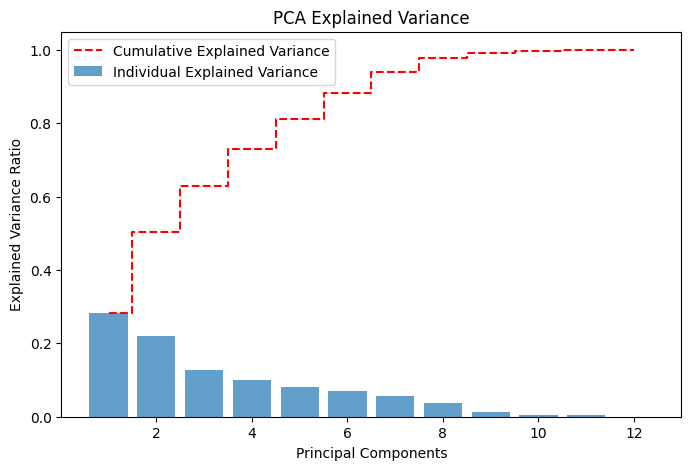

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.905136  1.117833 -0.230379 -0.508415 -0.768893  0.624357 -1.474135   
1  0.905136  1.117833 -0.230379 -0.508415 -0.768893  0.624357 -1.474135   
2  0.905136  1.117833 -0.230379 -0.508415 -0.768893  0.624357 -1.474135   
3  2.462936  1.240888  0.136220 -0.336684 -0.840611  1.139662 -0.053953   
4  2.462936  1.240888  0.136220 -0.336684 -0.840611  1.139662 -0.053953   

        PC8       PC9      PC10      PC11      PC12  
0  1.260061  0.563895  0.034925 -0.215475 -0.032152  
1  1.260061  0.563895  0.034925 -0.215475 -0.032152  
2  1.260061  0.563895  0.034925 -0.215475 -0.032152  
3  1.119883  0.496216 -0.181469  0.129443  0.056259  
4  1.119883  0.496216 -0.181469  0.129443  0.056259  


In [ ]:
# Step 1: Install necessary libraries (if not already installed)
!pip install pandas scikit-learn matplotlib seaborn

# Step 2: Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load your dataset
# Replace this with your data loading method, e.g., pd.read_csv('your_dataset.csv')
# For this example, let's assume you have a DataFrame 'df' with your data
# df = pd.read_csv('your_dataset.csv')

# Sample data (replace with your actual data)
data = {

    'ROE': [0.0672,0.0672,0.0672, 0.0864,0.0864,0.0864, 0.0931,0.0931,0.0931, 0.0880,0.0880,0.0880, 0.0833,0.0833,0.0833, 0.0938,0.0938,0.0938, 0.0985,0.0985,0.0985, 0.0959,0.0959,0.0959, 0.0802,0.0802,0.0802, 0.0804,0.0804,0.0804, 0.0868,0.0868,0.0868, 0.0719,0.0719,0.0719, 0.0719,0.0719,0.0719, 0.0785,0.0785,0.0785, 0.0751,0.0751,0.0751, 0.0667,0.0667,0.0667, 0.0574,0.0574,0.0574, 0.0601,0.0601,0.0601, 0.0600,0.0600,0.0600, 0.0709,0.0709,0.0709, 0.0531,0.0531,0.0531, 0.0575,0.0575,0.0575, 0.0517,0.0517,0.0517, 0.0490,0.0490,0.0490, 0.0398,0.0398,0.0398, 0.0414,0.0414,0.0414, 0.0393, 0.0393, 0.0393, 0.0242, 0.0242, 0.0242, 0.0297,0.0297,0.0297, 0.0384, 0.0384, 0.0384, 0.0394, 0.0394, 0.0394, 0.0346, 0.0346, 0.0346, 0.0434, 0.0434, 0.0434, 0.0365, 0.0365, 0.0365, 0.0404, 0.0404, 0.0404, 0.0379, 0.0379, 0.0379, 0.0386, 0.0386, 0.0386, 0.0423, 0.0423, 0.0423, 0.0505, 0.0505, 0.0505, 0.0336, 0.0336, 0.0336, 0.0368, 0.0368, 0.0368, 0.0329, 0.0329, 0.0329, 0.0424, 0.0424, 0.0424, 0.0395, 0.0395, 0.0395, 0.0311, 0.0311, 0.0311, 0.0430, 0.0430, 0.0430, 0.0172, 0.0172, 0.0172, 0.0137, 0.0137, 0.0137, 0.0232, 0.0232, 0.0232, 0.0314, 0.0314, 0.0314, 0.0369, 0.0369, 0.0369, 0.0303, 0.0303, 0.0303, 0.0383, 0.0383, 0.0383, 0.0615,0.0615,0.0615, 0.0272, 0.0272, 0.0272, 0.0292, 0.0292, 0.0292, 0.0436, 0.0436, 0.0436, 0.0468, 0.0468, 0.0468, 0.0432,0.0432,0.0432, 0.0410, 0.0410, 0.0410],
    'ROA': [0.0292,0.0292,0.0292,0.0365,0.0365,0.0365,0.0414,0.0414,0.0414,0.0395,0.0395,0.0395,0.0374,0.0374,0.0374,0.0387,0.0387,0.0387,0.0431,0.0431,0.0431,0.0419,0.0419,0.0419,0.0349,0.0349,0.0349,0.0315,0.0315,0.0315,0.0324,0.0324,0.0324,0.0283,0.0283,0.0283,0.0286,0.0286,0.0286,0.0293,0.0293,0.0293,0.0280,0.0280,0.0280,0.0261,0.0261,0.0261,0.0230,0.0230,0.0230,0.0229,0.0229,0.0229,0.0223,0.0223,0.0223,0.0278,0.0278,0.0278,0.0213,0.0213,0.0213,0.0224,0.0224,0.0224,0.0198,0.0198,0.0198,0.0199,0.0199,0.0199,0.0164,0.0164,0.0164,0.0167,0.0167,0.0167,0.0154,0.0154,0.0154,0.0101,0.0101,0.0101,0.0127,0.0127,0.0127,0.0160,0.0160,0.0160,0.0166,0.0166,0.0166,0.0148,0.0148,0.0148,0.0181,0.0181,0.0181,0.0149,0.0149,0.0149,0.0165,0.0165,0.0165,0.0158,0.0158,0.0158,0.0163,0.0163,0.0163,0.0175,0.0175,0.0175,0.0201,0.0201,0.0201,0.0133,0.0133,0.0133,0.0146,0.0146,0.0146,0.0131,0.0131,0.0131,0.0169,0.0169,0.0169,0.0166,0.0166,0.0166,0.0131,0.0131,0.0131,0.0191,0.0191,0.0191,0.0078,0.0078,0.0078,0.0063,0.0063,0.0063,0.0106,0.0106,0.0106,0.0144,0.0144,0.0144,0.0170,0.0170,0.0170,0.0142,0.0142,0.0142,0.0179,0.0179,0.0179,0.0288,0.0288,0.0288,0.0125,0.0125,0.0125,0.0136,0.0136,0.0136,0.0201,0.0201,0.0201,0.0208,0.0208,0.0208,0.0186,0.0186,0.0186,0.0183,0.0183,0.0183],
    'Debt_to_Equity': [0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.58, 0.58, 0.58, 0.55, 0.55, 0.55, 0.54, 0.54, 0.54, 0.61, 0.61, 0.61, 0.6, 0.6, 0.6, 0.64, 0.64, 0.64, 0.62, 0.62, 0.62, 0.74, 0.74, 0.74, 0.78, 0.78, 0.78, 0.74, 0.74, 0.74, 0.72, 0.72, 0.72, 0.83, 0.83, 0.83, 0.82, 0.82, 0.82, 0.8, 0.8, 0.8, 0.72, 0.72, 0.72, 0.8, 0.8, 0.8, 0.79, 0.79, 0.79, 0.77, 0.77, 0.77, 0.7, 0.7, 0.7, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.68, 0.68, 0.68, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.69, 0.69, 0.69, 0.63, 0.63, 0.63, 0.68, 0.68, 0.68, 0.6, 0.6, 0.6, 0.63, 0.63, 0.63, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.63, 0.63, 0.63, 0.62, 0.62, 0.62, 0.66, 0.66, 0.66, 0.57, 0.57, 0.57, 0.55, 0.55, 0.55, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.48, 0.48, 0.48, 0.45, 0.45, 0.45, 0.42, 0.42, 0.42, 0.39, 0.39, 0.39, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39, 0.37, 0.37, 0.37, 0.36, 0.36, 0.36, 0.42, 0.42, 0.42, 0.45, 0.45, 0.45, 0.47, 0.47, 0.47],
    'Financial_Leverage': [2.3, 2.3, 2.3, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.23, 2.23, 2.23, 2.23, 2.23, 2.23, 2.42, 2.42, 2.42, 2.29, 2.29, 2.29, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.55, 2.55, 2.55, 2.68, 2.68, 2.68, 2.54, 2.54, 2.54, 2.52, 2.52, 2.52, 2.68, 2.68, 2.68, 2.68, 2.68, 2.68, 2.56, 2.56, 2.56, 2.5, 2.5, 2.5, 2.63, 2.63, 2.63, 2.69, 2.69, 2.69, 2.55, 2.55, 2.55, 2.5, 2.5, 2.5, 2.57, 2.57, 2.57, 2.61, 2.61, 2.61, 2.47, 2.47, 2.47, 2.44, 2.44, 2.44, 2.47, 2.47, 2.47, 2.47, 2.47, 2.47, 2.41, 2.41, 2.41, 2.34, 2.34, 2.34, 2.39, 2.39, 2.39, 2.36, 2.36, 2.36, 2.34, 2.34, 2.34, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 2.38, 2.38, 2.38, 2.42, 2.42, 2.42, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.52, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51, 2.38, 2.38, 2.38, 2.37, 2.37, 2.37, 2.25, 2.25, 2.25, 2.21, 2.21, 2.21, 2.17, 2.17, 2.17, 2.19, 2.19, 2.19, 2.18, 2.18, 2.18, 2.17, 2.17, 2.17, 2.13, 2.13, 2.13, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.18, 2.18, 2.18, 2.15, 2.15, 2.15, 2.17, 2.17, 2.17, 2.25, 2.25, 2.25, 2.32, 2.32, 2.32, 2.24, 2.24, 2.24],
    'Current_Ratio': [1.39, 1.39, 1.39, 1.29, 1.29, 1.29, 1.4, 1.4, 1.4, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.21, 1.21, 1.21, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.36, 1.36, 1.36, 1.42, 1.42, 1.42, 1.32, 1.32, 1.32, 1.36, 1.36, 1.36, 1.5, 1.5, 1.5, 1.4, 1.4, 1.4, 1.36, 1.36, 1.36, 1.4, 1.4, 1.4, 1.35, 1.35, 1.35, 1.28, 1.28, 1.28, 1.2, 1.2, 1.2, 1.24, 1.24, 1.24, 1.25, 1.25, 1.25, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.32, 1.32, 1.32, 1.41, 1.41, 1.41, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.38, 1.38, 1.38, 1.37, 1.37, 1.37, 1.34, 1.34, 1.34, 1.36, 1.36, 1.36, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.13, 1.13, 1.13, 1.1, 1.1, 1.1, 1.23, 1.23, 1.23, 1.35, 1.35, 1.35, 1.3, 1.3, 1.3, 1.23, 1.23, 1.23, 1.15, 1.15, 1.15, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.26, 1.26, 1.26, 1.29, 1.29, 1.29, 1.37, 1.37, 1.37, 1.49, 1.49, 1.49, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.47, 1.47, 1.47, 1.51, 1.51, 1.51, 1.56, 1.56, 1.56, 1.54, 1.54, 1.54, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54, 1.46, 1.46, 1.46, 1.51, 1.51, 1.51, 1.53, 1.53, 1.53, 1.31, 1.31, 1.31, 1.18, 1.18, 1.18, 1.33, 1.33, 1.33],
    'Quick_Ratio': [1.1, 1.1, 1.1, 1.04, 1.04, 1.04, 1.14, 1.14, 1.14, 1.1, 1.1, 1.1, 1.15, 1.15, 1.15, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 0.97, 0.97, 0.97, 1.12, 1.12, 1.12, 1.21, 1.21, 1.21, 1.11, 1.11, 1.11, 1.12, 1.12, 1.12, 1.23, 1.23, 1.23, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.1, 1.1, 1.1, 1.05, 1.05, 1.05, 1.0, 1.0, 1.0, 1.04, 1.04, 1.04, 1.02, 1.02, 1.02, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.09, 1.09, 1.09, 1.17, 1.17, 1.17, 1.12, 1.12, 1.12, 1.08, 1.08, 1.08, 1.14, 1.14, 1.14, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.16, 1.16, 1.16, 1.04, 1.04, 1.04, 1.05, 1.05, 1.05, 0.95, 0.95, 0.95, 0.91, 0.91, 0.91, 1.03, 1.03, 1.03, 1.15, 1.15, 1.15, 1.09, 1.09, 1.09, 1.02, 1.02, 1.02, 0.92, 0.92, 0.92, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 1.02, 1.02, 1.02, 1.05, 1.05, 1.05, 1.09, 1.09, 1.09, 1.24, 1.24, 1.24, 1.31, 1.31, 1.31, 1.33, 1.33, 1.33, 1.3, 1.3, 1.3, 1.33, 1.33, 1.33, 1.36, 1.36, 1.36, 1.33, 1.33, 1.33, 1.37, 1.37, 1.37, 1.32, 1.32, 1.32, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.27, 1.27, 1.27, 1.07, 1.07, 1.07, 0.94, 0.94, 0.94, 1.02, 1.02, 1.02],
    'ITR': [2.11, 2.11, 2.11, 4.91, 4.91, 4.91, 7.95, 7.95, 7.95, 10.84, 10.84, 10.84, 3.45, 3.45, 3.45, 7.08, 7.08, 7.08, 9.4, 9.4, 9.4, 10.61, 10.61, 10.61, 3.02, 3.02, 3.02, 6.57, 6.57, 6.57, 9.75, 9.75, 9.75, 11.48, 11.48, 11.48, 3.16, 3.16, 3.16, 6.11, 6.11, 6.11, 8.33, 8.33, 8.33, 10.28, 10.28, 10.28, 2.56, 2.56, 2.56, 5.25, 5.25, 5.25, 7.74, 7.74, 7.74, 10.66, 10.66, 10.66, 2.6, 2.6, 2.6, 4.65, 4.65, 4.65, 6.45, 6.45, 6.45, 9.03, 9.03, 9.03, 2.08, 2.08, 2.08, 4.25, 4.25, 4.25, 6.38, 6.38, 6.38, 8.16, 8.16, 8.16, 1.92, 1.92, 1.92, 4.4, 4.4, 4.4, 6.79, 6.79, 6.79, 8.59, 8.59, 8.59, 2.04, 2.04, 2.04, 4.01, 4.01, 4.01, 6.11, 6.11, 6.11, 8.23, 8.23, 8.23, 2.3, 2.3, 2.3, 4.53, 4.53, 4.53, 6.18, 6.18, 6.18, 7.41, 7.41, 7.41, 1.79, 1.79, 1.79, 3.57, 3.57, 3.57, 5.4, 5.4, 5.4, 7.4, 7.4, 7.4, 1.63, 1.63, 1.63, 2.81, 2.81, 2.81, 4.62, 4.62, 4.62, 6.96, 6.96, 6.96, 2.35, 2.35, 2.35, 4.87, 4.87, 4.87, 7.08, 7.08, 7.08, 8.84, 8.84, 8.84, 2.49, 2.49, 2.49, 4.52, 4.52, 4.52, 6.25, 6.25, 6.25, 7.54, 7.54, 7.54, 2.01, 2.01, 2.01, 3.87, 3.87, 3.87, 5.56, 5.56, 5.56, 6.55, 6.55, 6.55],
    'RTR': [12.17, 12.17, 12.17, 14.05, 14.05, 14.05, 13.96, 13.96, 13.96, 11.68, 11.68, 11.68, 10.94, 10.94, 10.94, 10.61, 10.61, 10.61, 11.36, 11.36, 11.36, 12.29, 12.29, 12.29, 11.22, 11.22, 11.22, 10.9, 10.9, 10.9, 11.26, 11.26, 11.26, 10.51, 10.51, 10.51, 10.05, 10.05, 10.05, 10.76, 10.76, 10.76, 11.12, 11.12, 11.12, 10.3, 10.3, 10.3, 8.25, 8.25, 8.25, 8.49, 8.49, 8.49, 9.6, 9.6, 9.6, 11.81, 11.81, 11.81, 10.13, 10.13, 10.13, 9.76, 9.76, 9.76, 9.66, 9.66, 9.66, 10.77, 10.77, 10.77, 8.23, 8.23, 8.23, 9.31, 9.31, 9.31, 10.11, 10.11, 10.11, 9.71, 9.71, 9.71, 8.07, 8.07, 8.07, 8.82, 8.82, 8.82, 9.74, 9.74, 9.74, 11.83, 11.83, 11.83, 8.64, 8.64, 8.64, 8.56, 8.56, 8.56, 10.69, 10.69, 10.69, 9.78, 9.78, 9.78, 10.76, 10.76, 10.76, 11.39, 11.39, 11.39, 12.41, 12.41, 12.41, 10.36, 10.36, 10.36, 11.6, 11.6, 11.6, 10.34, 10.34, 10.34, 11.18, 11.18, 11.18, 11.01, 11.01, 11.01, 10.61, 10.61, 10.61, 5.81, 5.81, 5.81, 7.14, 7.14, 7.14, 4.84, 4.84, 4.84, 8.75, 8.75, 8.75, 11.49, 11.49, 11.49, 12.26, 12.26, 12.26, 10.97, 10.97, 10.97, 12.72, 12.72, 12.72, 15.84, 15.84, 15.84, 13.27, 13.27, 13.27, 14.22, 14.22, 14.22, 13.0, 13.0, 13.0, 15.04, 15.04, 15.04, 12.37, 12.37, 12.37, 15.64, 15.64, 15.64],
    'Net_Margin': [0.0871, 0.0871, 0.0871, 0.102, 0.102, 0.102, 0.1105, 0.1105, 0.1105, 0.1053, 0.1053, 0.1053, 0.1015, 0.1015, 0.1015, 0.1062, 0.1062, 0.1062, 0.1185, 0.1185, 0.1185, 0.1145, 0.1145, 0.1145, 0.131, 0.131, 0.131, 0.1334, 0.1334, 0.1334, 0.1349, 0.1349, 0.1349, 0.1198, 0.1198, 0.1198, 0.1179, 0.1179, 0.1179, 0.1191, 0.1191, 0.1191, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.1234, 0.106, 0.106, 0.106, 0.1089, 0.1089, 0.1089, 0.1105, 0.1105, 0.1105, 0.1328, 0.1328, 0.1328, 0.1146, 0.1146, 0.1146, 0.1182, 0.1182, 0.1182, 0.1151, 0.1151, 0.1151, 0.0911, 0.0911, 0.0911, 0.1064, 0.1064, 0.1064, 0.1046, 0.1046, 0.1046, 0.1063, 0.1063, 0.1063, 0.0218, 0.0218, 0.0218, 0.0869, 0.0869, 0.0869, 0.1008, 0.1008, 0.1008, 0.1116, 0.1116, 0.1116, 0.1039, 0.1039, 0.1039, 0.1245, 0.1245, 0.1245, 0.1069, 0.1069, 0.1069, 0.116, 0.116, 0.116, 0.1027, 0.1027, 0.1027, 0.1135, 0.1135, 0.1135, 0.1209, 0.1209, 0.1209, 0.1335, 0.1335, 0.1335, 0.091, 0.091, 0.091, 0.1118, 0.1118, 0.1118, 0.0996, 0.0996, 0.0996, 0.1204, 0.1204, 0.1204, 0.1163, 0.1163, 0.1163, 0.1053, 0.1053, 0.1053, 0.2081, 0.2081, 0.2081, 0.0763, 0.0763, 0.0763, 0.0523, 0.0523, 0.0523, 0.0901, 0.0901, 0.0901, 0.1165, 0.1165, 0.1165, 0.1312, 0.1312, 0.1312, 0.0994, 0.0994, 0.0994, 0.129, 0.129, 0.129, 0.2039, 0.2039, 0.2039, 0.1042, 0.1042, 0.1042, 0.1051, 0.1051, 0.1051, 0.1397, 0.1397, 0.1397, 0.1491, 0.1491, 0.1491, 0.1292, 0.1292, 0.1292, 0.1444, 0.1444, 0.1444],
    'Income_Margin': [0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0344, 0.0353, 0.0353, 0.0353, 0.0369, 0.0369, 0.0369, 0.0363, 0.0363, 0.0363, 0.0348, 0.0348, 0.0348, 0.0343, 0.0343, 0.0343, 0.037, 0.037, 0.037, 0.0365, 0.0365, 0.0365, 0.0305, 0.0305, 0.0305, 0.0313, 0.0313, 0.0313, 0.0294, 0.0294, 0.0294, 0.0303, 0.0303, 0.0303, 0.0293, 0.0293, 0.0293, 0.026, 0.026, 0.026, 0.0257, 0.0257, 0.0257, 0.0274, 0.0274, 0.0274, 0.0264, 0.0264, 0.0264, 0.0249, 0.0249, 0.0249, 0.0263, 0.0263, 0.0263, 0.0248, 0.0248, 0.0248, 0.0239, 0.0239, 0.0239, 0.0213, 0.0213, 0.0213, 0.023, 0.023, 0.023, 0.0221, 0.0221, 0.0221, 0.0242, 0.0242, 0.0242, 0.0224, 0.0224, 0.0224, 0.0236, 0.0236, 0.0236, 0.0233, 0.0233, 0.0233, 0.0249, 0.0249, 0.0249, 0.0231, 0.0231, 0.0231, 0.0255, 0.0255, 0.0255, 0.0243, 0.0243, 0.0243, 0.0227, 0.0227, 0.0227, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0223, 0.0214, 0.0214, 0.0214, 0.02, 0.02, 0.02, 0.0204, 0.0204, 0.0204, 0.0205, 0.0205, 0.0205, 0.0192, 0.0192, 0.0192, 0.018, 0.018, 0.018, 0.0189, 0.0189, 0.0189, 0.0194, 0.0194, 0.0194, 0.0211, 0.0211, 0.0211, 0.018, 0.018, 0.018, 0.0232, 0.0232, 0.0232, 0.0262, 0.0262, 0.0262, 0.029, 0.029, 0.029, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0284, 0.0304, 0.0304, 0.0304, 0.0305, 0.0305, 0.0305, 0.0273, 0.0273, 0.0273, 0.0277, 0.0277, 0.0277, 0.0275, 0.0275, 0.0275, 0.0287, 0.0287, 0.0287, 0.0266, 0.0266, 0.0266, 0.0252, 0.0252, 0.0252, 0.0257, 0.0257, 0.0257],
    'ORGR': [0.0756, 0.0756, 0.0756, 0.0783, 0.0783, 0.0783, 0.1146, 0.1146, 0.1146, 0.077, 0.077, 0.077, 0.0649, 0.0649, 0.0649, 0.0863, 0.0863, 0.0863, 0.0262, 0.0262, 0.0262, 0.0563, 0.0563, 0.0563, 0.1069, 0.1069, 0.1069, 0.029, 0.029, 0.029, 0.1516, 0.1516, 0.1516, 0.0054, 0.0054, 0.0054, 0.0771, 0.0771, 0.0771, 0.0693, 0.0693, 0.0693, 0.0474, 0.0474, 0.0474, 0.0488, 0.0488, 0.0488, 0.0393, 0.0393, 0.0393, 0.0198, 0.0198, 0.0198, 0.0008, 0.0008, 0.0008, 0.0942, 0.0942, 0.0942, 0.0426, 0.0426, 0.0426, 0.0379, 0.0379, 0.0379, 0.0513, 0.0513, 0.0513, 0.0421, 0.0421, 0.0421, 0.116, 0.116, 0.116, 0.0472, 0.0472, 0.0472, 0.0348, 0.0348, 0.0348, 0.0076, 0.0076, 0.0076, 0.0898, 0.0898, 0.0898, 0.1059, 0.1059, 0.1059, 0.0483, 0.0483, 0.0483, 0.1067, 0.1067, 0.1067, 0.0002, 0.0002, 0.0002, 0.0097, 0.0097, 0.0097, 0.0598, 0.0598, 0.0598, 0.0697, 0.0697, 0.0697, 0.0002, 0.0002, 0.0002, 0.0161, 0.0161, 0.0161, 0.0986, 0.0986, 0.0986, 0.032, 0.032, 0.032, 0.0733, 0.0733, 0.0733, 0.0509, 0.0509, 0.0509, 0.0758, 0.0758, 0.0758, 0.0122, 0.0122, 0.0122, 0.1018, 0.1018, 0.1018, 0.3372, 0.3372, 0.3372, 0.133, 0.133, 0.133, 0.1022, 0.1022, 0.1022, 0.1567, 0.1567, 0.1567, 0.0773, 0.0773, 0.0773, 0.0774, 0.0774, 0.0774, 0.1012, 0.1012, 0.1012, 0.0876, 0.0876, 0.0876, 0.0007, 0.0007, 0.0007, 0.0813, 0.0813, 0.0813, 0.0304, 0.0304, 0.0304, 0.0369, 0.0369, 0.0369, 0.043, 0.043, 0.043, 0.0112, 0.0112, 0.0112, 0.0365, 0.0365, 0.0365],
    'NIGR': [0.0302, 0.0302, 0.0302, 0.2629, 0.2629, 0.2629, 0.2082, 0.2082, 0.2082, 0.0262, 0.0262, 0.0262, 0.0266, 0.0266, 0.0266, 0.1364, 0.1364, 0.1364, 0.1454, 0.1454, 0.1454, 0.0206, 0.0206, 0.0206, 0.2662, 0.2662, 0.2662, 0.011, 0.011, 0.011, 0.1643, 0.1643, 0.1643, 0.117, 0.117, 0.117, 0.0599, 0.0599, 0.0599, 0.0807, 0.0807, 0.0807, 0.0129, 0.0129, 0.0129, 0.0489, 0.0489, 0.0489, 0.1079, 0.1079, 0.1079, 0.0479, 0.0479, 0.0479, 0.0143, 0.0143, 0.0143, 0.3146, 0.3146, 0.3146, 0.1738, 0.1738, 0.1738, 0.0702, 0.0702, 0.0702, 0.0759, 0.0759, 0.0759, 0.182, 0.182, 0.182, 0.0324, 0.0324, 0.0324, 0.0295, 0.0295, 0.0295, 0.0196, 0.0196, 0.0196, 0.7935, 0.7935, 0.7935, 2.63, 2.63, 2.63, 0.2836, 0.2836, 0.2836, 0.0535, 0.0535, 0.0535, 0.0305, 0.0305, 0.0305, 0.1974, 0.1974, 0.1974, 0.1332, 0.1332, 0.1332, 0.1501, 0.1501, 0.1501, 0.0529, 0.0529, 0.0529, 0.1048, 0.1048, 0.1048, 0.083, 0.083, 0.083, 0.2133, 0.2133, 0.2133, 0.2965, 0.2965, 0.2965, 0.1383, 0.1383, 0.1383, 0.1544, 0.1544, 0.1544, 0.3, 0.3, 0.3, 0.0456, 0.0456, 0.0456, 0.1868, 0.1868, 0.1868, 0.31, 0.31, 0.31, 0.5844, 0.5844, 0.5844, 0.2448, 0.2448, 0.2448, 0.9919, 0.9919, 0.9919, 0.3927, 0.3927, 0.3927, 0.2141, 0.2141, 0.2141, 0.166, 0.166, 0.166, 0.4117, 0.4117, 0.4117, 0.5795, 0.5795, 0.5795, 0.4473, 0.4473, 0.4473, 0.0387, 0.0387, 0.0387, 0.3786, 0.3786, 0.3786, 0.0215, 0.0215, 0.0215, 0.1432, 0.1432, 0.1432, 0.0771, 0.0771, 0.0771]
}
df = pd.DataFrame(data)

# Step 4: Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 5: Apply PCA
pca = PCA(n_components=12)  # Set n_components to the number of features
pca_data = pca.fit_transform(scaled_data)

# Step 6: Analyze the explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained Variance Ratio per Component:")
for i, var in enumerate(explained_variance, 1):
    print(f"Component {i}: {var * 100:.2f}%")

print("\nCumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance, 1):
    print(f"Component {i}: {cum_var * 100:.2f}%")

# Step 7: Plot the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', linestyle='--', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.show()

# Step 8 (Optional): Create a DataFrame with the PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
print(pca_df.head())